In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222776, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222775, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139         1.12127    17   
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127         1.12127    17   
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12146    17   
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153         1.12146    17   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1  -0.00005   1.121225  0.00033    1.121225  
2020-01-01 17:05:00    2     1  -0.00002   1.121260  0.00002    1.121260  
2020-01-01 17:10:00    2     1   0.00000   1.121250  0.00004    1.121260  
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385  
2020-01-01 17:20:00    2     1  -0.00002   1.121450  0.00016    1.121450

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  1.12120  1.12125  1.12106  1.12139         1.12127    17   
2020-01-01 17:05:00  1.12125  1.12127  1.12125  1.12127         1.12127    17   
2020-01-01 17:10:00  1.12127  1.12127  1.12123  1.12127         1.12146    17   
2020-01-01 17:15:00  1.12127  1.12146  1.12127  1.12154         1.12146    17   
2020-01-01 17:20:00  1.12144  1.12146  1.12137  1.12153         1.12146    17   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1  -0.00005   1.121225  0.00033    1.121225   
2020-01-01 17:05:00    2     1  -0.00002   1.121260  0.00002    1.121260   
2020-01-01 17:10:00    2     1   0.00000   1.121250  0.00004    1.121260   
2020-01-01 17:15:00    2     1  -0.00019   1.121405  0.00027    1.121385   
2020-01-01 17:20:00    2     1  -0.00002   1.121450  0.00016    1.121450   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.518316  
2020-01-01 17:05:00 -25.517948  
2020-01-01 17:10:00 -25.517948  
2020-01-01 17:15:00 -25.517963  
2020-01-01 17:20:00 -25.517948

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12127    17    2   
2020-01-01 17:05:00  1.12125  1.12125  1.12127         1.12127    17    2   
2020-01-01 17:10:00  1.12127  1.12123  1.12127         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12146    17    2   
2020-01-01 17:20:00  1.12144  1.12137  1.12153         1.12146    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00005   1.121225  0.00033    1.121225 -25.518316  
2020-01-01 17:05:00     1  -0.00002   1.121260  0.00002    1.121260 -25.517948  
2020-01-01 17:10:00     1   0.00000   1.121250  0.00004    1.121260 -25.517948  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

133665
133665
44555
44555
44555
44555


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(133665, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(133640, 24, 12)
(44530, 24, 12)
(44530, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(133640, 1)
(44530, 1)
(44530, 1)


array([[0.33935833],
       [0.3389492 ],
       [0.33777952],
       ...,
       [0.552474  ],
       [0.552474  ],
       [0.55300045]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.33935833, 0.3389492 , 0.33777952, ..., 0.552474  , 0.552474  ,
       0.55300045], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 963.6083 - mae: 8.0456 - mse: 963.6083 - root_mean_squared_error: 31.0420 - mape: 11268.0508
Epoch 1: val_mse improved from inf to 0.25039, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 56s 123ms/step - loss: 963.2839 - mae: 8.0431 - mse: 963.2839 - root_mean_squared_error: 31.0368 - mape: 11264.3154 - val_loss: 0.2504 - val_mae: 0.4398 - val_mse: 0.2504 - val_root_mean_squared_error: 0.5004 - val_mape: 23612.0195
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.1472 - mae: 0.2946 - mse: 0.1472 - root_mean_squared_error: 0.3837 - mape: 8115.0371
Epoch 2: val_mse improved from 0.25039 to 0.07242, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.1472 - mae: 0.2946 - mse: 0.1472 - root_mean_squared_error: 0.3836 - mape: 8112.3325 - val_loss: 0.0724 - val_mae: 0.1889 - val_mse: 0.0724 - val_root_mean_squared_error: 0.2691 - val_mape: 16445.4844
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0745 - mae: 0.2042 - mse: 0.0745 - root_mean_squared_error: 0.2729 - mape: 5294.6187
Epoch 3: val_mse improved from 0.07242 to 0.05769, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 43s 123ms/step - loss: 0.0745 - mae: 0.2042 - mse: 0.0745 - root_mean_squared_error: 0.2729 - mape: 5292.8560 - val_loss: 0.0577 - val_mae: 0.1912 - val_mse: 0.0577 - val_root_mean_squared_error: 0.2402 - val_mape: 14251.5449
Epoch 4/60
348/348 [==============================] - ETA: 0s - loss: 0.0668 - mae: 0.2101 - mse: 0.0668 - root_mean_squared_error: 0.2584 - mape: 4904.5503
Epoch 4: val_mse improved from 0.05769 to 0.05696, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 43s 125ms/step - loss: 0.0668 - mae: 0.2101 - mse: 0.0668 - root_mean_squared_error: 0.2584 - mape: 4904.5503 - val_loss: 0.0570 - val_mae: 0.1981 - val_mse: 0.0570 - val_root_mean_squared_error: 0.2387 - val_mape: 13498.3887
Epoch 5/60
348/348 [==============================] - ETA: 0s - loss: 0.0660 - mae: 0.2154 - mse: 0.0660 - root_mean_squared_error: 0.2568 - mape: 4480.1455
Epoch 5: val_mse did not improve from 0.05696
348/348 [==============================] - 12s 35ms/step - loss: 0.0660 - mae: 0.2154 - mse: 0.0660 - root_mean_squared_error: 0.2568 - mape: 4480.1455 - val_loss: 0.0572 - val_mae: 0.2008 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2391 - val_mape: 13250.0586
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.0659 - mae: 0.2171 - mse: 0.0659 - root_mean_squared_error: 0.2567 - mape: 4509.6470
Epoch 6: val_mse did not improve from 0.05696
348/348 [==============================] - 13s 36ms/step 

348/348 [==============================] - 42s 122ms/step - loss: 0.0657 - mae: 0.2172 - mse: 0.0657 - root_mean_squared_error: 0.2563 - mape: 4558.9644 - val_loss: 0.0569 - val_mae: 0.2004 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2385 - val_mape: 13194.2100
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 0.0656 - mae: 0.2168 - mse: 0.0656 - root_mean_squared_error: 0.2561 - mape: 4336.6851
Epoch 9: val_mse improved from 0.05691 to 0.05686, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0656 - mae: 0.2168 - mse: 0.0656 - root_mean_squared_error: 0.2561 - mape: 4335.2524 - val_loss: 0.0569 - val_mae: 0.2005 - val_mse: 0.0569 - val_root_mean_squared_error: 0.2384 - val_mape: 13171.2256
Epoch 10/60
346/348 [============================>.] - ETA: 0s - loss: 0.0655 - mae: 0.2166 - mse: 0.0655 - root_mean_squared_error: 0.2558 - mape: 4562.9536
Epoch 10: val_mse improved from 0.05686 to 0.05680, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 0.0655 - mae: 0.2167 - mse: 0.0655 - root_mean_squared_error: 0.2559 - mape: 4548.5684 - val_loss: 0.0568 - val_mae: 0.2006 - val_mse: 0.0568 - val_root_mean_squared_error: 0.2383 - val_mape: 13135.3398
Epoch 11/60
347/348 [============================>.] - ETA: 0s - loss: 0.0653 - mae: 0.2165 - mse: 0.0653 - root_mean_squared_error: 0.2556 - mape: 4392.1968
Epoch 11: val_mse improved from 0.05680 to 0.05664, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0653 - mae: 0.2165 - mse: 0.0653 - root_mean_squared_error: 0.2555 - mape: 4390.7324 - val_loss: 0.0566 - val_mae: 0.2001 - val_mse: 0.0566 - val_root_mean_squared_error: 0.2380 - val_mape: 13137.2578
Epoch 12/60
347/348 [============================>.] - ETA: 0s - loss: 0.0652 - mae: 0.2162 - mse: 0.0652 - root_mean_squared_error: 0.2553 - mape: 4425.7681
Epoch 12: val_mse improved from 0.05664 to 0.05645, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0652 - mae: 0.2162 - mse: 0.0652 - root_mean_squared_error: 0.2553 - mape: 4424.3179 - val_loss: 0.0565 - val_mae: 0.1997 - val_mse: 0.0565 - val_root_mean_squared_error: 0.2376 - val_mape: 13124.8926
Epoch 13/60
347/348 [============================>.] - ETA: 0s - loss: 0.0649 - mae: 0.2158 - mse: 0.0649 - root_mean_squared_error: 0.2548 - mape: 4412.9321
Epoch 13: val_mse improved from 0.05645 to 0.05619, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0649 - mae: 0.2158 - mse: 0.0649 - root_mean_squared_error: 0.2548 - mape: 4411.4736 - val_loss: 0.0562 - val_mae: 0.1992 - val_mse: 0.0562 - val_root_mean_squared_error: 0.2370 - val_mape: 13098.7549
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 0.0646 - mae: 0.2151 - mse: 0.0646 - root_mean_squared_error: 0.2541 - mape: 4599.5264
Epoch 14: val_mse improved from 0.05619 to 0.05577, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 45s 129ms/step - loss: 0.0646 - mae: 0.2151 - mse: 0.0646 - root_mean_squared_error: 0.2541 - mape: 4598.0015 - val_loss: 0.0558 - val_mae: 0.1986 - val_mse: 0.0558 - val_root_mean_squared_error: 0.2362 - val_mape: 13042.4443
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 0.0638 - mae: 0.2136 - mse: 0.0638 - root_mean_squared_error: 0.2526 - mape: 4371.3398
Epoch 15: val_mse improved from 0.05577 to 0.05476, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 0.0638 - mae: 0.2136 - mse: 0.0638 - root_mean_squared_error: 0.2526 - mape: 4369.8872 - val_loss: 0.0548 - val_mae: 0.1963 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2340 - val_mape: 12982.5469
Epoch 16/60
347/348 [============================>.] - ETA: 0s - loss: 0.0621 - mae: 0.2101 - mse: 0.0621 - root_mean_squared_error: 0.2492 - mape: 4328.1558
Epoch 16: val_mse improved from 0.05476 to 0.05240, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0621 - mae: 0.2101 - mse: 0.0621 - root_mean_squared_error: 0.2492 - mape: 4326.7168 - val_loss: 0.0524 - val_mae: 0.1914 - val_mse: 0.0524 - val_root_mean_squared_error: 0.2289 - val_mape: 12773.4473
Epoch 17/60
347/348 [============================>.] - ETA: 0s - loss: 0.0549 - mae: 0.1956 - mse: 0.0549 - root_mean_squared_error: 0.2343 - mape: 3950.7908
Epoch 17: val_mse improved from 0.05240 to 0.03280, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0549 - mae: 0.1956 - mse: 0.0549 - root_mean_squared_error: 0.2343 - mape: 3949.4854 - val_loss: 0.0328 - val_mae: 0.1443 - val_mse: 0.0328 - val_root_mean_squared_error: 0.1811 - val_mape: 10882.0605
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0155 - mae: 0.0942 - mse: 0.0155 - root_mean_squared_error: 0.1247 - mape: 2316.2913
Epoch 18: val_mse improved from 0.03280 to 0.00496, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 43s 124ms/step - loss: 0.0155 - mae: 0.0942 - mse: 0.0155 - root_mean_squared_error: 0.1247 - mape: 2315.5151 - val_loss: 0.0050 - val_mae: 0.0545 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0704 - val_mape: 5563.5566
Epoch 19/60
347/348 [============================>.] - ETA: 0s - loss: 0.0046 - mae: 0.0541 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 1540.6285
Epoch 19: val_mse improved from 0.00496 to 0.00281, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0046 - mae: 0.0541 - mse: 0.0046 - root_mean_squared_error: 0.0679 - mape: 1540.1135 - val_loss: 0.0028 - val_mae: 0.0402 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 4391.7212
Epoch 20/60
347/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0455 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 1301.4388
Epoch 20: val_mse improved from 0.00281 to 0.00163, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 0.0032 - mae: 0.0455 - mse: 0.0032 - root_mean_squared_error: 0.0567 - mape: 1301.0046 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 3745.0815
Epoch 21/60
347/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0395 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1170.3588
Epoch 21: val_mse improved from 0.00163 to 0.00120, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 42s 122ms/step - loss: 0.0024 - mae: 0.0395 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1169.9681 - val_loss: 0.0012 - val_mae: 0.0276 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0346 - val_mape: 3418.8748
Epoch 22/60
348/348 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0353 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 986.7086
Epoch 22: val_mse improved from 0.00120 to 0.00085, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0019 - mae: 0.0353 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 986.7086 - val_loss: 8.4883e-04 - val_mae: 0.0205 - val_mse: 8.4883e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 3211.4116
Epoch 23/60
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0326 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 977.5158
Epoch 23: val_mse improved from 0.00085 to 0.00066, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0017 - mae: 0.0326 - mse: 0.0017 - root_mean_squared_error: 0.0407 - mape: 977.1887 - val_loss: 6.5911e-04 - val_mae: 0.0170 - val_mse: 6.5911e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2991.0769
Epoch 24/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0299 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 990.5289
Epoch 24: val_mse improved from 0.00066 to 0.00053, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0014 - mae: 0.0299 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 990.1976 - val_loss: 5.3165e-04 - val_mae: 0.0154 - val_mse: 5.3165e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 2790.5334
Epoch 25/60
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 961.3605
Epoch 25: val_mse did not improve from 0.00053
348/348 [==============================] - 13s 36ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 961.3605 - val_loss: 5.5078e-04 - val_mae: 0.0177 - val_mse: 5.5078e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 2677.7000
Epoch 26/60
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 734.1538
Epoch 26: val_mse improved from 0.00053 to 0.00040, saving model to /content/drive/MyDrive

348/348 [==============================] - 43s 124ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 733.9088 - val_loss: 3.9859e-04 - val_mae: 0.0125 - val_mse: 3.9859e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 2580.3560
Epoch 27/60
348/348 [==============================] - ETA: 0s - loss: 9.4489e-04 - mae: 0.0243 - mse: 9.4489e-04 - root_mean_squared_error: 0.0307 - mape: 875.0228
Epoch 27: val_mse did not improve from 0.00040
348/348 [==============================] - 12s 36ms/step - loss: 9.4489e-04 - mae: 0.0243 - mse: 9.4489e-04 - root_mean_squared_error: 0.0307 - mape: 875.0228 - val_loss: 9.6783e-04 - val_mae: 0.0275 - val_mse: 9.6783e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 2472.4224
Epoch 28/60
347/348 [============================>.] - ETA: 0s - loss: 8.6344e-04 - mae: 0.0232 - mse: 8.6344e-04 - root_mean_squared_error: 0.0294 - mape: 799.4377
Epoch 28: val_mse improved from 0.00040 to 0.00038, saving model t

348/348 [==============================] - 41s 118ms/step - loss: 8.6340e-04 - mae: 0.0232 - mse: 8.6340e-04 - root_mean_squared_error: 0.0294 - mape: 799.1715 - val_loss: 3.8077e-04 - val_mae: 0.0135 - val_mse: 3.8077e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2392.0073
Epoch 29/60
348/348 [==============================] - ETA: 0s - loss: 8.1137e-04 - mae: 0.0225 - mse: 8.1137e-04 - root_mean_squared_error: 0.0285 - mape: 767.9348
Epoch 29: val_mse improved from 0.00038 to 0.00036, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 8.1137e-04 - mae: 0.0225 - mse: 8.1137e-04 - root_mean_squared_error: 0.0285 - mape: 767.9348 - val_loss: 3.6439e-04 - val_mae: 0.0134 - val_mse: 3.6439e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 2348.0496
Epoch 30/60
347/348 [============================>.] - ETA: 0s - loss: 7.7879e-04 - mae: 0.0221 - mse: 7.7879e-04 - root_mean_squared_error: 0.0279 - mape: 797.1909
Epoch 30: val_mse did not improve from 0.00036
348/348 [==============================] - 12s 35ms/step - loss: 7.7873e-04 - mae: 0.0221 - mse: 7.7873e-04 - root_mean_squared_error: 0.0279 - mape: 796.9238 - val_loss: 3.9466e-04 - val_mae: 0.0141 - val_mse: 3.9466e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 2357.2756
Epoch 31/60
347/348 [============================>.] - ETA: 0s - loss: 6.6477e-04 - mae: 0.0204 - mse: 6.6477e-04 - root_mean_squared_error: 0.0258 - mape: 750.6110
Epoch 31: val_mse improved from 0.00036 to 0.00026, saving

348/348 [==============================] - 40s 115ms/step - loss: 6.6470e-04 - mae: 0.0204 - mse: 6.6470e-04 - root_mean_squared_error: 0.0258 - mape: 750.3597 - val_loss: 2.5872e-04 - val_mae: 0.0096 - val_mse: 2.5872e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 2294.1743
Epoch 32/60
347/348 [============================>.] - ETA: 0s - loss: 6.7328e-04 - mae: 0.0204 - mse: 6.7328e-04 - root_mean_squared_error: 0.0259 - mape: 833.7800
Epoch 32: val_mse did not improve from 0.00026
348/348 [==============================] - 12s 35ms/step - loss: 6.7319e-04 - mae: 0.0204 - mse: 6.7319e-04 - root_mean_squared_error: 0.0259 - mape: 833.5006 - val_loss: 2.6915e-04 - val_mae: 0.0113 - val_mse: 2.6915e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 2268.2390
Epoch 33/60
347/348 [============================>.] - ETA: 0s - loss: 6.6580e-04 - mae: 0.0203 - mse: 6.6580e-04 - root_mean_squared_error: 0.0258 - mape: 722.9390
Epoch 33: val_mse did not improve from 0.00026
348/348 [==

348/348 [==============================] - 39s 112ms/step - loss: 5.0745e-04 - mae: 0.0177 - mse: 5.0745e-04 - root_mean_squared_error: 0.0225 - mape: 775.8875 - val_loss: 2.0744e-04 - val_mae: 0.0084 - val_mse: 2.0744e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2188.6936
Epoch 36/60
347/348 [============================>.] - ETA: 0s - loss: 4.8345e-04 - mae: 0.0173 - mse: 4.8345e-04 - root_mean_squared_error: 0.0220 - mape: 796.7186
Epoch 36: val_mse did not improve from 0.00021
348/348 [==============================] - 12s 34ms/step - loss: 4.8343e-04 - mae: 0.0173 - mse: 4.8343e-04 - root_mean_squared_error: 0.0220 - mape: 796.4517 - val_loss: 8.2822e-04 - val_mae: 0.0255 - val_mse: 8.2822e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 2094.5056
Epoch 37/60
347/348 [============================>.] - ETA: 0s - loss: 4.4635e-04 - mae: 0.0166 - mse: 4.4635e-04 - root_mean_squared_error: 0.0211 - mape: 773.7313
Epoch 37: val_mse did not improve from 0.00021
348/348 [==

348/348 [==============================] - 39s 113ms/step - loss: 4.0198e-04 - mae: 0.0157 - mse: 4.0198e-04 - root_mean_squared_error: 0.0200 - mape: 658.2996 - val_loss: 2.0162e-04 - val_mae: 0.0104 - val_mse: 2.0162e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 2036.5824
Epoch 41/60
347/348 [============================>.] - ETA: 0s - loss: 3.7843e-04 - mae: 0.0153 - mse: 3.7843e-04 - root_mean_squared_error: 0.0195 - mape: 639.7206
Epoch 41: val_mse improved from 0.00020 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 3.7844e-04 - mae: 0.0153 - mse: 3.7844e-04 - root_mean_squared_error: 0.0195 - mape: 639.5067 - val_loss: 1.5870e-04 - val_mae: 0.0084 - val_mse: 1.5870e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1985.1158
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 2.9074e-04 - mae: 0.0133 - mse: 2.9074e-04 - root_mean_squared_error: 0.0171 - mape: 648.2079
Epoch 42: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 2.9075e-04 - mae: 0.0133 - mse: 2.9075e-04 - root_mean_squared_error: 0.0171 - mape: 647.9908 - val_loss: 1.5298e-04 - val_mae: 0.0081 - val_mse: 1.5298e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1922.2859
Epoch 43/60
347/348 [============================>.] - ETA: 0s - loss: 3.3006e-04 - mae: 0.0142 - mse: 3.3006e-04 - root_mean_squared_error: 0.0182 - mape: 657.2964
Epoch 43: val_mse did not improve from 0.00015
348/348 [==============================] - 12s 35ms/step - loss: 3.3000e-04 - mae: 0.0142 - mse: 3.3000e-04 - root_mean_squared_error: 0.0182 - mape: 657.0757 - val_loss: 1.6702e-04 - val_mae: 0.0092 - val_mse: 1.6702e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1947.8883
Epoch 44/60
347/348 [============================>.] - ETA: 0s - loss: 2.7794e-04 - mae: 0.0130 - mse: 2.7794e-04 - root_mean_squared_error: 0.0167 - mape: 632.4145
Epoch 44: val_mse did not improve from 0.00015
348/348 [==

348/348 [==============================] - 40s 115ms/step - loss: 2.4335e-04 - mae: 0.0122 - mse: 2.4335e-04 - root_mean_squared_error: 0.0156 - mape: 561.0424 - val_loss: 1.4951e-04 - val_mae: 0.0092 - val_mse: 1.4951e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1780.6139
Epoch 48/60
348/348 [==============================] - ETA: 0s - loss: 2.2799e-04 - mae: 0.0118 - mse: 2.2799e-04 - root_mean_squared_error: 0.0151 - mape: 562.1187
Epoch 48: val_mse did not improve from 0.00015
348/348 [==============================] - 12s 36ms/step - loss: 2.2799e-04 - mae: 0.0118 - mse: 2.2799e-04 - root_mean_squared_error: 0.0151 - mape: 562.1187 - val_loss: 2.2711e-04 - val_mae: 0.0120 - val_mse: 2.2711e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 1809.2064
Epoch 49/60
347/348 [============================>.] - ETA: 0s - loss: 2.3747e-04 - mae: 0.0119 - mse: 2.3747e-04 - root_mean_squared_error: 0.0154 - mape: 566.4791
Epoch 49: val_mse did not improve from 0.00015
348/348 [==

348/348 [==============================] - 40s 115ms/step - loss: 1.9968e-04 - mae: 0.0109 - mse: 1.9968e-04 - root_mean_squared_error: 0.0141 - mape: 527.1682 - val_loss: 1.2459e-04 - val_mae: 0.0080 - val_mse: 1.2459e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1621.9207
Epoch 52/60
347/348 [============================>.] - ETA: 0s - loss: 1.9455e-04 - mae: 0.0110 - mse: 1.9455e-04 - root_mean_squared_error: 0.0139 - mape: 521.2068
Epoch 52: val_mse did not improve from 0.00012
348/348 [==============================] - 12s 35ms/step - loss: 1.9456e-04 - mae: 0.0110 - mse: 1.9456e-04 - root_mean_squared_error: 0.0139 - mape: 521.0327 - val_loss: 1.7136e-04 - val_mae: 0.0101 - val_mse: 1.7136e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 1557.6733
Epoch 53/60
347/348 [============================>.] - ETA: 0s - loss: 1.7684e-04 - mae: 0.0104 - mse: 1.7684e-04 - root_mean_squared_error: 0.0133 - mape: 522.4427
Epoch 53: val_mse did not improve from 0.00012
348/348 [==

348/348 [==============================] - 40s 115ms/step - loss: 1.5728e-04 - mae: 0.0097 - mse: 1.5728e-04 - root_mean_squared_error: 0.0125 - mape: 478.6096 - val_loss: 8.3901e-05 - val_mae: 0.0067 - val_mse: 8.3901e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 1451.2211
Epoch 56/60
347/348 [============================>.] - ETA: 0s - loss: 1.6186e-04 - mae: 0.0098 - mse: 1.6186e-04 - root_mean_squared_error: 0.0127 - mape: 479.4284
Epoch 56: val_mse did not improve from 0.00008
348/348 [==============================] - 12s 35ms/step - loss: 1.6184e-04 - mae: 0.0098 - mse: 1.6184e-04 - root_mean_squared_error: 0.0127 - mape: 479.2675 - val_loss: 1.4539e-04 - val_mae: 0.0097 - val_mse: 1.4539e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 1428.8850
Epoch 57/60
347/348 [============================>.] - ETA: 0s - loss: 1.4965e-04 - mae: 0.0096 - mse: 1.4965e-04 - root_mean_squared_error: 0.0122 - mape: 482.2570
Epoch 57: val_mse improved from 0.00008 to 0.00005, saving

348/348 [==============================] - 41s 118ms/step - loss: 1.4961e-04 - mae: 0.0096 - mse: 1.4961e-04 - root_mean_squared_error: 0.0122 - mape: 482.0949 - val_loss: 5.1348e-05 - val_mae: 0.0047 - val_mse: 5.1348e-05 - val_root_mean_squared_error: 0.0072 - val_mape: 1408.9904
Epoch 58/60
347/348 [============================>.] - ETA: 0s - loss: 1.6574e-04 - mae: 0.0100 - mse: 1.6574e-04 - root_mean_squared_error: 0.0129 - mape: 452.8959
Epoch 58: val_mse did not improve from 0.00005
348/348 [==============================] - 12s 35ms/step - loss: 1.6572e-04 - mae: 0.0100 - mse: 1.6572e-04 - root_mean_squared_error: 0.0129 - mape: 452.7444 - val_loss: 5.2873e-05 - val_mae: 0.0049 - val_mse: 5.2873e-05 - val_root_mean_squared_error: 0.0073 - val_mape: 1389.6199
Epoch 59/60
347/348 [============================>.] - ETA: 0s - loss: 1.1830e-04 - mae: 0.0083 - mse: 1.1830e-04 - root_mean_squared_error: 0.0109 - mape: 450.4205
Epoch 59: val_mse did not improve from 0.00005
348/348 [==

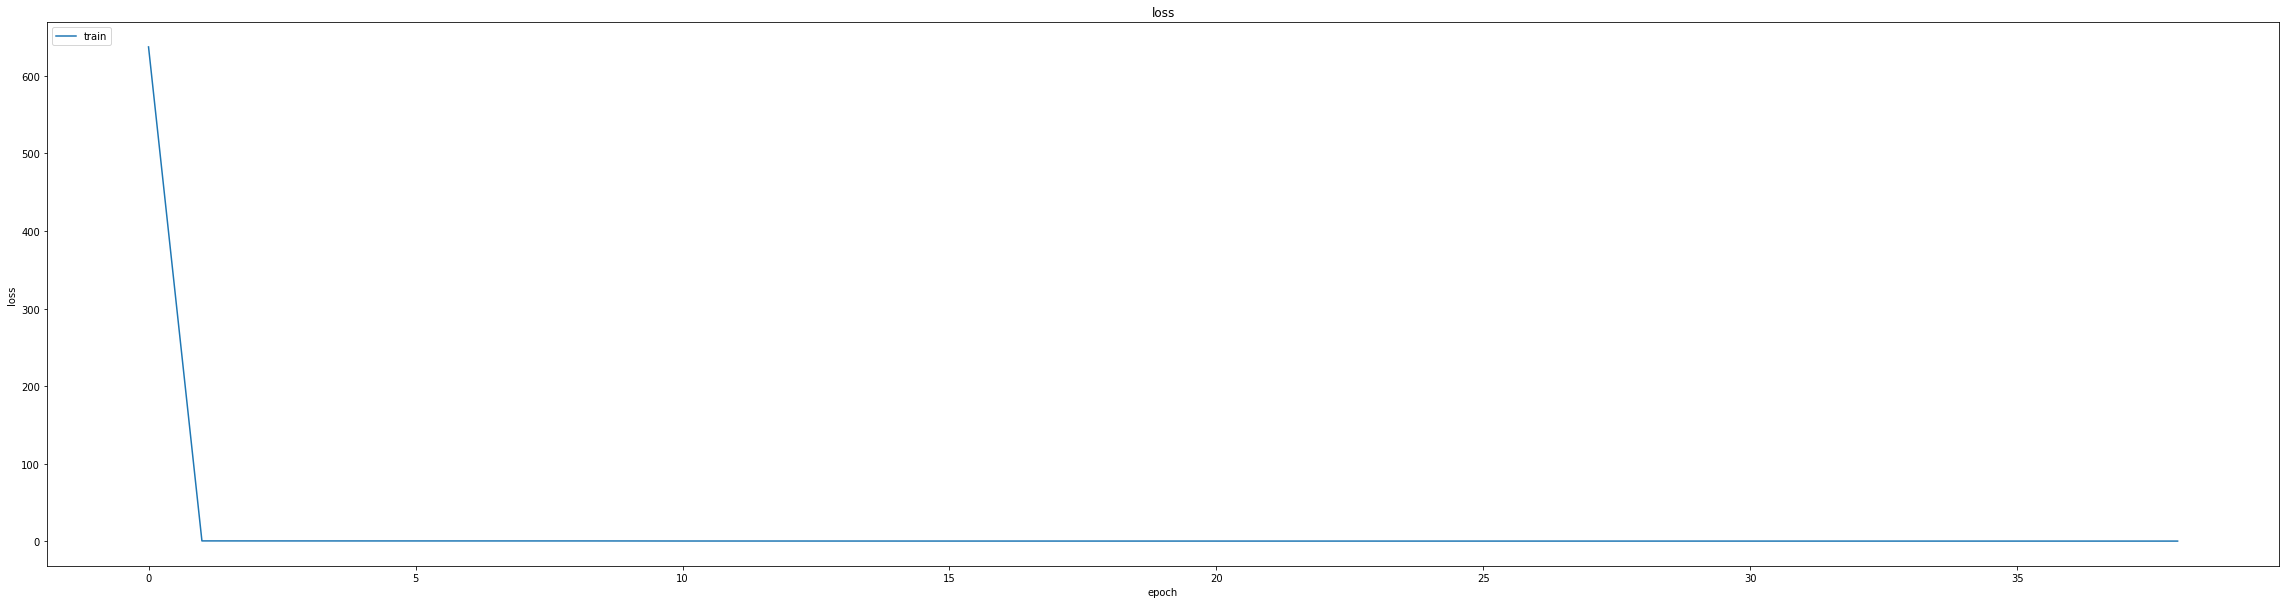

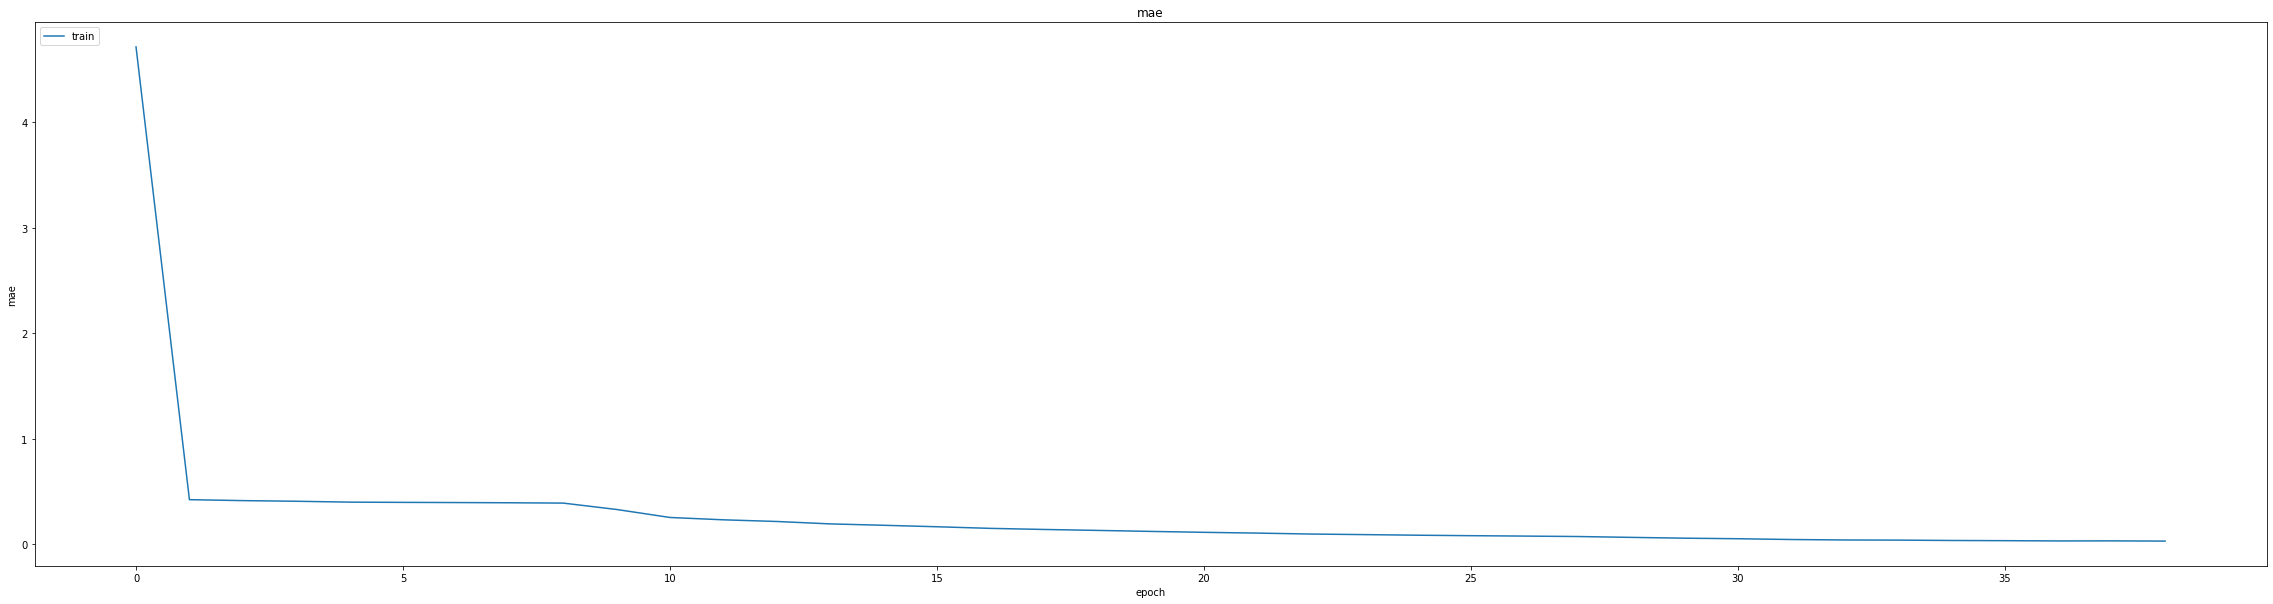

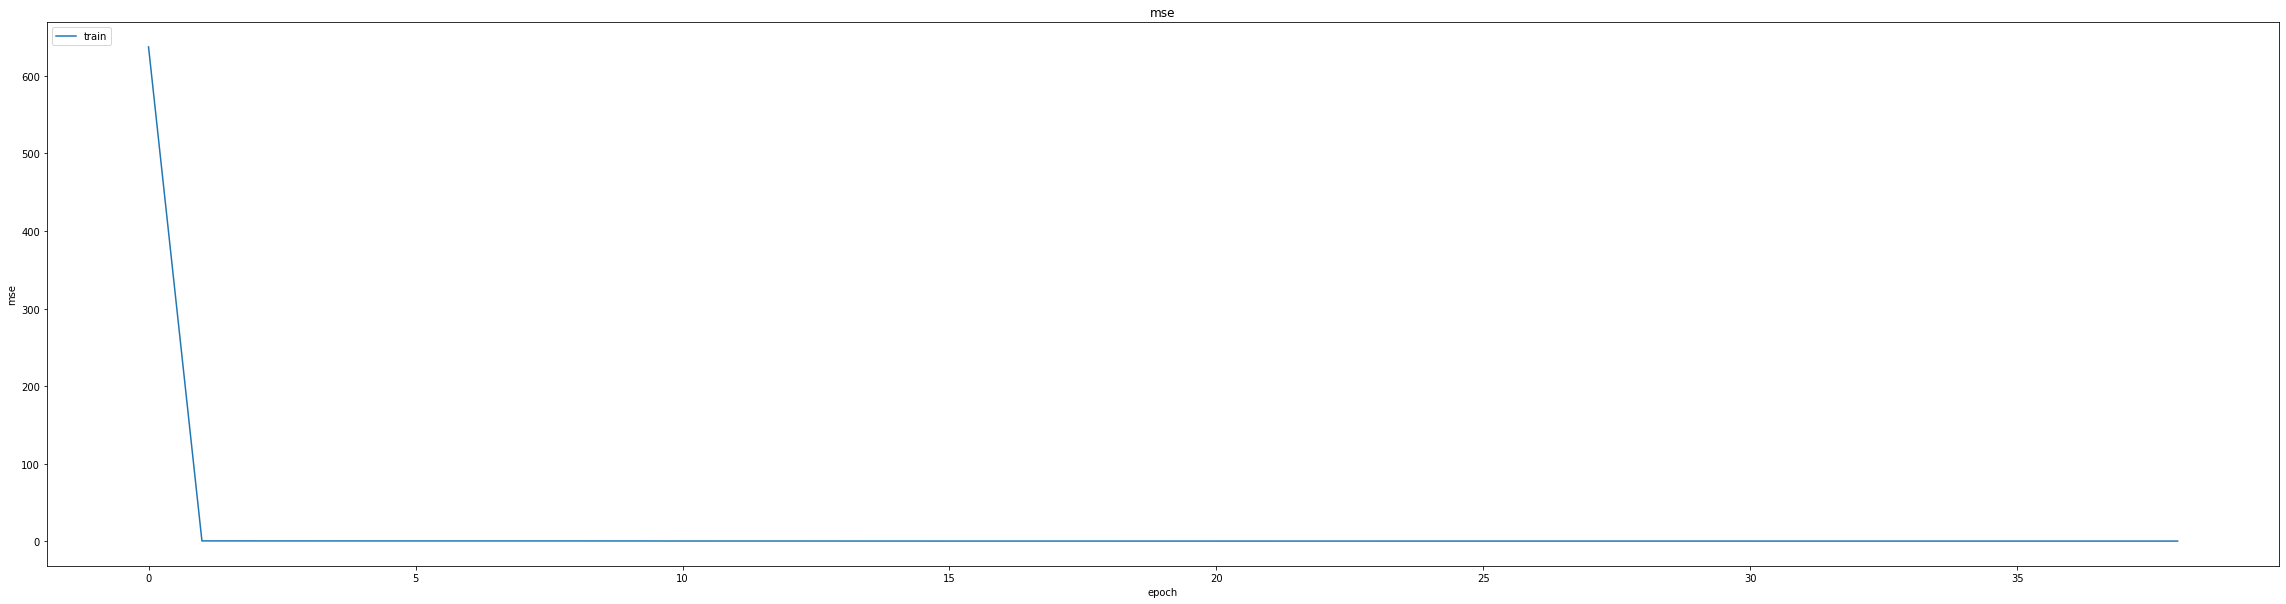

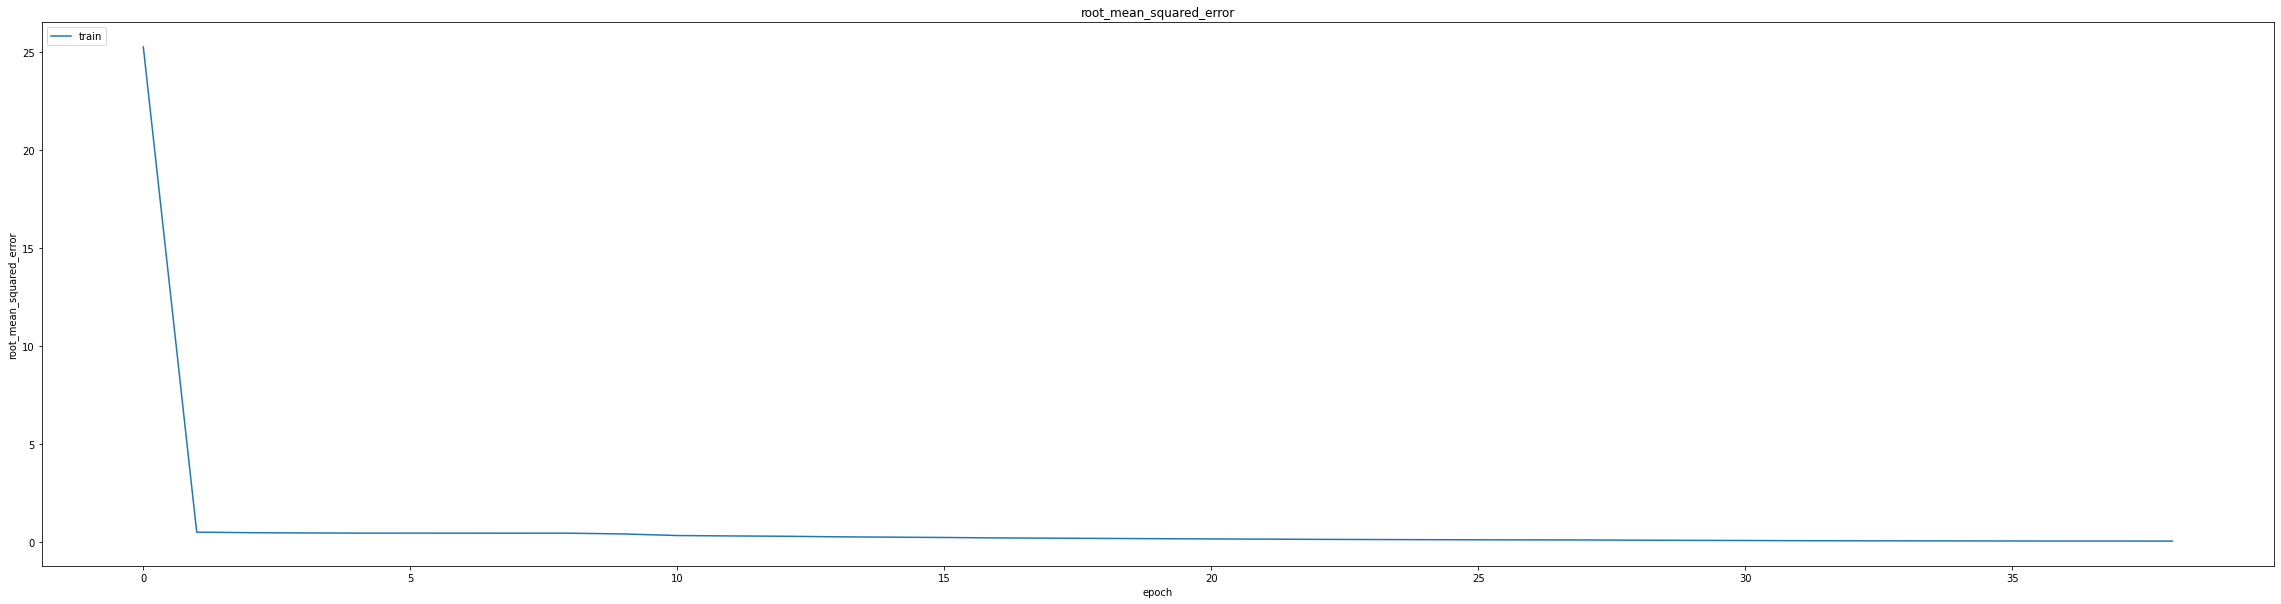

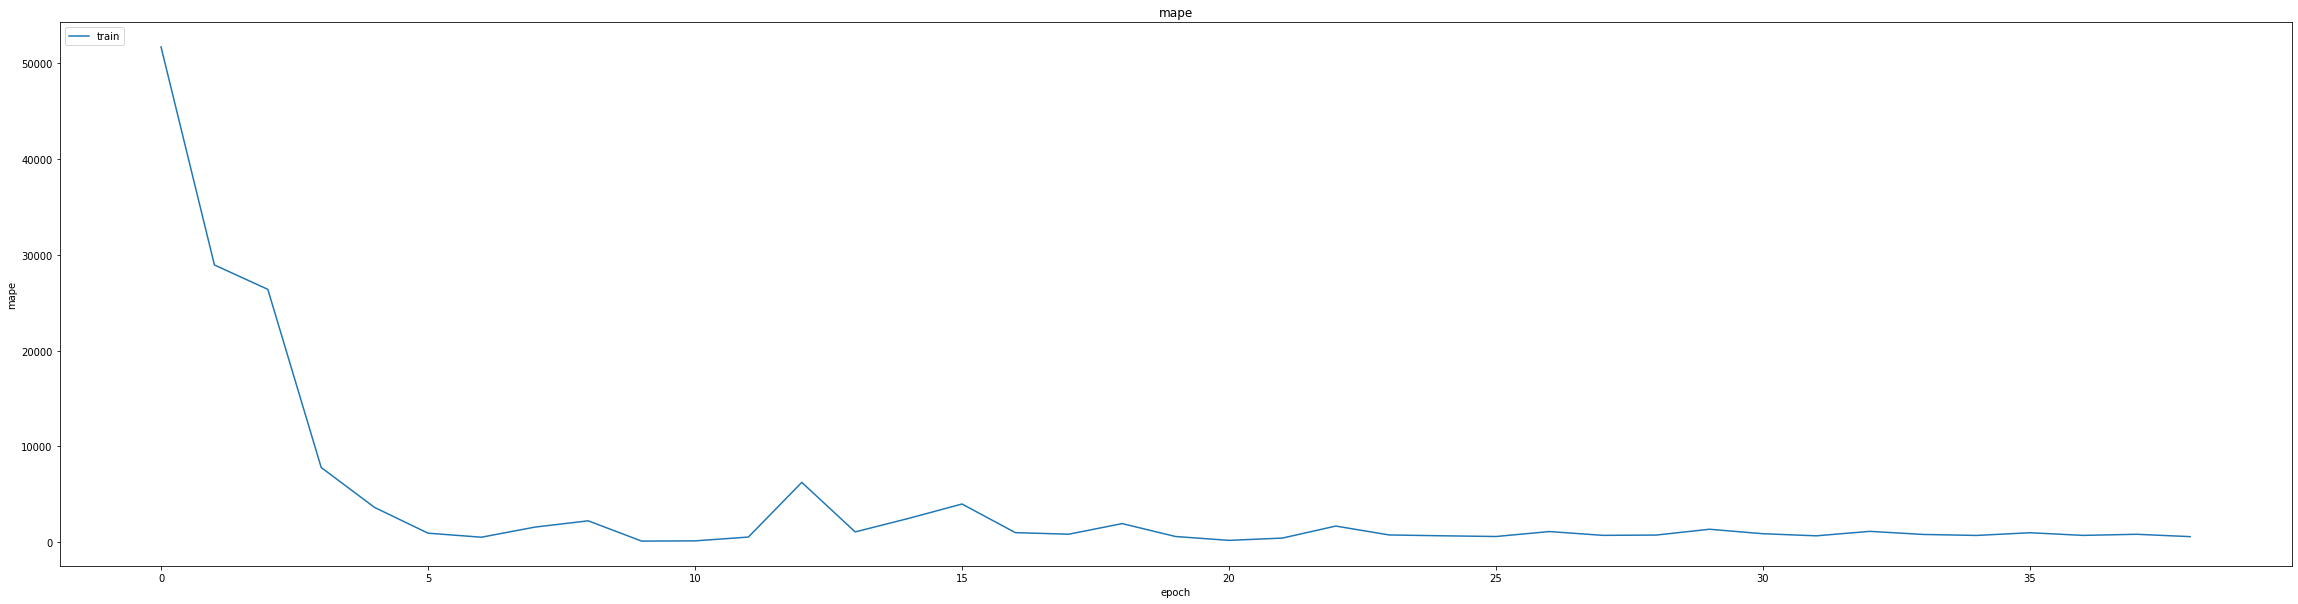

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004661594517529011
0.00716573977842927
1392/1392 [==============================] - 11s 7ms/step
0.9976560025894223


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0188 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 695.0820
Epoch 1: val_mse did not improve from 0.00005
348/348 [==============================] - 22s 40ms/step - loss: 0.0020 - mae: 0.0188 - mse: 0.0020 - root_mean_squared_error: 0.0442 - mape: 694.8484 - val_loss: 6.4247e-05 - val_mae: 0.0054 - val_mse: 6.4247e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 1570.0696 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 1.3249e-04 - mae: 0.0089 - mse: 1.3249e-04 - root_mean_squared_error: 0.0115 - mape: 466.6978
Epoch 2: val_mse did not improve from 0.00005
348/348 [==============================] - 13s 36ms/step - loss: 1.3254e-04 - mae: 0.0089 - mse: 1.3254e-04 - root_mean_squared_error: 0.0115 - mape: 466.5416 - val_loss: 2.4583e-04 - val_mae: 0.0139 - val_mse: 2.4583e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1297.6533 - lr: 0.0010
lr cha

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005393953062593937
0.007377285044640303
1392/1392 [==============================] - 10s 6ms/step
0.9966081514768624


1392/1392 [==============================] - 9s 6ms/step


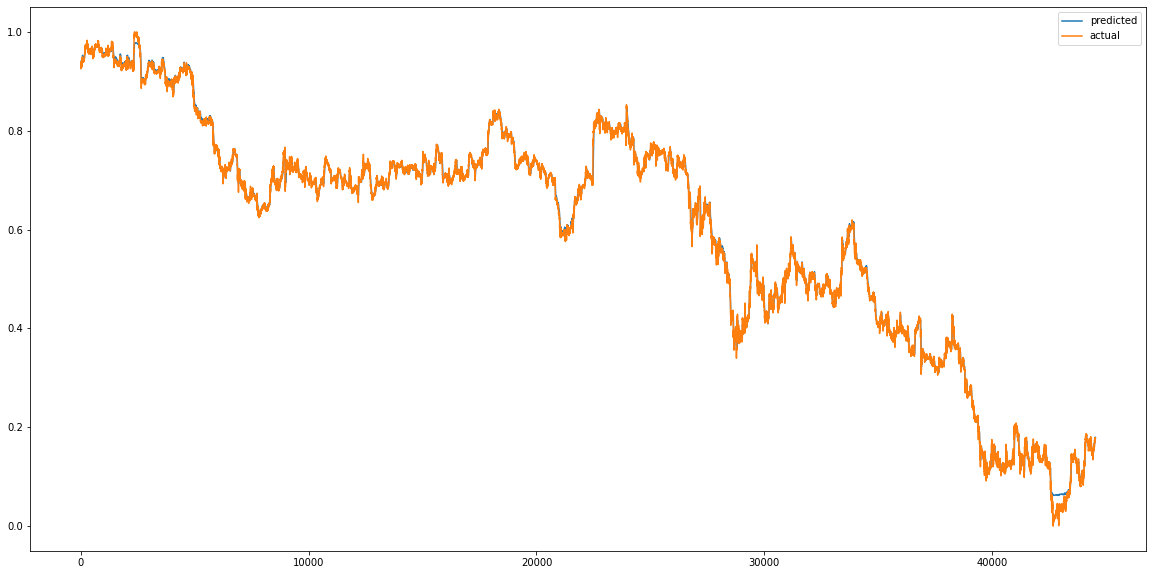

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


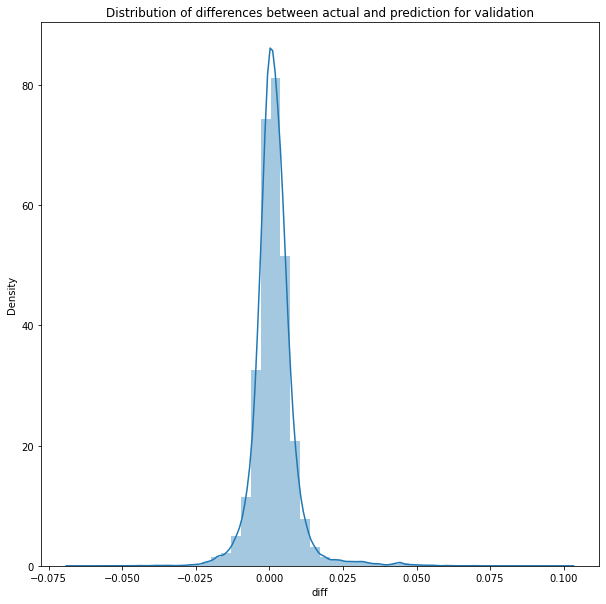

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 9s 7ms/step


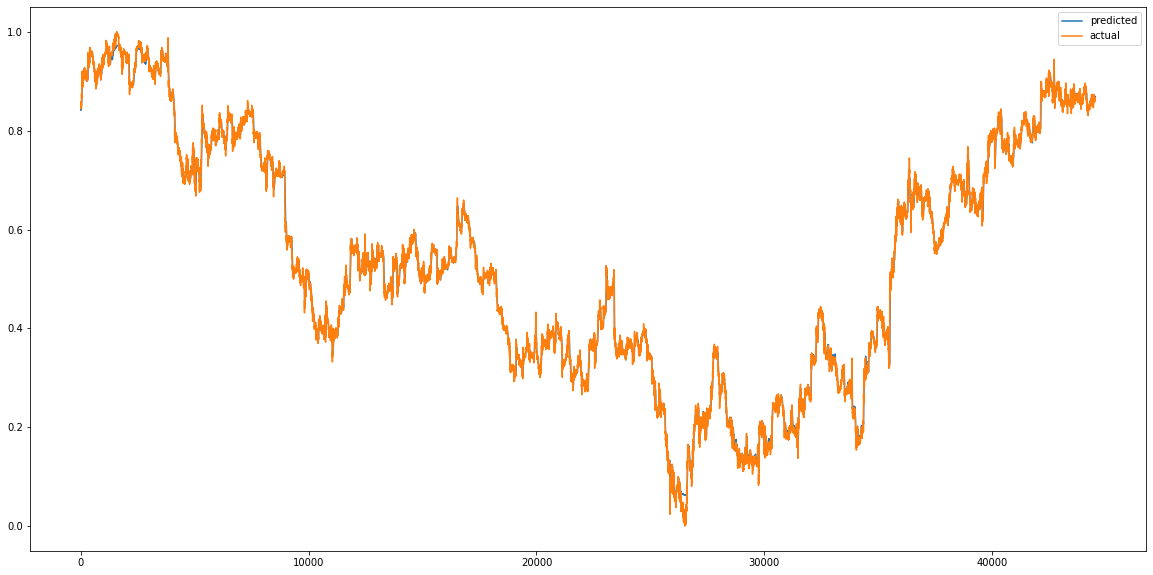

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


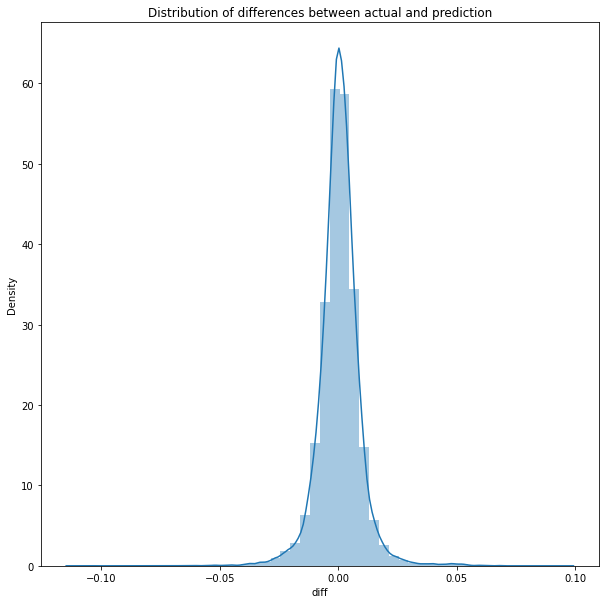

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  7.843181322019958e-05
RMSE :  0.00885617373475699
MAE :  0.006040105485003262
1392/1392 [==============================] - 9s 6ms/step
R2_Score  : 0.9987018543614355


count    44530.000000
mean         0.000485
std          0.008843
min         -0.111791
25%         -0.003748
50%          0.000504
75%          0.004788
max          0.096202
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
348/348 [==============================] - ETA: 0s - loss: 422.7426 - mae: 3.9762 - mse: 422.7425 - root_mean_squared_error: 20.5607 - mape: 11221.4541
Epoch 1: val_mse improved from inf to 0.25147, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 23s 54ms/step - loss: 422.7426 - mae: 3.9762 - mse: 422.7425 - root_mean_squared_error: 20.5607 - mape: 11221.4541 - val_loss: 0.2515 - val_mae: 0.4406 - val_mse: 0.2515 - val_root_mean_squared_error: 0.5015 - val_mape: 23669.4902
Epoch 2/60
346/348 [============================>.] - ETA: 0s - loss: 0.1785 - mae: 0.3352 - mse: 0.1785 - root_mean_squared_error: 0.4225 - mape: 6650.9131
Epoch 2: val_mse improved from 0.25147 to 0.09471, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.1784 - mae: 0.3350 - mse: 0.1784 - root_mean_squared_error: 0.4223 - mape: 6629.9365 - val_loss: 0.0947 - val_mae: 0.2274 - val_mse: 0.0947 - val_root_mean_squared_error: 0.3078 - val_mape: 18046.1172
Epoch 3/60
348/348 [==============================] - ETA: 0s - loss: 0.0922 - mae: 0.2216 - mse: 0.0922 - root_mean_squared_error: 0.3036 - mape: 5162.6245
Epoch 3: val_mse improved from 0.09471 to 0.06431, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0922 - mae: 0.2216 - mse: 0.0922 - root_mean_squared_error: 0.3036 - mape: 5162.6245 - val_loss: 0.0643 - val_mae: 0.1842 - val_mse: 0.0643 - val_root_mean_squared_error: 0.2536 - val_mape: 15564.7080
Epoch 4/60
346/348 [============================>.] - ETA: 0s - loss: 0.0725 - mae: 0.2033 - mse: 0.0725 - root_mean_squared_error: 0.2692 - mape: 4961.2178
Epoch 4: val_mse improved from 0.06431 to 0.05798, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0724 - mae: 0.2032 - mse: 0.0724 - root_mean_squared_error: 0.2692 - mape: 4945.4985 - val_loss: 0.0580 - val_mae: 0.1914 - val_mse: 0.0580 - val_root_mean_squared_error: 0.2408 - val_mape: 14299.7490
Epoch 5/60
346/348 [============================>.] - ETA: 0s - loss: 0.0676 - mae: 0.2087 - mse: 0.0676 - root_mean_squared_error: 0.2600 - mape: 4681.7852
Epoch 5: val_mse improved from 0.05798 to 0.05715, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 55ms/step - loss: 0.0676 - mae: 0.2087 - mse: 0.0676 - root_mean_squared_error: 0.2600 - mape: 4667.0132 - val_loss: 0.0571 - val_mae: 0.1973 - val_mse: 0.0571 - val_root_mean_squared_error: 0.2391 - val_mape: 13644.4277
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.0665 - mae: 0.2141 - mse: 0.0665 - root_mean_squared_error: 0.2579 - mape: 4530.9683
Epoch 6: val_mse did not improve from 0.05715
348/348 [==============================] - 6s 18ms/step - loss: 0.0665 - mae: 0.2141 - mse: 0.0665 - root_mean_squared_error: 0.2579 - mape: 4529.4766 - val_loss: 0.0573 - val_mae: 0.2005 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2394 - val_mape: 13333.1875
Epoch 7/60
347/348 [============================>.] - ETA: 0s - loss: 0.0662 - mae: 0.2174 - mse: 0.0662 - root_mean_squared_error: 0.2574 - mape: 4655.4658
Epoch 7: val_mse did not improve from 0.05715
348/348 [==============================] - 6s 18ms/step - l

348/348 [==============================] - 18s 50ms/step - loss: 0.0658 - mae: 0.2176 - mse: 0.0658 - root_mean_squared_error: 0.2565 - mape: 4525.7197 - val_loss: 0.0571 - val_mae: 0.2014 - val_mse: 0.0571 - val_root_mean_squared_error: 0.2389 - val_mape: 13109.4609
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 0.0654 - mae: 0.2169 - mse: 0.0654 - root_mean_squared_error: 0.2558 - mape: 4604.1475
Epoch 14: val_mse improved from 0.05707 to 0.05653, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0654 - mae: 0.2168 - mse: 0.0654 - root_mean_squared_error: 0.2558 - mape: 4602.6265 - val_loss: 0.0565 - val_mae: 0.2009 - val_mse: 0.0565 - val_root_mean_squared_error: 0.2378 - val_mape: 12979.0547
Epoch 15/60
346/348 [============================>.] - ETA: 0s - loss: 0.0611 - mae: 0.2086 - mse: 0.0611 - root_mean_squared_error: 0.2472 - mape: 4448.9946
Epoch 15: val_mse improved from 0.05653 to 0.03402, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0610 - mae: 0.2084 - mse: 0.0610 - root_mean_squared_error: 0.2471 - mape: 4434.8994 - val_loss: 0.0340 - val_mae: 0.1535 - val_mse: 0.0340 - val_root_mean_squared_error: 0.1845 - val_mape: 10212.4287
Epoch 16/60
346/348 [============================>.] - ETA: 0s - loss: 0.0183 - mae: 0.1074 - mse: 0.0183 - root_mean_squared_error: 0.1351 - mape: 1895.3950
Epoch 16: val_mse improved from 0.03402 to 0.00858, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0182 - mae: 0.1073 - mse: 0.0182 - root_mean_squared_error: 0.1350 - mape: 1889.3835 - val_loss: 0.0086 - val_mae: 0.0742 - val_mse: 0.0086 - val_root_mean_squared_error: 0.0926 - val_mape: 4576.2256
Epoch 17/60
347/348 [============================>.] - ETA: 0s - loss: 0.0077 - mae: 0.0718 - mse: 0.0077 - root_mean_squared_error: 0.0875 - mape: 1584.9867
Epoch 17: val_mse improved from 0.00858 to 0.00462, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 55ms/step - loss: 0.0077 - mae: 0.0718 - mse: 0.0077 - root_mean_squared_error: 0.0875 - mape: 1584.4684 - val_loss: 0.0046 - val_mae: 0.0540 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 3974.8049
Epoch 18/60
346/348 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0501 - mse: 0.0041 - root_mean_squared_error: 0.0638 - mape: 1399.7789
Epoch 18: val_mse improved from 0.00462 to 0.00137, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0041 - mae: 0.0501 - mse: 0.0041 - root_mean_squared_error: 0.0637 - mape: 1395.3258 - val_loss: 0.0014 - val_mae: 0.0284 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 3351.0493
Epoch 19/60
348/348 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0393 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 1149.9482
Epoch 19: val_mse improved from 0.00137 to 0.00094, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 20s 57ms/step - loss: 0.0025 - mae: 0.0393 - mse: 0.0025 - root_mean_squared_error: 0.0504 - mape: 1149.9482 - val_loss: 9.3734e-04 - val_mae: 0.0235 - val_mse: 9.3734e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 3097.0559
Epoch 20/60
348/348 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 981.9900
Epoch 20: val_mse improved from 0.00094 to 0.00071, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0020 - mae: 0.0348 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 981.9900 - val_loss: 7.1492e-04 - val_mae: 0.0188 - val_mse: 7.1492e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 2856.7957
Epoch 21/60
345/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 1084.6290
Epoch 21: val_mse improved from 0.00071 to 0.00069, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 54ms/step - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 1078.0729 - val_loss: 6.8948e-04 - val_mae: 0.0188 - val_mse: 6.8948e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 2767.2512
Epoch 22/60
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 845.7695
Epoch 22: val_mse improved from 0.00069 to 0.00065, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 843.0754 - val_loss: 6.4720e-04 - val_mae: 0.0192 - val_mse: 6.4720e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 2580.1174
Epoch 23/60
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 917.9124
Epoch 23: val_mse improved from 0.00065 to 0.00046, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 912.3633 - val_loss: 4.5617e-04 - val_mae: 0.0149 - val_mse: 4.5617e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 2485.4944
Epoch 24/60
346/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0252 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 751.8325
Epoch 24: val_mse improved from 0.00046 to 0.00045, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 19s 54ms/step - loss: 0.0010 - mae: 0.0252 - mse: 0.0010 - root_mean_squared_error: 0.0320 - mape: 749.4349 - val_loss: 4.4543e-04 - val_mae: 0.0150 - val_mse: 4.4543e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 2383.1516
Epoch 25/60
348/348 [==============================] - ETA: 0s - loss: 9.1031e-04 - mae: 0.0239 - mse: 9.1031e-04 - root_mean_squared_error: 0.0302 - mape: 760.0446
Epoch 25: val_mse did not improve from 0.00045
348/348 [==============================] - 7s 20ms/step - loss: 9.1031e-04 - mae: 0.0239 - mse: 9.1031e-04 - root_mean_squared_error: 0.0302 - mape: 760.0446 - val_loss: 8.4203e-04 - val_mae: 0.0239 - val_mse: 8.4203e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 2275.2373
Epoch 26/60
346/348 [============================>.] - ETA: 0s - loss: 8.0518e-04 - mae: 0.0224 - mse: 8.0518e-04 - root_mean_squared_error: 0.0284 - mape: 797.1002
Epoch 26: val_mse improved from 0.00045 to 0.00035, saving model to 

348/348 [==============================] - 18s 52ms/step - loss: 8.0650e-04 - mae: 0.0225 - mse: 8.0650e-04 - root_mean_squared_error: 0.0284 - mape: 794.5624 - val_loss: 3.4630e-04 - val_mae: 0.0133 - val_mse: 3.4630e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2233.0498
Epoch 27/60
348/348 [==============================] - ETA: 0s - loss: 7.4762e-04 - mae: 0.0216 - mse: 7.4762e-04 - root_mean_squared_error: 0.0273 - mape: 773.8324
Epoch 27: val_mse improved from 0.00035 to 0.00033, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 52ms/step - loss: 7.4762e-04 - mae: 0.0216 - mse: 7.4762e-04 - root_mean_squared_error: 0.0273 - mape: 773.8324 - val_loss: 3.2634e-04 - val_mae: 0.0130 - val_mse: 3.2634e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 2207.5452
Epoch 28/60
345/348 [============================>.] - ETA: 0s - loss: 6.5460e-04 - mae: 0.0202 - mse: 6.5460e-04 - root_mean_squared_error: 0.0256 - mape: 778.5084
Epoch 28: val_mse did not improve from 0.00033
348/348 [==============================] - 6s 18ms/step - loss: 6.5422e-04 - mae: 0.0202 - mse: 6.5422e-04 - root_mean_squared_error: 0.0256 - mape: 773.8016 - val_loss: 3.3884e-04 - val_mae: 0.0136 - val_mse: 3.3884e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 2155.1733
Epoch 29/60
346/348 [============================>.] - ETA: 0s - loss: 6.0627e-04 - mae: 0.0194 - mse: 6.0627e-04 - root_mean_squared_error: 0.0246 - mape: 647.5382
Epoch 29: val_mse improved from 0.00033 to 0.00030, saving m

348/348 [==============================] - 19s 54ms/step - loss: 6.0604e-04 - mae: 0.0194 - mse: 6.0604e-04 - root_mean_squared_error: 0.0246 - mape: 645.4714 - val_loss: 2.9936e-04 - val_mae: 0.0126 - val_mse: 2.9936e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2102.6702
Epoch 30/60
347/348 [============================>.] - ETA: 0s - loss: 5.7603e-04 - mae: 0.0190 - mse: 5.7603e-04 - root_mean_squared_error: 0.0240 - mape: 689.4382
Epoch 30: val_mse improved from 0.00030 to 0.00028, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 5.7600e-04 - mae: 0.0190 - mse: 5.7600e-04 - root_mean_squared_error: 0.0240 - mape: 689.2073 - val_loss: 2.8490e-04 - val_mae: 0.0124 - val_mse: 2.8490e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 2055.5999
Epoch 31/60
347/348 [============================>.] - ETA: 0s - loss: 5.3931e-04 - mae: 0.0184 - mse: 5.3931e-04 - root_mean_squared_error: 0.0232 - mape: 691.7178
Epoch 31: val_mse did not improve from 0.00028
348/348 [==============================] - 6s 18ms/step - loss: 5.3936e-04 - mae: 0.0184 - mse: 5.3936e-04 - root_mean_squared_error: 0.0232 - mape: 691.4867 - val_loss: 3.5067e-04 - val_mae: 0.0154 - val_mse: 3.5067e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2055.1885
Epoch 32/60
346/348 [============================>.] - ETA: 0s - loss: 4.6119e-04 - mae: 0.0169 - mse: 4.6119e-04 - root_mean_squared_error: 0.0215 - mape: 654.9089
Epoch 32: val_mse did not improve from 0.00028
348/348 [====

348/348 [==============================] - 18s 50ms/step - loss: 3.4439e-04 - mae: 0.0146 - mse: 3.4439e-04 - root_mean_squared_error: 0.0186 - mape: 598.0981 - val_loss: 1.7229e-04 - val_mae: 0.0091 - val_mse: 1.7229e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 1948.6531
Epoch 39/60
348/348 [==============================] - ETA: 0s - loss: 3.0620e-04 - mae: 0.0137 - mse: 3.0620e-04 - root_mean_squared_error: 0.0175 - mape: 597.4694
Epoch 39: val_mse did not improve from 0.00017
348/348 [==============================] - 6s 17ms/step - loss: 3.0620e-04 - mae: 0.0137 - mse: 3.0620e-04 - root_mean_squared_error: 0.0175 - mape: 597.4694 - val_loss: 6.5465e-04 - val_mae: 0.0232 - val_mse: 6.5465e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 1865.2316
Epoch 40/60
348/348 [==============================] - ETA: 0s - loss: 2.9917e-04 - mae: 0.0136 - mse: 2.9917e-04 - root_mean_squared_error: 0.0173 - mape: 654.2720
Epoch 40: val_mse did not improve from 0.00017
348/348 [====

348/348 [==============================] - 19s 56ms/step - loss: 1.7585e-04 - mae: 0.0104 - mse: 1.7585e-04 - root_mean_squared_error: 0.0133 - mape: 553.3876 - val_loss: 1.2302e-04 - val_mae: 0.0080 - val_mse: 1.2302e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1672.7743
Epoch 53/60
348/348 [==============================] - ETA: 0s - loss: 1.8048e-04 - mae: 0.0105 - mse: 1.8048e-04 - root_mean_squared_error: 0.0134 - mape: 533.0841
Epoch 53: val_mse improved from 0.00012 to 0.00010, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)


348/348 [==============================] - 18s 53ms/step - loss: 1.8048e-04 - mae: 0.0105 - mse: 1.8048e-04 - root_mean_squared_error: 0.0134 - mape: 533.0841 - val_loss: 1.0115e-04 - val_mae: 0.0067 - val_mse: 1.0115e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 1636.0228
Epoch 54/60
346/348 [============================>.] - ETA: 0s - loss: 1.6446e-04 - mae: 0.0099 - mse: 1.6446e-04 - root_mean_squared_error: 0.0128 - mape: 551.5248
Epoch 54: val_mse did not improve from 0.00010
348/348 [==============================] - 7s 19ms/step - loss: 1.6427e-04 - mae: 0.0099 - mse: 1.6427e-04 - root_mean_squared_error: 0.0128 - mape: 549.7573 - val_loss: 1.9045e-04 - val_mae: 0.0113 - val_mse: 1.9045e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1605.3622
Epoch 55/60
346/348 [============================>.] - ETA: 0s - loss: 1.6444e-04 - mae: 0.0099 - mse: 1.6444e-04 - root_mean_squared_error: 0.0128 - mape: 539.7015
Epoch 55: val_mse did not improve from 0.00010
348/348 [====

348/348 [==============================] - 18s 53ms/step - loss: 1.4838e-04 - mae: 0.0095 - mse: 1.4838e-04 - root_mean_squared_error: 0.0122 - mape: 509.5465 - val_loss: 9.0338e-05 - val_mae: 0.0063 - val_mse: 9.0338e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 1559.8794
Epoch 57/60
346/348 [============================>.] - ETA: 0s - loss: 1.6332e-04 - mae: 0.0100 - mse: 1.6332e-04 - root_mean_squared_error: 0.0128 - mape: 516.9974
Epoch 57: val_mse did not improve from 0.00009
348/348 [==============================] - 7s 19ms/step - loss: 1.6317e-04 - mae: 0.0100 - mse: 1.6317e-04 - root_mean_squared_error: 0.0128 - mape: 515.3494 - val_loss: 3.9138e-04 - val_mae: 0.0180 - val_mse: 3.9138e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 1492.5837
Epoch 58/60
347/348 [============================>.] - ETA: 0s - loss: 1.4145e-04 - mae: 0.0093 - mse: 1.4145e-04 - root_mean_squared_error: 0.0119 - mape: 509.3595
Epoch 58: val_mse improved from 0.00009 to 0.00008, saving m

348/348 [==============================] - 18s 52ms/step - loss: 1.4144e-04 - mae: 0.0093 - mse: 1.4144e-04 - root_mean_squared_error: 0.0119 - mape: 509.1888 - val_loss: 8.4498e-05 - val_mae: 0.0061 - val_mse: 8.4498e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 1470.1511
Epoch 59/60
347/348 [============================>.] - ETA: 0s - loss: 1.5185e-04 - mae: 0.0097 - mse: 1.5185e-04 - root_mean_squared_error: 0.0123 - mape: 477.5373
Epoch 59: val_mse did not improve from 0.00008
348/348 [==============================] - 7s 19ms/step - loss: 1.5186e-04 - mae: 0.0097 - mse: 1.5186e-04 - root_mean_squared_error: 0.0123 - mape: 477.3773 - val_loss: 1.1747e-04 - val_mae: 0.0081 - val_mse: 1.1747e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1451.7180
Epoch 60/60
347/348 [============================>.] - ETA: 0s - loss: 1.3536e-04 - mae: 0.0091 - mse: 1.3536e-04 - root_mean_squared_error: 0.0116 - mape: 476.7814
Epoch 60: val_mse did not improve from 0.00008
348/348 [====

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006139550823718309
0.009192255325615406
1392/1392 [==============================] - 10s 7ms/step
0.9982448393176374


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0160 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 539.3873
Epoch 1: val_mse did not improve from 0.00008
348/348 [==============================] - 21s 30ms/step - loss: 0.0013 - mae: 0.0160 - mse: 0.0013 - root_mean_squared_error: 0.0367 - mape: 539.2061 - val_loss: 1.4550e-04 - val_mae: 0.0095 - val_mse: 1.4550e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 1628.5956 - lr: 0.0010
Epoch 2/20
346/348 [============================>.] - ETA: 0s - loss: 8.4671e-05 - mae: 0.0070 - mse: 8.4671e-05 - root_mean_squared_error: 0.0092 - mape: 524.2332
Epoch 2: val_mse did not improve from 0.00008
348/348 [==============================] - 7s 19ms/step - loss: 8.4639e-05 - mae: 0.0070 - mse: 8.4639e-05 - root_mean_squared_error: 0.0092 - mape: 522.5526 - val_loss: 8.8304e-05 - val_mae: 0.0066 - val_mse: 8.8304e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 1458.8440 - lr: 0.0010
lr changed to 0.00

348/348 [==============================] - 19s 55ms/step - loss: 7.5963e-05 - mae: 0.0067 - mse: 7.5963e-05 - root_mean_squared_error: 0.0087 - mape: 480.9529 - val_loss: 6.3276e-05 - val_mae: 0.0054 - val_mse: 6.3276e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 1219.8761 - lr: 9.0000e-04
Epoch 4/20
347/348 [============================>.] - ETA: 0s - loss: 9.0648e-05 - mae: 0.0074 - mse: 9.0648e-05 - root_mean_squared_error: 0.0095 - mape: 374.6624
Epoch 4: val_mse did not improve from 0.00006
348/348 [==============================] - 7s 19ms/step - loss: 9.0639e-05 - mae: 0.0074 - mse: 9.0639e-05 - root_mean_squared_error: 0.0095 - mape: 374.5369 - val_loss: 7.1233e-05 - val_mae: 0.0063 - val_mse: 7.1233e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 1068.6465 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
348/348 [==============================] - ETA: 0s - loss: 8.2452e-05 - mae: 0.0070 - mse: 8.2452e-05 - root_mean_squared_error: 0.0091 - mape: 32

348/348 [==============================] - 17s 50ms/step - loss: 8.2452e-05 - mae: 0.0070 - mse: 8.2452e-05 - root_mean_squared_error: 0.0091 - mape: 326.3930 - val_loss: 5.6658e-05 - val_mae: 0.0053 - val_mse: 5.6658e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 952.3589 - lr: 8.1000e-04
Epoch 6/20
348/348 [==============================] - ETA: 0s - loss: 1.1403e-04 - mae: 0.0083 - mse: 1.1403e-04 - root_mean_squared_error: 0.0107 - mape: 287.9749
Epoch 6: val_mse did not improve from 0.00006
348/348 [==============================] - 6s 18ms/step - loss: 1.1403e-04 - mae: 0.0083 - mse: 1.1403e-04 - root_mean_squared_error: 0.0107 - mape: 287.9749 - val_loss: 8.4488e-05 - val_mae: 0.0074 - val_mse: 8.4488e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 875.3149 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
346/348 [============================>.] - ETA: 0s - loss: 6.1022e-05 - mae: 0.0060 - mse: 6.1022e-05 - root_mean_squared_error: 0.0078 - mape: 280.

348/348 [==============================] - 18s 52ms/step - loss: 5.2889e-05 - mae: 0.0056 - mse: 5.2889e-05 - root_mean_squared_error: 0.0073 - mape: 274.1950 - val_loss: 4.3988e-05 - val_mae: 0.0046 - val_mse: 4.3988e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 799.0027 - lr: 6.5610e-04
Epoch 10/20
348/348 [==============================] - ETA: 0s - loss: 6.9930e-05 - mae: 0.0065 - mse: 6.9930e-05 - root_mean_squared_error: 0.0084 - mape: 263.8755
Epoch 10: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 18ms/step - loss: 6.9930e-05 - mae: 0.0065 - mse: 6.9930e-05 - root_mean_squared_error: 0.0084 - mape: 263.8755 - val_loss: 1.8720e-04 - val_mae: 0.0123 - val_mse: 1.8720e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 806.9504 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
348/348 [==============================] - ETA: 0s - loss: 5.2017e-05 - mae: 0.0056 - mse: 5.2017e-05 - root_mean_squared_error: 0.0072 - mape: 2

348/348 [==============================] - 17s 50ms/step - loss: 4.6037e-05 - mae: 0.0053 - mse: 4.6037e-05 - root_mean_squared_error: 0.0068 - mape: 235.0422 - val_loss: 3.2830e-05 - val_mae: 0.0039 - val_mse: 3.2830e-05 - val_root_mean_squared_error: 0.0057 - val_mape: 707.3278 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
347/348 [============================>.] - ETA: 0s - loss: 4.1141e-05 - mae: 0.0050 - mse: 4.1141e-05 - root_mean_squared_error: 0.0064 - mape: 217.1062
Epoch 15: val_mse did not improve from 0.00003
348/348 [==============================] - 6s 18ms/step - loss: 4.1138e-05 - mae: 0.0050 - mse: 4.1138e-05 - root_mean_squared_error: 0.0064 - mape: 217.0336 - val_loss: 8.2713e-05 - val_mae: 0.0080 - val_mse: 8.2713e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 690.8508 - lr: 4.7830e-04
Epoch 16/20
348/348 [==============================] - ETA: 0s - loss: 3.9426e-05 - mae: 0.0048 - mse: 3.9426e-05 - root_mean_squared_error: 0.0063 - mape: 

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0039083161391317844
0.005729760508984327
1392/1392 [==============================] - 7s 4ms/step
0.9990726742737364


1392/1392 [==============================] - 6s 4ms/step


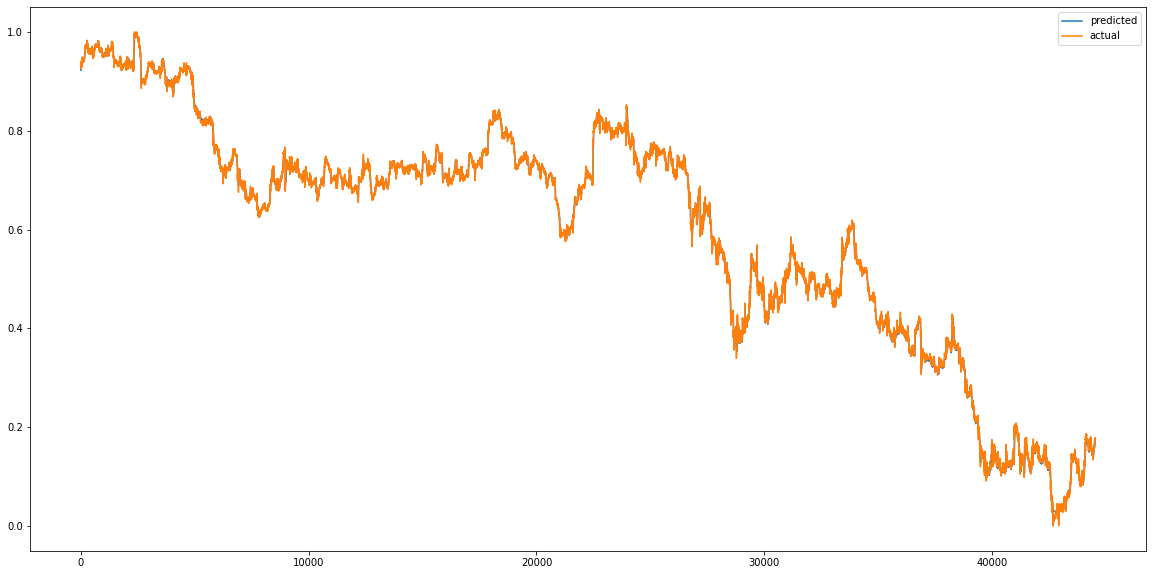

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


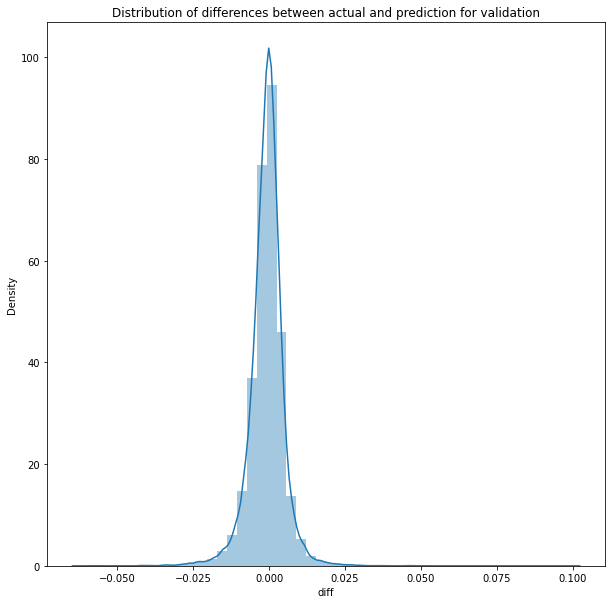

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 6s 4ms/step


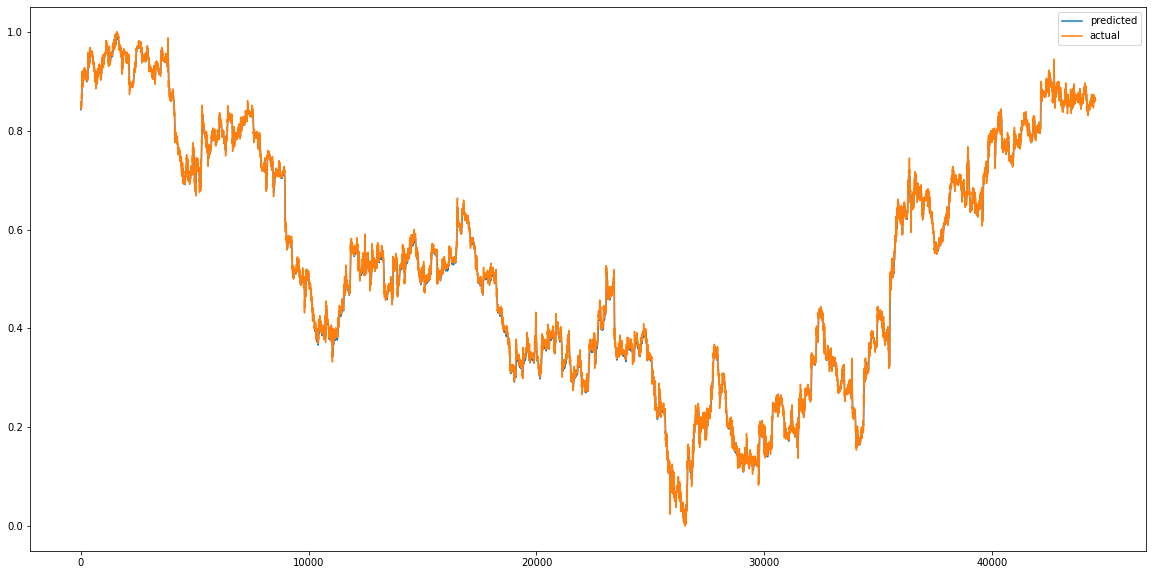

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


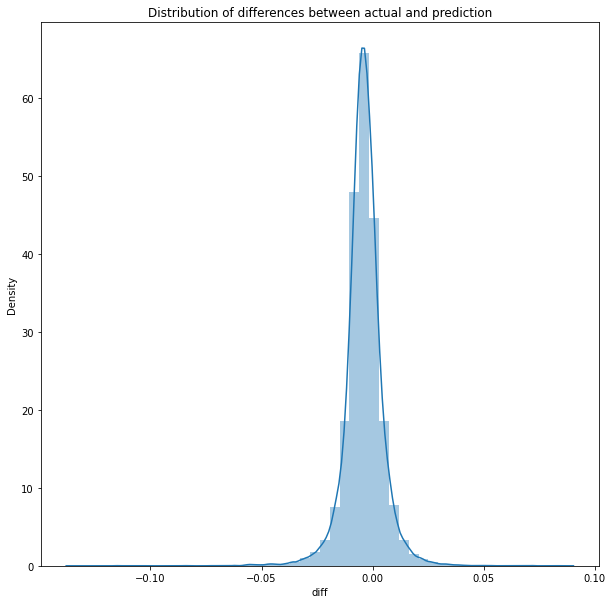

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.045928275414983e-05
RMSE :  0.009511008503526312
MAE :  0.0068404158961731425
1392/1392 [==============================] - 6s 4ms/step
R2_Score  : 0.9985027845390336


count    44530.000000
mean        -0.003991
std          0.008633
min         -0.134863
25%         -0.007976
50%         -0.003982
75%          0.000176
max          0.087293
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 285.4827 - mae: 2.5097 - mse: 285.4826 - root_mean_squared_error: 16.8962 - mape: 2375.9739
Epoch 1: val_mse improved from inf to 0.01998, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 45s 92ms/step - loss: 285.3865 - mae: 2.5089 - mse: 285.3865 - root_mean_squared_error: 16.8934 - mape: 2375.1892 - val_loss: 0.0200 - val_mae: 0.1149 - val_mse: 0.0200 - val_root_mean_squared_error: 0.1413 - val_mape: 7323.3174
Epoch 2/60
348/348 [==============================] - ETA: 0s - loss: 0.0098 - mae: 0.0768 - mse: 0.0098 - root_mean_squared_error: 0.0988 - mape: 2067.9800
Epoch 2: val_mse improved from 0.01998 to 0.00293, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 0.0098 - mae: 0.0768 - mse: 0.0098 - root_mean_squared_error: 0.0988 - mape: 2067.9800 - val_loss: 0.0029 - val_mae: 0.0375 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 5356.4282
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0417 - mse: 0.0032 - root_mean_squared_error: 0.0562 - mape: 1754.5131
Epoch 3: val_mse improved from 0.00293 to 0.00204, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0032 - mae: 0.0417 - mse: 0.0032 - root_mean_squared_error: 0.0562 - mape: 1753.9263 - val_loss: 0.0020 - val_mae: 0.0328 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0452 - val_mape: 4732.7446
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0370 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 1555.7559
Epoch 4: val_mse improved from 0.00204 to 0.00154, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 0.0024 - mae: 0.0370 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 1555.2358 - val_loss: 0.0015 - val_mae: 0.0297 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 4348.1646
Epoch 5/60
347/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0339 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 1258.3246
Epoch 5: val_mse improved from 0.00154 to 0.00120, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0020 - mae: 0.0339 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 1257.9027 - val_loss: 0.0012 - val_mae: 0.0264 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 4039.8567
Epoch 6/60
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0406 - mape: 1326.1638
Epoch 6: val_mse improved from 0.00120 to 0.00086, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0017 - mae: 0.0313 - mse: 0.0017 - root_mean_squared_error: 0.0406 - mape: 1326.1638 - val_loss: 8.5522e-04 - val_mae: 0.0205 - val_mse: 8.5522e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 3769.0273
Epoch 7/60
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1090.4968
Epoch 7: val_mse improved from 0.00086 to 0.00076, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1087.0208 - val_loss: 7.6330e-04 - val_mae: 0.0205 - val_mse: 7.6330e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 3526.7822
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 1184.3436
Epoch 8: val_mse improved from 0.00076 to 0.00056, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 1183.9473 - val_loss: 5.5983e-04 - val_mae: 0.0167 - val_mse: 5.5983e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 3318.8230
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 1060.8616
Epoch 9: val_mse improved from 0.00056 to 0.00055, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0010 - mae: 0.0249 - mse: 0.0010 - root_mean_squared_error: 0.0321 - mape: 1060.5076 - val_loss: 5.4565e-04 - val_mae: 0.0175 - val_mse: 5.4565e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 3132.7368
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 8.9018e-04 - mae: 0.0232 - mse: 8.9018e-04 - root_mean_squared_error: 0.0298 - mape: 1076.1071
Epoch 10: val_mse improved from 0.00055 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 8.9012e-04 - mae: 0.0232 - mse: 8.9012e-04 - root_mean_squared_error: 0.0298 - mape: 1075.7468 - val_loss: 4.6664e-04 - val_mae: 0.0164 - val_mse: 4.6664e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 2968.9231
Epoch 11/60
345/348 [============================>.] - ETA: 0s - loss: 7.8395e-04 - mae: 0.0217 - mse: 7.8395e-04 - root_mean_squared_error: 0.0280 - mape: 949.3409
Epoch 11: val_mse improved from 0.00047 to 0.00038, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 7.8341e-04 - mae: 0.0217 - mse: 7.8341e-04 - root_mean_squared_error: 0.0280 - mape: 943.5860 - val_loss: 3.8211e-04 - val_mae: 0.0143 - val_mse: 3.8211e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 2836.1392
Epoch 12/60
346/348 [============================>.] - ETA: 0s - loss: 6.8852e-04 - mae: 0.0204 - mse: 6.8852e-04 - root_mean_squared_error: 0.0262 - mape: 1005.6528
Epoch 12: val_mse improved from 0.00038 to 0.00029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 6.8846e-04 - mae: 0.0204 - mse: 6.8846e-04 - root_mean_squared_error: 0.0262 - mape: 1002.4425 - val_loss: 2.9213e-04 - val_mae: 0.0117 - val_mse: 2.9213e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2723.7397
Epoch 13/60
346/348 [============================>.] - ETA: 0s - loss: 6.0684e-04 - mae: 0.0192 - mse: 6.0684e-04 - root_mean_squared_error: 0.0246 - mape: 881.3911
Epoch 13: val_mse improved from 0.00029 to 0.00029, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 6.0659e-04 - mae: 0.0192 - mse: 6.0659e-04 - root_mean_squared_error: 0.0246 - mape: 878.5728 - val_loss: 2.9198e-04 - val_mae: 0.0123 - val_mse: 2.9198e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 2625.0835
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 5.4256e-04 - mae: 0.0181 - mse: 5.4256e-04 - root_mean_squared_error: 0.0233 - mape: 936.8723
Epoch 14: val_mse improved from 0.00029 to 0.00027, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 31s 88ms/step - loss: 5.4259e-04 - mae: 0.0181 - mse: 5.4259e-04 - root_mean_squared_error: 0.0233 - mape: 936.5587 - val_loss: 2.7476e-04 - val_mae: 0.0121 - val_mse: 2.7476e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 2535.5916
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 4.8459e-04 - mae: 0.0171 - mse: 4.8459e-04 - root_mean_squared_error: 0.0220 - mape: 898.4833
Epoch 15: val_mse did not improve from 0.00027
348/348 [==============================] - 7s 20ms/step - loss: 4.8454e-04 - mae: 0.0171 - mse: 4.8454e-04 - root_mean_squared_error: 0.0220 - mape: 898.1820 - val_loss: 3.5048e-04 - val_mae: 0.0152 - val_mse: 3.5048e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 2450.0461
Epoch 16/60
346/348 [============================>.] - ETA: 0s - loss: 4.3779e-04 - mae: 0.0163 - mse: 4.3779e-04 - root_mean_squared_error: 0.0209 - mape: 796.7115
Epoch 16: val_mse improved from 0.00027 to 0.00025, saving m

348/348 [==============================] - 29s 83ms/step - loss: 4.3760e-04 - mae: 0.0163 - mse: 4.3760e-04 - root_mean_squared_error: 0.0209 - mape: 794.1619 - val_loss: 2.5348e-04 - val_mae: 0.0120 - val_mse: 2.5348e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 2377.7583
Epoch 17/60
348/348 [==============================] - ETA: 0s - loss: 3.9463e-04 - mae: 0.0155 - mse: 3.9463e-04 - root_mean_squared_error: 0.0199 - mape: 778.3466
Epoch 17: val_mse improved from 0.00025 to 0.00020, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 3.9463e-04 - mae: 0.0155 - mse: 3.9463e-04 - root_mean_squared_error: 0.0199 - mape: 778.3466 - val_loss: 1.9515e-04 - val_mae: 0.0098 - val_mse: 1.9515e-04 - val_root_mean_squared_error: 0.0140 - val_mape: 2307.7188
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 3.5380e-04 - mae: 0.0146 - mse: 3.5380e-04 - root_mean_squared_error: 0.0188 - mape: 854.7187
Epoch 18: val_mse did not improve from 0.00020
348/348 [==============================] - 7s 19ms/step - loss: 3.5378e-04 - mae: 0.0146 - mse: 3.5378e-04 - root_mean_squared_error: 0.0188 - mape: 854.4316 - val_loss: 2.2453e-04 - val_mae: 0.0115 - val_mse: 2.2453e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 2240.4565
Epoch 19/60
346/348 [============================>.] - ETA: 0s - loss: 3.1864e-04 - mae: 0.0139 - mse: 3.1864e-04 - root_mean_squared_error: 0.0179 - mape: 956.4774
Epoch 19: val_mse did not improve from 0.00020
348/348 [====

348/348 [==============================] - 29s 84ms/step - loss: 1.9752e-04 - mae: 0.0109 - mse: 1.9752e-04 - root_mean_squared_error: 0.0141 - mape: 617.8005 - val_loss: 1.6194e-04 - val_mae: 0.0105 - val_mse: 1.6194e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1733.7421
Epoch 24/60
347/348 [============================>.] - ETA: 0s - loss: 1.7901e-04 - mae: 0.0104 - mse: 1.7901e-04 - root_mean_squared_error: 0.0134 - mape: 600.6352
Epoch 24: val_mse did not improve from 0.00016
348/348 [==============================] - 7s 19ms/step - loss: 1.7901e-04 - mae: 0.0104 - mse: 1.7901e-04 - root_mean_squared_error: 0.0134 - mape: 600.4337 - val_loss: 2.5985e-04 - val_mae: 0.0140 - val_mse: 2.5985e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1686.3475
Epoch 25/60
346/348 [============================>.] - ETA: 0s - loss: 1.6572e-04 - mae: 0.0100 - mse: 1.6572e-04 - root_mean_squared_error: 0.0129 - mape: 578.1626
Epoch 25: val_mse did not improve from 0.00016
348/348 [====

348/348 [==============================] - 29s 83ms/step - loss: 8.1030e-05 - mae: 0.0070 - mse: 8.1030e-05 - root_mean_squared_error: 0.0090 - mape: 434.3262 - val_loss: 1.3962e-04 - val_mae: 0.0101 - val_mse: 1.3962e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1337.0977
Epoch 35/60
348/348 [==============================] - ETA: 0s - loss: 7.4877e-05 - mae: 0.0067 - mse: 7.4877e-05 - root_mean_squared_error: 0.0087 - mape: 435.9781
Epoch 35: val_mse did not improve from 0.00014
348/348 [==============================] - 7s 19ms/step - loss: 7.4877e-05 - mae: 0.0067 - mse: 7.4877e-05 - root_mean_squared_error: 0.0087 - mape: 435.9781 - val_loss: 2.6030e-04 - val_mae: 0.0145 - val_mse: 2.6030e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 1295.6924
Epoch 36/60
347/348 [============================>.] - ETA: 0s - loss: 7.1196e-05 - mae: 0.0065 - mse: 7.1196e-05 - root_mean_squared_error: 0.0084 - mape: 441.3538
Epoch 36: val_mse did not improve from 0.00014
348/348 [====

348/348 [==============================] - 29s 84ms/step - loss: 5.9241e-05 - mae: 0.0060 - mse: 5.9241e-05 - root_mean_squared_error: 0.0077 - mape: 356.0143 - val_loss: 9.1463e-05 - val_mae: 0.0085 - val_mse: 9.1463e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 993.8016
Epoch 50/60
348/348 [==============================] - ETA: 0s - loss: 6.0510e-05 - mae: 0.0060 - mse: 6.0510e-05 - root_mean_squared_error: 0.0078 - mape: 322.3773
Epoch 50: val_mse improved from 0.00009 to 0.00005, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 6.0510e-05 - mae: 0.0060 - mse: 6.0510e-05 - root_mean_squared_error: 0.0078 - mape: 322.3773 - val_loss: 5.1111e-05 - val_mae: 0.0059 - val_mse: 5.1111e-05 - val_root_mean_squared_error: 0.0071 - val_mape: 986.5197
Epoch 51/60
347/348 [============================>.] - ETA: 0s - loss: 6.4565e-05 - mae: 0.0063 - mse: 6.4565e-05 - root_mean_squared_error: 0.0080 - mape: 305.5577
Epoch 51: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 19ms/step - loss: 6.4570e-05 - mae: 0.0063 - mse: 6.4570e-05 - root_mean_squared_error: 0.0080 - mape: 305.4576 - val_loss: 2.1641e-04 - val_mae: 0.0138 - val_mse: 2.1641e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 965.2866
Epoch 52/60
345/348 [============================>.] - ETA: 0s - loss: 6.6324e-05 - mae: 0.0061 - mse: 6.6324e-05 - root_mean_squared_error: 0.0081 - mape: 333.1801
Epoch 52: val_mse did not improve from 0.00005
348/348 [======

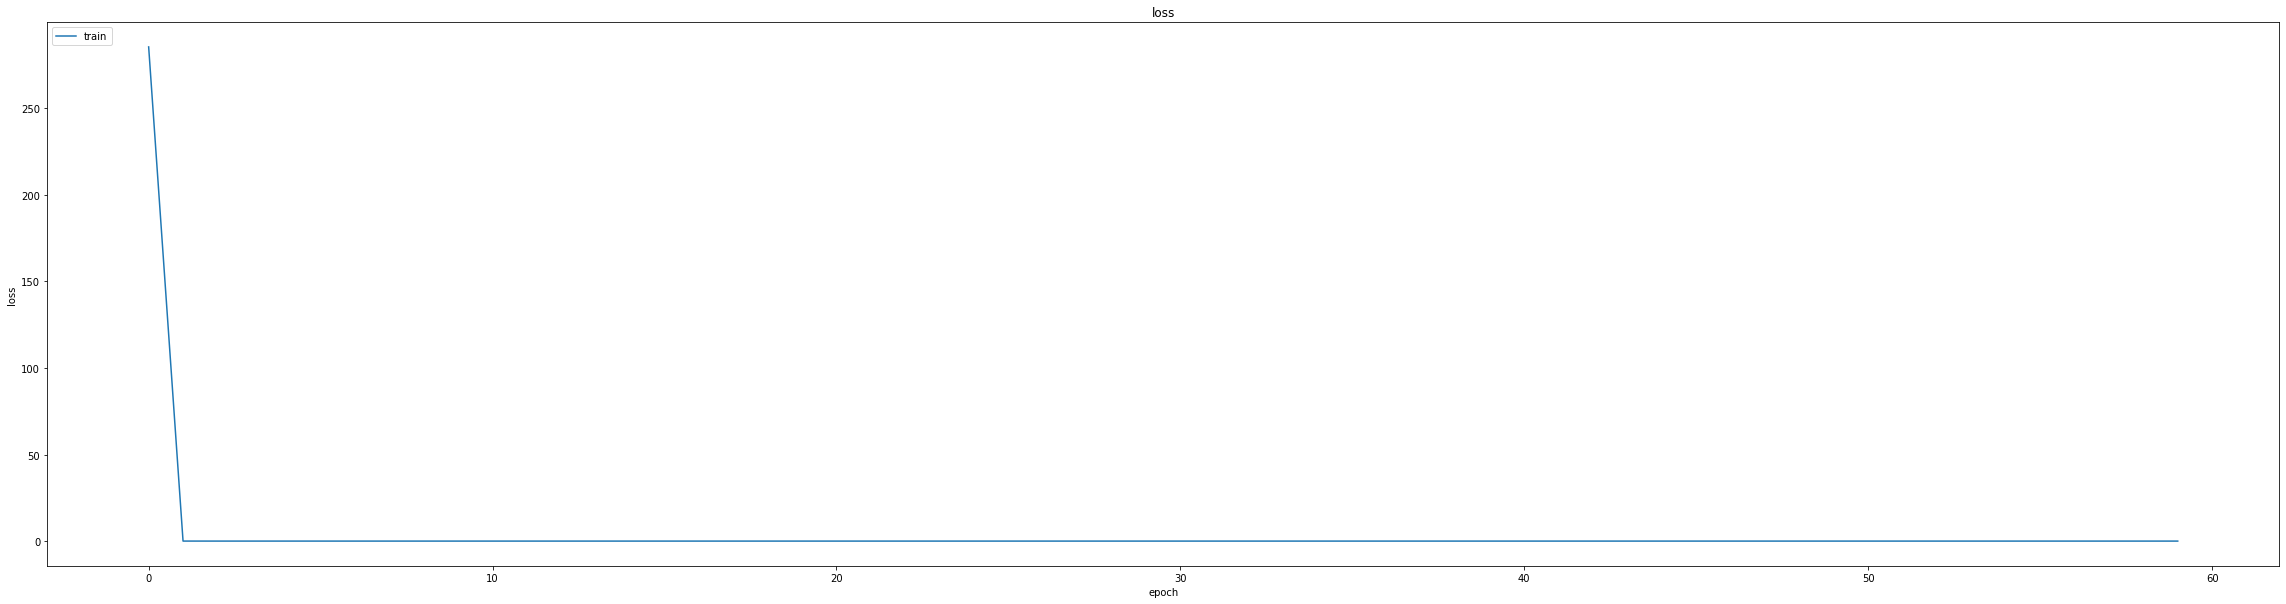

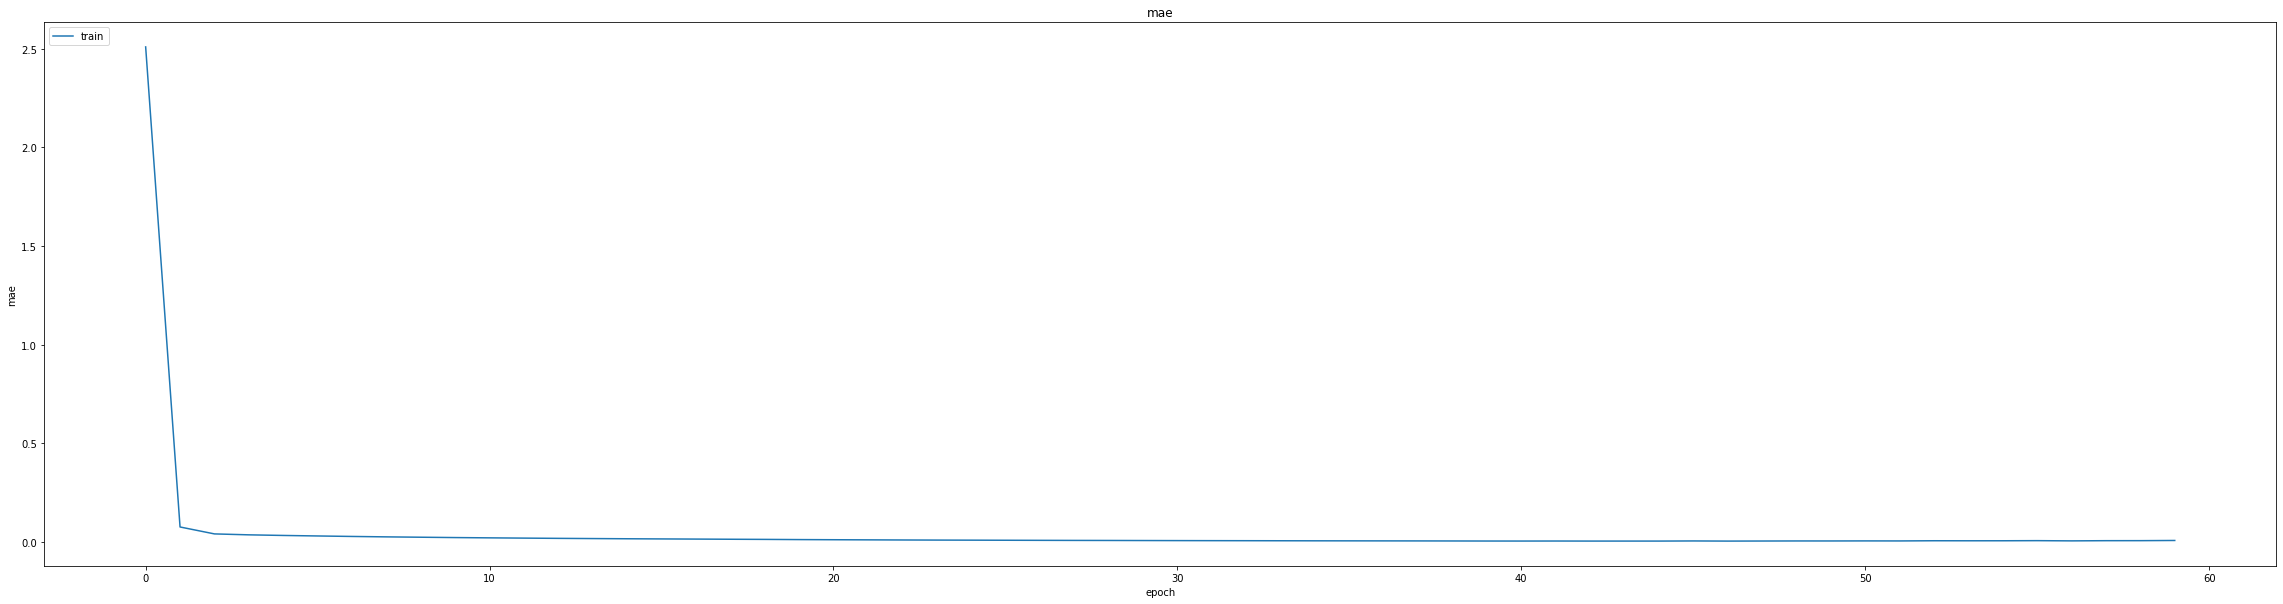

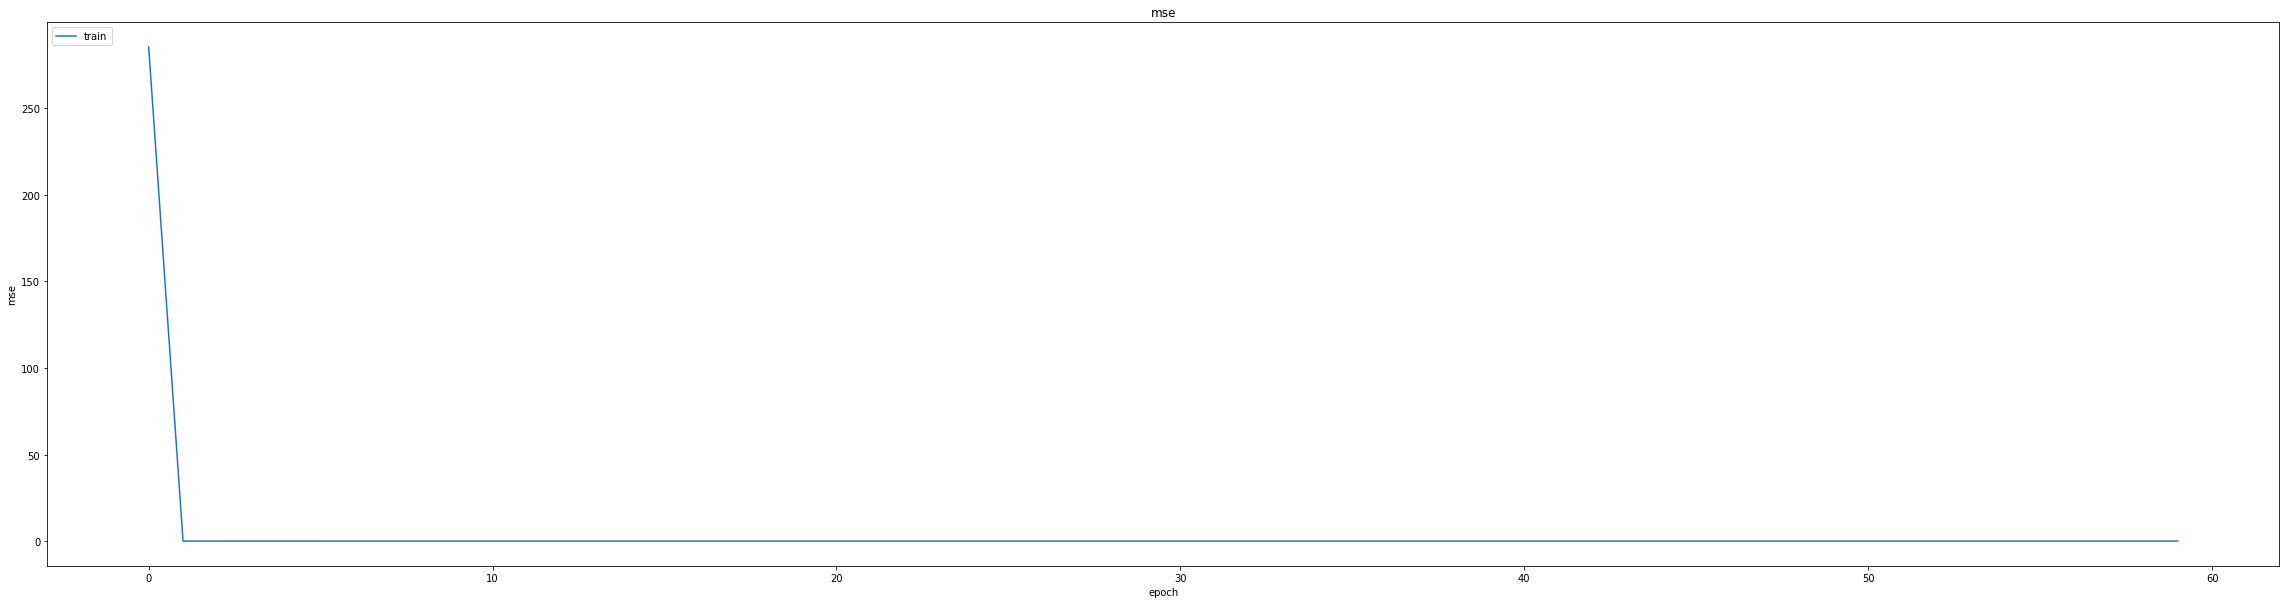

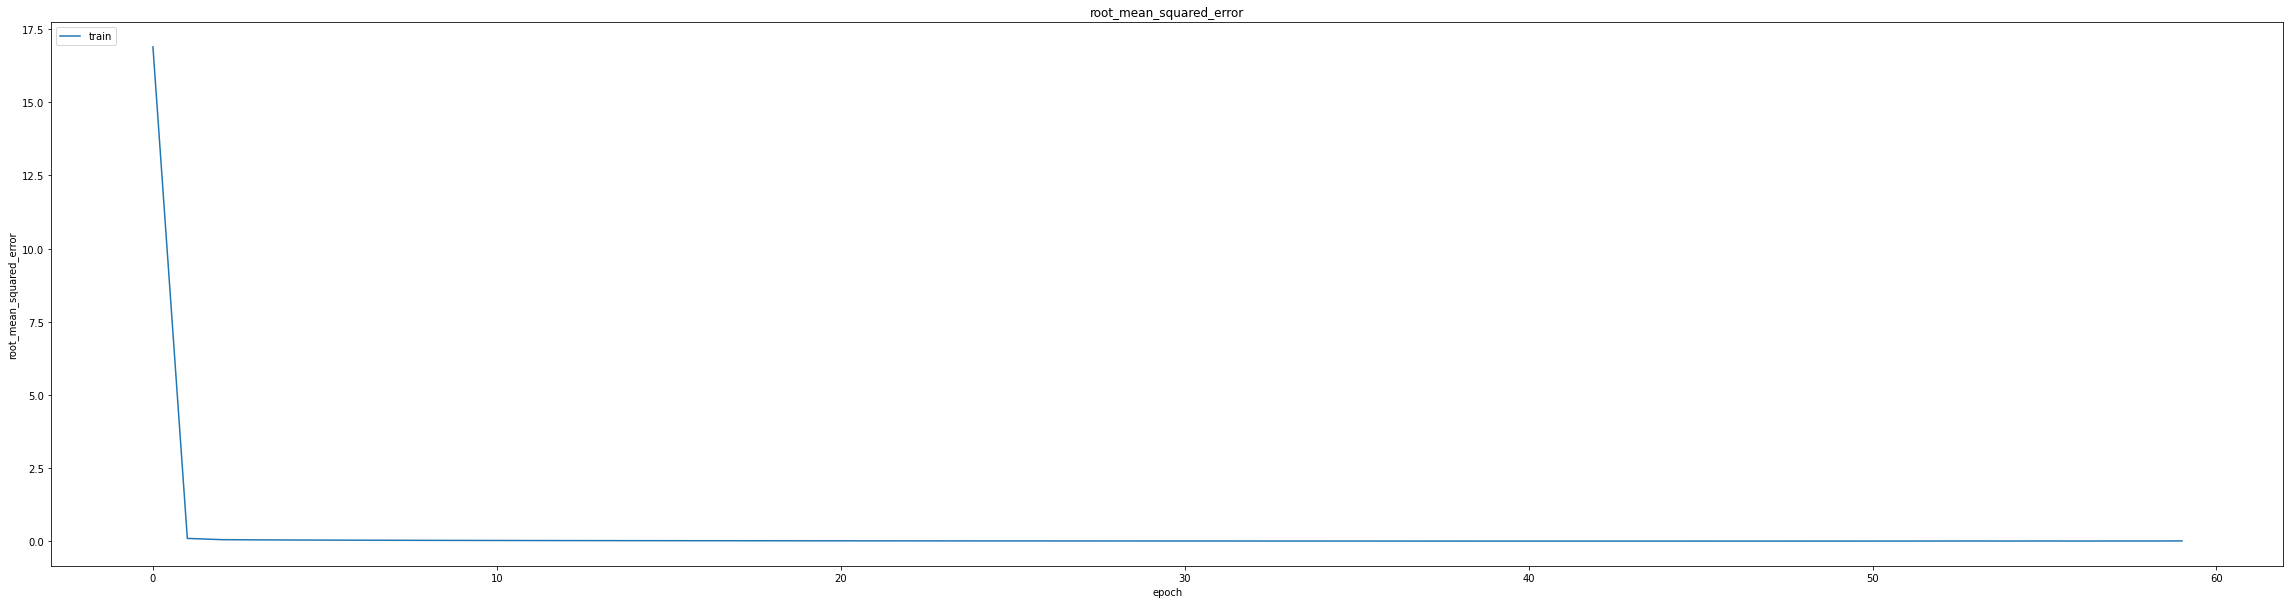

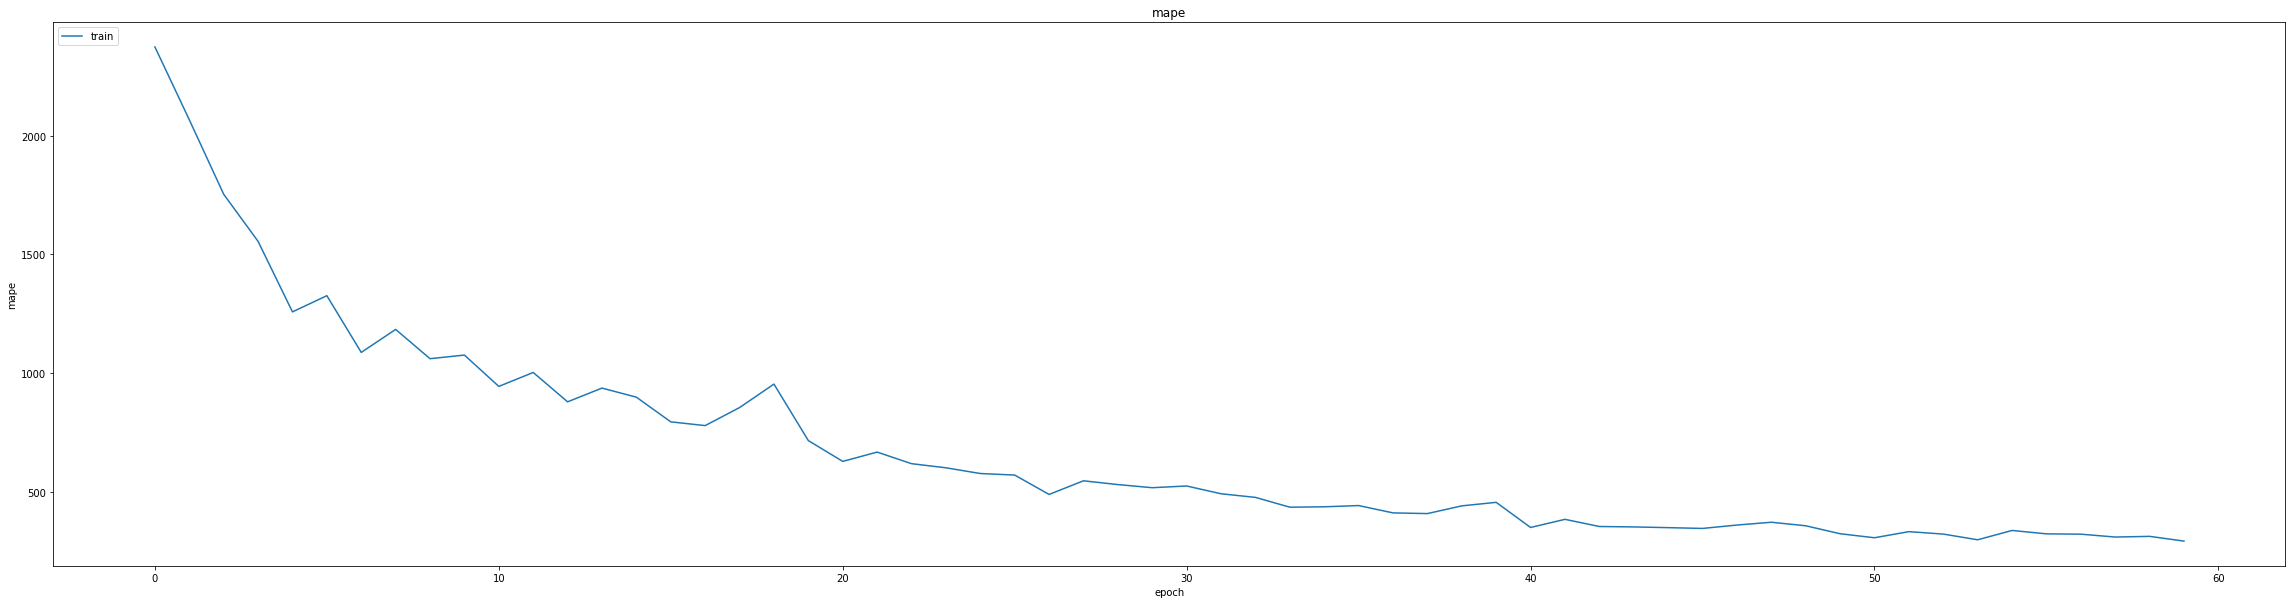

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.005946670658886433
0.007149220909923315
1392/1392 [==============================] - 13s 9ms/step
0.9964093439716386


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
348/348 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0146 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 419.8032
Epoch 1: val_mse did not improve from 0.00005
348/348 [==============================] - 16s 29ms/step - loss: 0.0014 - mae: 0.0146 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 419.8032 - val_loss: 3.2237e-04 - val_mae: 0.0169 - val_mse: 3.2237e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 1175.2972 - lr: 0.0010
Epoch 2/20
348/348 [==============================] - ETA: 0s - loss: 4.0870e-05 - mae: 0.0049 - mse: 4.0870e-05 - root_mean_squared_error: 0.0064 - mape: 361.6491
Epoch 2: val_mse did not improve from 0.00005
348/348 [==============================] - 7s 19ms/step - loss: 4.0870e-05 - mae: 0.0049 - mse: 4.0870e-05 - root_mean_squared_error: 0.0064 - mape: 361.6491 - val_loss: 2.4535e-04 - val_mae: 0.0148 - val_mse: 2.4535e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1019.3109 - lr: 0.0010
lr chan

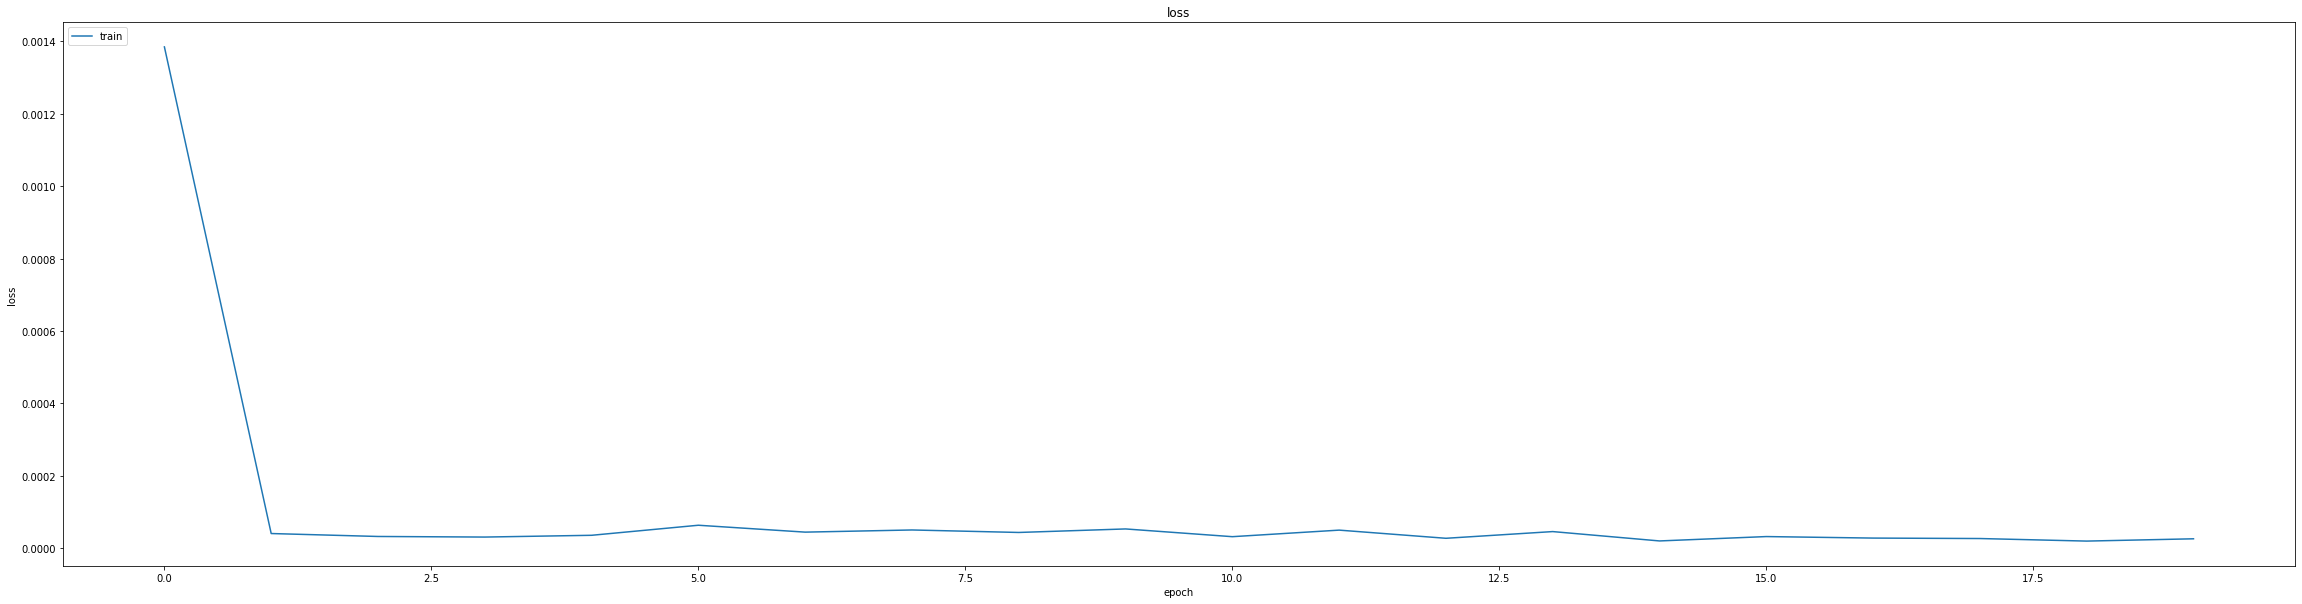

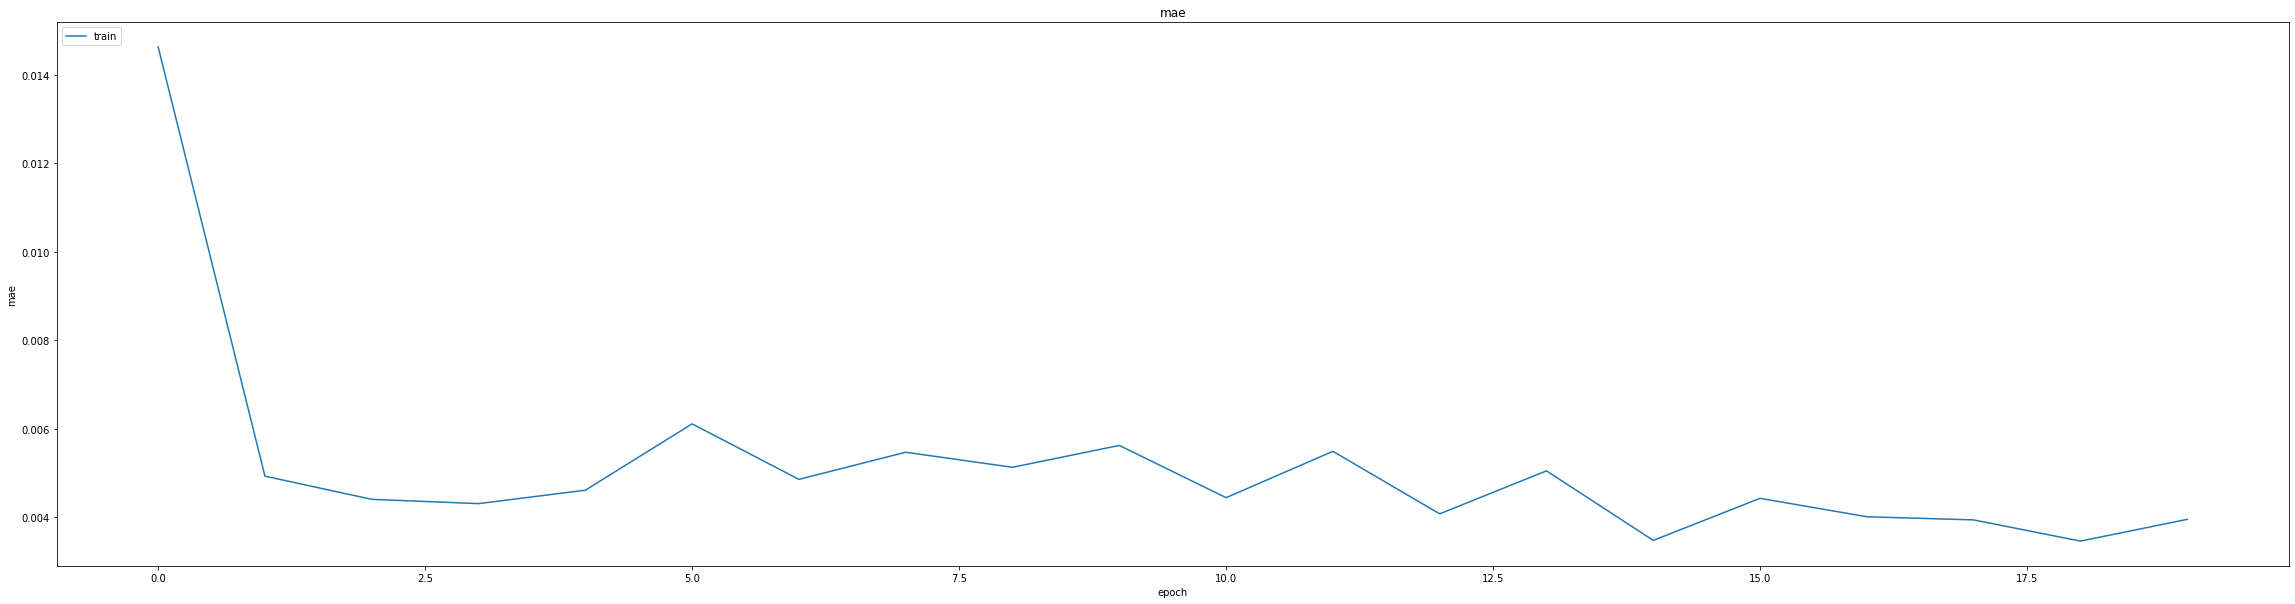

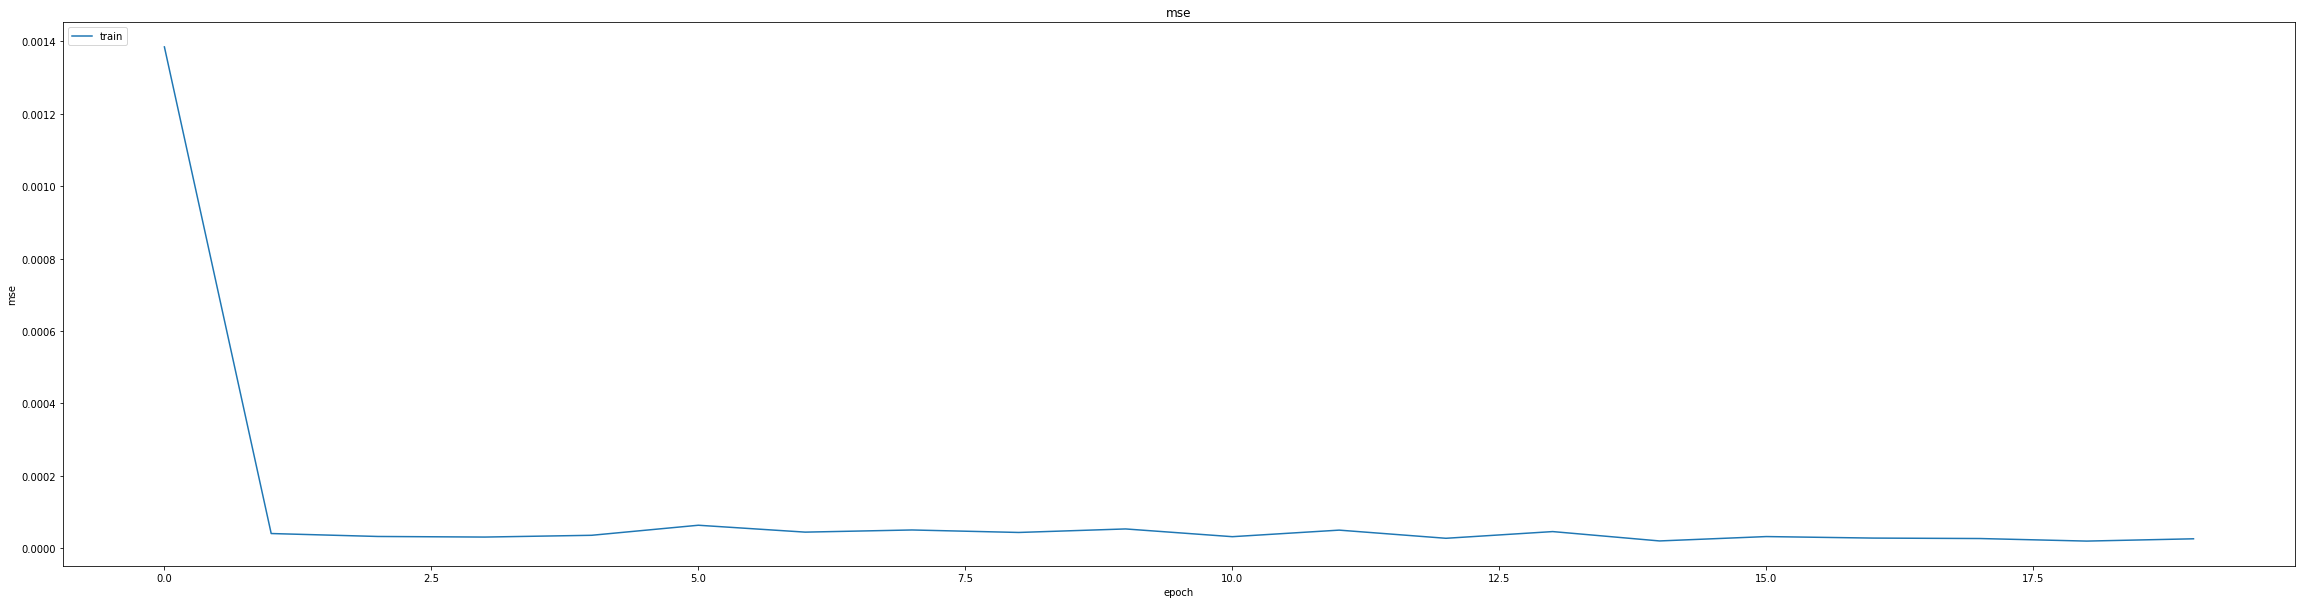

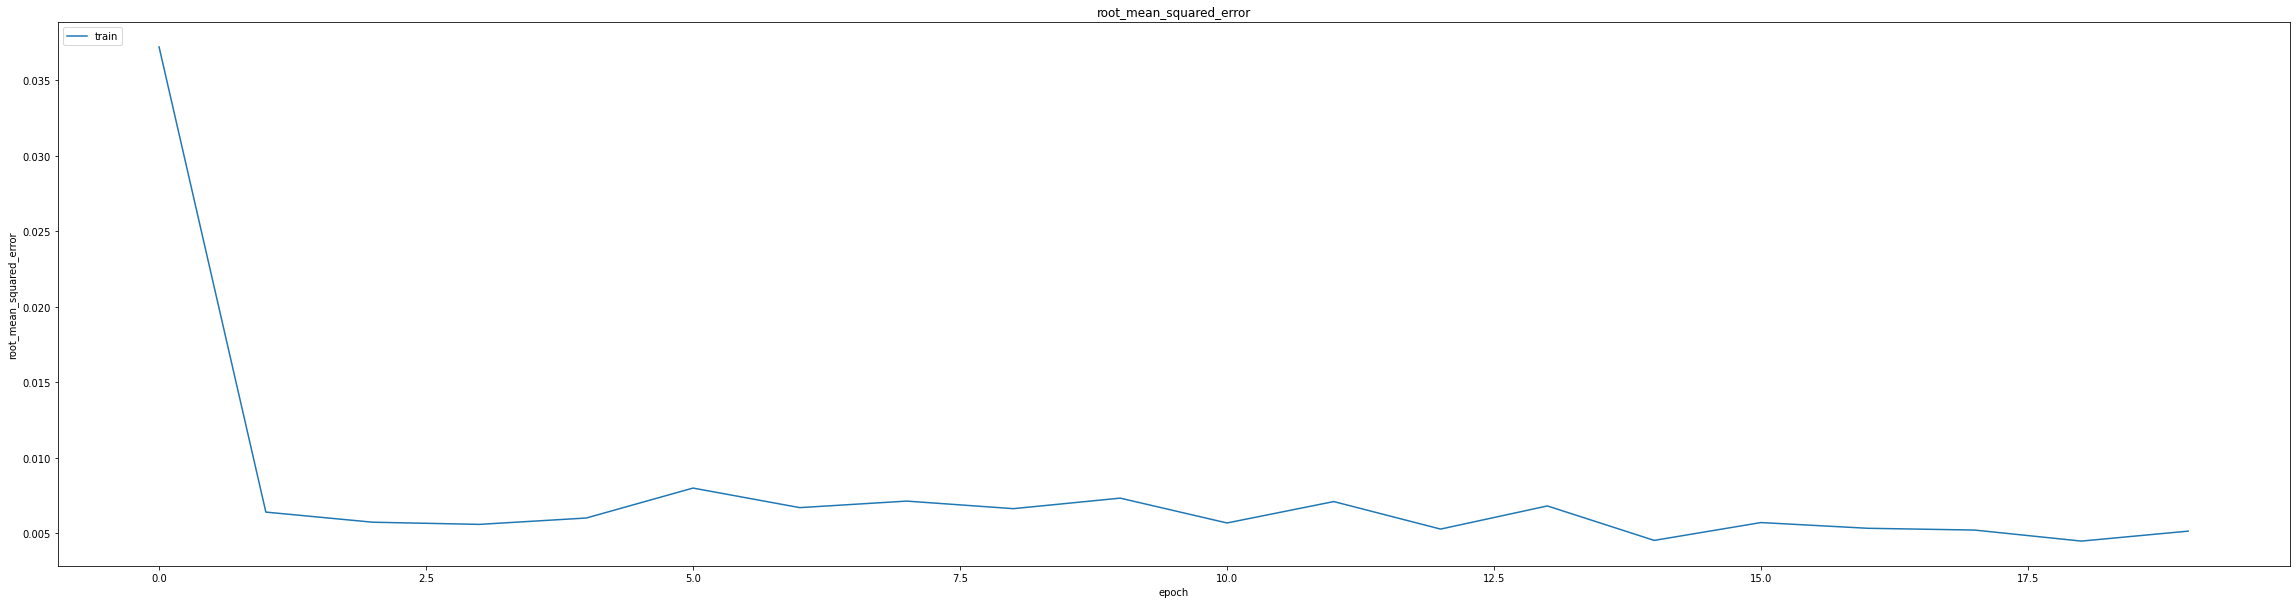

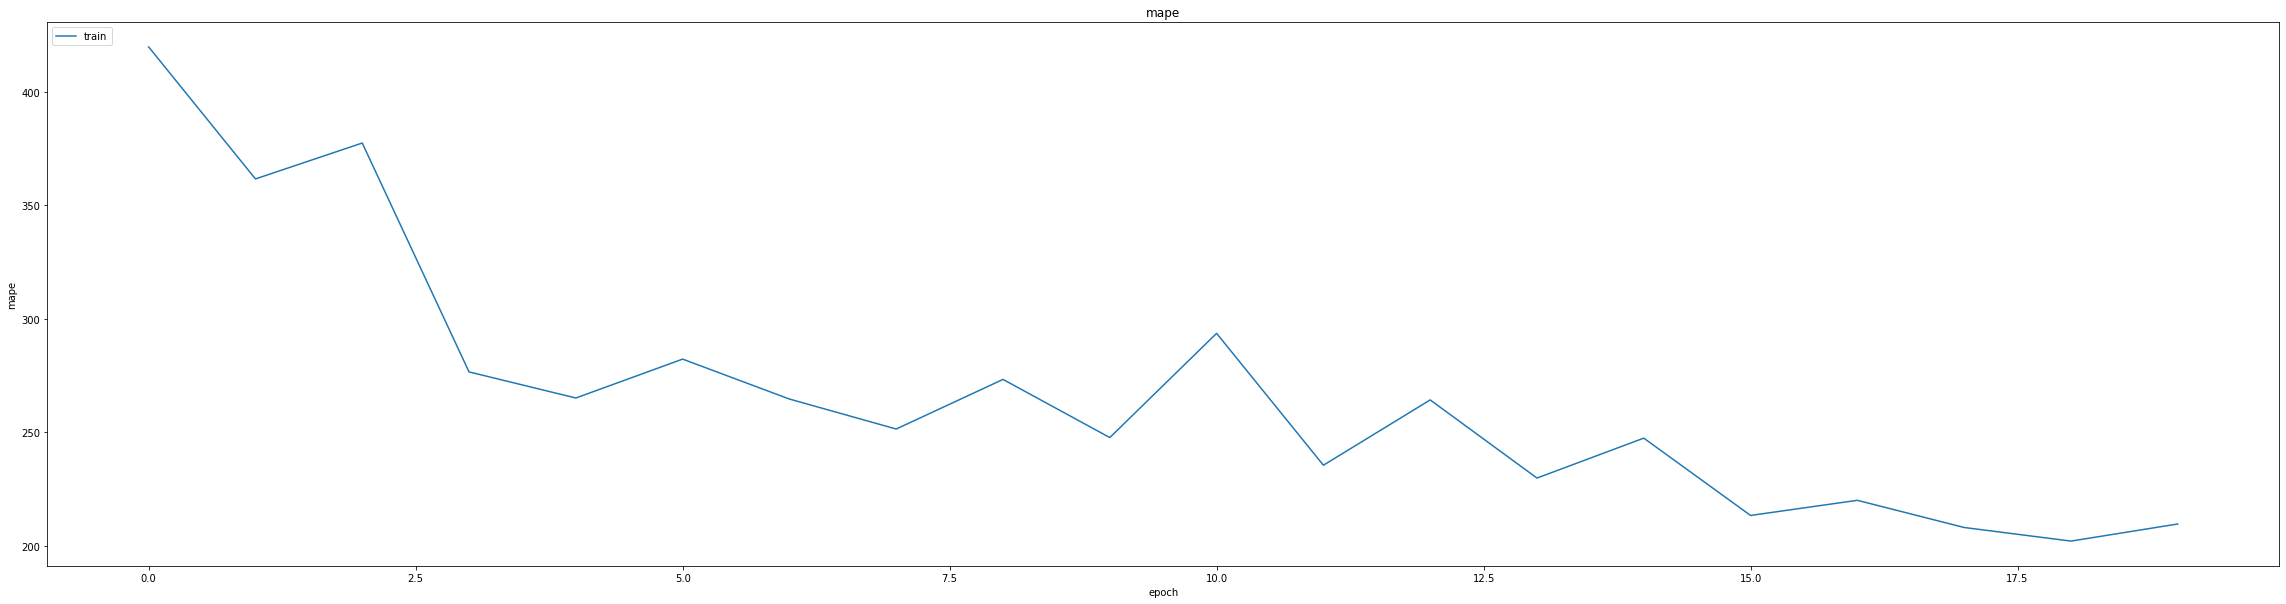

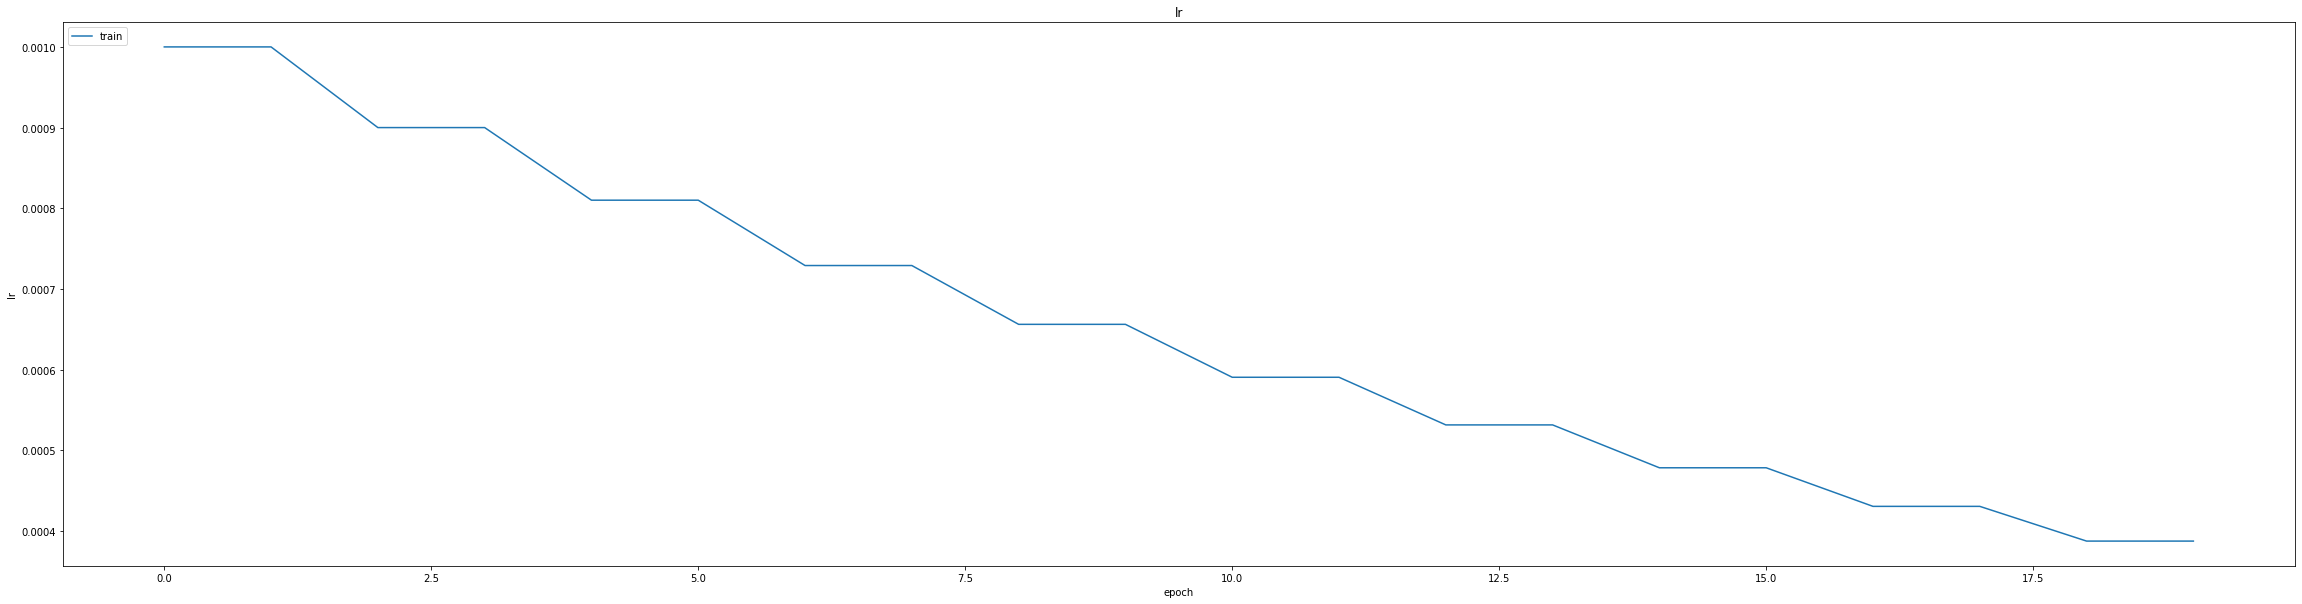

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007922417484223843
0.008719992823898792
1392/1392 [==============================] - 9s 5ms/step
0.9912709683146519


1392/1392 [==============================] - 8s 6ms/step


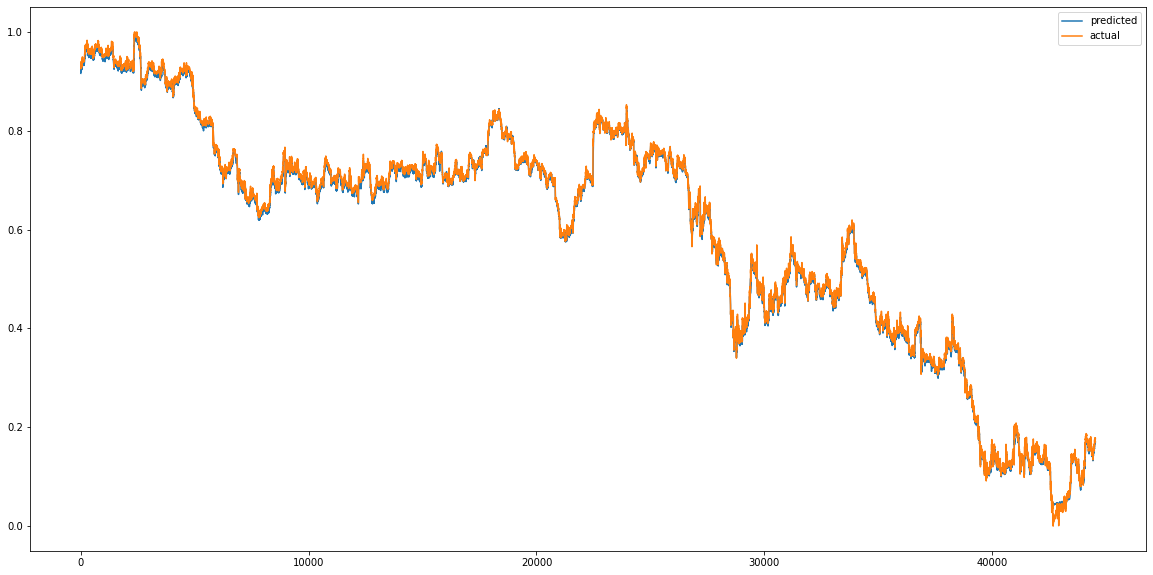

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


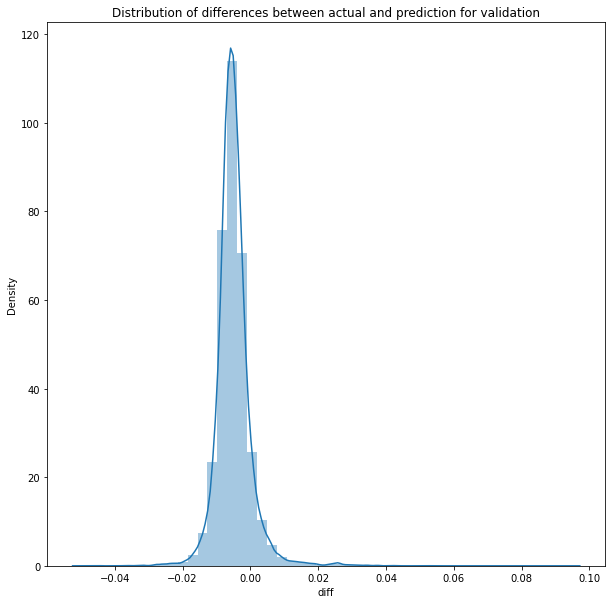

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 8s 5ms/step


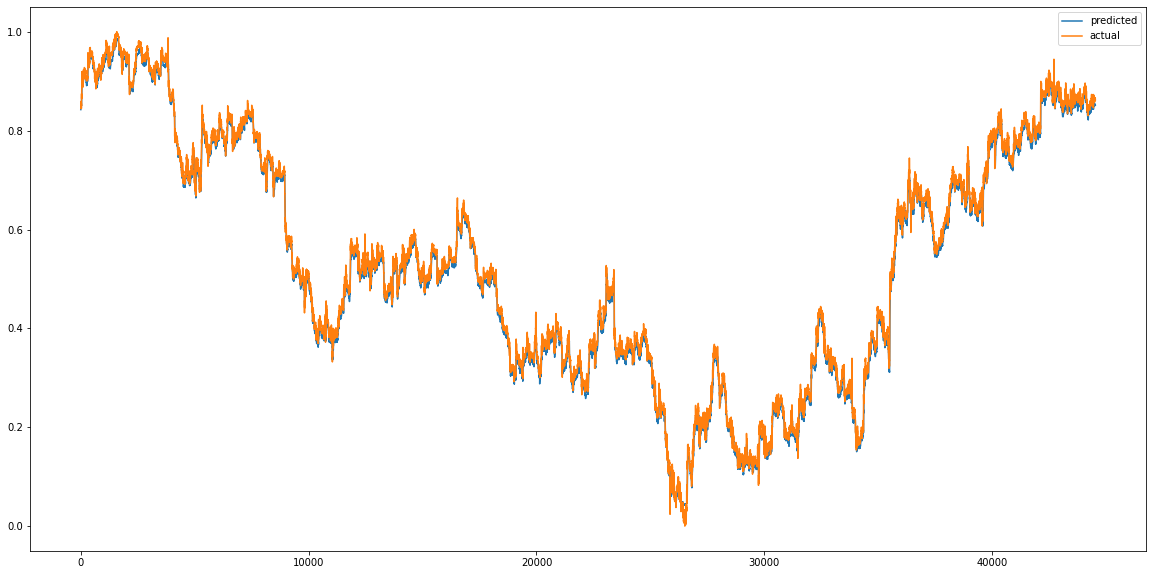

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


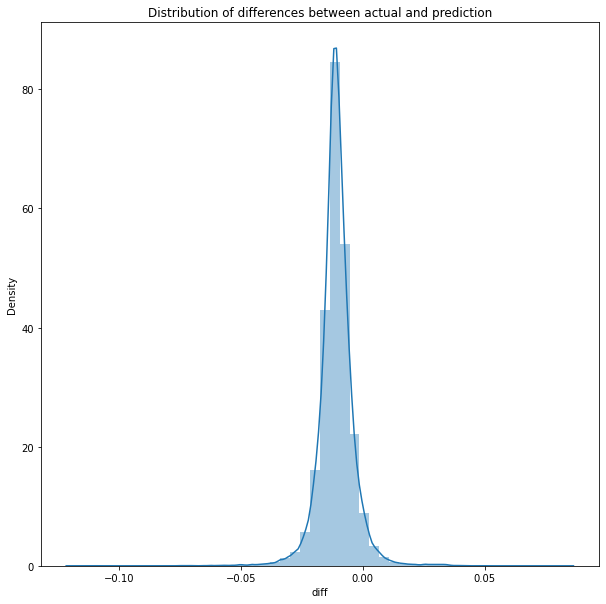

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00016899819389438515
RMSE :  0.012999930534213833
MAE :  0.011423164282003307
1392/1392 [==============================] - 7s 5ms/step
R2_Score  : 0.9972028662953016


count    44530.000000
mean        -0.010777
std          0.007269
min         -0.118972
25%         -0.014023
50%         -0.010930
75%         -0.007555
max          0.083876
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
348/348 [==============================] - ETA: 0s - loss: 998.4869 - mae: 11.6490 - mse: 998.4870 - root_mean_squared_error: 31.5988 - mape: 35944.1719  
Epoch 1: val_mse improved from inf to 3.46968, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 17s 40ms/step - loss: 998.4869 - mae: 11.6490 - mse: 998.4870 - root_mean_squared_error: 31.5988 - mape: 35944.1719 - val_loss: 3.4697 - val_mae: 1.8468 - val_mse: 3.4697 - val_root_mean_squared_error: 1.8627 - val_mape: 55874.1367
Epoch 2/60
348/348 [==============================] - ETA: 0s - loss: 1.6312 - mae: 1.2126 - mse: 1.6312 - root_mean_squared_error: 1.2772 - mape: 11801.2900
Epoch 2: val_mse improved from 3.46968 to 0.64470, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 1.6312 - mae: 1.2126 - mse: 1.6312 - root_mean_squared_error: 1.2772 - mape: 11801.2900 - val_loss: 0.6447 - val_mae: 0.7659 - val_mse: 0.6447 - val_root_mean_squared_error: 0.8029 - val_mape: 31181.2539
Epoch 3/60
348/348 [==============================] - ETA: 0s - loss: 0.4106 - mae: 0.5766 - mse: 0.4106 - root_mean_squared_error: 0.6408 - mape: 8407.8418
Epoch 3: val_mse improved from 0.64470 to 0.21648, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.4106 - mae: 0.5766 - mse: 0.4106 - root_mean_squared_error: 0.6408 - mape: 8407.8418 - val_loss: 0.2165 - val_mae: 0.3985 - val_mse: 0.2165 - val_root_mean_squared_error: 0.4653 - val_mape: 22770.1895
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.1703 - mae: 0.3246 - mse: 0.1703 - root_mean_squared_error: 0.4127 - mape: 7198.0083
Epoch 4: val_mse improved from 0.21648 to 0.10567, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.1703 - mae: 0.3246 - mse: 0.1703 - root_mean_squared_error: 0.4127 - mape: 7195.6401 - val_loss: 0.1057 - val_mae: 0.2454 - val_mse: 0.1057 - val_root_mean_squared_error: 0.3251 - val_mape: 18676.7812
Epoch 5/60
347/348 [============================>.] - ETA: 0s - loss: 0.1005 - mae: 0.2324 - mse: 0.1005 - root_mean_squared_error: 0.3170 - mape: 6141.4526
Epoch 5: val_mse improved from 0.10567 to 0.07154, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.1005 - mae: 0.2324 - mse: 0.1005 - root_mean_squared_error: 0.3170 - mape: 6139.4238 - val_loss: 0.0715 - val_mae: 0.1877 - val_mse: 0.0715 - val_root_mean_squared_error: 0.2675 - val_mape: 16383.0625
Epoch 6/60
345/348 [============================>.] - ETA: 0s - loss: 0.0774 - mae: 0.2042 - mse: 0.0774 - root_mean_squared_error: 0.2783 - mape: 5351.3896
Epoch 6: val_mse improved from 0.07154 to 0.06079, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0774 - mae: 0.2042 - mse: 0.0774 - root_mean_squared_error: 0.2782 - mape: 5319.3359 - val_loss: 0.0608 - val_mae: 0.1864 - val_mse: 0.0608 - val_root_mean_squared_error: 0.2466 - val_mape: 15023.3496
Epoch 7/60
346/348 [============================>.] - ETA: 0s - loss: 0.0696 - mae: 0.2043 - mse: 0.0696 - root_mean_squared_error: 0.2638 - mape: 5009.1060
Epoch 7: val_mse improved from 0.06079 to 0.05776, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0696 - mae: 0.2044 - mse: 0.0696 - root_mean_squared_error: 0.2638 - mape: 4993.2812 - val_loss: 0.0578 - val_mae: 0.1921 - val_mse: 0.0578 - val_root_mean_squared_error: 0.2403 - val_mape: 14214.0986
Epoch 8/60
344/348 [============================>.] - ETA: 0s - loss: 0.0671 - mae: 0.2099 - mse: 0.0671 - root_mean_squared_error: 0.2590 - mape: 4717.2729
Epoch 8: val_mse improved from 0.05776 to 0.05708, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0671 - mae: 0.2099 - mse: 0.0671 - root_mean_squared_error: 0.2590 - mape: 4675.6333 - val_loss: 0.0571 - val_mae: 0.1961 - val_mse: 0.0571 - val_root_mean_squared_error: 0.2389 - val_mape: 13740.6465
Epoch 9/60
346/348 [============================>.] - ETA: 0s - loss: 0.0645 - mae: 0.2079 - mse: 0.0645 - root_mean_squared_error: 0.2540 - mape: 4592.4731
Epoch 9: val_mse improved from 0.05708 to 0.04753, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0645 - mae: 0.2077 - mse: 0.0645 - root_mean_squared_error: 0.2539 - mape: 4577.9082 - val_loss: 0.0475 - val_mae: 0.1703 - val_mse: 0.0475 - val_root_mean_squared_error: 0.2180 - val_mape: 13374.5703
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 0.0417 - mae: 0.1489 - mse: 0.0417 - root_mean_squared_error: 0.2042 - mape: 4191.9761
Epoch 10: val_mse improved from 0.04753 to 0.02314, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0417 - mae: 0.1489 - mse: 0.0417 - root_mean_squared_error: 0.2042 - mape: 4190.6328 - val_loss: 0.0231 - val_mae: 0.0939 - val_mse: 0.0231 - val_root_mean_squared_error: 0.1521 - val_mape: 11709.2559
Epoch 11/60
348/348 [==============================] - ETA: 0s - loss: 0.0246 - mae: 0.1040 - mse: 0.0246 - root_mean_squared_error: 0.1570 - mape: 3517.2910
Epoch 11: val_mse improved from 0.02314 to 0.01657, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0246 - mae: 0.1040 - mse: 0.0246 - root_mean_squared_error: 0.1570 - mape: 3517.2910 - val_loss: 0.0166 - val_mae: 0.0745 - val_mse: 0.0166 - val_root_mean_squared_error: 0.1287 - val_mape: 10413.1709
Epoch 12/60
348/348 [==============================] - ETA: 0s - loss: 0.0184 - mae: 0.0906 - mse: 0.0184 - root_mean_squared_error: 0.1355 - mape: 3291.9280
Epoch 12: val_mse improved from 0.01657 to 0.01418, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0184 - mae: 0.0906 - mse: 0.0184 - root_mean_squared_error: 0.1355 - mape: 3291.9280 - val_loss: 0.0142 - val_mae: 0.0727 - val_mse: 0.0142 - val_root_mean_squared_error: 0.1191 - val_mape: 9601.4326
Epoch 13/60
345/348 [============================>.] - ETA: 0s - loss: 0.0153 - mae: 0.0828 - mse: 0.0153 - root_mean_squared_error: 0.1238 - mape: 3212.2664
Epoch 13: val_mse improved from 0.01418 to 0.01114, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0153 - mae: 0.0827 - mse: 0.0153 - root_mean_squared_error: 0.1237 - mape: 3192.9436 - val_loss: 0.0111 - val_mae: 0.0627 - val_mse: 0.0111 - val_root_mean_squared_error: 0.1055 - val_mape: 9066.2021
Epoch 14/60
346/348 [============================>.] - ETA: 0s - loss: 0.0105 - mae: 0.0621 - mse: 0.0105 - root_mean_squared_error: 0.1026 - mape: 2794.7993
Epoch 14: val_mse improved from 0.01114 to 0.00755, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0105 - mae: 0.0621 - mse: 0.0105 - root_mean_squared_error: 0.1026 - mape: 2785.9204 - val_loss: 0.0076 - val_mae: 0.0468 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0869 - val_mape: 8147.1079
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 0.0075 - mae: 0.0526 - mse: 0.0075 - root_mean_squared_error: 0.0869 - mape: 2684.6318
Epoch 15: val_mse improved from 0.00755 to 0.00572, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0075 - mae: 0.0526 - mse: 0.0075 - root_mean_squared_error: 0.0868 - mape: 2683.7339 - val_loss: 0.0057 - val_mae: 0.0406 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0757 - val_mape: 7417.2070
Epoch 16/60
345/348 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0460 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 2390.1475
Epoch 16: val_mse improved from 0.00572 to 0.00444, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0056 - mae: 0.0459 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 2375.6880 - val_loss: 0.0044 - val_mae: 0.0359 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0666 - val_mape: 6813.9873
Epoch 17/60
346/348 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0410 - mse: 0.0043 - root_mean_squared_error: 0.0657 - mape: 2210.1982
Epoch 17: val_mse improved from 0.00444 to 0.00346, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0043 - mae: 0.0410 - mse: 0.0043 - root_mean_squared_error: 0.0656 - mape: 2203.1484 - val_loss: 0.0035 - val_mae: 0.0319 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0588 - val_mape: 6303.2290
Epoch 18/60
345/348 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0369 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 2029.3665
Epoch 18: val_mse improved from 0.00346 to 0.00274, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0034 - mae: 0.0369 - mse: 0.0034 - root_mean_squared_error: 0.0580 - mape: 2017.1161 - val_loss: 0.0027 - val_mae: 0.0276 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mape: 5858.1890
Epoch 19/60
346/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0332 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 1920.0393
Epoch 19: val_mse improved from 0.00274 to 0.00211, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0026 - mae: 0.0332 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 1913.9198 - val_loss: 0.0021 - val_mae: 0.0239 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0460 - val_mape: 5458.3433
Epoch 20/60
345/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0302 - mse: 0.0021 - root_mean_squared_error: 0.0458 - mape: 1758.6339
Epoch 20: val_mse improved from 0.00211 to 0.00168, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0021 - mae: 0.0302 - mse: 0.0021 - root_mean_squared_error: 0.0457 - mape: 1748.0077 - val_loss: 0.0017 - val_mae: 0.0214 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 5110.4307
Epoch 21/60
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0276 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1619.9438
Epoch 21: val_mse improved from 0.00168 to 0.00138, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0017 - mae: 0.0276 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 1619.4006 - val_loss: 0.0014 - val_mae: 0.0200 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 4802.4697
Epoch 22/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0256 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1537.7288
Epoch 22: val_mse improved from 0.00138 to 0.00109, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0014 - mae: 0.0256 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 1537.2139 - val_loss: 0.0011 - val_mae: 0.0175 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0331 - val_mape: 4525.0522
Epoch 23/60
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0239 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 1512.8326
Epoch 23: val_mse improved from 0.00109 to 0.00090, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0012 - mae: 0.0239 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 1512.3253 - val_loss: 9.0166e-04 - val_mae: 0.0165 - val_mse: 9.0166e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 4275.7510
Epoch 24/60
345/348 [============================>.] - ETA: 0s - loss: 9.8273e-04 - mae: 0.0224 - mse: 9.8273e-04 - root_mean_squared_error: 0.0313 - mape: 1406.3480
Epoch 24: val_mse improved from 0.00090 to 0.00078, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 9.8193e-04 - mae: 0.0223 - mse: 9.8193e-04 - root_mean_squared_error: 0.0313 - mape: 1397.8275 - val_loss: 7.7963e-04 - val_mae: 0.0158 - val_mse: 7.7963e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 4049.5713
Epoch 25/60
348/348 [==============================] - ETA: 0s - loss: 8.3358e-04 - mae: 0.0209 - mse: 8.3358e-04 - root_mean_squared_error: 0.0289 - mape: 1324.3147
Epoch 25: val_mse improved from 0.00078 to 0.00073, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 8.3358e-04 - mae: 0.0209 - mse: 8.3358e-04 - root_mean_squared_error: 0.0289 - mape: 1324.3147 - val_loss: 7.2873e-04 - val_mae: 0.0168 - val_mse: 7.2873e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 3843.3984
Epoch 26/60
346/348 [============================>.] - ETA: 0s - loss: 7.1191e-04 - mae: 0.0195 - mse: 7.1191e-04 - root_mean_squared_error: 0.0267 - mape: 1229.3237
Epoch 26: val_mse improved from 0.00073 to 0.00054, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 7.1217e-04 - mae: 0.0195 - mse: 7.1217e-04 - root_mean_squared_error: 0.0267 - mape: 1225.4166 - val_loss: 5.4171e-04 - val_mae: 0.0130 - val_mse: 5.4171e-04 - val_root_mean_squared_error: 0.0233 - val_mape: 3658.8726
Epoch 27/60
347/348 [============================>.] - ETA: 0s - loss: 6.1100e-04 - mae: 0.0183 - mse: 6.1100e-04 - root_mean_squared_error: 0.0247 - mape: 1194.3748
Epoch 27: val_mse improved from 0.00054 to 0.00045, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 6.1105e-04 - mae: 0.0183 - mse: 6.1105e-04 - root_mean_squared_error: 0.0247 - mape: 1193.9783 - val_loss: 4.4541e-04 - val_mae: 0.0117 - val_mse: 4.4541e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 3491.7947
Epoch 28/60
345/348 [============================>.] - ETA: 0s - loss: 5.3948e-04 - mae: 0.0174 - mse: 5.3948e-04 - root_mean_squared_error: 0.0232 - mape: 1170.3080
Epoch 28: val_mse improved from 0.00045 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 5.3888e-04 - mae: 0.0173 - mse: 5.3888e-04 - root_mean_squared_error: 0.0232 - mape: 1163.2056 - val_loss: 4.1969e-04 - val_mae: 0.0122 - val_mse: 4.1969e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 3340.0720
Epoch 29/60
348/348 [==============================] - ETA: 0s - loss: 4.6376e-04 - mae: 0.0161 - mse: 4.6376e-04 - root_mean_squared_error: 0.0215 - mape: 1095.9821
Epoch 29: val_mse improved from 0.00042 to 0.00039, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 4.6376e-04 - mae: 0.0161 - mse: 4.6376e-04 - root_mean_squared_error: 0.0215 - mape: 1095.9821 - val_loss: 3.9195e-04 - val_mae: 0.0125 - val_mse: 3.9195e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 3201.3018
Epoch 30/60
347/348 [============================>.] - ETA: 0s - loss: 4.0347e-04 - mae: 0.0151 - mse: 4.0347e-04 - root_mean_squared_error: 0.0201 - mape: 1059.0509
Epoch 30: val_mse improved from 0.00039 to 0.00031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 4.0346e-04 - mae: 0.0151 - mse: 4.0346e-04 - root_mean_squared_error: 0.0201 - mape: 1058.6959 - val_loss: 3.0907e-04 - val_mae: 0.0098 - val_mse: 3.0907e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3071.2122
Epoch 31/60
345/348 [============================>.] - ETA: 0s - loss: 3.4983e-04 - mae: 0.0141 - mse: 3.4983e-04 - root_mean_squared_error: 0.0187 - mape: 1014.8656
Epoch 31: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.4962e-04 - mae: 0.0141 - mse: 3.4962e-04 - root_mean_squared_error: 0.0187 - mape: 1008.7433 - val_loss: 3.0058e-04 - val_mae: 0.0105 - val_mse: 3.0058e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 2949.1511
Epoch 32/60
348/348 [==============================] - ETA: 0s - loss: 3.1400e-04 - mae: 0.0134 - mse: 3.1400e-04 - root_mean_squared_error: 0.0177 - mape: 963.8107
Epoch 32: val_mse did not improve from 0.00030
348/348 [==============================] - 6s 16ms/step - loss: 3.1400e-04 - mae: 0.0134 - mse: 3.1400e-04 - root_mean_squared_error: 0.0177 - mape: 963.8107 - val_loss: 3.1427e-04 - val_mae: 0.0119 - val_mse: 3.1427e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 2837.4470
Epoch 33/60
345/348 [============================>.] - ETA: 0s - loss: 2.7975e-04 - mae: 0.0126 - mse: 2.7975e-04 - root_mean_squared_error: 0.0167 - mape: 945.6100
Epoch 33: val_mse improved from 0.00030 to 0.00027, saving 

348/348 [==============================] - 13s 37ms/step - loss: 2.7958e-04 - mae: 0.0126 - mse: 2.7958e-04 - root_mean_squared_error: 0.0167 - mape: 939.8914 - val_loss: 2.6876e-04 - val_mae: 0.0101 - val_mse: 2.6876e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 2740.4294
Epoch 34/60
348/348 [==============================] - ETA: 0s - loss: 2.4571e-04 - mae: 0.0118 - mse: 2.4571e-04 - root_mean_squared_error: 0.0157 - mape: 917.9050
Epoch 34: val_mse improved from 0.00027 to 0.00025, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 2.4571e-04 - mae: 0.0118 - mse: 2.4571e-04 - root_mean_squared_error: 0.0157 - mape: 917.9050 - val_loss: 2.4859e-04 - val_mae: 0.0099 - val_mse: 2.4859e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2653.8721
Epoch 35/60
348/348 [==============================] - ETA: 0s - loss: 2.2059e-04 - mae: 0.0112 - mse: 2.2059e-04 - root_mean_squared_error: 0.0149 - mape: 880.6347
Epoch 35: val_mse improved from 0.00025 to 0.00023, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 2.2059e-04 - mae: 0.0112 - mse: 2.2059e-04 - root_mean_squared_error: 0.0149 - mape: 880.6347 - val_loss: 2.3247e-04 - val_mae: 0.0096 - val_mse: 2.3247e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 2574.8389
Epoch 36/60
345/348 [============================>.] - ETA: 0s - loss: 2.0395e-04 - mae: 0.0107 - mse: 2.0395e-04 - root_mean_squared_error: 0.0143 - mape: 852.9869
Epoch 36: val_mse improved from 0.00023 to 0.00022, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 2.0387e-04 - mae: 0.0107 - mse: 2.0387e-04 - root_mean_squared_error: 0.0143 - mape: 847.8112 - val_loss: 2.1570e-04 - val_mae: 0.0091 - val_mse: 2.1570e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2500.1499
Epoch 37/60
345/348 [============================>.] - ETA: 0s - loss: 1.8315e-04 - mae: 0.0102 - mse: 1.8315e-04 - root_mean_squared_error: 0.0135 - mape: 827.9509
Epoch 37: val_mse did not improve from 0.00022
348/348 [==============================] - 6s 16ms/step - loss: 1.8319e-04 - mae: 0.0102 - mse: 1.8319e-04 - root_mean_squared_error: 0.0135 - mape: 822.9297 - val_loss: 2.2150e-04 - val_mae: 0.0098 - val_mse: 2.2150e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2433.0242
Epoch 38/60
345/348 [============================>.] - ETA: 0s - loss: 1.7191e-04 - mae: 0.0099 - mse: 1.7191e-04 - root_mean_squared_error: 0.0131 - mape: 806.3931
Epoch 38: val_mse improved from 0.00022 to 0.00020, saving m

348/348 [==============================] - 13s 38ms/step - loss: 1.7179e-04 - mae: 0.0099 - mse: 1.7179e-04 - root_mean_squared_error: 0.0131 - mape: 801.4926 - val_loss: 1.9839e-04 - val_mae: 0.0090 - val_mse: 1.9839e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 2369.6624
Epoch 39/60
345/348 [============================>.] - ETA: 0s - loss: 1.5439e-04 - mae: 0.0093 - mse: 1.5439e-04 - root_mean_squared_error: 0.0124 - mape: 800.6534
Epoch 39: val_mse did not improve from 0.00020
348/348 [==============================] - 6s 16ms/step - loss: 1.5440e-04 - mae: 0.0093 - mse: 1.5440e-04 - root_mean_squared_error: 0.0124 - mape: 795.7939 - val_loss: 2.3007e-04 - val_mae: 0.0108 - val_mse: 2.3007e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 2311.7729
Epoch 40/60
345/348 [============================>.] - ETA: 0s - loss: 1.4295e-04 - mae: 0.0089 - mse: 1.4295e-04 - root_mean_squared_error: 0.0120 - mape: 772.8897
Epoch 40: val_mse did not improve from 0.00020
348/348 [====

348/348 [==============================] - 14s 42ms/step - loss: 1.2882e-04 - mae: 0.0085 - mse: 1.2882e-04 - root_mean_squared_error: 0.0113 - mape: 740.2036 - val_loss: 1.6179e-04 - val_mae: 0.0081 - val_mse: 1.6179e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 2159.0908
Epoch 43/60
344/348 [============================>.] - ETA: 0s - loss: 1.1634e-04 - mae: 0.0080 - mse: 1.1634e-04 - root_mean_squared_error: 0.0108 - mape: 722.5057
Epoch 43: val_mse did not improve from 0.00016
348/348 [==============================] - 6s 16ms/step - loss: 1.1621e-04 - mae: 0.0080 - mse: 1.1621e-04 - root_mean_squared_error: 0.0108 - mape: 716.0416 - val_loss: 1.7828e-04 - val_mae: 0.0090 - val_mse: 1.7828e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 2108.5454
Epoch 44/60
346/348 [============================>.] - ETA: 0s - loss: 1.2106e-04 - mae: 0.0082 - mse: 1.2106e-04 - root_mean_squared_error: 0.0110 - mape: 700.5601
Epoch 44: val_mse did not improve from 0.00016
348/348 [====

348/348 [==============================] - 13s 37ms/step - loss: 1.1228e-04 - mae: 0.0080 - mse: 1.1228e-04 - root_mean_squared_error: 0.0106 - mape: 674.5530 - val_loss: 1.4320e-04 - val_mae: 0.0079 - val_mse: 1.4320e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1988.5613
Epoch 47/60
347/348 [============================>.] - ETA: 0s - loss: 1.0230e-04 - mae: 0.0075 - mse: 1.0230e-04 - root_mean_squared_error: 0.0101 - mape: 663.8505
Epoch 47: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 1.0236e-04 - mae: 0.0075 - mse: 1.0236e-04 - root_mean_squared_error: 0.0101 - mape: 663.6311 - val_loss: 1.3077e-04 - val_mae: 0.0074 - val_mse: 1.3077e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1948.6182
Epoch 48/60
347/348 [============================>.] - ETA: 0s - loss: 1.0024e-04 - mae: 0.0075 - mse: 1.0024e-04 - root_mean_squared_error: 0.0100 - mape: 642.8286
Epoch 48: val_mse did not improve from 0.00013
348/348 [==============================] - 6s 16ms/step - loss: 1.0023e-04 - mae: 0.0075 - mse: 1.0023e-04 - root_mean_squared_error: 0.0100 - mape: 642.6130 - val_loss: 1.3852e-04 - val_mae: 0.0080 - val_mse: 1.3852e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1923.0139
Epoch 49/60
346/348 [============================>.] - ETA: 0s - loss: 9.9811e-05 - mae: 0.0075 - mse: 9.9811e-05 - root_mean_squared_error: 0.0100 - mape: 633.7520
Epoch 49: val_mse did not improve from 0.00013
348/348 [====

348/348 [==============================] - 13s 37ms/step - loss: 9.9567e-05 - mae: 0.0074 - mse: 9.9567e-05 - root_mean_squared_error: 0.0100 - mape: 634.8262 - val_loss: 1.2431e-04 - val_mae: 0.0075 - val_mse: 1.2431e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 1867.9641
Epoch 51/60
344/348 [============================>.] - ETA: 0s - loss: 1.0219e-04 - mae: 0.0076 - mse: 1.0219e-04 - root_mean_squared_error: 0.0101 - mape: 623.0095
Epoch 51: val_mse did not improve from 0.00012
348/348 [==============================] - 6s 16ms/step - loss: 1.0216e-04 - mae: 0.0076 - mse: 1.0216e-04 - root_mean_squared_error: 0.0101 - mape: 617.4443 - val_loss: 2.4082e-04 - val_mae: 0.0126 - val_mse: 2.4082e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 1824.8577
Epoch 52/60
347/348 [============================>.] - ETA: 0s - loss: 9.2461e-05 - mae: 0.0072 - mse: 9.2461e-05 - root_mean_squared_error: 0.0096 - mape: 605.8975
Epoch 52: val_mse improved from 0.00012 to 0.00012, saving m

348/348 [==============================] - 14s 39ms/step - loss: 9.2464e-05 - mae: 0.0072 - mse: 9.2464e-05 - root_mean_squared_error: 0.0096 - mape: 605.6940 - val_loss: 1.1671e-04 - val_mae: 0.0072 - val_mse: 1.1671e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1809.0531
Epoch 53/60
348/348 [==============================] - ETA: 0s - loss: 9.4068e-05 - mae: 0.0073 - mse: 9.4068e-05 - root_mean_squared_error: 0.0097 - mape: 604.5875
Epoch 53: val_mse did not improve from 0.00012
348/348 [==============================] - 6s 16ms/step - loss: 9.4068e-05 - mae: 0.0073 - mse: 9.4068e-05 - root_mean_squared_error: 0.0097 - mape: 604.5875 - val_loss: 1.6024e-04 - val_mae: 0.0095 - val_mse: 1.6024e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1777.6329
Epoch 54/60
347/348 [============================>.] - ETA: 0s - loss: 8.7114e-05 - mae: 0.0070 - mse: 8.7114e-05 - root_mean_squared_error: 0.0093 - mape: 581.7241
Epoch 54: val_mse did not improve from 0.00012
348/348 [====

348/348 [==============================] - 13s 38ms/step - loss: 8.7814e-05 - mae: 0.0071 - mse: 8.7814e-05 - root_mean_squared_error: 0.0094 - mape: 566.7919 - val_loss: 1.1580e-04 - val_mae: 0.0074 - val_mse: 1.1580e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 1696.6001
Epoch 57/60
346/348 [============================>.] - ETA: 0s - loss: 9.4551e-05 - mae: 0.0074 - mse: 9.4551e-05 - root_mean_squared_error: 0.0097 - mape: 562.6240
Epoch 57: val_mse did not improve from 0.00012
348/348 [==============================] - 6s 16ms/step - loss: 9.4731e-05 - mae: 0.0074 - mse: 9.4731e-05 - root_mean_squared_error: 0.0097 - mape: 560.8285 - val_loss: 2.4512e-04 - val_mae: 0.0131 - val_mse: 2.4512e-04 - val_root_mean_squared_error: 0.0157 - val_mape: 1674.1880
Epoch 58/60
348/348 [==============================] - ETA: 0s - loss: 1.0432e-04 - mae: 0.0077 - mse: 1.0432e-04 - root_mean_squared_error: 0.0102 - mape: 553.5049
Epoch 58: val_mse improved from 0.00012 to 0.00011, saving m

348/348 [==============================] - 13s 39ms/step - loss: 1.0432e-04 - mae: 0.0077 - mse: 1.0432e-04 - root_mean_squared_error: 0.0102 - mape: 553.5049 - val_loss: 1.0711e-04 - val_mae: 0.0071 - val_mse: 1.0711e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 1647.8087
Epoch 59/60
345/348 [============================>.] - ETA: 0s - loss: 8.3727e-05 - mae: 0.0069 - mse: 8.3727e-05 - root_mean_squared_error: 0.0092 - mape: 557.2211
Epoch 59: val_mse did not improve from 0.00011
348/348 [==============================] - 6s 16ms/step - loss: 8.3706e-05 - mae: 0.0069 - mse: 8.3706e-05 - root_mean_squared_error: 0.0091 - mape: 553.8331 - val_loss: 3.6246e-04 - val_mae: 0.0165 - val_mse: 3.6246e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 1610.6743
Epoch 60/60
345/348 [============================>.] - ETA: 0s - loss: 9.2347e-05 - mae: 0.0073 - mse: 9.2347e-05 - root_mean_squared_error: 0.0096 - mape: 543.4778
Epoch 60: val_mse did not improve from 0.00011
348/348 [====

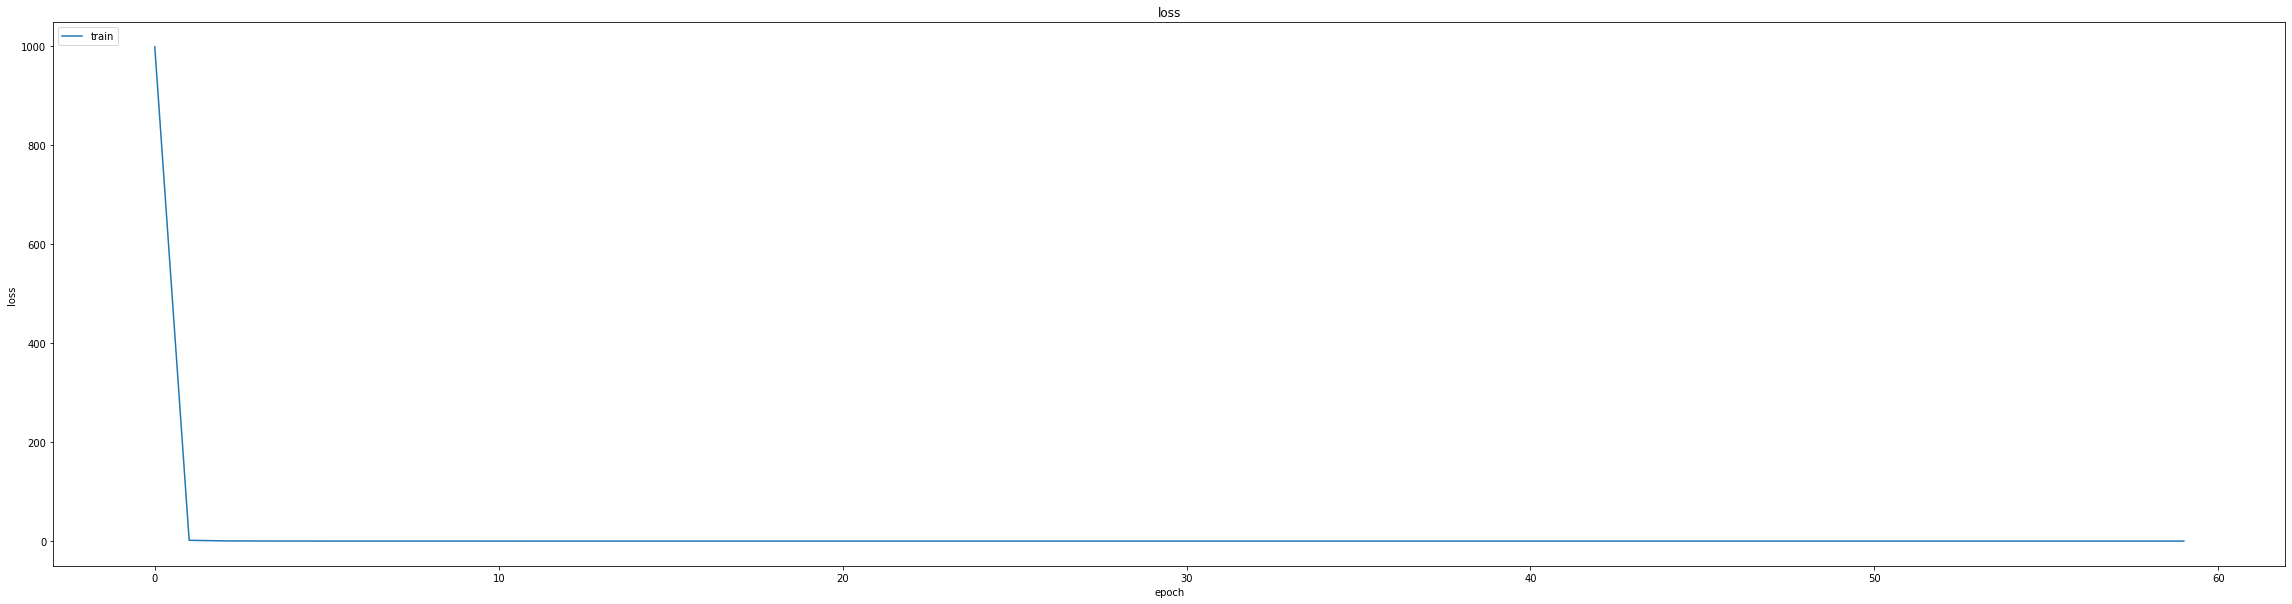

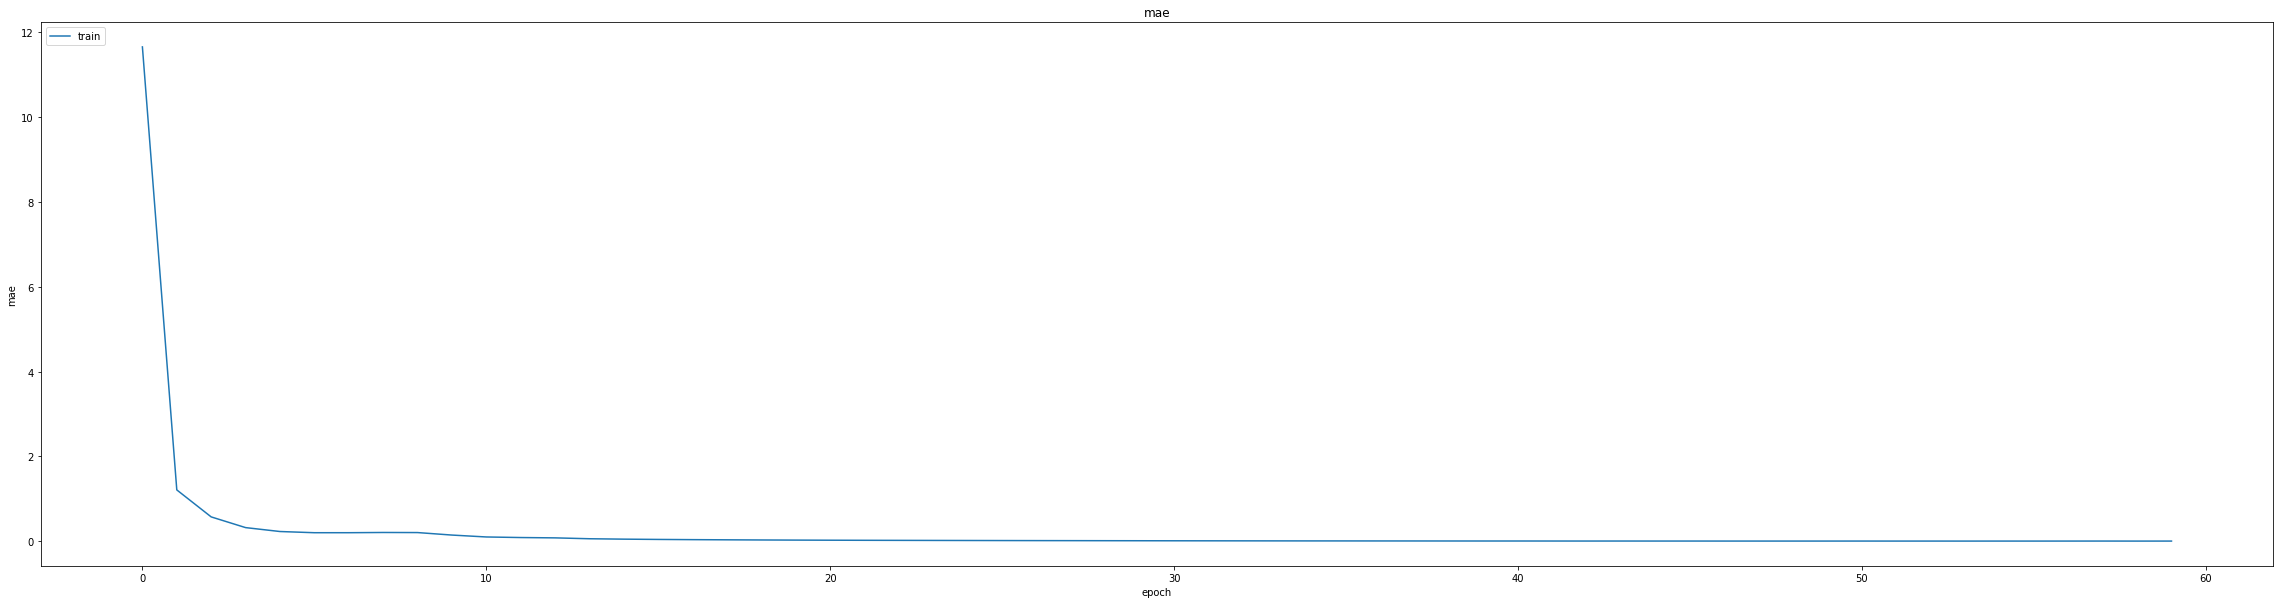

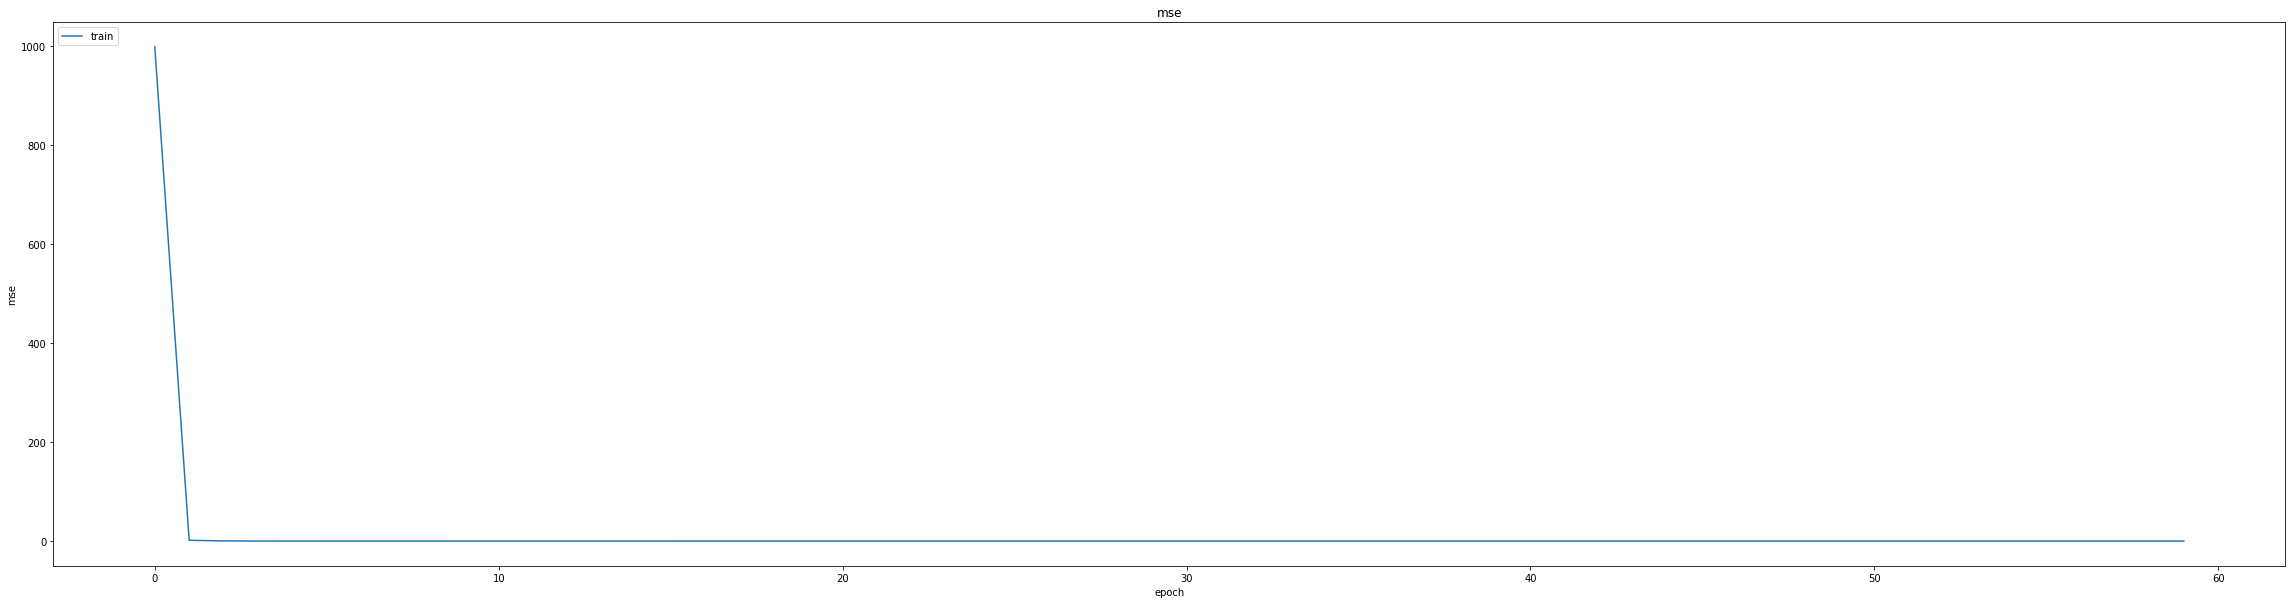

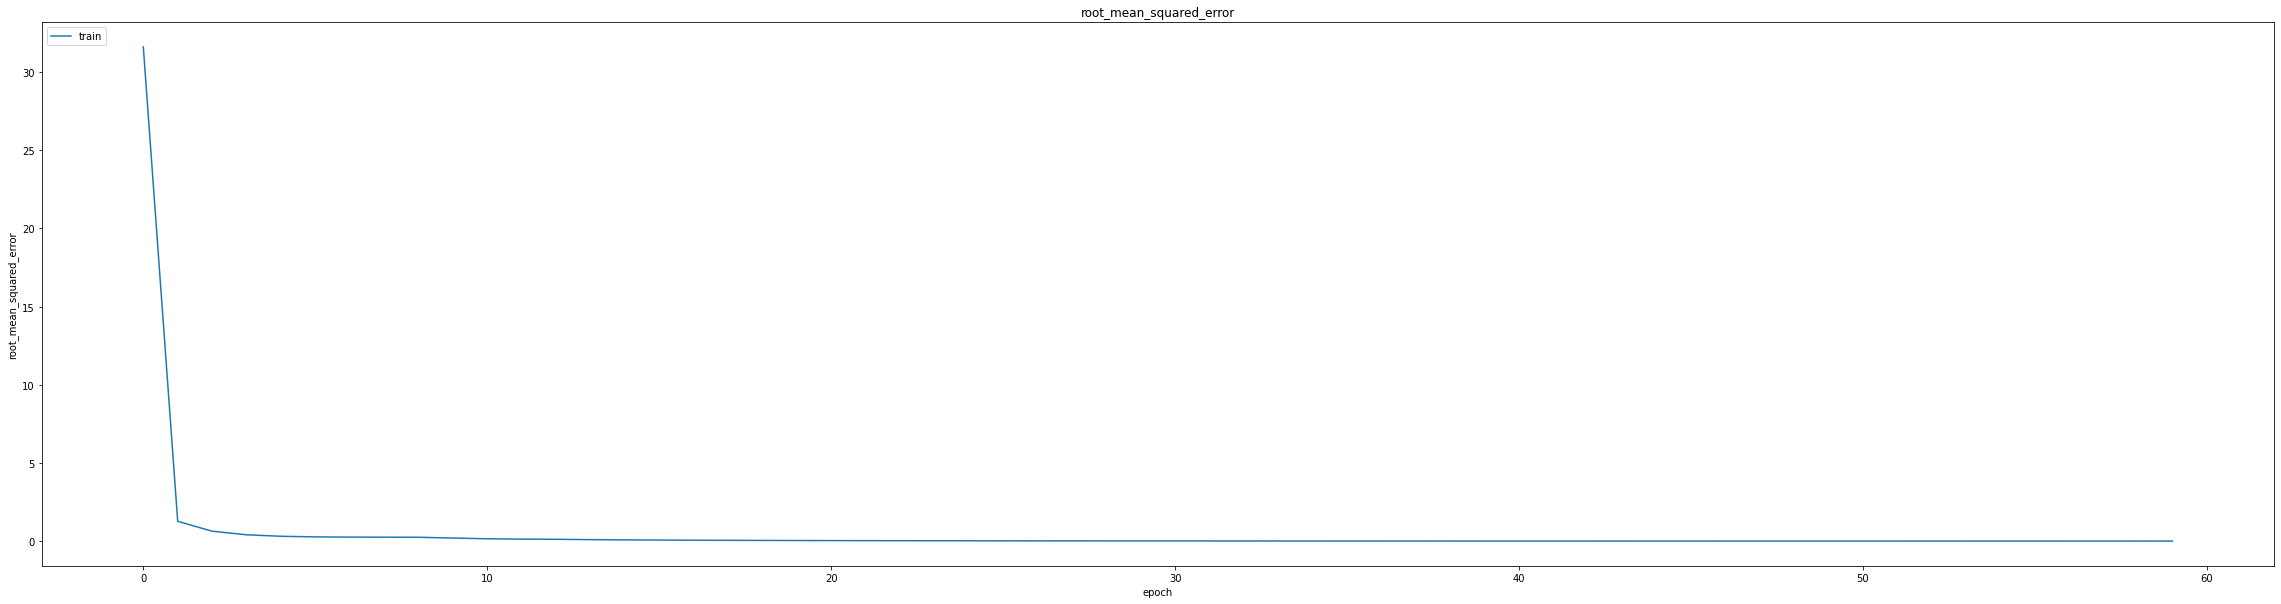

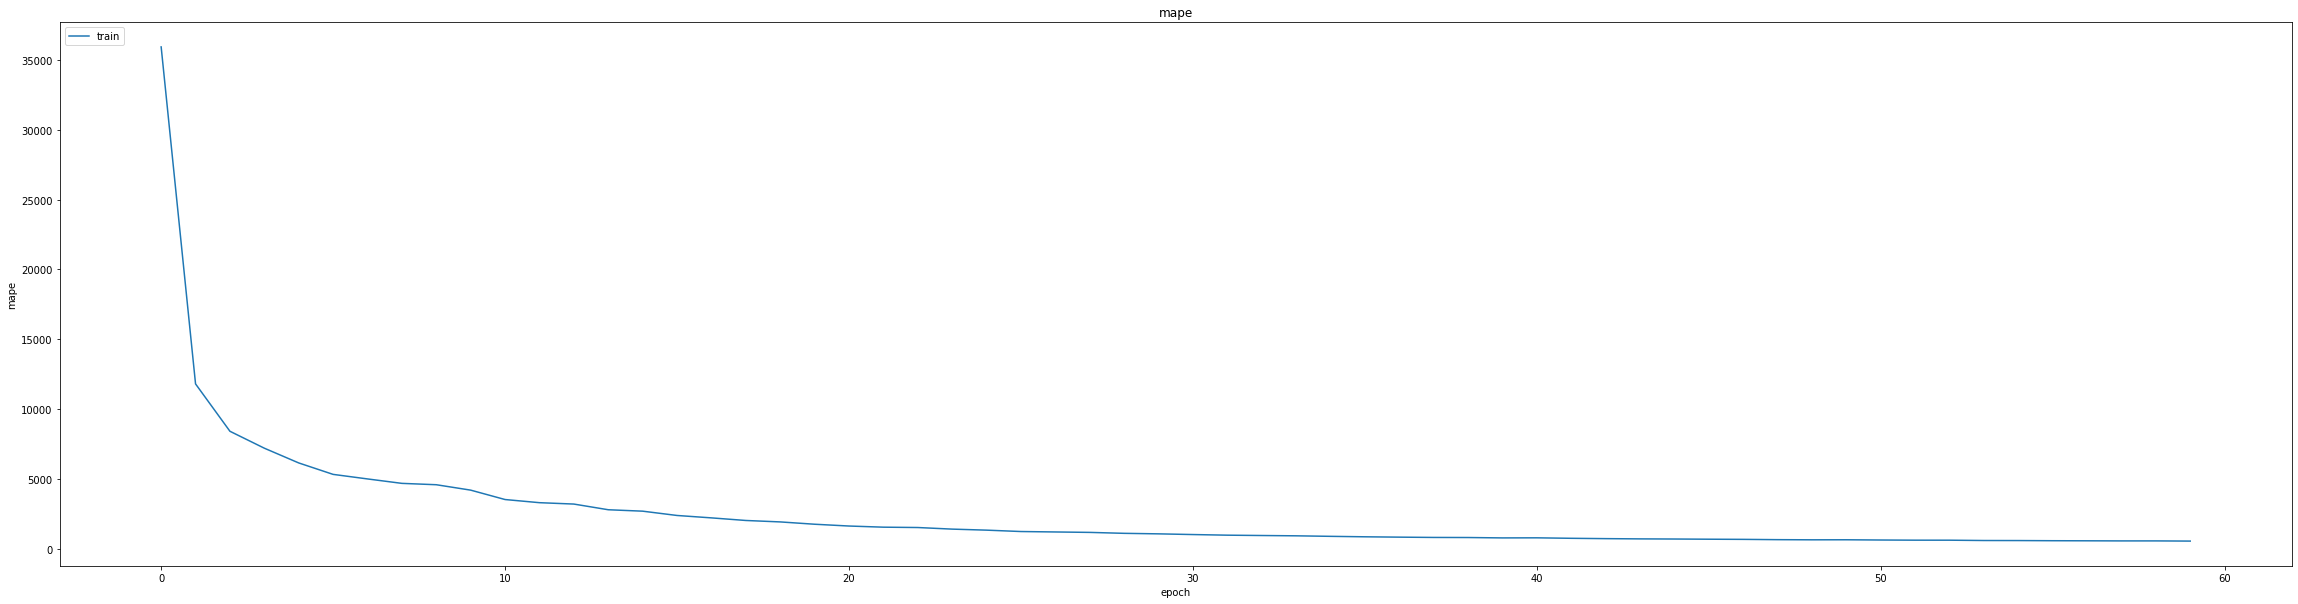

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007080069277435541
0.010349308140575886
1392/1392 [==============================] - 9s 6ms/step
0.9979285467011133


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0156 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 699.1376
Epoch 1: val_mse did not improve from 0.00011
348/348 [==============================] - 9s 18ms/step - loss: 0.0015 - mae: 0.0155 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 698.9026 - val_loss: 1.1831e-04 - val_mae: 0.0068 - val_mse: 1.1831e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 1886.3712 - lr: 0.0010
Epoch 2/20
346/348 [============================>.] - ETA: 0s - loss: 7.0180e-05 - mae: 0.0061 - mse: 7.0180e-05 - root_mean_squared_error: 0.0084 - mape: 618.5759
Epoch 2: val_mse did not improve from 0.00011
348/348 [==============================] - 7s 20ms/step - loss: 7.0119e-05 - mae: 0.0061 - mse: 7.0119e-05 - root_mean_squared_error: 0.0084 - mape: 616.5897 - val_loss: 1.1114e-04 - val_mae: 0.0067 - val_mse: 1.1114e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 1820.1144 - lr: 0.0010
lr chang

348/348 [==============================] - 14s 41ms/step - loss: 6.2156e-05 - mae: 0.0057 - mse: 6.2156e-05 - root_mean_squared_error: 0.0079 - mape: 606.5187 - val_loss: 1.0008e-04 - val_mae: 0.0064 - val_mse: 1.0008e-04 - val_root_mean_squared_error: 0.0100 - val_mape: 1760.8896 - lr: 9.0000e-04
Epoch 4/20
348/348 [==============================] - ETA: 0s - loss: 5.8665e-05 - mae: 0.0056 - mse: 5.8665e-05 - root_mean_squared_error: 0.0077 - mape: 544.7797
Epoch 4: val_mse did not improve from 0.00010
348/348 [==============================] - 7s 19ms/step - loss: 5.8665e-05 - mae: 0.0056 - mse: 5.8665e-05 - root_mean_squared_error: 0.0077 - mape: 544.7797 - val_loss: 1.0459e-04 - val_mae: 0.0073 - val_mse: 1.0459e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 1615.0592 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/348 [============================>.] - ETA: 0s - loss: 5.6144e-05 - mae: 0.0055 - mse: 5.6144e-05 - root_mean_squared_error: 0.0075 - mape: 54

348/348 [==============================] - 13s 37ms/step - loss: 5.6165e-05 - mae: 0.0055 - mse: 5.6165e-05 - root_mean_squared_error: 0.0075 - mape: 545.7188 - val_loss: 9.0723e-05 - val_mae: 0.0066 - val_mse: 9.0723e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 1529.6785 - lr: 8.1000e-04
Epoch 6/20
345/348 [============================>.] - ETA: 0s - loss: 5.6052e-05 - mae: 0.0056 - mse: 5.6052e-05 - root_mean_squared_error: 0.0075 - mape: 503.3536
Epoch 6: val_mse did not improve from 0.00009
348/348 [==============================] - 6s 16ms/step - loss: 5.6042e-05 - mae: 0.0056 - mse: 5.6042e-05 - root_mean_squared_error: 0.0075 - mape: 500.2948 - val_loss: 1.1192e-04 - val_mae: 0.0080 - val_mse: 1.1192e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 1463.7050 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
345/348 [============================>.] - ETA: 0s - loss: 5.5141e-05 - mae: 0.0056 - mse: 5.5141e-05 - root_mean_squared_error: 0.0074 - mape: 47

348/348 [==============================] - 13s 39ms/step - loss: 5.5209e-05 - mae: 0.0056 - mse: 5.5209e-05 - root_mean_squared_error: 0.0074 - mape: 472.6450 - val_loss: 7.4490e-05 - val_mae: 0.0058 - val_mse: 7.4490e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 1349.8014 - lr: 7.2900e-04
Epoch 8/20
346/348 [============================>.] - ETA: 0s - loss: 6.2461e-05 - mae: 0.0060 - mse: 6.2461e-05 - root_mean_squared_error: 0.0079 - mape: 425.3870
Epoch 8: val_mse improved from 0.00007 to 0.00006, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 6.2429e-05 - mae: 0.0060 - mse: 6.2429e-05 - root_mean_squared_error: 0.0079 - mape: 424.0234 - val_loss: 6.3927e-05 - val_mae: 0.0054 - val_mse: 6.3927e-05 - val_root_mean_squared_error: 0.0080 - val_mape: 1206.3174 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
345/348 [============================>.] - ETA: 0s - loss: 4.9572e-05 - mae: 0.0053 - mse: 4.9572e-05 - root_mean_squared_error: 0.0070 - mape: 397.8098
Epoch 9: val_mse did not improve from 0.00006
348/348 [==============================] - 5s 16ms/step - loss: 4.9647e-05 - mae: 0.0053 - mse: 4.9647e-05 - root_mean_squared_error: 0.0070 - mape: 395.3926 - val_loss: 9.7064e-05 - val_mae: 0.0079 - val_mse: 9.7064e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1096.0126 - lr: 6.5610e-04
Epoch 10/20
345/348 [============================>.] - ETA: 0s - loss: 5.4779e-05 - mae: 0.0056 - mse: 5.4779e-05 - root_mean_squared_error: 0.0074 - mape: 3

348/348 [==============================] - 13s 38ms/step - loss: 5.4710e-05 - mae: 0.0056 - mse: 5.4710e-05 - root_mean_squared_error: 0.0074 - mape: 320.6477 - val_loss: 5.5526e-05 - val_mae: 0.0052 - val_mse: 5.5526e-05 - val_root_mean_squared_error: 0.0075 - val_mape: 887.7161 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/348 [============================>.] - ETA: 0s - loss: 4.3879e-05 - mae: 0.0051 - mse: 4.3879e-05 - root_mean_squared_error: 0.0066 - mape: 285.4619
Epoch 11: val_mse did not improve from 0.00006
348/348 [==============================] - 6s 16ms/step - loss: 4.3892e-05 - mae: 0.0051 - mse: 4.3892e-05 - root_mean_squared_error: 0.0066 - mape: 285.3663 - val_loss: 1.5909e-04 - val_mae: 0.0109 - val_mse: 1.5909e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 800.4347 - lr: 5.9049e-04
Epoch 12/20
345/348 [============================>.] - ETA: 0s - loss: 5.4745e-05 - mae: 0.0057 - mse: 5.4745e-05 - root_mean_squared_error: 0.0074 - mape: 2

348/348 [==============================] - 13s 38ms/step - loss: 5.4613e-05 - mae: 0.0057 - mse: 5.4613e-05 - root_mean_squared_error: 0.0074 - mape: 255.6779 - val_loss: 5.5419e-05 - val_mae: 0.0054 - val_mse: 5.5419e-05 - val_root_mean_squared_error: 0.0074 - val_mape: 726.3626 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
347/348 [============================>.] - ETA: 0s - loss: 4.3293e-05 - mae: 0.0050 - mse: 4.3293e-05 - root_mean_squared_error: 0.0066 - mape: 230.1733
Epoch 13: val_mse improved from 0.00006 to 0.00005, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 4.3287e-05 - mae: 0.0050 - mse: 4.3287e-05 - root_mean_squared_error: 0.0066 - mape: 230.0971 - val_loss: 4.9523e-05 - val_mae: 0.0049 - val_mse: 4.9523e-05 - val_root_mean_squared_error: 0.0070 - val_mape: 740.1178 - lr: 5.3144e-04
Epoch 14/20
345/348 [============================>.] - ETA: 0s - loss: 4.0360e-05 - mae: 0.0048 - mse: 4.0360e-05 - root_mean_squared_error: 0.0064 - mape: 219.6432
Epoch 14: val_mse improved from 0.00005 to 0.00005, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 4.0359e-05 - mae: 0.0048 - mse: 4.0359e-05 - root_mean_squared_error: 0.0064 - mape: 218.3120 - val_loss: 4.7473e-05 - val_mae: 0.0048 - val_mse: 4.7473e-05 - val_root_mean_squared_error: 0.0069 - val_mape: 683.8469 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
345/348 [============================>.] - ETA: 0s - loss: 4.0087e-05 - mae: 0.0048 - mse: 4.0087e-05 - root_mean_squared_error: 0.0063 - mape: 217.5204
Epoch 15: val_mse did not improve from 0.00005
348/348 [==============================] - 6s 16ms/step - loss: 4.0030e-05 - mae: 0.0048 - mse: 4.0030e-05 - root_mean_squared_error: 0.0063 - mape: 216.2010 - val_loss: 8.1787e-05 - val_mae: 0.0072 - val_mse: 8.1787e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 646.6013 - lr: 4.7830e-04
Epoch 16/20
348/348 [==============================] - ETA: 0s - loss: 3.5974e-05 - mae: 0.0045 - mse: 3.5974e-05 - root_mean_squared_error: 0.0060 - mape: 

348/348 [==============================] - 14s 39ms/step - loss: 3.1281e-05 - mae: 0.0043 - mse: 3.1281e-05 - root_mean_squared_error: 0.0056 - mape: 193.6202 - val_loss: 3.5848e-05 - val_mae: 0.0042 - val_mse: 3.5848e-05 - val_root_mean_squared_error: 0.0060 - val_mape: 593.4592 - lr: 3.8742e-04


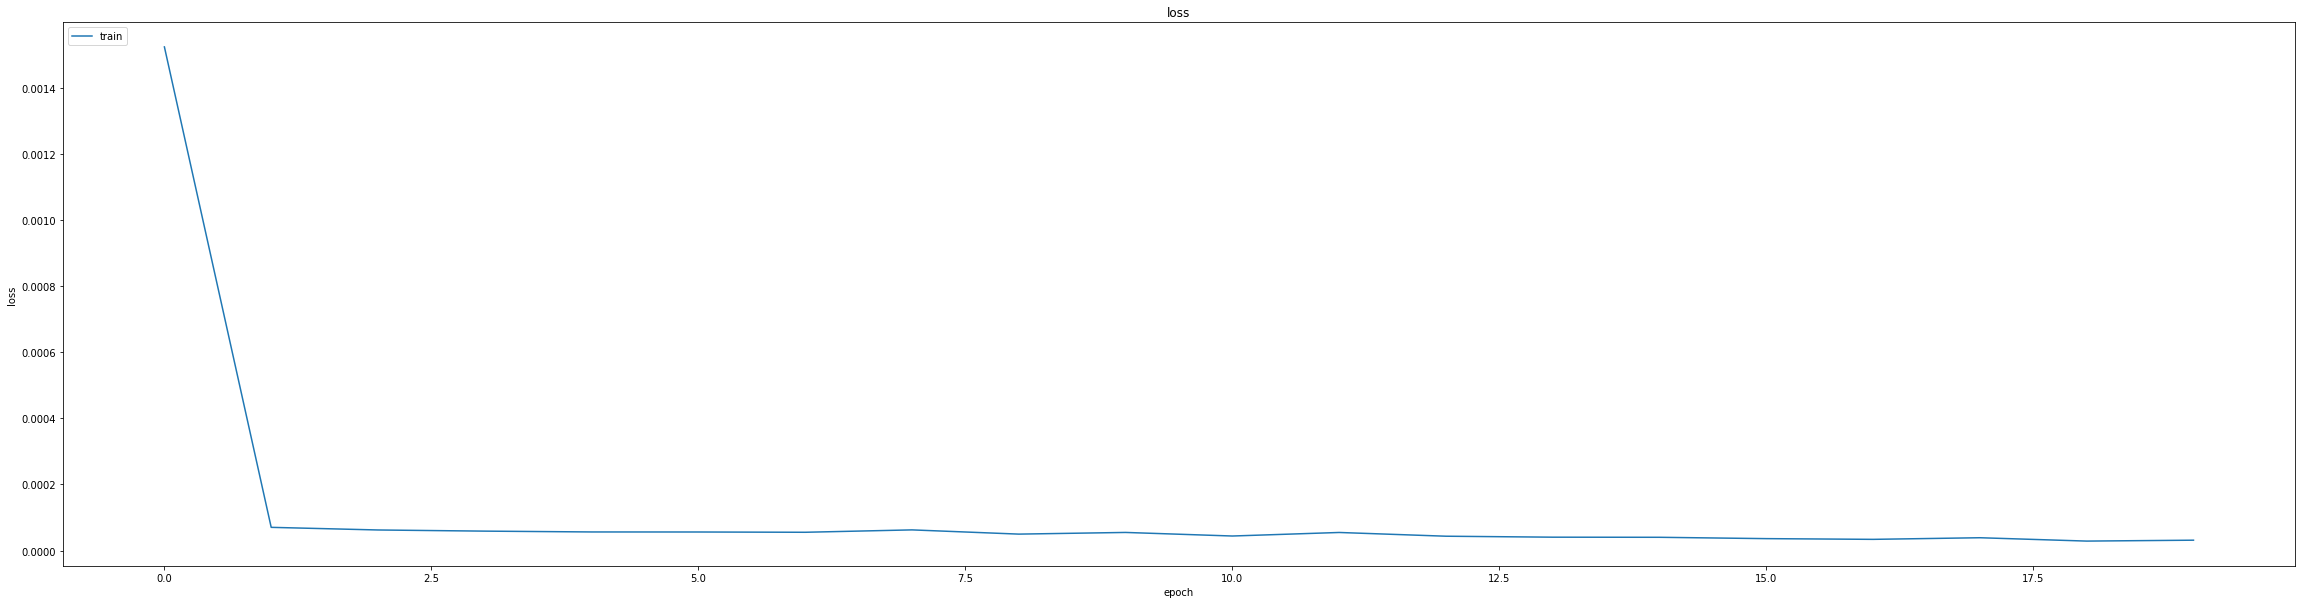

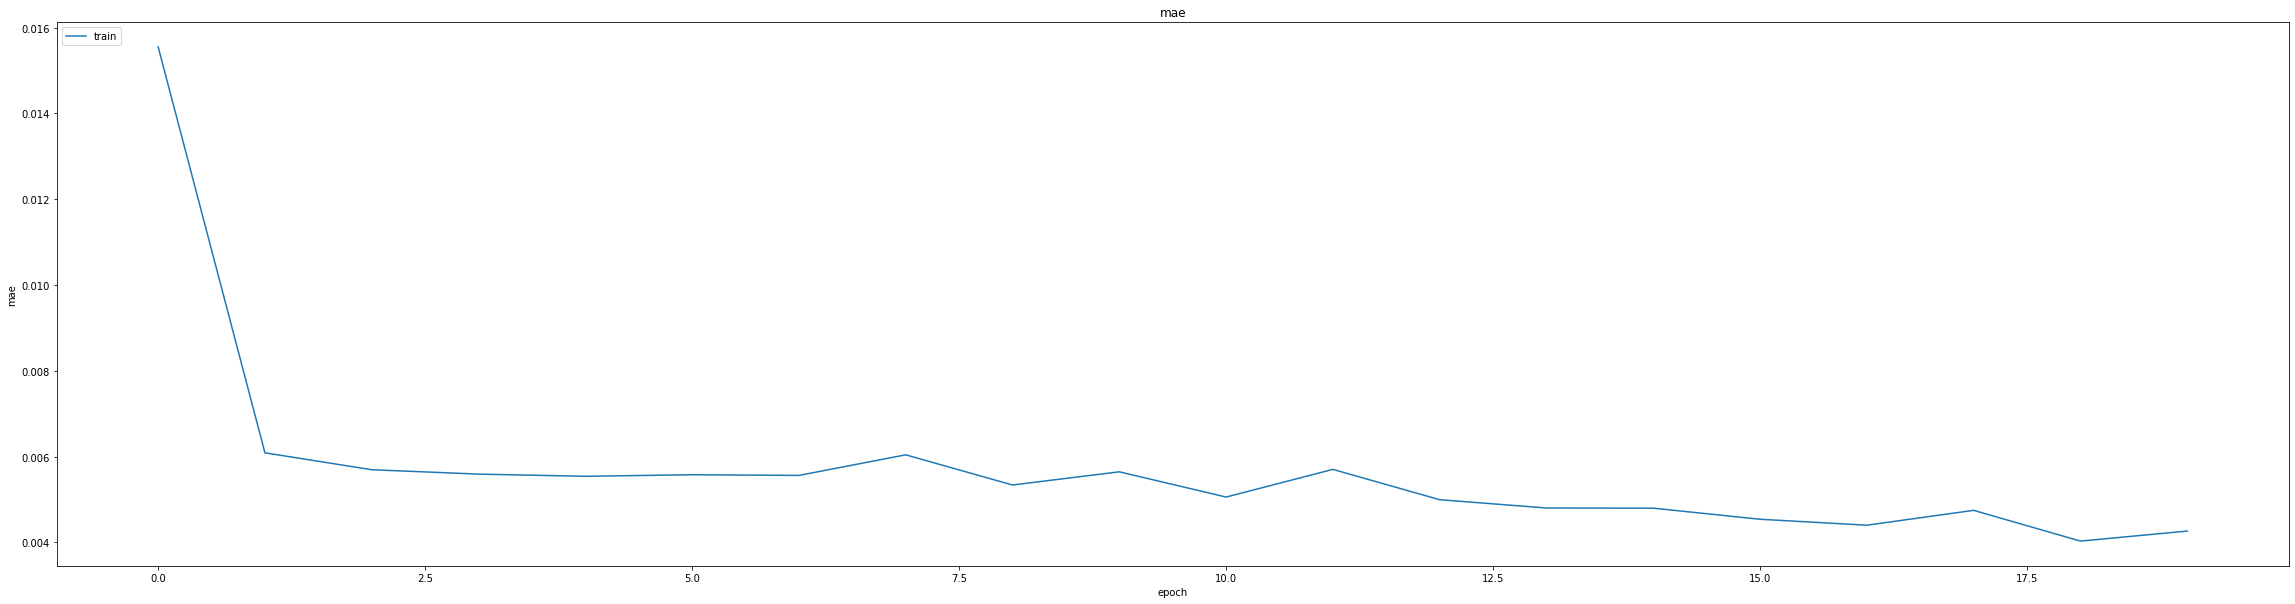

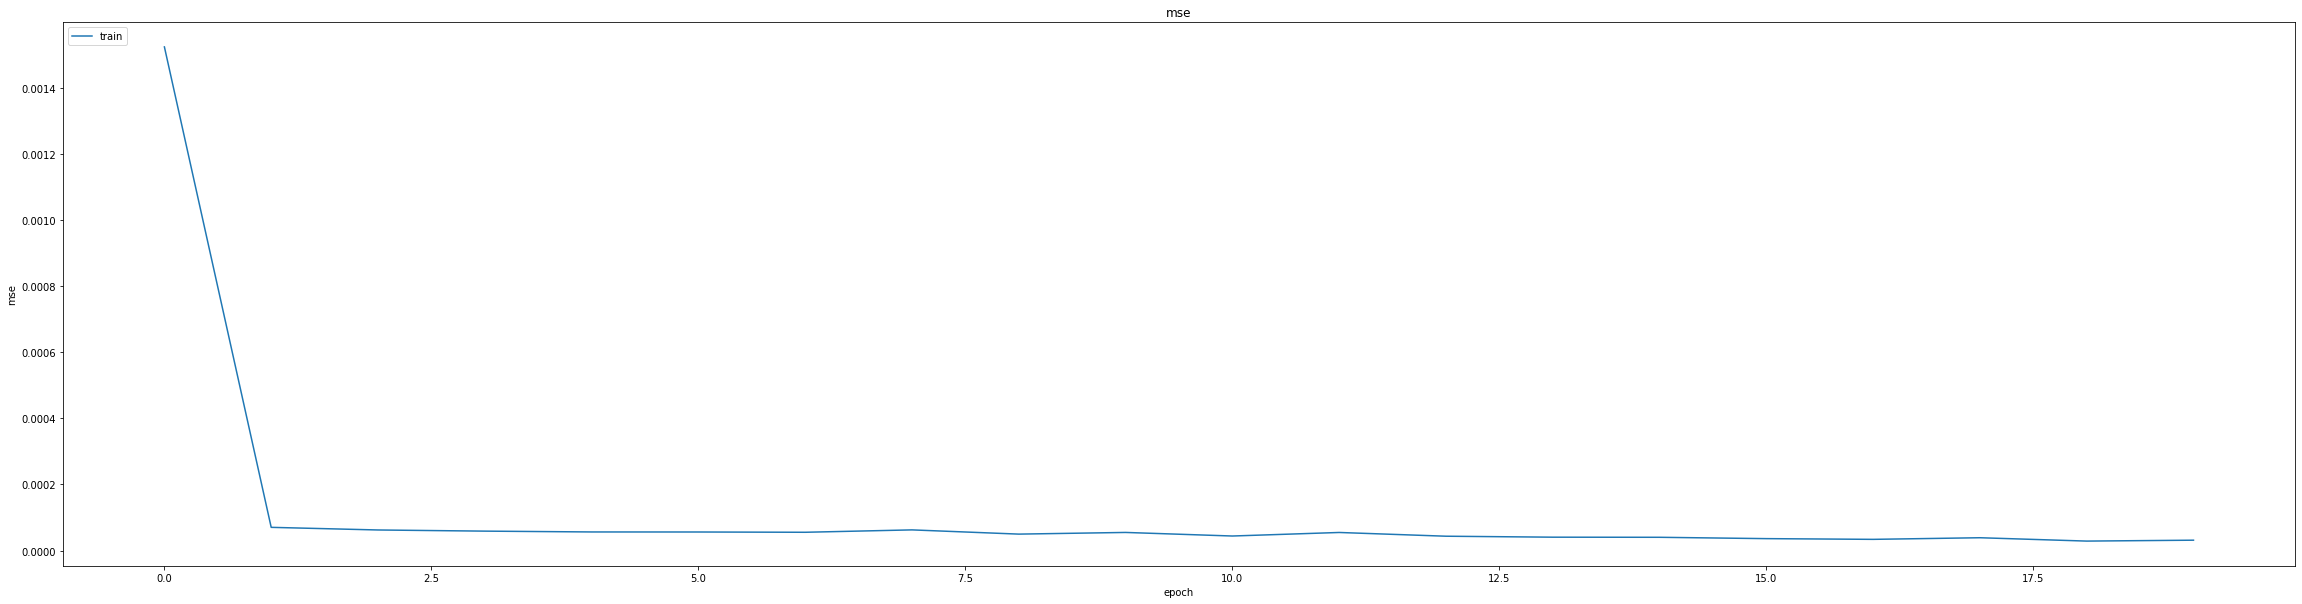

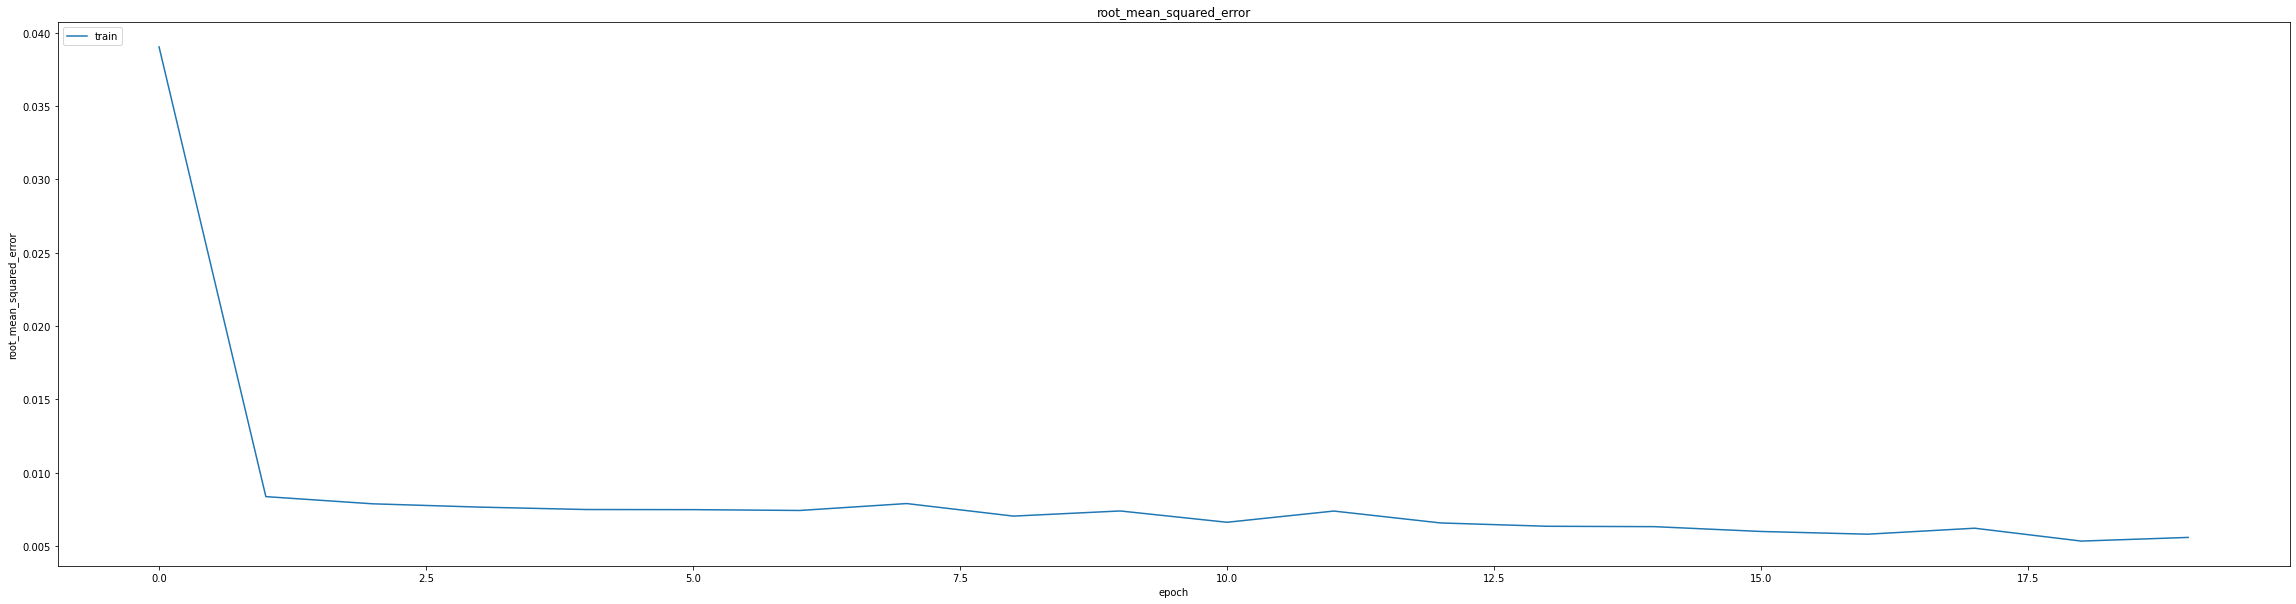

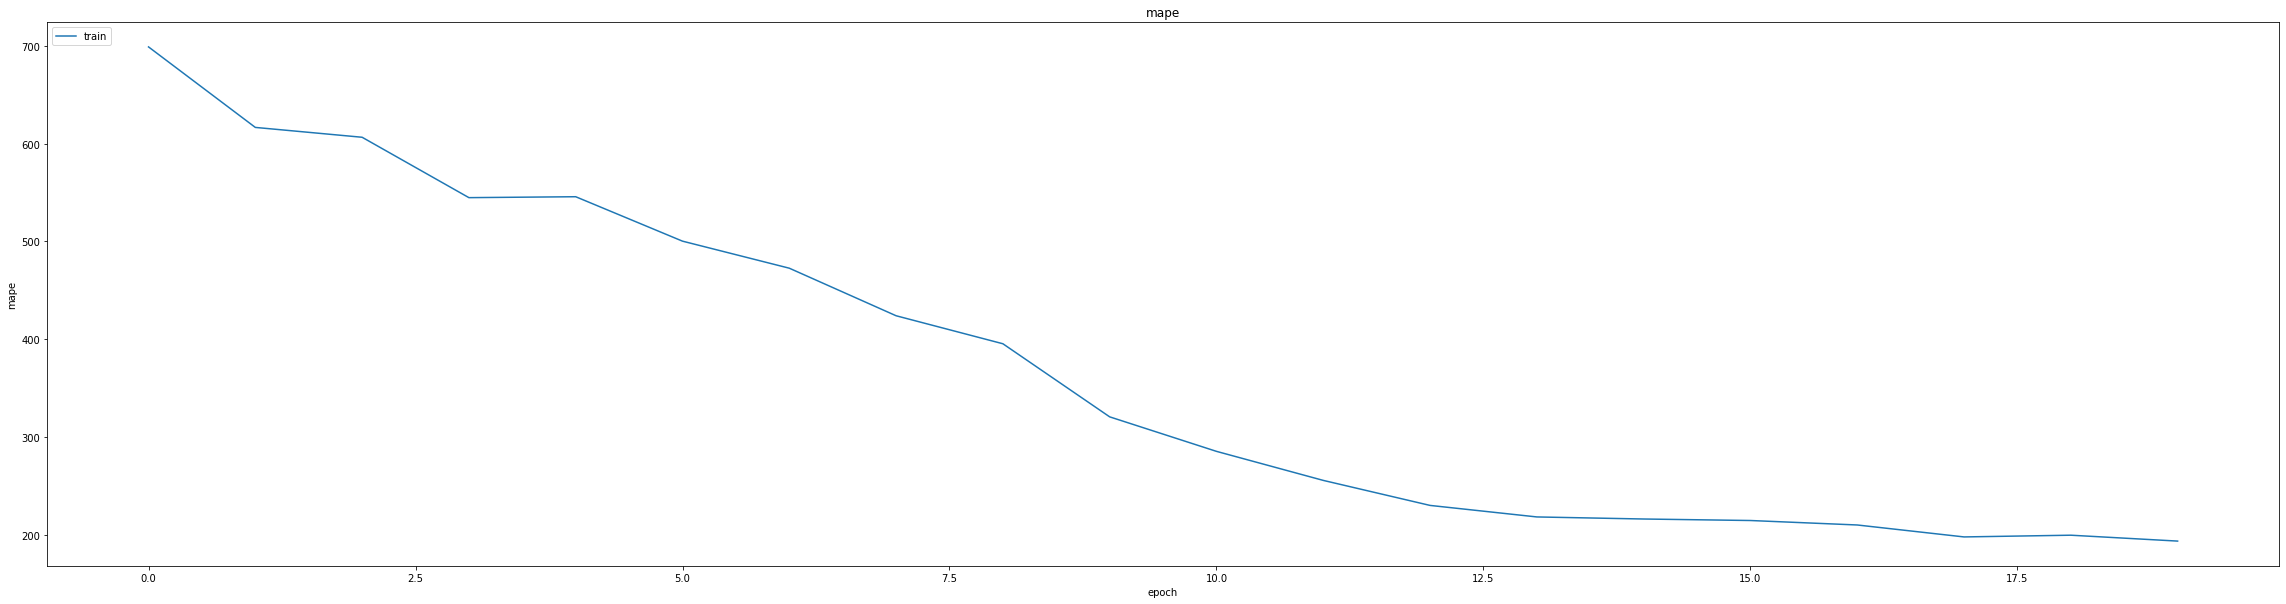

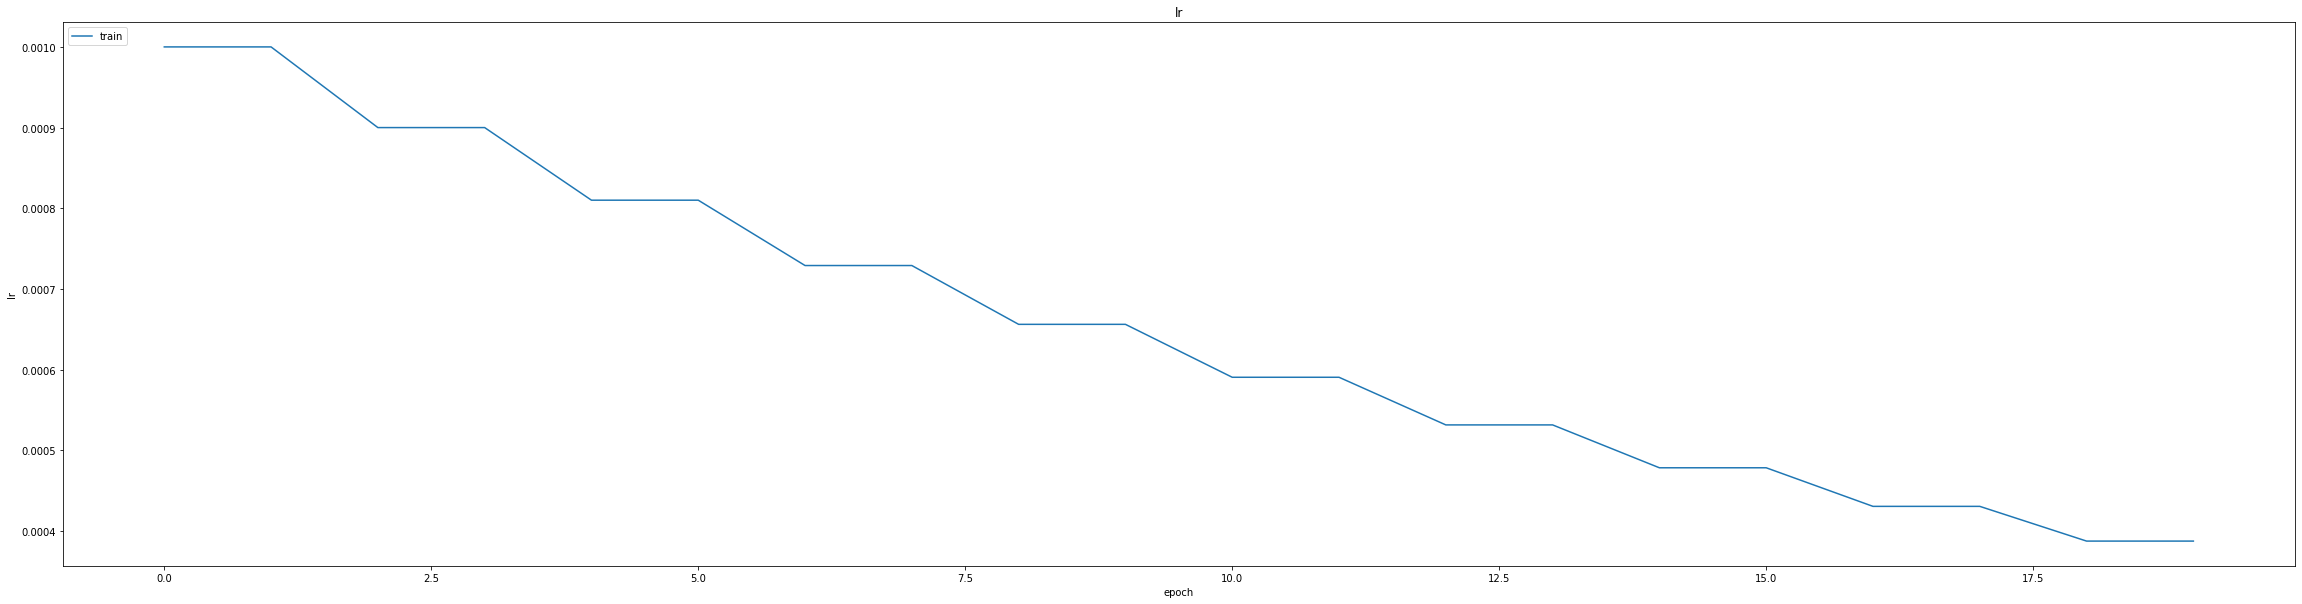

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004185347817838192
0.005987329874187708
1392/1392 [==============================] - 5s 4ms/step
0.9993714146207334


1392/1392 [==============================] - 5s 4ms/step


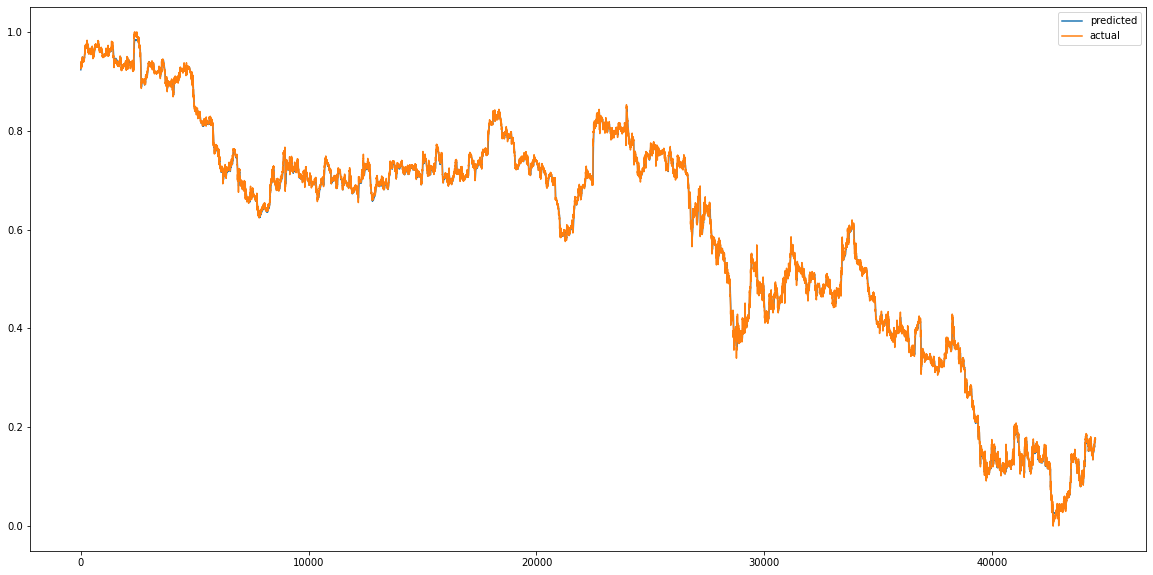

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


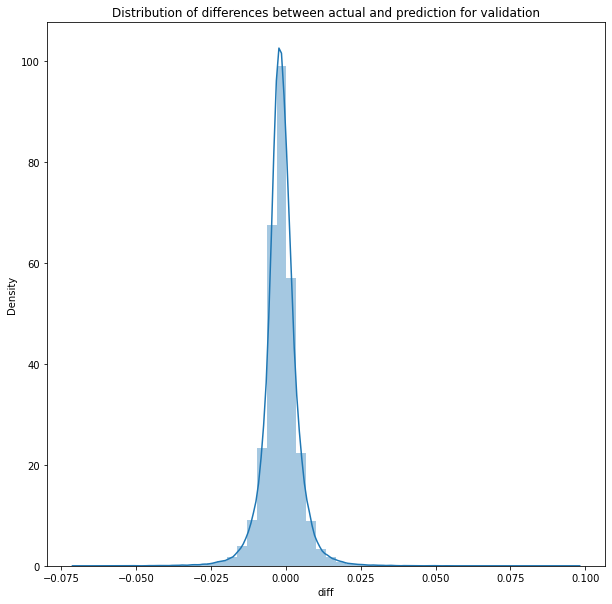

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


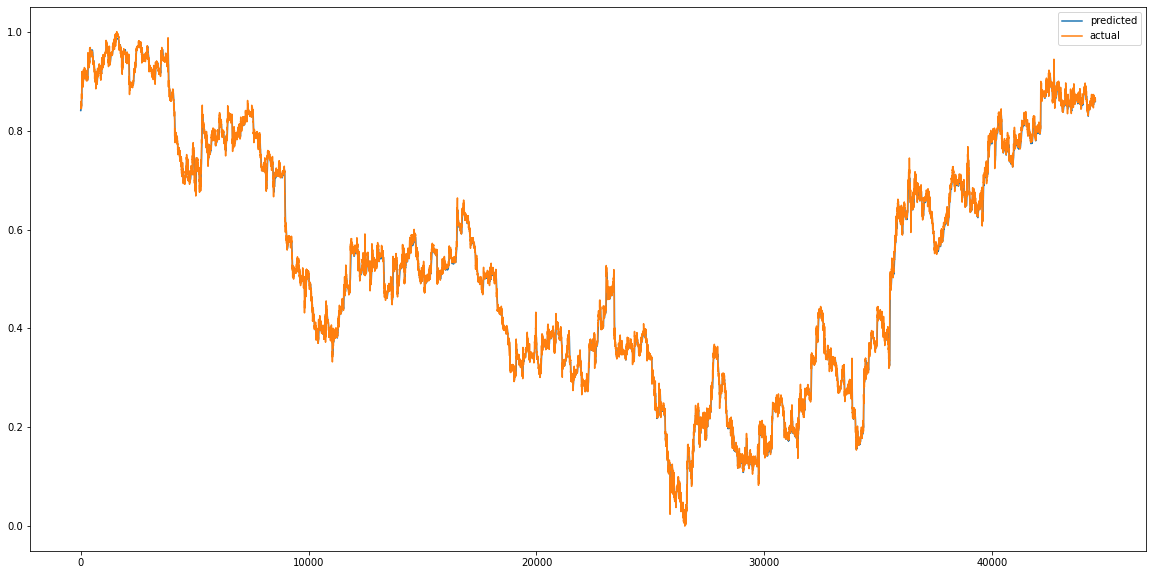

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


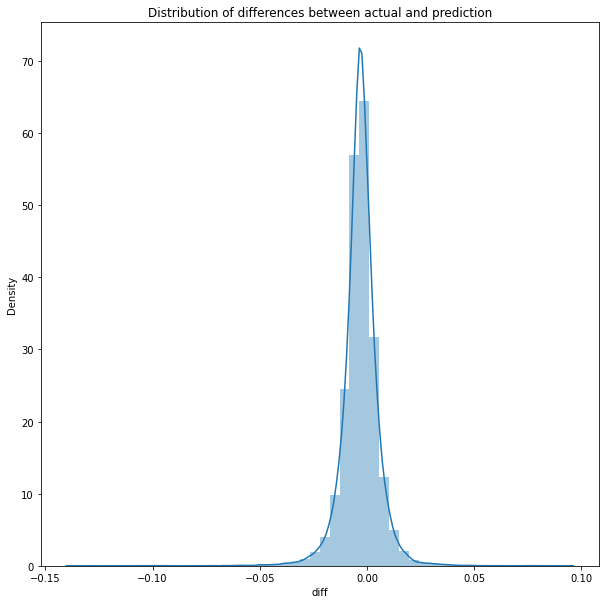

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  8.250432729018385e-05
RMSE :  0.009083189268653596
MAE :  0.0063344605609627356
1392/1392 [==============================] - 5s 4ms/step
R2_Score  : 0.99863444910613


count    44530.000000
mean        -0.003130
std          0.008527
min         -0.137254
25%         -0.006896
50%         -0.003022
75%          0.000930
max          0.093249
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
347/348 [============================>.] - ETA: 0s - loss: 660.0328 - mae: 6.4693 - mse: 660.0328 - root_mean_squared_error: 25.6911 - mape: 10790.8193
Epoch 1: val_mse improved from inf to 0.09032, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 16s 37ms/step - loss: 659.8107 - mae: 6.4672 - mse: 659.8107 - root_mean_squared_error: 25.6868 - mape: 10787.2236 - val_loss: 0.0903 - val_mae: 0.2175 - val_mse: 0.0903 - val_root_mean_squared_error: 0.3005 - val_mape: 17946.9121
Epoch 2/60
345/348 [============================>.] - ETA: 0s - loss: 0.0528 - mae: 0.1788 - mse: 0.0528 - root_mean_squared_error: 0.2298 - mape: 5228.6841
Epoch 2: val_mse improved from 0.09032 to 0.01529, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0526 - mae: 0.1783 - mse: 0.0526 - root_mean_squared_error: 0.2293 - mape: 5197.0542 - val_loss: 0.0153 - val_mae: 0.0922 - val_mse: 0.0153 - val_root_mean_squared_error: 0.1237 - val_mape: 9030.4287
Epoch 3/60
347/348 [============================>.] - ETA: 0s - loss: 0.0082 - mae: 0.0656 - mse: 0.0082 - root_mean_squared_error: 0.0904 - mape: 2831.3467
Epoch 3: val_mse improved from 0.01529 to 0.00409, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0082 - mae: 0.0656 - mse: 0.0082 - root_mean_squared_error: 0.0904 - mape: 2830.3997 - val_loss: 0.0041 - val_mae: 0.0465 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 5757.9004
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0411 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 1880.2834
Epoch 4: val_mse improved from 0.00409 to 0.00216, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0031 - mae: 0.0411 - mse: 0.0031 - root_mean_squared_error: 0.0556 - mape: 1879.6558 - val_loss: 0.0022 - val_mae: 0.0329 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0465 - val_mape: 4731.1987
Epoch 5/60
346/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0334 - mse: 0.0020 - root_mean_squared_error: 0.0444 - mape: 1630.4843
Epoch 5: val_mse improved from 0.00216 to 0.00148, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0020 - mae: 0.0334 - mse: 0.0020 - root_mean_squared_error: 0.0443 - mape: 1625.2820 - val_loss: 0.0015 - val_mae: 0.0277 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 4165.6880
Epoch 6/60
344/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0289 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1344.8323
Epoch 6: val_mse improved from 0.00148 to 0.00126, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0379 - mape: 1332.8721 - val_loss: 0.0013 - val_mae: 0.0264 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0355 - val_mape: 3790.9224
Epoch 7/60
348/348 [==============================] - ETA: 0s - loss: 9.7976e-04 - mae: 0.0237 - mse: 9.7976e-04 - root_mean_squared_error: 0.0313 - mape: 1209.9855
Epoch 7: val_mse improved from 0.00126 to 0.00100, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 9.7976e-04 - mae: 0.0237 - mse: 9.7976e-04 - root_mean_squared_error: 0.0313 - mape: 1209.9855 - val_loss: 9.9778e-04 - val_mae: 0.0241 - val_mse: 9.9778e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 3432.4175
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 6.6091e-04 - mae: 0.0193 - mse: 6.6091e-04 - root_mean_squared_error: 0.0257 - mape: 1132.7518
Epoch 8: val_mse improved from 0.00100 to 0.00072, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 6.6089e-04 - mae: 0.0193 - mse: 6.6089e-04 - root_mean_squared_error: 0.0257 - mape: 1132.3729 - val_loss: 7.1640e-04 - val_mae: 0.0191 - val_mse: 7.1640e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 3151.1821
Epoch 9/60
345/348 [============================>.] - ETA: 0s - loss: 5.0722e-04 - mae: 0.0170 - mse: 5.0722e-04 - root_mean_squared_error: 0.0225 - mape: 1046.3500
Epoch 9: val_mse improved from 0.00072 to 0.00063, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 5.0650e-04 - mae: 0.0170 - mse: 5.0650e-04 - root_mean_squared_error: 0.0225 - mape: 1039.9966 - val_loss: 6.3230e-04 - val_mae: 0.0178 - val_mse: 6.3230e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 2957.8315
Epoch 10/60
347/348 [============================>.] - ETA: 0s - loss: 4.1314e-04 - mae: 0.0154 - mse: 4.1314e-04 - root_mean_squared_error: 0.0203 - mape: 963.5823
Epoch 10: val_mse improved from 0.00063 to 0.00054, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 4.1312e-04 - mae: 0.0154 - mse: 4.1312e-04 - root_mean_squared_error: 0.0203 - mape: 963.2603 - val_loss: 5.3799e-04 - val_mae: 0.0166 - val_mse: 5.3799e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 2805.2146
Epoch 11/60
344/348 [============================>.] - ETA: 0s - loss: 3.5307e-04 - mae: 0.0143 - mse: 3.5307e-04 - root_mean_squared_error: 0.0188 - mape: 971.1024
Epoch 11: val_mse improved from 0.00054 to 0.00046, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 3.5306e-04 - mae: 0.0143 - mse: 3.5306e-04 - root_mean_squared_error: 0.0188 - mape: 962.4362 - val_loss: 4.6168e-04 - val_mae: 0.0152 - val_mse: 4.6168e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2676.5317
Epoch 12/60
345/348 [============================>.] - ETA: 0s - loss: 2.9835e-04 - mae: 0.0131 - mse: 2.9835e-04 - root_mean_squared_error: 0.0173 - mape: 888.4346
Epoch 12: val_mse improved from 0.00046 to 0.00042, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 2.9820e-04 - mae: 0.0131 - mse: 2.9820e-04 - root_mean_squared_error: 0.0173 - mape: 883.0441 - val_loss: 4.1957e-04 - val_mae: 0.0142 - val_mse: 4.1957e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 2558.6516
Epoch 13/60
348/348 [==============================] - ETA: 0s - loss: 2.5563e-04 - mae: 0.0121 - mse: 2.5563e-04 - root_mean_squared_error: 0.0160 - mape: 850.0851
Epoch 13: val_mse improved from 0.00042 to 0.00038, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 2.5563e-04 - mae: 0.0121 - mse: 2.5563e-04 - root_mean_squared_error: 0.0160 - mape: 850.0851 - val_loss: 3.7651e-04 - val_mae: 0.0139 - val_mse: 3.7651e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 2458.8481
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 2.2837e-04 - mae: 0.0114 - mse: 2.2837e-04 - root_mean_squared_error: 0.0151 - mape: 844.7749
Epoch 14: val_mse improved from 0.00038 to 0.00037, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.2834e-04 - mae: 0.0114 - mse: 2.2834e-04 - root_mean_squared_error: 0.0151 - mape: 844.4911 - val_loss: 3.7144e-04 - val_mae: 0.0135 - val_mse: 3.7144e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 2388.3899
Epoch 15/60
347/348 [============================>.] - ETA: 0s - loss: 2.0843e-04 - mae: 0.0109 - mse: 2.0843e-04 - root_mean_squared_error: 0.0144 - mape: 821.1454
Epoch 15: val_mse improved from 0.00037 to 0.00031, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.0843e-04 - mae: 0.0109 - mse: 2.0843e-04 - root_mean_squared_error: 0.0144 - mape: 820.8699 - val_loss: 3.0957e-04 - val_mae: 0.0122 - val_mse: 3.0957e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 2330.8792
Epoch 16/60
345/348 [============================>.] - ETA: 0s - loss: 1.9060e-04 - mae: 0.0104 - mse: 1.9060e-04 - root_mean_squared_error: 0.0138 - mape: 796.1098
Epoch 16: val_mse did not improve from 0.00031
348/348 [==============================] - 5s 14ms/step - loss: 1.9063e-04 - mae: 0.0104 - mse: 1.9063e-04 - root_mean_squared_error: 0.0138 - mape: 791.2926 - val_loss: 3.1903e-04 - val_mae: 0.0126 - val_mse: 3.1903e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 2285.1235
Epoch 17/60
348/348 [==============================] - ETA: 0s - loss: 1.7634e-04 - mae: 0.0100 - mse: 1.7634e-04 - root_mean_squared_error: 0.0133 - mape: 773.6579
Epoch 17: val_mse improved from 0.00031 to 0.00026, saving m

348/348 [==============================] - 11s 33ms/step - loss: 1.7634e-04 - mae: 0.0100 - mse: 1.7634e-04 - root_mean_squared_error: 0.0133 - mape: 773.6579 - val_loss: 2.6015e-04 - val_mae: 0.0114 - val_mse: 2.6015e-04 - val_root_mean_squared_error: 0.0161 - val_mape: 2240.7896
Epoch 18/60
345/348 [============================>.] - ETA: 0s - loss: 1.6478e-04 - mae: 0.0097 - mse: 1.6478e-04 - root_mean_squared_error: 0.0128 - mape: 745.4377
Epoch 18: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 1.6469e-04 - mae: 0.0097 - mse: 1.6469e-04 - root_mean_squared_error: 0.0128 - mape: 740.9153 - val_loss: 2.3946e-04 - val_mae: 0.0107 - val_mse: 2.3946e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 2189.4119
Epoch 19/60
347/348 [============================>.] - ETA: 0s - loss: 1.5315e-04 - mae: 0.0093 - mse: 1.5315e-04 - root_mean_squared_error: 0.0124 - mape: 733.2747
Epoch 19: val_mse did not improve from 0.00024
348/348 [==============================] - 5s 14ms/step - loss: 1.5313e-04 - mae: 0.0093 - mse: 1.5313e-04 - root_mean_squared_error: 0.0124 - mape: 733.0282 - val_loss: 2.7999e-04 - val_mae: 0.0118 - val_mse: 2.7999e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 2147.9949
Epoch 20/60
346/348 [============================>.] - ETA: 0s - loss: 1.4485e-04 - mae: 0.0091 - mse: 1.4485e-04 - root_mean_squared_error: 0.0120 - mape: 723.6736
Epoch 20: val_mse improved from 0.00024 to 0.00023, saving m

348/348 [==============================] - 12s 34ms/step - loss: 1.4483e-04 - mae: 0.0091 - mse: 1.4483e-04 - root_mean_squared_error: 0.0120 - mape: 721.3564 - val_loss: 2.3411e-04 - val_mae: 0.0106 - val_mse: 2.3411e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 2119.3005
Epoch 21/60
346/348 [============================>.] - ETA: 0s - loss: 1.3701e-04 - mae: 0.0088 - mse: 1.3701e-04 - root_mean_squared_error: 0.0117 - mape: 728.6085
Epoch 21: val_mse did not improve from 0.00023
348/348 [==============================] - 5s 14ms/step - loss: 1.3702e-04 - mae: 0.0088 - mse: 1.3702e-04 - root_mean_squared_error: 0.0117 - mape: 726.2767 - val_loss: 2.4328e-04 - val_mae: 0.0110 - val_mse: 2.4328e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2079.6001
Epoch 22/60
348/348 [==============================] - ETA: 0s - loss: 1.2778e-04 - mae: 0.0085 - mse: 1.2778e-04 - root_mean_squared_error: 0.0113 - mape: 709.5504
Epoch 22: val_mse improved from 0.00023 to 0.00022, saving m

348/348 [==============================] - 11s 33ms/step - loss: 1.2778e-04 - mae: 0.0085 - mse: 1.2778e-04 - root_mean_squared_error: 0.0113 - mape: 709.5504 - val_loss: 2.2212e-04 - val_mae: 0.0104 - val_mse: 2.2212e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2039.4384
Epoch 23/60
345/348 [============================>.] - ETA: 0s - loss: 1.2208e-04 - mae: 0.0083 - mse: 1.2208e-04 - root_mean_squared_error: 0.0110 - mape: 687.1914
Epoch 23: val_mse improved from 0.00022 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 1.2197e-04 - mae: 0.0083 - mse: 1.2197e-04 - root_mean_squared_error: 0.0110 - mape: 683.0158 - val_loss: 1.9413e-04 - val_mae: 0.0099 - val_mse: 1.9413e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 2005.9464
Epoch 24/60
346/348 [============================>.] - ETA: 0s - loss: 1.1448e-04 - mae: 0.0080 - mse: 1.1448e-04 - root_mean_squared_error: 0.0107 - mape: 678.1418
Epoch 24: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 1.1451e-04 - mae: 0.0080 - mse: 1.1451e-04 - root_mean_squared_error: 0.0107 - mape: 675.9673 - val_loss: 1.9313e-04 - val_mae: 0.0097 - val_mse: 1.9313e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 1968.2354
Epoch 25/60
345/348 [============================>.] - ETA: 0s - loss: 1.0843e-04 - mae: 0.0078 - mse: 1.0843e-04 - root_mean_squared_error: 0.0104 - mape: 657.2827
Epoch 25: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 1.0841e-04 - mae: 0.0078 - mse: 1.0841e-04 - root_mean_squared_error: 0.0104 - mape: 653.2912 - val_loss: 1.9060e-04 - val_mae: 0.0097 - val_mse: 1.9060e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 1928.5831
Epoch 26/60
347/348 [============================>.] - ETA: 0s - loss: 1.0271e-04 - mae: 0.0076 - mse: 1.0271e-04 - root_mean_squared_error: 0.0101 - mape: 634.5631
Epoch 26: val_mse did not improve from 0.00019
348/348 [==============================] - 5s 14ms/step - loss: 1.0270e-04 - mae: 0.0076 - mse: 1.0270e-04 - root_mean_squared_error: 0.0101 - mape: 634.3500 - val_loss: 1.9749e-04 - val_mae: 0.0099 - val_mse: 1.9749e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 1893.4500
Epoch 27/60
346/348 [============================>.] - ETA: 0s - loss: 9.7177e-05 - mae: 0.0074 - mse: 9.7177e-05 - root_mean_squared_error: 0.0099 - mape: 617.8715
Epoch 27: val_mse did not improve from 0.00019
348/348 [====

348/348 [==============================] - 12s 35ms/step - loss: 8.9943e-05 - mae: 0.0071 - mse: 8.9943e-05 - root_mean_squared_error: 0.0095 - mape: 609.9317 - val_loss: 1.4839e-04 - val_mae: 0.0086 - val_mse: 1.4839e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 1805.8182
Epoch 30/60
345/348 [============================>.] - ETA: 0s - loss: 8.7528e-05 - mae: 0.0070 - mse: 8.7528e-05 - root_mean_squared_error: 0.0094 - mape: 612.4744
Epoch 30: val_mse improved from 0.00015 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 8.7502e-05 - mae: 0.0070 - mse: 8.7502e-05 - root_mean_squared_error: 0.0094 - mape: 608.7540 - val_loss: 1.3366e-04 - val_mae: 0.0081 - val_mse: 1.3366e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1769.8445
Epoch 31/60
347/348 [============================>.] - ETA: 0s - loss: 8.3318e-05 - mae: 0.0068 - mse: 8.3318e-05 - root_mean_squared_error: 0.0091 - mape: 617.0711
Epoch 31: val_mse did not improve from 0.00013
348/348 [==============================] - 5s 14ms/step - loss: 8.3311e-05 - mae: 0.0068 - mse: 8.3311e-05 - root_mean_squared_error: 0.0091 - mape: 616.8638 - val_loss: 1.3958e-04 - val_mae: 0.0082 - val_mse: 1.3958e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1719.1064
Epoch 32/60
345/348 [============================>.] - ETA: 0s - loss: 7.8125e-05 - mae: 0.0066 - mse: 7.8125e-05 - root_mean_squared_error: 0.0088 - mape: 580.6046
Epoch 32: val_mse did not improve from 0.00013
348/348 [====

348/348 [==============================] - 12s 36ms/step - loss: 7.5712e-05 - mae: 0.0065 - mse: 7.5712e-05 - root_mean_squared_error: 0.0087 - mape: 559.2888 - val_loss: 1.3204e-04 - val_mae: 0.0082 - val_mse: 1.3204e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 1654.5204
Epoch 34/60
347/348 [============================>.] - ETA: 0s - loss: 7.3524e-05 - mae: 0.0064 - mse: 7.3524e-05 - root_mean_squared_error: 0.0086 - mape: 548.9359
Epoch 34: val_mse did not improve from 0.00013
348/348 [==============================] - 5s 14ms/step - loss: 7.3519e-05 - mae: 0.0064 - mse: 7.3519e-05 - root_mean_squared_error: 0.0086 - mape: 548.7515 - val_loss: 1.5321e-04 - val_mae: 0.0091 - val_mse: 1.5321e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1627.2866
Epoch 35/60
344/348 [============================>.] - ETA: 0s - loss: 7.1178e-05 - mae: 0.0063 - mse: 7.1178e-05 - root_mean_squared_error: 0.0084 - mape: 553.1194
Epoch 35: val_mse improved from 0.00013 to 0.00011, saving m

348/348 [==============================] - 11s 33ms/step - loss: 7.1103e-05 - mae: 0.0063 - mse: 7.1103e-05 - root_mean_squared_error: 0.0084 - mape: 548.1741 - val_loss: 1.1082e-04 - val_mae: 0.0074 - val_mse: 1.1082e-04 - val_root_mean_squared_error: 0.0105 - val_mape: 1598.2651
Epoch 36/60
348/348 [==============================] - ETA: 0s - loss: 6.4611e-05 - mae: 0.0060 - mse: 6.4611e-05 - root_mean_squared_error: 0.0080 - mape: 527.1373
Epoch 36: val_mse did not improve from 0.00011
348/348 [==============================] - 5s 14ms/step - loss: 6.4611e-05 - mae: 0.0060 - mse: 6.4611e-05 - root_mean_squared_error: 0.0080 - mape: 527.1373 - val_loss: 1.3094e-04 - val_mae: 0.0084 - val_mse: 1.3094e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 1553.0419
Epoch 37/60
347/348 [============================>.] - ETA: 0s - loss: 6.4593e-05 - mae: 0.0060 - mse: 6.4593e-05 - root_mean_squared_error: 0.0080 - mape: 504.8705
Epoch 37: val_mse improved from 0.00011 to 0.00010, saving m

348/348 [==============================] - 12s 35ms/step - loss: 6.4596e-05 - mae: 0.0060 - mse: 6.4596e-05 - root_mean_squared_error: 0.0080 - mape: 504.7011 - val_loss: 9.7921e-05 - val_mae: 0.0069 - val_mse: 9.7921e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 1529.1765
Epoch 38/60
344/348 [============================>.] - ETA: 0s - loss: 6.0431e-05 - mae: 0.0058 - mse: 6.0431e-05 - root_mean_squared_error: 0.0078 - mape: 497.5809
Epoch 38: val_mse improved from 0.00010 to 0.00007, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 6.0422e-05 - mae: 0.0058 - mse: 6.0422e-05 - root_mean_squared_error: 0.0078 - mape: 493.1409 - val_loss: 7.0344e-05 - val_mae: 0.0055 - val_mse: 7.0344e-05 - val_root_mean_squared_error: 0.0084 - val_mape: 1489.5581
Epoch 39/60
345/348 [============================>.] - ETA: 0s - loss: 6.1573e-05 - mae: 0.0059 - mse: 6.1573e-05 - root_mean_squared_error: 0.0078 - mape: 485.9590
Epoch 39: val_mse did not improve from 0.00007
348/348 [==============================] - 5s 14ms/step - loss: 6.1527e-05 - mae: 0.0059 - mse: 6.1527e-05 - root_mean_squared_error: 0.0078 - mape: 483.0061 - val_loss: 1.3828e-04 - val_mae: 0.0094 - val_mse: 1.3828e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 1455.2480
Epoch 40/60
347/348 [============================>.] - ETA: 0s - loss: 6.0234e-05 - mae: 0.0059 - mse: 6.0234e-05 - root_mean_squared_error: 0.0078 - mape: 466.6707
Epoch 40: val_mse did not improve from 0.00007
348/348 [====

348/348 [==============================] - 11s 33ms/step - loss: 4.7162e-05 - mae: 0.0052 - mse: 4.7162e-05 - root_mean_squared_error: 0.0069 - mape: 382.5349 - val_loss: 6.9686e-05 - val_mae: 0.0061 - val_mse: 6.9686e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 1153.0011
Epoch 50/60
346/348 [============================>.] - ETA: 0s - loss: 4.3763e-05 - mae: 0.0050 - mse: 4.3763e-05 - root_mean_squared_error: 0.0066 - mape: 379.7252
Epoch 50: val_mse did not improve from 0.00007
348/348 [==============================] - 5s 14ms/step - loss: 4.3787e-05 - mae: 0.0050 - mse: 4.3787e-05 - root_mean_squared_error: 0.0066 - mape: 378.5082 - val_loss: 9.2014e-05 - val_mae: 0.0074 - val_mse: 9.2014e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 1124.5953
Epoch 51/60
344/348 [============================>.] - ETA: 0s - loss: 4.5526e-05 - mae: 0.0051 - mse: 4.5526e-05 - root_mean_squared_error: 0.0067 - mape: 375.9771
Epoch 51: val_mse did not improve from 0.00007
348/348 [====

348/348 [==============================] - 12s 35ms/step - loss: 4.7155e-05 - mae: 0.0052 - mse: 4.7155e-05 - root_mean_squared_error: 0.0069 - mape: 356.0377 - val_loss: 4.7881e-05 - val_mae: 0.0047 - val_mse: 4.7881e-05 - val_root_mean_squared_error: 0.0069 - val_mape: 1121.3999
Epoch 53/60
346/348 [============================>.] - ETA: 0s - loss: 4.4562e-05 - mae: 0.0051 - mse: 4.4562e-05 - root_mean_squared_error: 0.0067 - mape: 344.6175
Epoch 53: val_mse did not improve from 0.00005
348/348 [==============================] - 5s 14ms/step - loss: 4.4535e-05 - mae: 0.0051 - mse: 4.4535e-05 - root_mean_squared_error: 0.0067 - mape: 343.5136 - val_loss: 1.0567e-04 - val_mae: 0.0087 - val_mse: 1.0567e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 1068.0254
Epoch 54/60
345/348 [============================>.] - ETA: 0s - loss: 4.6316e-05 - mae: 0.0052 - mse: 4.6316e-05 - root_mean_squared_error: 0.0068 - mape: 344.9365
Epoch 54: val_mse did not improve from 0.00005
348/348 [====

348/348 [==============================] - 12s 34ms/step - loss: 4.5086e-05 - mae: 0.0052 - mse: 4.5086e-05 - root_mean_squared_error: 0.0067 - mape: 315.9583 - val_loss: 4.6386e-05 - val_mae: 0.0049 - val_mse: 4.6386e-05 - val_root_mean_squared_error: 0.0068 - val_mape: 1015.8292
Epoch 59/60
344/348 [============================>.] - ETA: 0s - loss: 4.9002e-05 - mae: 0.0054 - mse: 4.9002e-05 - root_mean_squared_error: 0.0070 - mape: 317.8379
Epoch 59: val_mse did not improve from 0.00005
348/348 [==============================] - 5s 15ms/step - loss: 4.8816e-05 - mae: 0.0053 - mse: 4.8816e-05 - root_mean_squared_error: 0.0070 - mape: 315.0300 - val_loss: 8.3940e-05 - val_mae: 0.0075 - val_mse: 8.3940e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 979.4815
Epoch 60/60
345/348 [============================>.] - ETA: 0s - loss: 4.9983e-05 - mae: 0.0054 - mse: 4.9983e-05 - root_mean_squared_error: 0.0071 - mape: 299.1704
Epoch 60: val_mse improved from 0.00005 to 0.00004, saving mo

348/348 [==============================] - 13s 37ms/step - loss: 4.9871e-05 - mae: 0.0054 - mse: 4.9871e-05 - root_mean_squared_error: 0.0071 - mape: 297.3523 - val_loss: 4.4476e-05 - val_mae: 0.0051 - val_mse: 4.4476e-05 - val_root_mean_squared_error: 0.0067 - val_mape: 947.8050


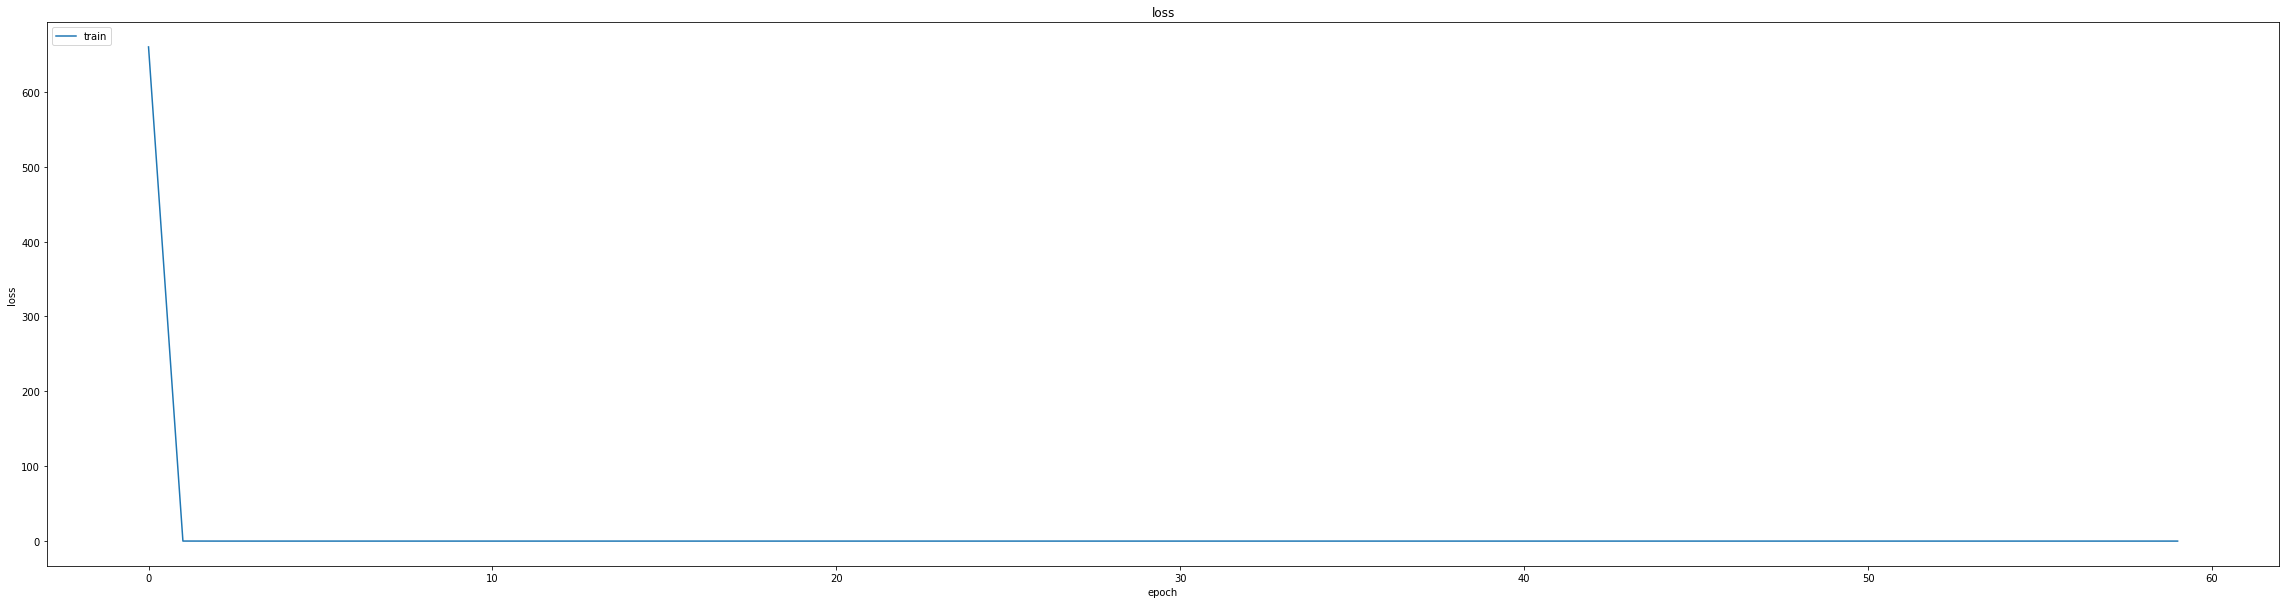

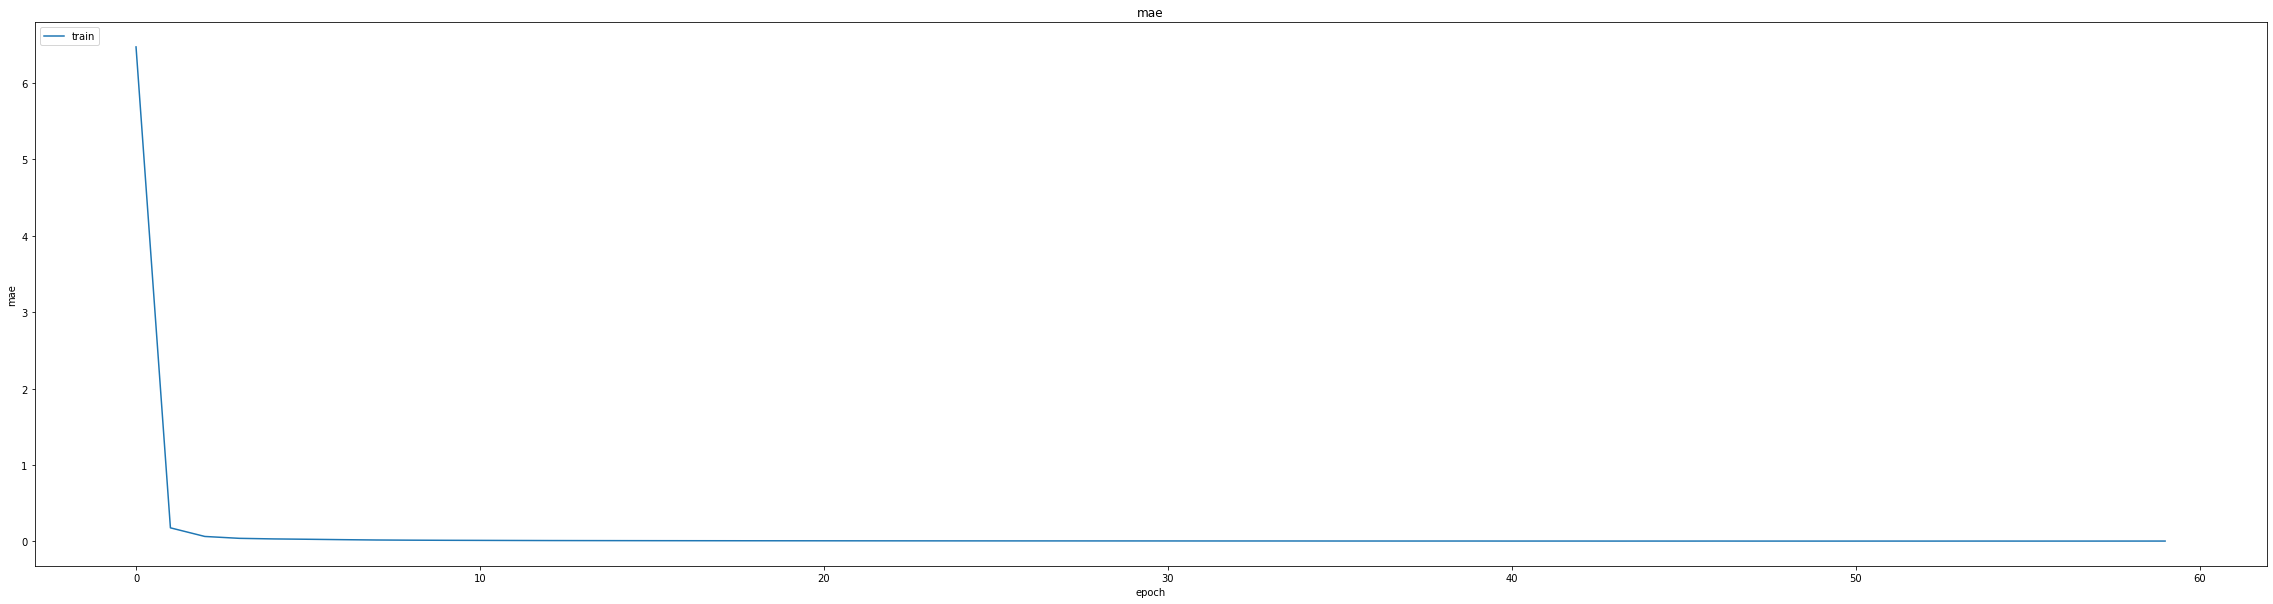

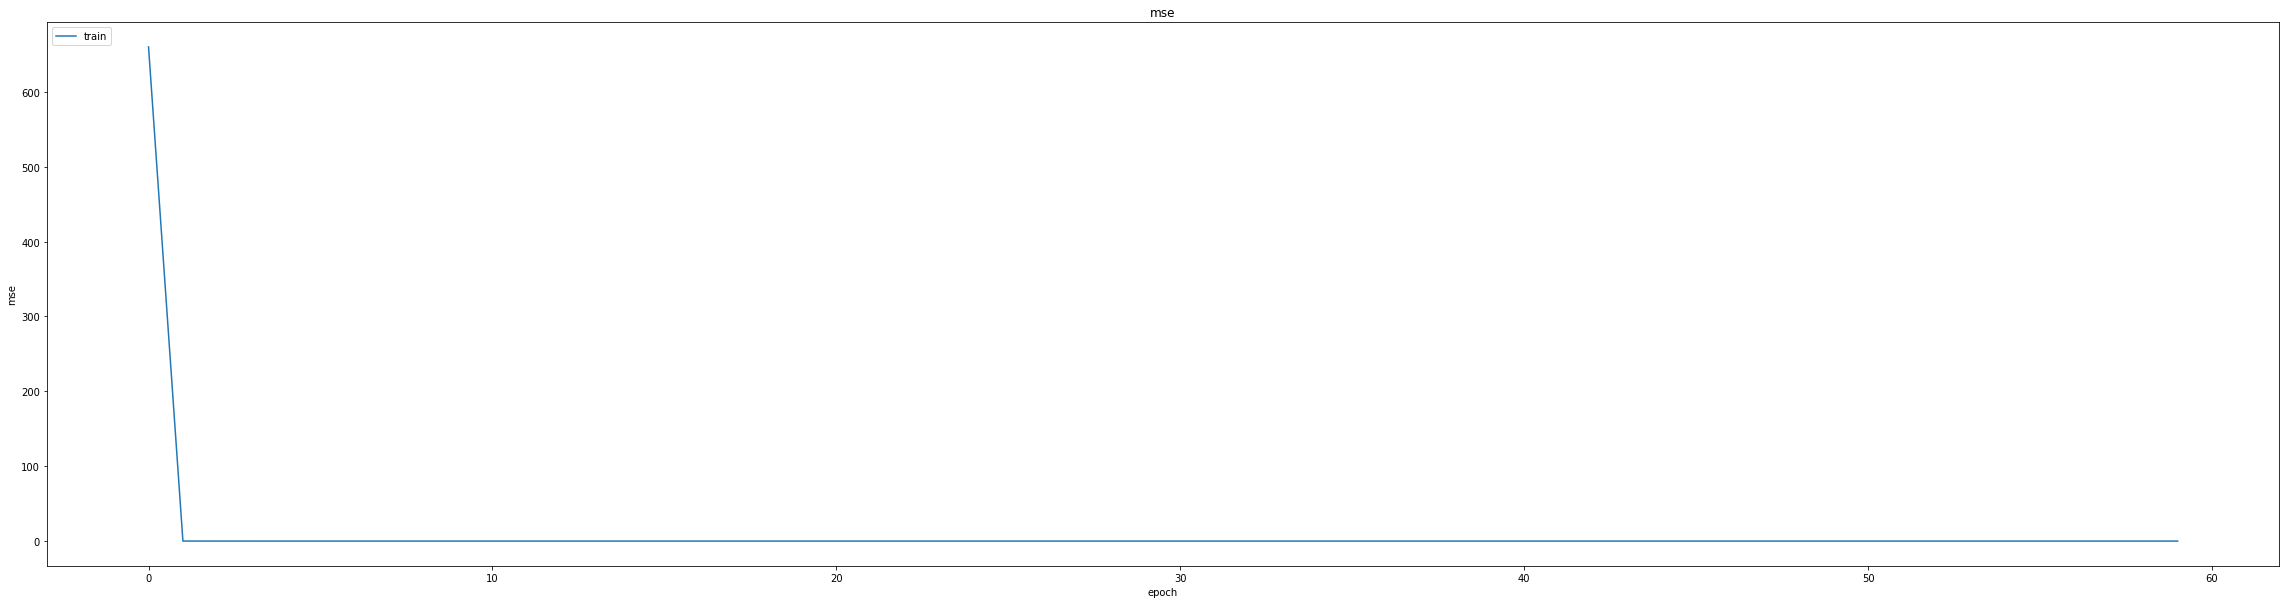

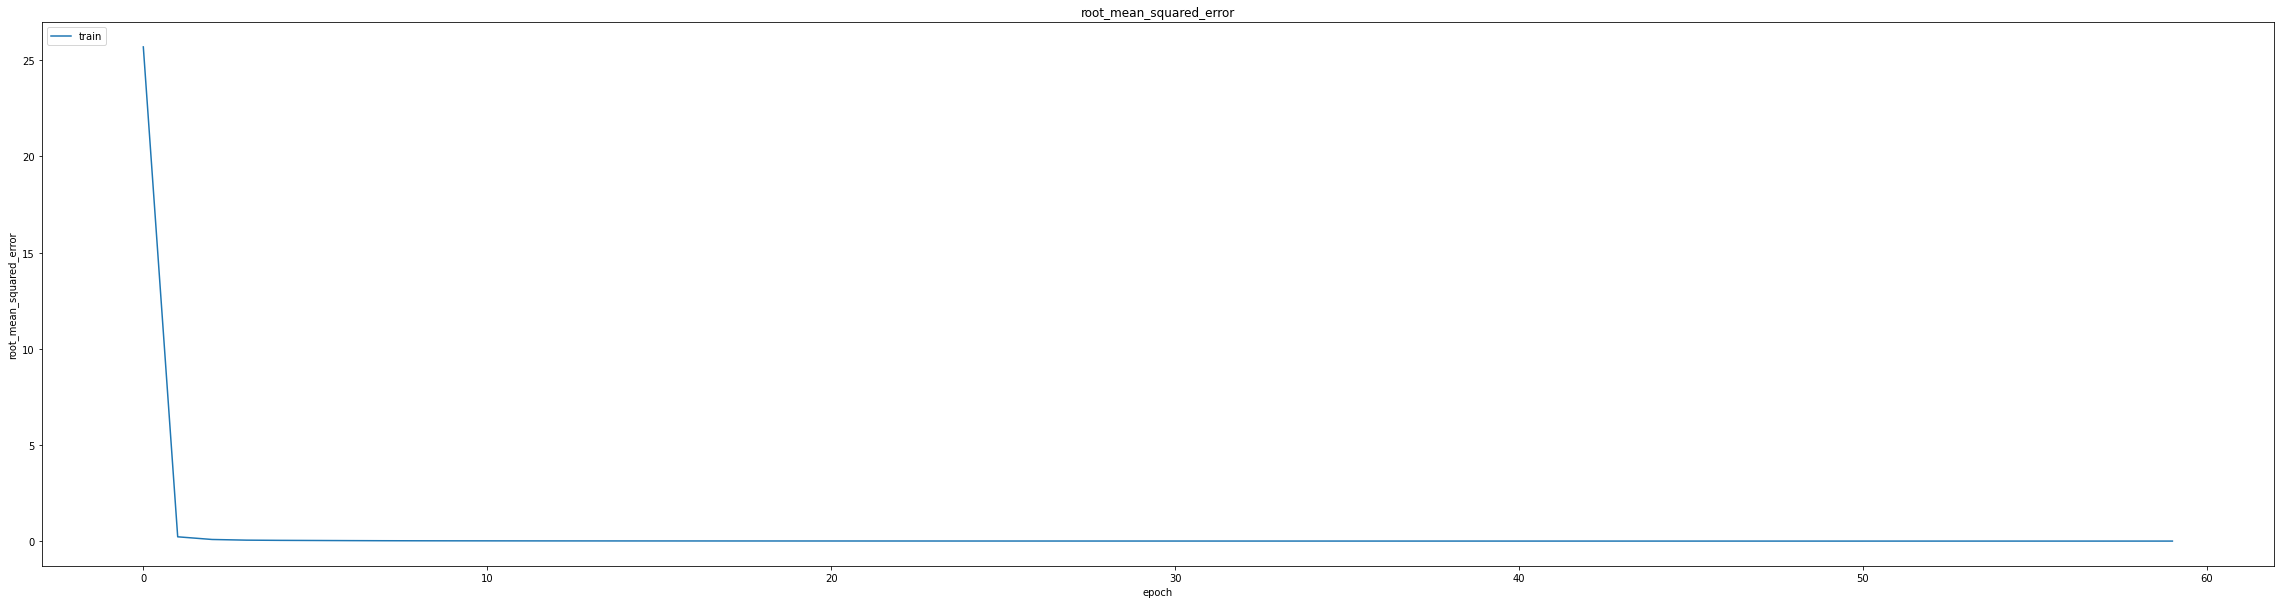

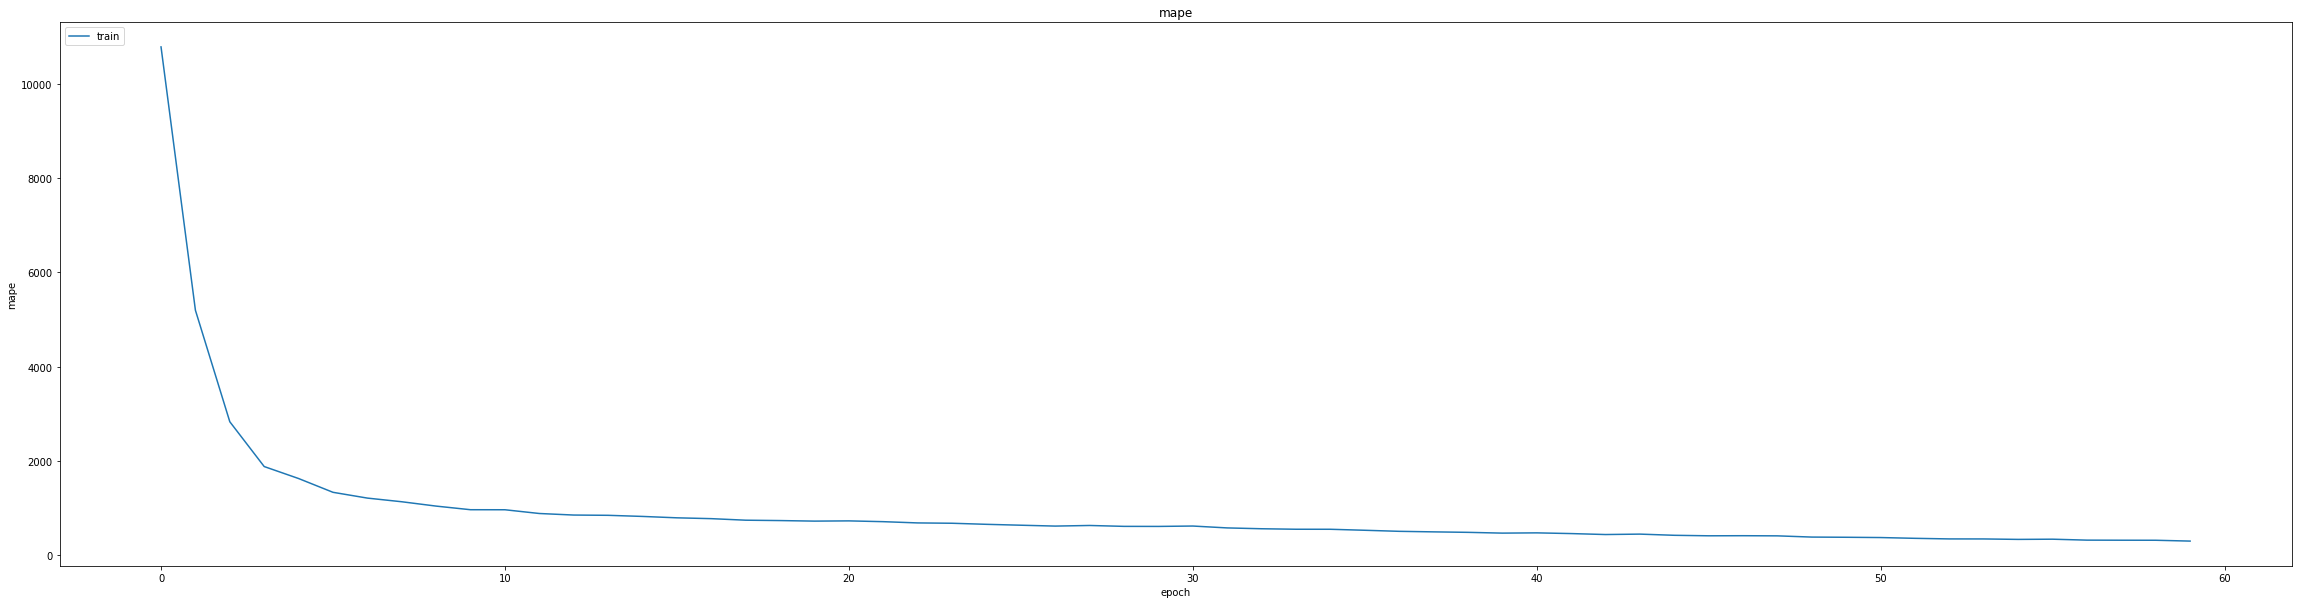

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.004735982045531273
0.006669053807854652
1392/1392 [==============================] - 6s 4ms/step
0.9992201228333332


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


344/348 [============================>.] - ETA: 0s - loss: 4.8579e-04 - mae: 0.0092 - mse: 4.8579e-04 - root_mean_squared_error: 0.0220 - mape: 332.4200
Epoch 1: val_mse did not improve from 0.00004
348/348 [==============================] - 9s 16ms/step - loss: 4.8170e-04 - mae: 0.0091 - mse: 4.8170e-04 - root_mean_squared_error: 0.0219 - mape: 329.4481 - val_loss: 7.2469e-05 - val_mae: 0.0068 - val_mse: 7.2469e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 1022.7032 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 2.9224e-05 - mae: 0.0040 - mse: 2.9224e-05 - root_mean_squared_error: 0.0054 - mape: 306.9655
Epoch 2: val_mse did not improve from 0.00004
348/348 [==============================] - 6s 17ms/step - loss: 2.9223e-05 - mae: 0.0040 - mse: 2.9223e-05 - root_mean_squared_error: 0.0054 - mape: 306.8626 - val_loss: 4.4953e-05 - val_mae: 0.0048 - val_mse: 4.4953e-05 - val_root_mean_squared_error: 0.0067 - val_mape: 948.7233 - lr: 0.0010
lr c

348/348 [==============================] - 13s 39ms/step - loss: 2.7762e-05 - mae: 0.0039 - mse: 2.7762e-05 - root_mean_squared_error: 0.0053 - mape: 257.6041 - val_loss: 4.3947e-05 - val_mae: 0.0050 - val_mse: 4.3947e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 889.3336 - lr: 9.0000e-04
Epoch 4/20
346/348 [============================>.] - ETA: 0s - loss: 2.9906e-05 - mae: 0.0042 - mse: 2.9906e-05 - root_mean_squared_error: 0.0055 - mape: 231.0281
Epoch 4: val_mse did not improve from 0.00004
348/348 [==============================] - 5s 14ms/step - loss: 3.0038e-05 - mae: 0.0042 - mse: 3.0038e-05 - root_mean_squared_error: 0.0055 - mape: 230.2901 - val_loss: 7.7981e-05 - val_mae: 0.0075 - val_mse: 7.7981e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 699.3618 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
345/348 [============================>.] - ETA: 0s - loss: 3.0474e-05 - mae: 0.0042 - mse: 3.0474e-05 - root_mean_squared_error: 0.0055 - mape: 231.

348/348 [==============================] - 12s 34ms/step - loss: 3.7852e-05 - mae: 0.0047 - mse: 3.7852e-05 - root_mean_squared_error: 0.0062 - mape: 218.7230 - val_loss: 4.3566e-05 - val_mae: 0.0051 - val_mse: 4.3566e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 932.1702 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
345/348 [============================>.] - ETA: 0s - loss: 3.2099e-05 - mae: 0.0043 - mse: 3.2099e-05 - root_mean_squared_error: 0.0057 - mape: 201.3390
Epoch 7: val_mse improved from 0.00004 to 0.00004, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 3.2540e-05 - mae: 0.0044 - mse: 3.2540e-05 - root_mean_squared_error: 0.0057 - mape: 200.1224 - val_loss: 3.7158e-05 - val_mae: 0.0046 - val_mse: 3.7158e-05 - val_root_mean_squared_error: 0.0061 - val_mape: 879.5124 - lr: 7.2900e-04
Epoch 8/20
348/348 [==============================] - ETA: 0s - loss: 3.5114e-05 - mae: 0.0046 - mse: 3.5114e-05 - root_mean_squared_error: 0.0059 - mape: 198.8221
Epoch 8: val_mse did not improve from 0.00004
348/348 [==============================] - 5s 14ms/step - loss: 3.5114e-05 - mae: 0.0046 - mse: 3.5114e-05 - root_mean_squared_error: 0.0059 - mape: 198.8221 - val_loss: 1.6961e-04 - val_mae: 0.0117 - val_mse: 1.6961e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 619.9418 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
346/348 [============================>.] - ETA: 0s - loss: 2.5002e-05 - mae: 0.0038 - mse: 2.5002e-05 - root_mean_squared_error: 0.0050 - mape: 204.

348/348 [==============================] - 12s 34ms/step - loss: 1.7613e-05 - mae: 0.0032 - mse: 1.7613e-05 - root_mean_squared_error: 0.0042 - mape: 195.9742 - val_loss: 2.1434e-05 - val_mae: 0.0032 - val_mse: 2.1434e-05 - val_root_mean_squared_error: 0.0046 - val_mape: 607.3405 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
347/348 [============================>.] - ETA: 0s - loss: 1.5364e-05 - mae: 0.0030 - mse: 1.5364e-05 - root_mean_squared_error: 0.0039 - mape: 148.9338
Epoch 19: val_mse did not improve from 0.00002
348/348 [==============================] - 5s 15ms/step - loss: 1.5362e-05 - mae: 0.0030 - mse: 1.5362e-05 - root_mean_squared_error: 0.0039 - mape: 148.8839 - val_loss: 9.0936e-05 - val_mae: 0.0087 - val_mse: 9.0936e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 555.1638 - lr: 3.8742e-04
Epoch 20/20
345/348 [============================>.] - ETA: 0s - loss: 1.6109e-05 - mae: 0.0031 - mse: 1.6109e-05 - root_mean_squared_error: 0.0040 - mape: 

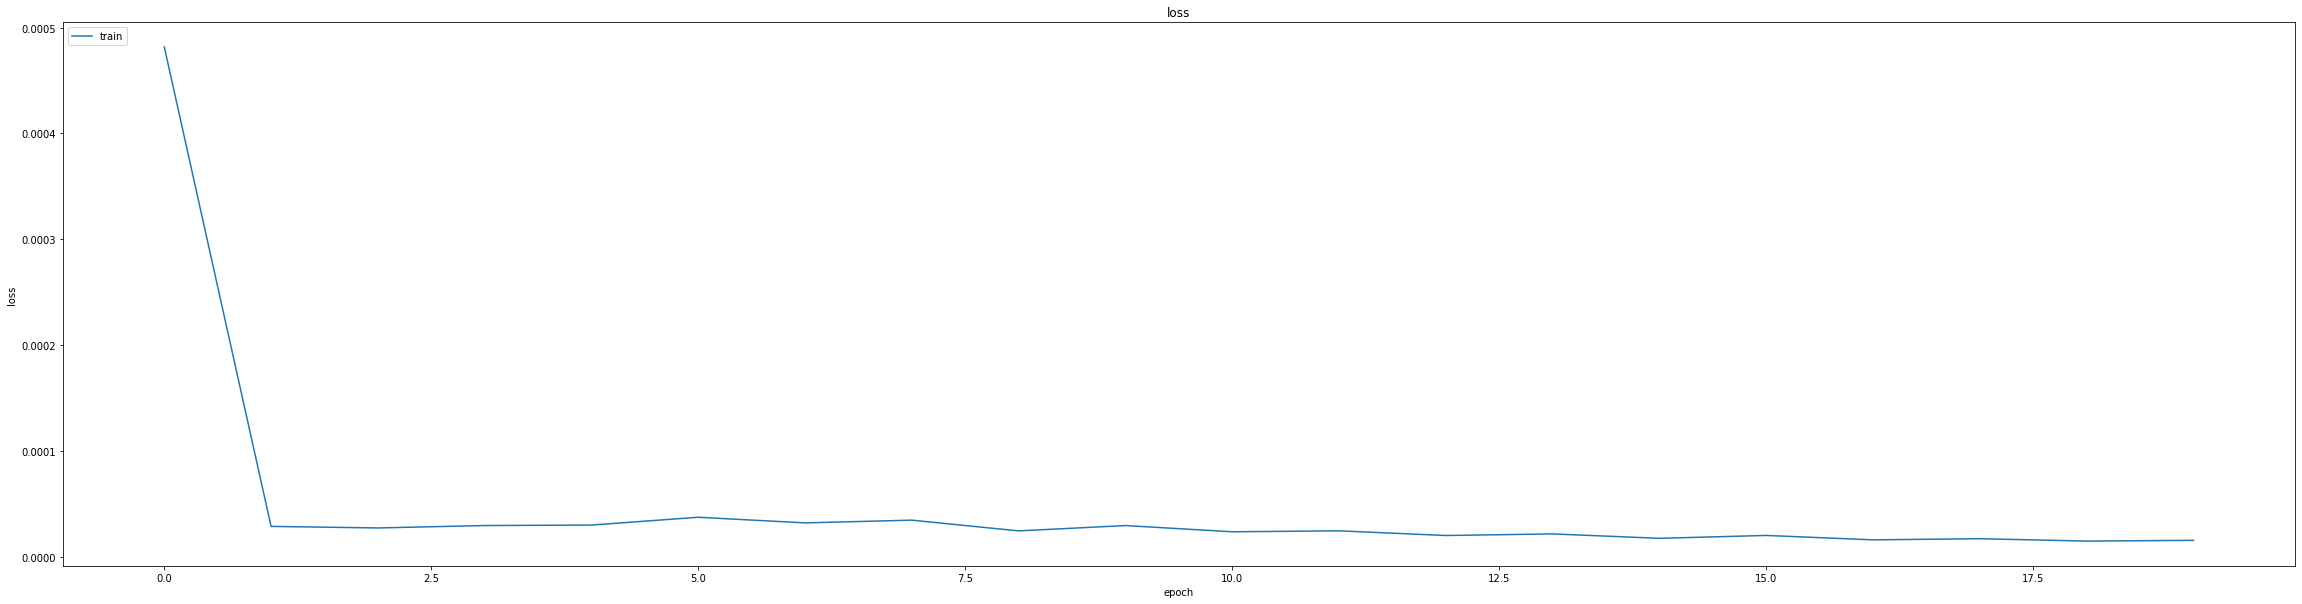

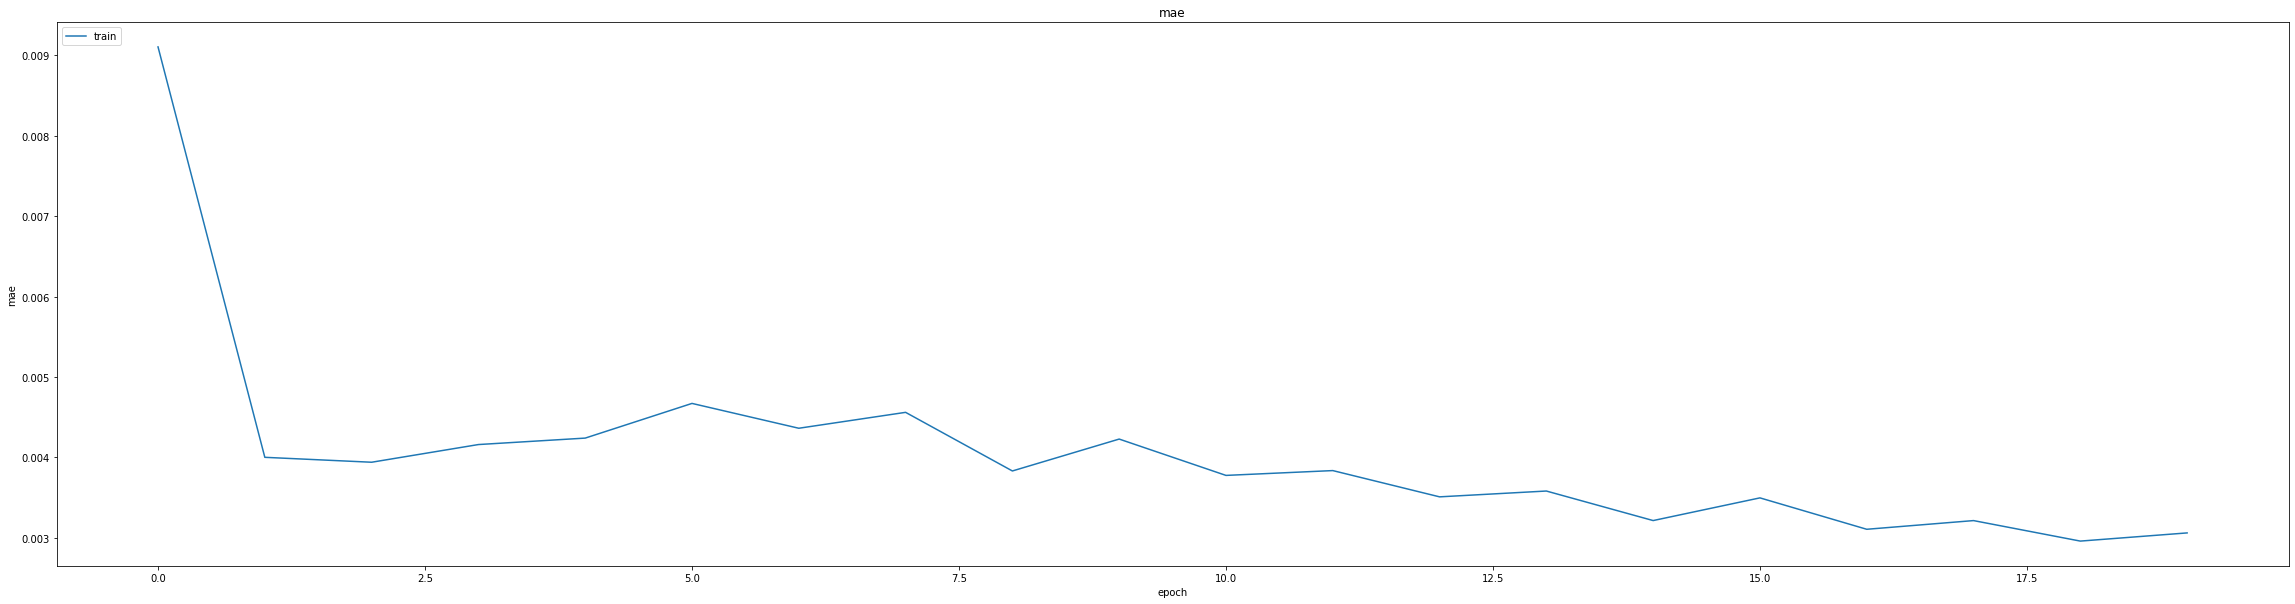

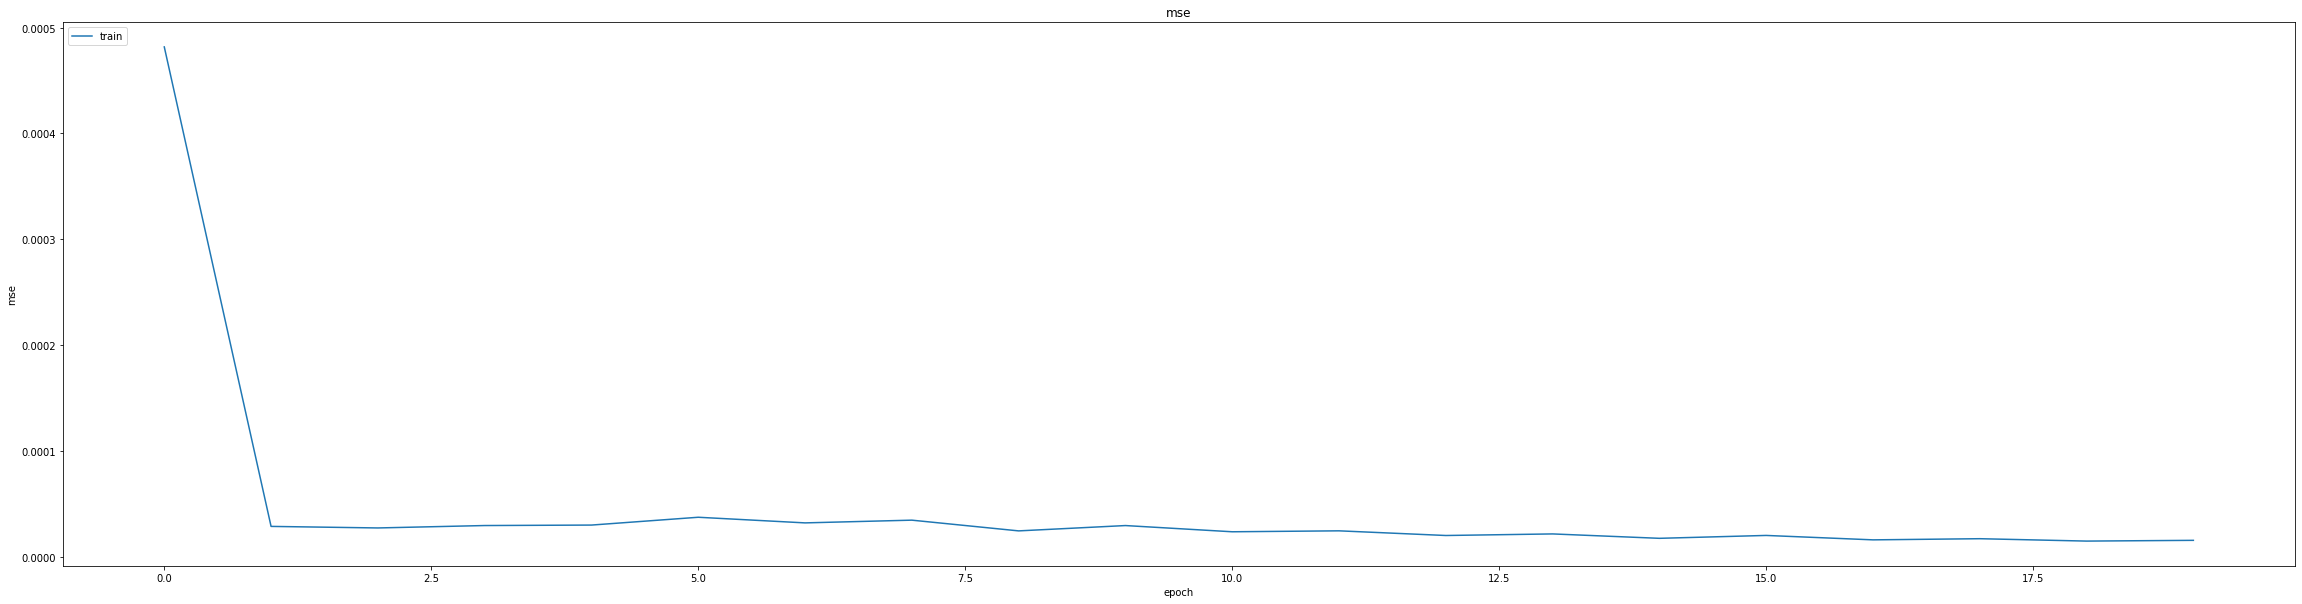

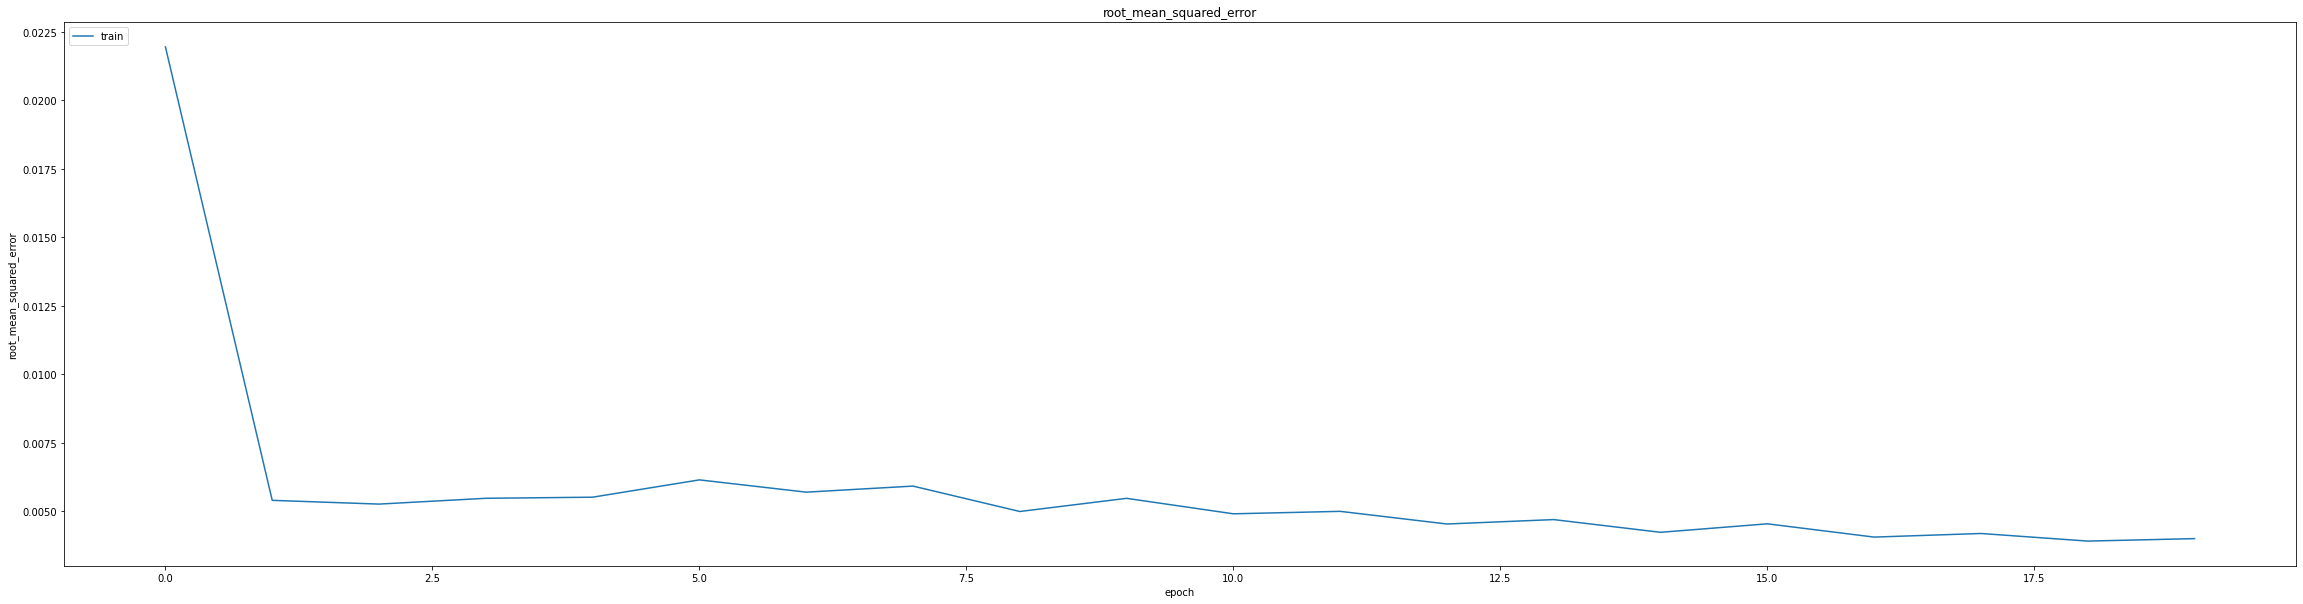

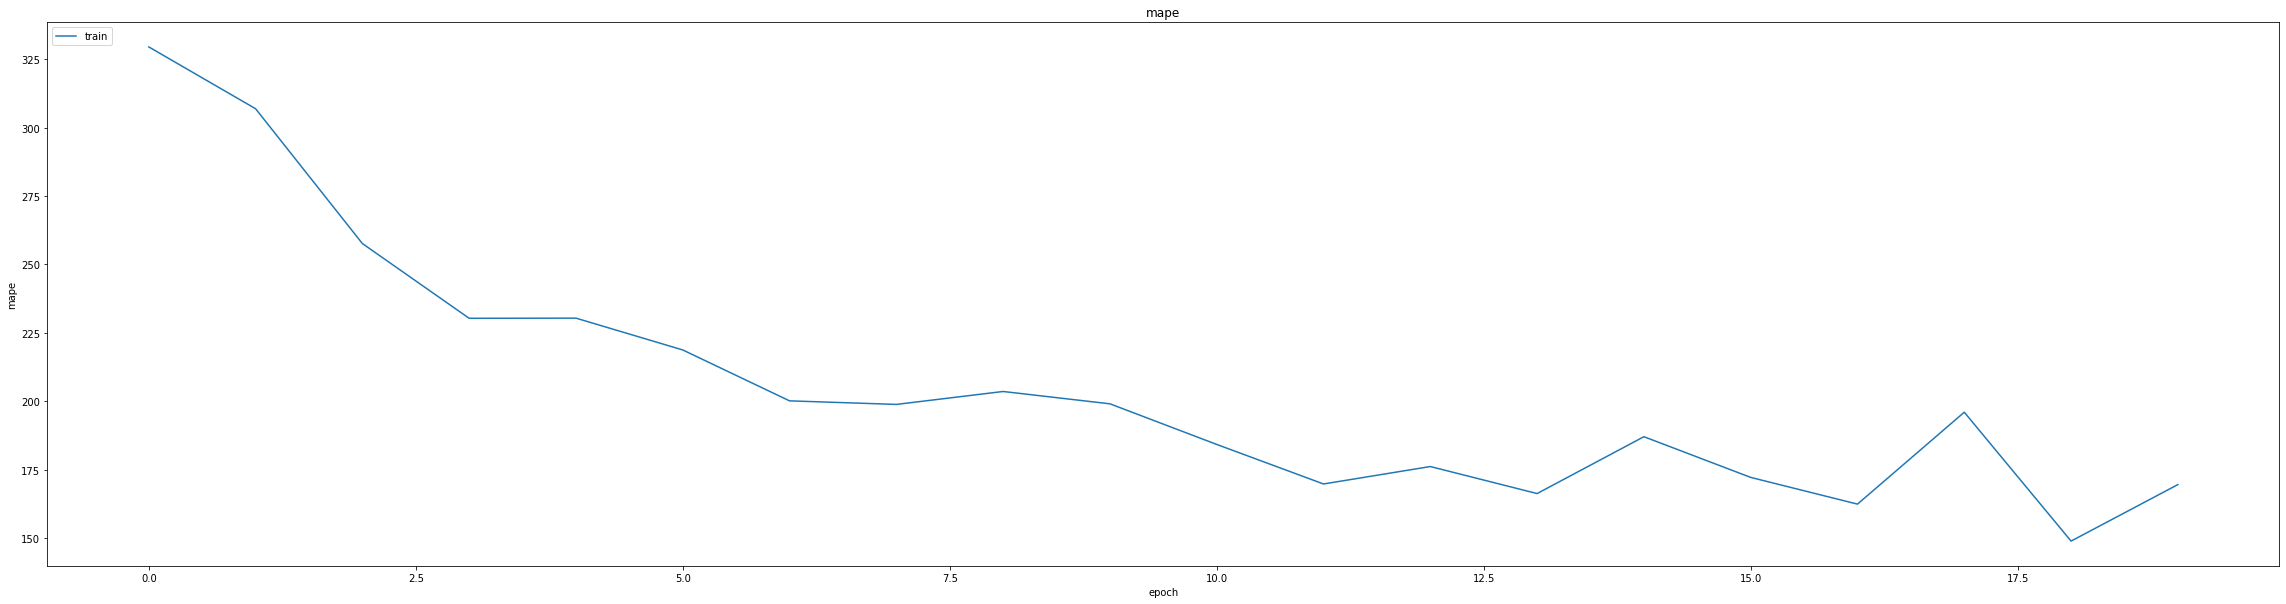

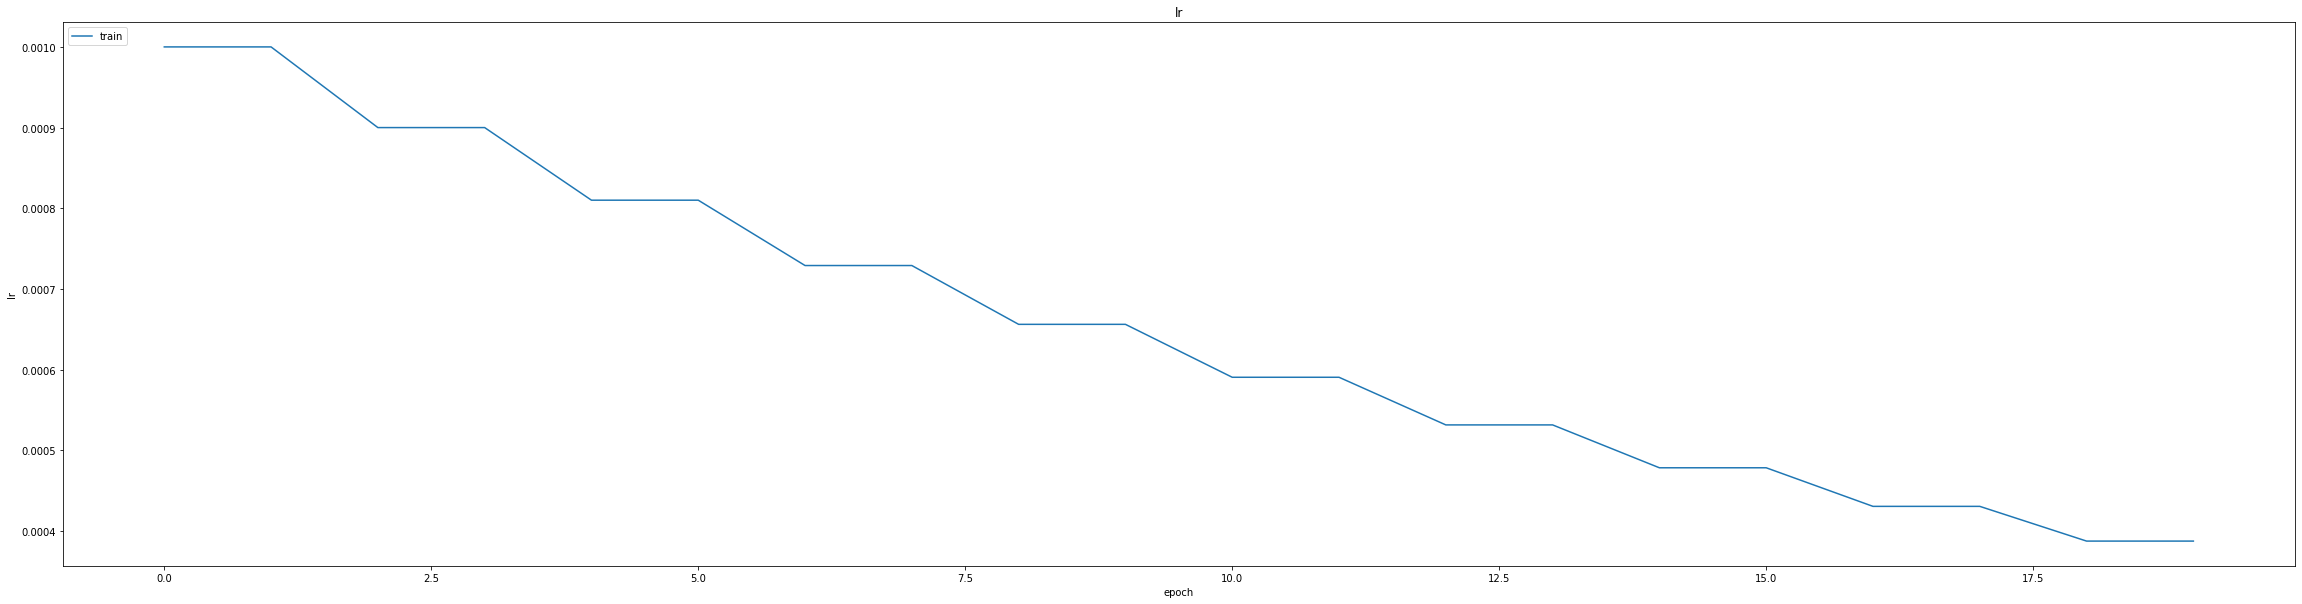

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.003205845830962062
0.004629708360880613
1392/1392 [==============================] - 5s 3ms/step
0.9991350118180975


1392/1392 [==============================] - 5s 3ms/step


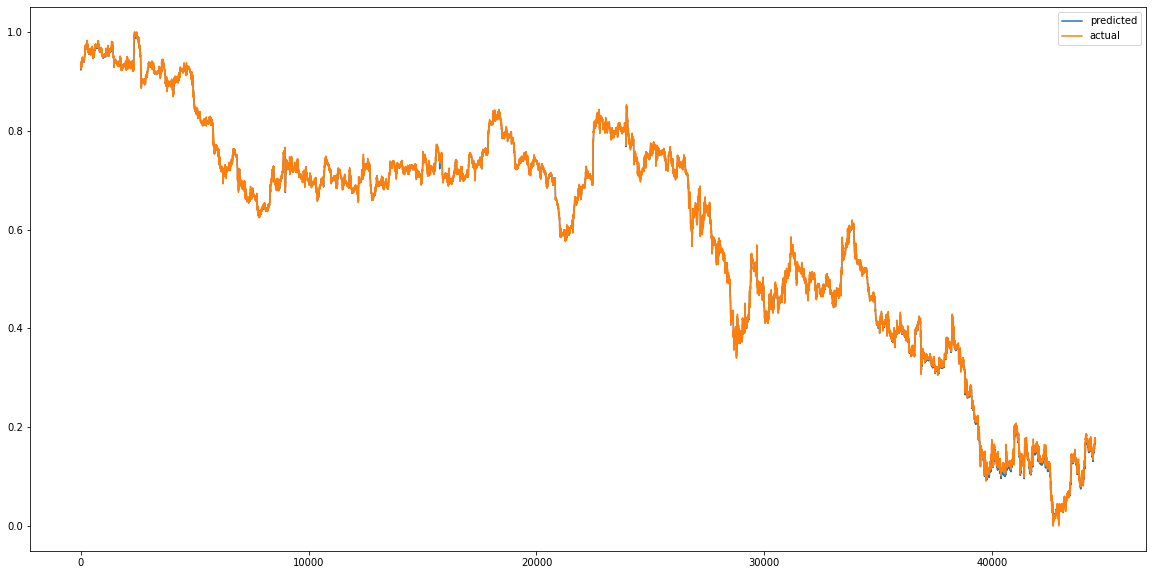

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


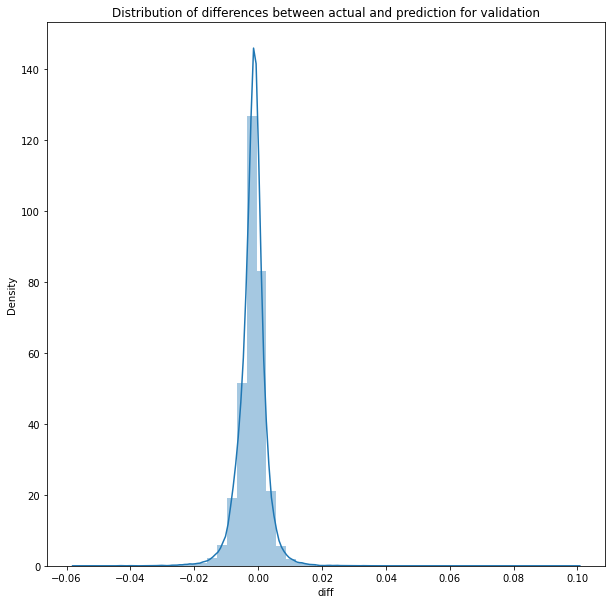

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 3ms/step


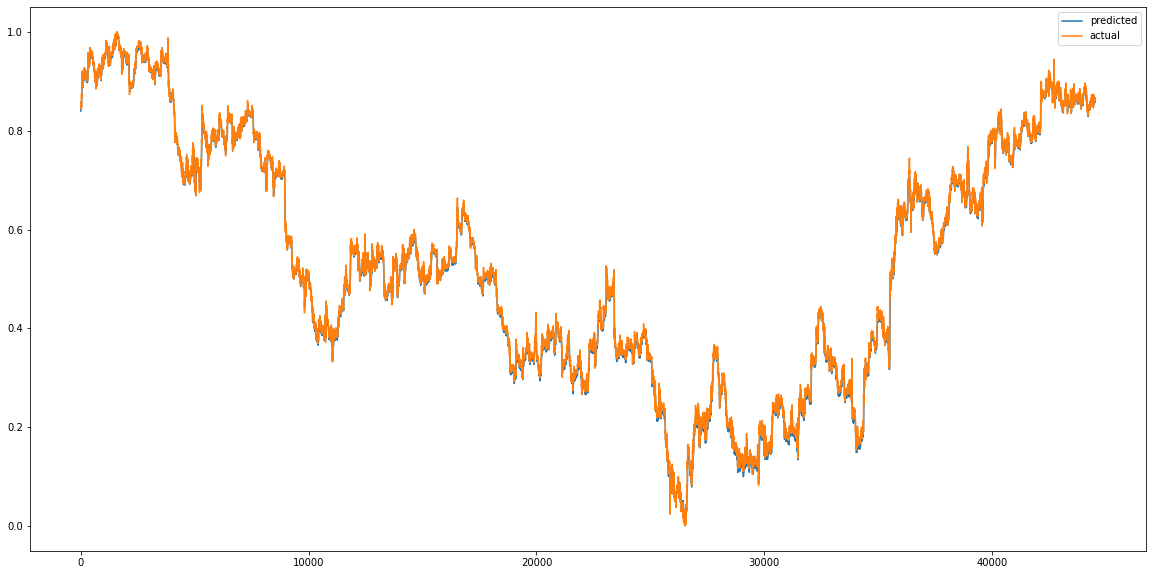

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


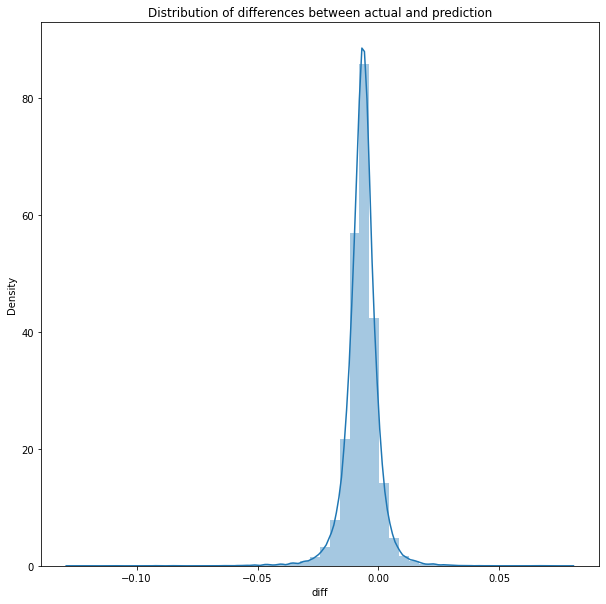

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.414371416626189e-05
RMSE :  0.009702768376409997
MAE :  0.0077264622922977545
1392/1392 [==============================] - 5s 3ms/step
R2_Score  : 0.9984418025426071


count    44530.000000
mean        -0.006802
std          0.006919
min         -0.126623
25%         -0.009801
50%         -0.006543
75%         -0.003510
max          0.078129
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)
model.summary()

ValueError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
348/348 [==============================] - ETA: 0s - loss: 1969.7079 - mae: 19.0556 - mse: 1969.7079 - root_mean_squared_error: 44.3814 - mape: 27349.4766
Epoch 1: val_mse improved from inf to 4.04151, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 51s 120ms/step - loss: 1969.7079 - mae: 19.0556 - mse: 1969.7079 - root_mean_squared_error: 44.3814 - mape: 27349.4766 - val_loss: 4.0415 - val_mae: 1.9960 - val_mse: 4.0415 - val_root_mean_squared_error: 2.0104 - val_mape: 59054.6250
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 1.6274 - mae: 1.1896 - mse: 1.6274 - root_mean_squared_error: 1.2757 - mape: 11824.9102
Epoch 2: val_mse improved from 4.04151 to 0.47764, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 1.6270 - mae: 1.1894 - mse: 1.6270 - root_mean_squared_error: 1.2756 - mape: 11820.9932 - val_loss: 0.4776 - val_mae: 0.6484 - val_mse: 0.4776 - val_root_mean_squared_error: 0.6911 - val_mape: 28383.8672
Epoch 3/60
346/348 [============================>.] - ETA: 0s - loss: 0.2825 - mae: 0.4527 - mse: 0.2825 - root_mean_squared_error: 0.5315 - mape: 7979.9619
Epoch 3: val_mse improved from 0.47764 to 0.12981, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.2820 - mae: 0.4522 - mse: 0.2820 - root_mean_squared_error: 0.5311 - mape: 7954.6938 - val_loss: 0.1298 - val_mae: 0.2836 - val_mse: 0.1298 - val_root_mean_squared_error: 0.3603 - val_mape: 19762.3574
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.1109 - mae: 0.2464 - mse: 0.1109 - root_mean_squared_error: 0.3330 - mape: 5874.3550
Epoch 4: val_mse improved from 0.12981 to 0.07256, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.1109 - mae: 0.2464 - mse: 0.1109 - root_mean_squared_error: 0.3330 - mape: 5872.4180 - val_loss: 0.0726 - val_mae: 0.1891 - val_mse: 0.0726 - val_root_mean_squared_error: 0.2694 - val_mape: 16459.2266
Epoch 5/60
346/348 [============================>.] - ETA: 0s - loss: 0.0777 - mae: 0.2051 - mse: 0.0777 - root_mean_squared_error: 0.2788 - mape: 5003.9658
Epoch 5: val_mse improved from 0.07256 to 0.05992, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0777 - mae: 0.2052 - mse: 0.0777 - root_mean_squared_error: 0.2788 - mape: 4988.1934 - val_loss: 0.0599 - val_mae: 0.1873 - val_mse: 0.0599 - val_root_mean_squared_error: 0.2448 - val_mape: 14842.3516
Epoch 6/60
348/348 [==============================] - ETA: 0s - loss: 0.0690 - mae: 0.2054 - mse: 0.0690 - root_mean_squared_error: 0.2627 - mape: 4883.6230
Epoch 6: val_mse improved from 0.05992 to 0.05734, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0690 - mae: 0.2054 - mse: 0.0690 - root_mean_squared_error: 0.2627 - mape: 4883.6230 - val_loss: 0.0573 - val_mae: 0.1942 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2395 - val_mape: 13972.2188
Epoch 7/60
347/348 [============================>.] - ETA: 0s - loss: 0.0667 - mae: 0.2116 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 4767.6196
Epoch 7: val_mse improved from 0.05734 to 0.05716, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0667 - mae: 0.2116 - mse: 0.0667 - root_mean_squared_error: 0.2584 - mape: 4766.0439 - val_loss: 0.0572 - val_mae: 0.1984 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2391 - val_mape: 13528.6211
Epoch 8/60
348/348 [==============================] - ETA: 0s - loss: 0.0663 - mae: 0.2157 - mse: 0.0663 - root_mean_squared_error: 0.2575 - mape: 4595.6665
Epoch 8: val_mse did not improve from 0.05716
348/348 [==============================] - 8s 22ms/step - loss: 0.0663 - mae: 0.2157 - mse: 0.0663 - root_mean_squared_error: 0.2575 - mape: 4595.6665 - val_loss: 0.0573 - val_mae: 0.2005 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2394 - val_mape: 13327.7236
Epoch 9/60
346/348 [============================>.] - ETA: 0s - loss: 0.0662 - mae: 0.2173 - mse: 0.0662 - root_mean_squared_error: 0.2573 - mape: 4609.3247
Epoch 9: val_mse did not improve from 0.05716
348/348 [==============================] - 8s 22ms/step - 

348/348 [==============================] - 40s 116ms/step - loss: 0.0657 - mae: 0.2172 - mse: 0.0657 - root_mean_squared_error: 0.2563 - mape: 4408.6084 - val_loss: 0.0570 - val_mae: 0.2006 - val_mse: 0.0570 - val_root_mean_squared_error: 0.2386 - val_mape: 13182.8398
Epoch 14/60
346/348 [============================>.] - ETA: 0s - loss: 0.0648 - mae: 0.2149 - mse: 0.0648 - root_mean_squared_error: 0.2546 - mape: 4432.3691
Epoch 14: val_mse improved from 0.05695 to 0.05632, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0648 - mae: 0.2149 - mse: 0.0648 - root_mean_squared_error: 0.2546 - mape: 4418.3779 - val_loss: 0.0563 - val_mae: 0.1997 - val_mse: 0.0563 - val_root_mean_squared_error: 0.2373 - val_mape: 13079.5078
Epoch 15/60
346/348 [============================>.] - ETA: 0s - loss: 0.0645 - mae: 0.2148 - mse: 0.0645 - root_mean_squared_error: 0.2540 - mape: 4545.7720
Epoch 15: val_mse improved from 0.05632 to 0.05616, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0645 - mae: 0.2148 - mse: 0.0645 - root_mean_squared_error: 0.2540 - mape: 4531.4067 - val_loss: 0.0562 - val_mae: 0.1995 - val_mse: 0.0562 - val_root_mean_squared_error: 0.2370 - val_mape: 13048.1064
Epoch 16/60
346/348 [============================>.] - ETA: 0s - loss: 0.0642 - mae: 0.2144 - mse: 0.0642 - root_mean_squared_error: 0.2534 - mape: 4502.7285
Epoch 16: val_mse improved from 0.05616 to 0.05579, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0642 - mae: 0.2144 - mse: 0.0642 - root_mean_squared_error: 0.2534 - mape: 4488.5127 - val_loss: 0.0558 - val_mae: 0.1984 - val_mse: 0.0558 - val_root_mean_squared_error: 0.2362 - val_mape: 13062.4873
Epoch 17/60
346/348 [============================>.] - ETA: 0s - loss: 0.0639 - mae: 0.2136 - mse: 0.0639 - root_mean_squared_error: 0.2528 - mape: 4719.9482
Epoch 17: val_mse improved from 0.05579 to 0.05560, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0639 - mae: 0.2136 - mse: 0.0639 - root_mean_squared_error: 0.2527 - mape: 4705.0137 - val_loss: 0.0556 - val_mae: 0.1981 - val_mse: 0.0556 - val_root_mean_squared_error: 0.2358 - val_mape: 13027.2871
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0636 - mae: 0.2130 - mse: 0.0636 - root_mean_squared_error: 0.2522 - mape: 4458.6372
Epoch 18: val_mse improved from 0.05560 to 0.05532, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0636 - mae: 0.2129 - mse: 0.0636 - root_mean_squared_error: 0.2522 - mape: 4457.1553 - val_loss: 0.0553 - val_mae: 0.1976 - val_mse: 0.0553 - val_root_mean_squared_error: 0.2352 - val_mape: 12999.1182
Epoch 19/60
347/348 [============================>.] - ETA: 0s - loss: 0.0624 - mae: 0.2102 - mse: 0.0624 - root_mean_squared_error: 0.2499 - mape: 4470.8057
Epoch 19: val_mse improved from 0.05532 to 0.05249, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0624 - mae: 0.2102 - mse: 0.0624 - root_mean_squared_error: 0.2499 - mape: 4469.3374 - val_loss: 0.0525 - val_mae: 0.1917 - val_mse: 0.0525 - val_root_mean_squared_error: 0.2291 - val_mape: 12779.6543
Epoch 20/60
346/348 [============================>.] - ETA: 0s - loss: 0.0489 - mae: 0.1788 - mse: 0.0489 - root_mean_squared_error: 0.2212 - mape: 4265.8472
Epoch 20: val_mse improved from 0.05249 to 0.03178, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0489 - mae: 0.1787 - mse: 0.0489 - root_mean_squared_error: 0.2211 - mape: 4252.3130 - val_loss: 0.0318 - val_mae: 0.1431 - val_mse: 0.0318 - val_root_mean_squared_error: 0.1783 - val_mape: 10694.8682
Epoch 21/60
346/348 [============================>.] - ETA: 0s - loss: 0.0283 - mae: 0.1315 - mse: 0.0283 - root_mean_squared_error: 0.1681 - mape: 3249.5830
Epoch 21: val_mse improved from 0.03178 to 0.01699, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0282 - mae: 0.1314 - mse: 0.0282 - root_mean_squared_error: 0.1680 - mape: 3239.2847 - val_loss: 0.0170 - val_mae: 0.0901 - val_mse: 0.0170 - val_root_mean_squared_error: 0.1304 - val_mape: 9187.8262
Epoch 22/60
346/348 [============================>.] - ETA: 0s - loss: 0.0155 - mae: 0.0948 - mse: 0.0155 - root_mean_squared_error: 0.1244 - mape: 2852.2485
Epoch 22: val_mse improved from 0.01699 to 0.00801, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0154 - mae: 0.0947 - mse: 0.0154 - root_mean_squared_error: 0.1243 - mape: 2843.1807 - val_loss: 0.0080 - val_mae: 0.0613 - val_mse: 0.0080 - val_root_mean_squared_error: 0.0895 - val_mape: 7418.7534
Epoch 23/60
346/348 [============================>.] - ETA: 0s - loss: 0.0073 - mae: 0.0656 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 1945.6902
Epoch 23: val_mse improved from 0.00801 to 0.00358, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0073 - mae: 0.0656 - mse: 0.0073 - root_mean_squared_error: 0.0853 - mape: 1939.5004 - val_loss: 0.0036 - val_mae: 0.0418 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0598 - val_mape: 5551.6440
Epoch 24/60
348/348 [==============================] - ETA: 0s - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1721.2764
Epoch 24: val_mse improved from 0.00358 to 0.00233, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0615 - mape: 1721.2764 - val_loss: 0.0023 - val_mae: 0.0331 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0482 - val_mape: 4817.3691
Epoch 25/60
347/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0419 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 1614.3639
Epoch 25: val_mse improved from 0.00233 to 0.00190, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0029 - mae: 0.0419 - mse: 0.0029 - root_mean_squared_error: 0.0538 - mape: 1613.8236 - val_loss: 0.0019 - val_mae: 0.0286 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 4475.9414
Epoch 26/60
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0384 - mse: 0.0024 - root_mean_squared_error: 0.0494 - mape: 1433.3394
Epoch 26: val_mse improved from 0.00190 to 0.00182, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0024 - mae: 0.0384 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 1428.7632 - val_loss: 0.0018 - val_mae: 0.0317 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 4240.6304
Epoch 27/60
348/348 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0359 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 1426.4606
Epoch 27: val_mse did not improve from 0.00182
348/348 [==============================] - 8s 22ms/step - loss: 0.0021 - mae: 0.0359 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 1426.4606 - val_loss: 0.0020 - val_mae: 0.0375 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0449 - val_mape: 4033.4785
Epoch 28/60
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1315.3622
Epoch 28: val_mse improved from 0.00182 to 0.00151, saving model to /content/drive/MyDrive/modelweights

348/348 [==============================] - 40s 115ms/step - loss: 0.0019 - mae: 0.0335 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1314.9222 - val_loss: 0.0015 - val_mae: 0.0308 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 3839.5225
Epoch 29/60
348/348 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1270.4132
Epoch 29: val_mse improved from 0.00151 to 0.00115, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0016 - mae: 0.0316 - mse: 0.0016 - root_mean_squared_error: 0.0406 - mape: 1270.4132 - val_loss: 0.0012 - val_mae: 0.0260 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0339 - val_mape: 3672.6384
Epoch 30/60
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1200.3699
Epoch 30: val_mse improved from 0.00115 to 0.00074, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 120ms/step - loss: 0.0015 - mae: 0.0297 - mse: 0.0015 - root_mean_squared_error: 0.0381 - mape: 1196.5363 - val_loss: 7.3853e-04 - val_mae: 0.0164 - val_mse: 7.3853e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 3521.8877
Epoch 31/60
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1164.2349
Epoch 31: val_mse improved from 0.00074 to 0.00072, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0013 - mae: 0.0282 - mse: 0.0013 - root_mean_squared_error: 0.0362 - mape: 1160.5372 - val_loss: 7.2429e-04 - val_mae: 0.0177 - val_mse: 7.2429e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 3386.0071
Epoch 32/60
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1163.5770
Epoch 32: val_mse did not improve from 0.00072
348/348 [==============================] - 8s 23ms/step - loss: 0.0012 - mae: 0.0267 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 1163.1876 - val_loss: 0.0017 - val_mae: 0.0365 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 3255.1165
Epoch 33/60
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1097.4708
Epoch 33: val_mse improved from 0.00072 to 0.00065, saving model to /content/drive/MyDrive/mode

348/348 [==============================] - 41s 118ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 1097.1027 - val_loss: 6.5190e-04 - val_mae: 0.0188 - val_mse: 6.5190e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 3148.0669
Epoch 34/60
347/348 [============================>.] - ETA: 0s - loss: 9.5801e-04 - mae: 0.0240 - mse: 9.5801e-04 - root_mean_squared_error: 0.0310 - mape: 1065.1777
Epoch 34: val_mse improved from 0.00065 to 0.00049, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 9.5792e-04 - mae: 0.0240 - mse: 9.5792e-04 - root_mean_squared_error: 0.0310 - mape: 1064.8207 - val_loss: 4.9370e-04 - val_mae: 0.0132 - val_mse: 4.9370e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 3029.3137
Epoch 35/60
346/348 [============================>.] - ETA: 0s - loss: 8.7475e-04 - mae: 0.0229 - mse: 8.7475e-04 - root_mean_squared_error: 0.0296 - mape: 1015.2545
Epoch 35: val_mse did not improve from 0.00049
348/348 [==============================] - 8s 22ms/step - loss: 8.7456e-04 - mae: 0.0229 - mse: 8.7456e-04 - root_mean_squared_error: 0.0296 - mape: 1012.0061 - val_loss: 0.0012 - val_mae: 0.0305 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0352 - val_mape: 2935.9395
Epoch 36/60
346/348 [============================>.] - ETA: 0s - loss: 8.0374e-04 - mae: 0.0219 - mse: 8.0374e-04 - root_mean_squared_error: 0.0284 - mape: 959.6457
Epoch 36: val_mse did not improve from 0.00049
348/348 [========

348/348 [==============================] - 41s 117ms/step - loss: 6.0636e-04 - mae: 0.0189 - mse: 6.0636e-04 - root_mean_squared_error: 0.0246 - mape: 893.5986 - val_loss: 2.2341e-04 - val_mae: 0.0085 - val_mse: 2.2341e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 2598.3650
Epoch 40/60
347/348 [============================>.] - ETA: 0s - loss: 5.4033e-04 - mae: 0.0178 - mse: 5.4033e-04 - root_mean_squared_error: 0.0232 - mape: 882.0720
Epoch 40: val_mse did not improve from 0.00022
348/348 [==============================] - 8s 23ms/step - loss: 5.4039e-04 - mae: 0.0178 - mse: 5.4039e-04 - root_mean_squared_error: 0.0232 - mape: 881.7763 - val_loss: 3.2291e-04 - val_mae: 0.0140 - val_mse: 3.2291e-04 - val_root_mean_squared_error: 0.0180 - val_mape: 2516.4309
Epoch 41/60
347/348 [============================>.] - ETA: 0s - loss: 4.9509e-04 - mae: 0.0171 - mse: 4.9509e-04 - root_mean_squared_error: 0.0223 - mape: 820.7789
Epoch 41: val_mse did not improve from 0.00022
348/348 [===

348/348 [==============================] - 40s 116ms/step - loss: 3.5844e-04 - mae: 0.0146 - mse: 3.5844e-04 - root_mean_squared_error: 0.0189 - mape: 816.8671 - val_loss: 2.1752e-04 - val_mae: 0.0102 - val_mse: 2.1752e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 2356.6262
Epoch 44/60
346/348 [============================>.] - ETA: 0s - loss: 3.2135e-04 - mae: 0.0138 - mse: 3.2135e-04 - root_mean_squared_error: 0.0179 - mape: 809.4849
Epoch 44: val_mse improved from 0.00022 to 0.00017, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 3.2129e-04 - mae: 0.0138 - mse: 3.2129e-04 - root_mean_squared_error: 0.0179 - mape: 806.9261 - val_loss: 1.7144e-04 - val_mae: 0.0079 - val_mse: 1.7144e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 2325.4795
Epoch 45/60
346/348 [============================>.] - ETA: 0s - loss: 2.9341e-04 - mae: 0.0132 - mse: 2.9341e-04 - root_mean_squared_error: 0.0171 - mape: 797.1178
Epoch 45: val_mse did not improve from 0.00017
348/348 [==============================] - 8s 23ms/step - loss: 2.9356e-04 - mae: 0.0132 - mse: 2.9356e-04 - root_mean_squared_error: 0.0171 - mape: 794.5660 - val_loss: 6.8444e-04 - val_mae: 0.0237 - val_mse: 6.8444e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 2284.6482
Epoch 46/60
348/348 [==============================] - ETA: 0s - loss: 2.7311e-04 - mae: 0.0127 - mse: 2.7311e-04 - root_mean_squared_error: 0.0165 - mape: 748.1009
Epoch 46: val_mse did not improve from 0.00017
348/348 [===

348/348 [==============================] - 41s 117ms/step - loss: 2.3538e-04 - mae: 0.0118 - mse: 2.3538e-04 - root_mean_squared_error: 0.0153 - mape: 751.6525 - val_loss: 1.6162e-04 - val_mae: 0.0081 - val_mse: 1.6162e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 2181.8987
Epoch 49/60
348/348 [==============================] - ETA: 0s - loss: 2.1791e-04 - mae: 0.0114 - mse: 2.1791e-04 - root_mean_squared_error: 0.0148 - mape: 733.1960
Epoch 49: val_mse did not improve from 0.00016
348/348 [==============================] - 8s 23ms/step - loss: 2.1791e-04 - mae: 0.0114 - mse: 2.1791e-04 - root_mean_squared_error: 0.0148 - mape: 733.1960 - val_loss: 2.4915e-04 - val_mae: 0.0109 - val_mse: 2.4915e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 2161.9568
Epoch 50/60
346/348 [============================>.] - ETA: 0s - loss: 2.1727e-04 - mae: 0.0113 - mse: 2.1727e-04 - root_mean_squared_error: 0.0147 - mape: 724.9411
Epoch 50: val_mse did not improve from 0.00016
348/348 [===

348/348 [==============================] - 40s 116ms/step - loss: 1.4636e-04 - mae: 0.0093 - mse: 1.4636e-04 - root_mean_squared_error: 0.0121 - mape: 695.0557 - val_loss: 1.6159e-04 - val_mae: 0.0090 - val_mse: 1.6159e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1966.2207
Epoch 56/60
347/348 [============================>.] - ETA: 0s - loss: 1.3479e-04 - mae: 0.0089 - mse: 1.3479e-04 - root_mean_squared_error: 0.0116 - mape: 652.5057
Epoch 56: val_mse did not improve from 0.00016
348/348 [==============================] - 8s 23ms/step - loss: 1.3477e-04 - mae: 0.0089 - mse: 1.3477e-04 - root_mean_squared_error: 0.0116 - mape: 652.2865 - val_loss: 1.7132e-04 - val_mae: 0.0103 - val_mse: 1.7132e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 1971.9799
Epoch 57/60
346/348 [============================>.] - ETA: 0s - loss: 1.2875e-04 - mae: 0.0087 - mse: 1.2875e-04 - root_mean_squared_error: 0.0113 - mape: 643.2966
Epoch 57: val_mse did not improve from 0.00016
348/348 [===

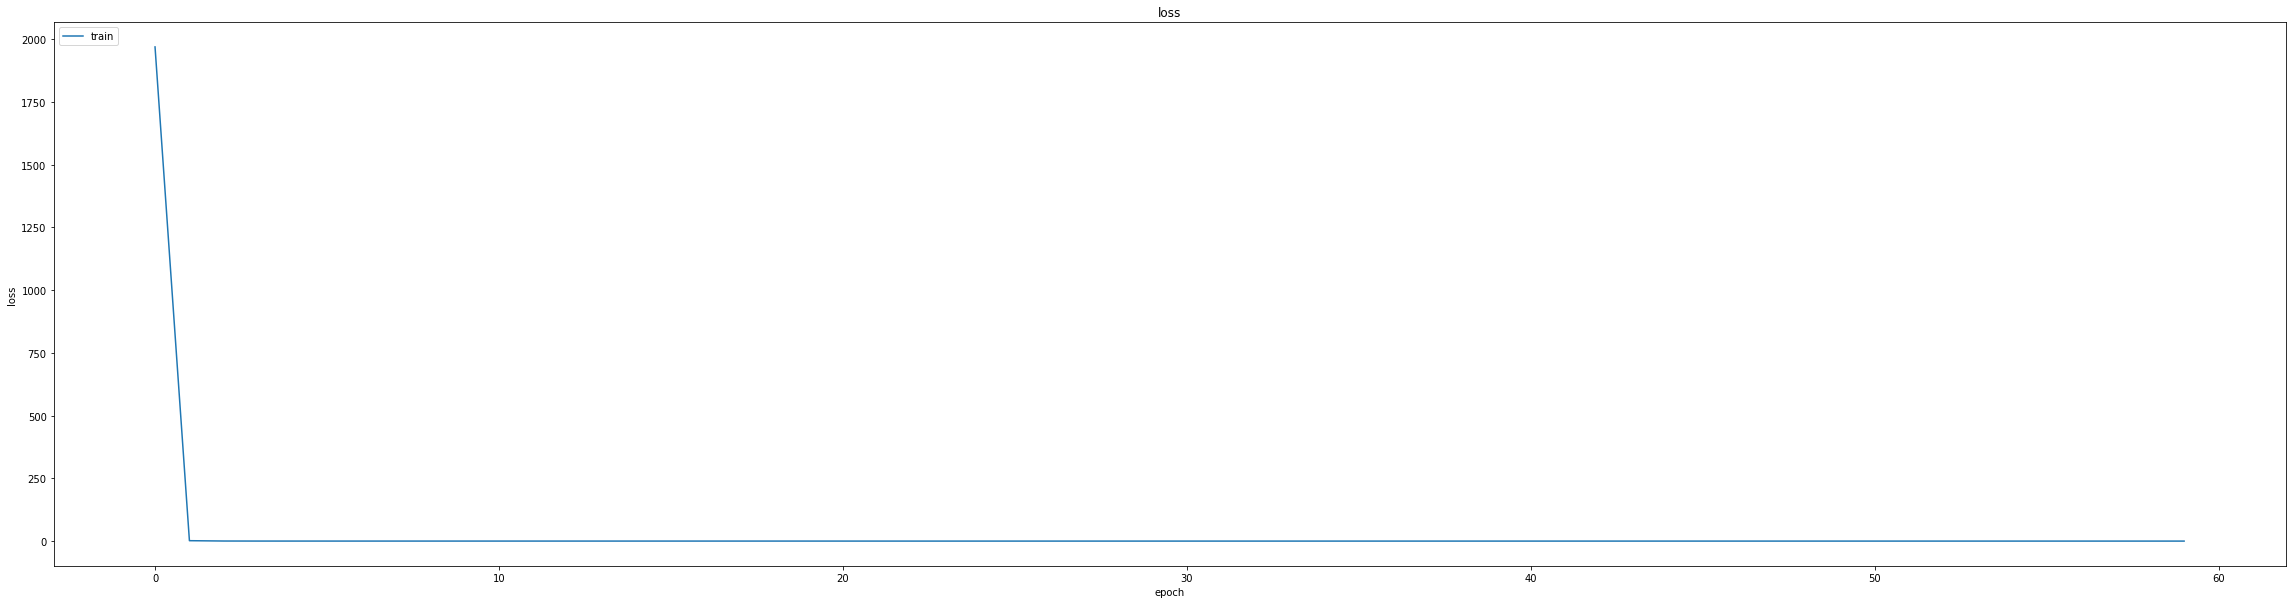

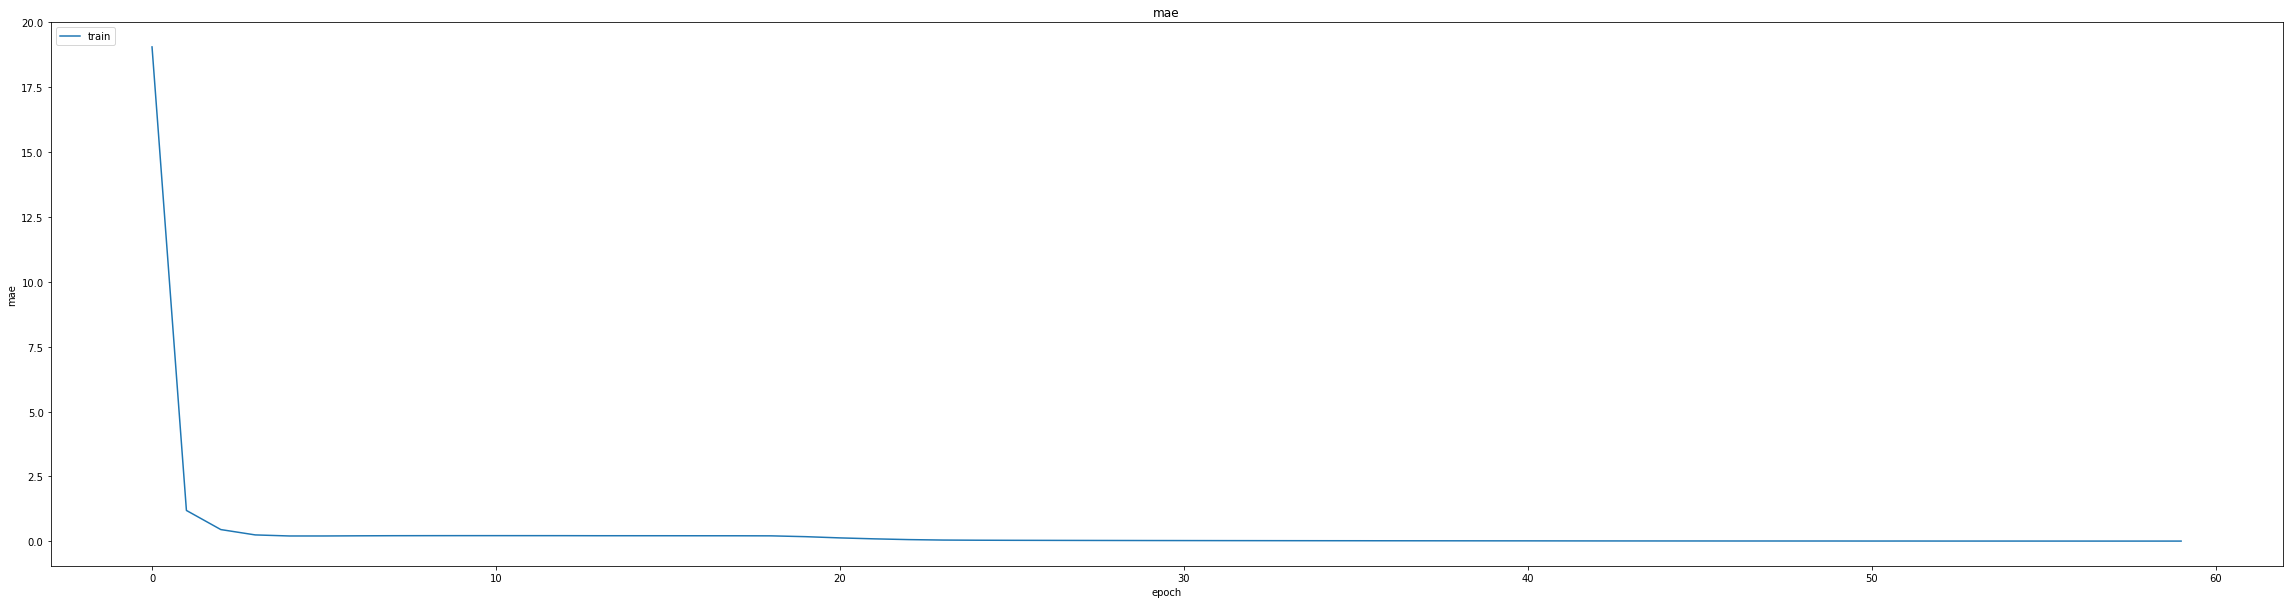

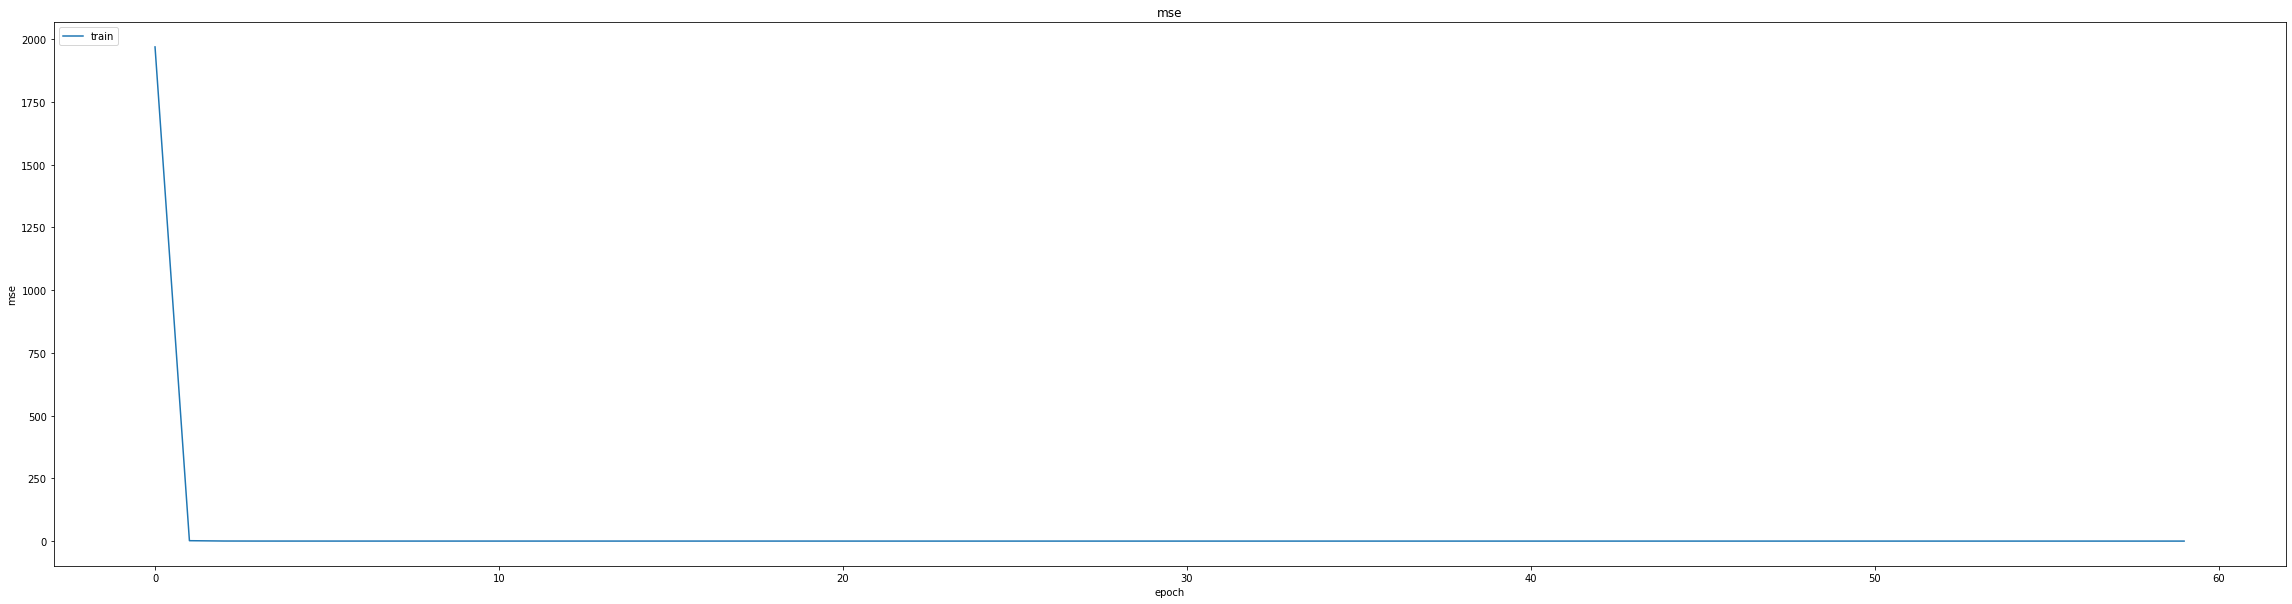

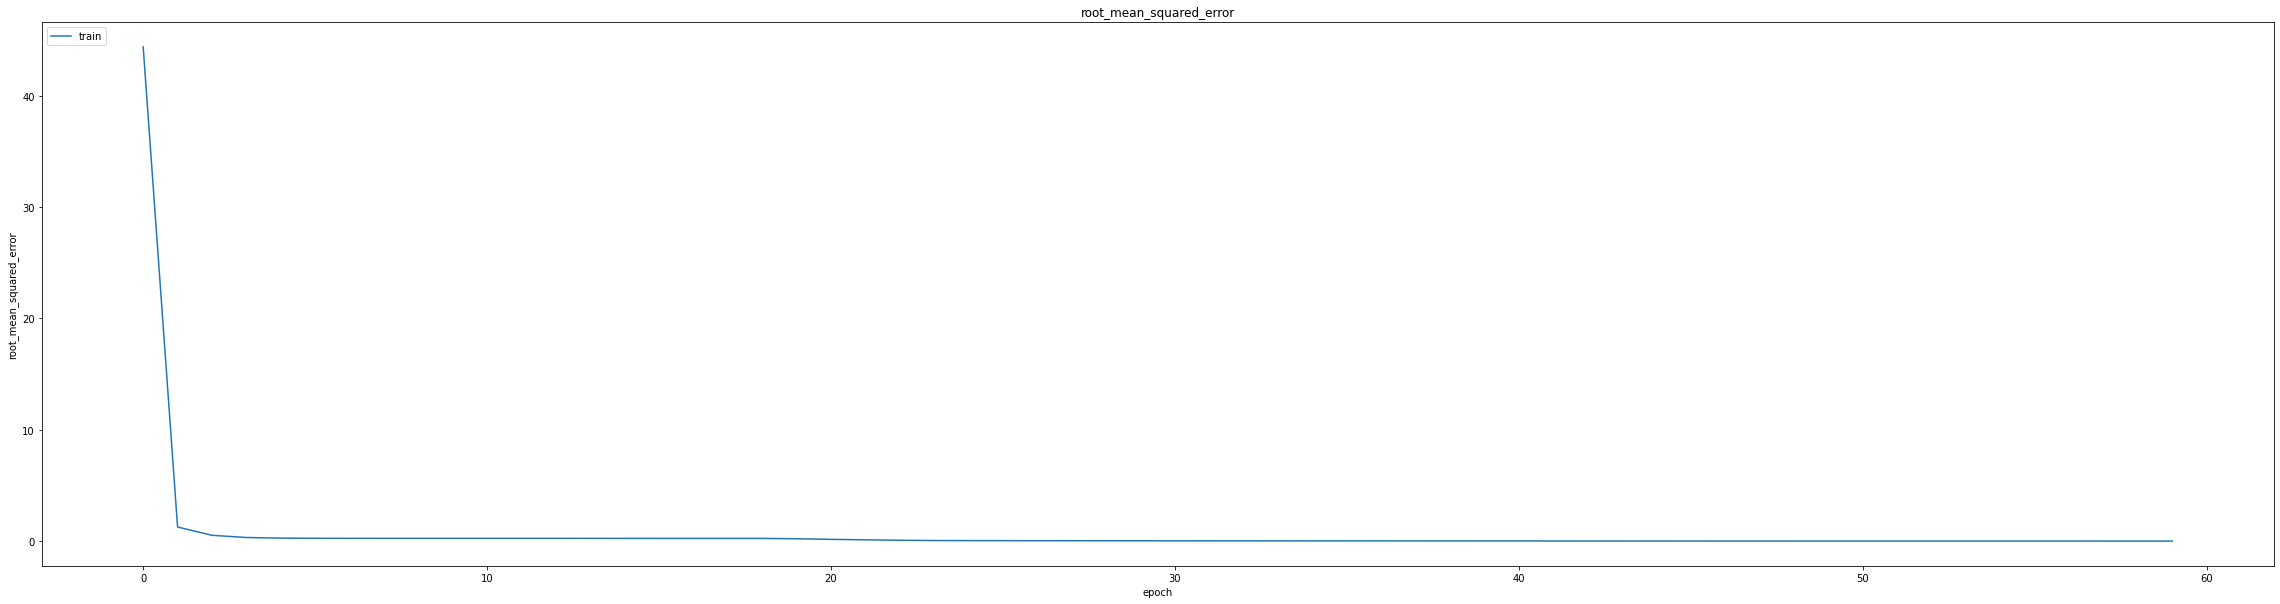

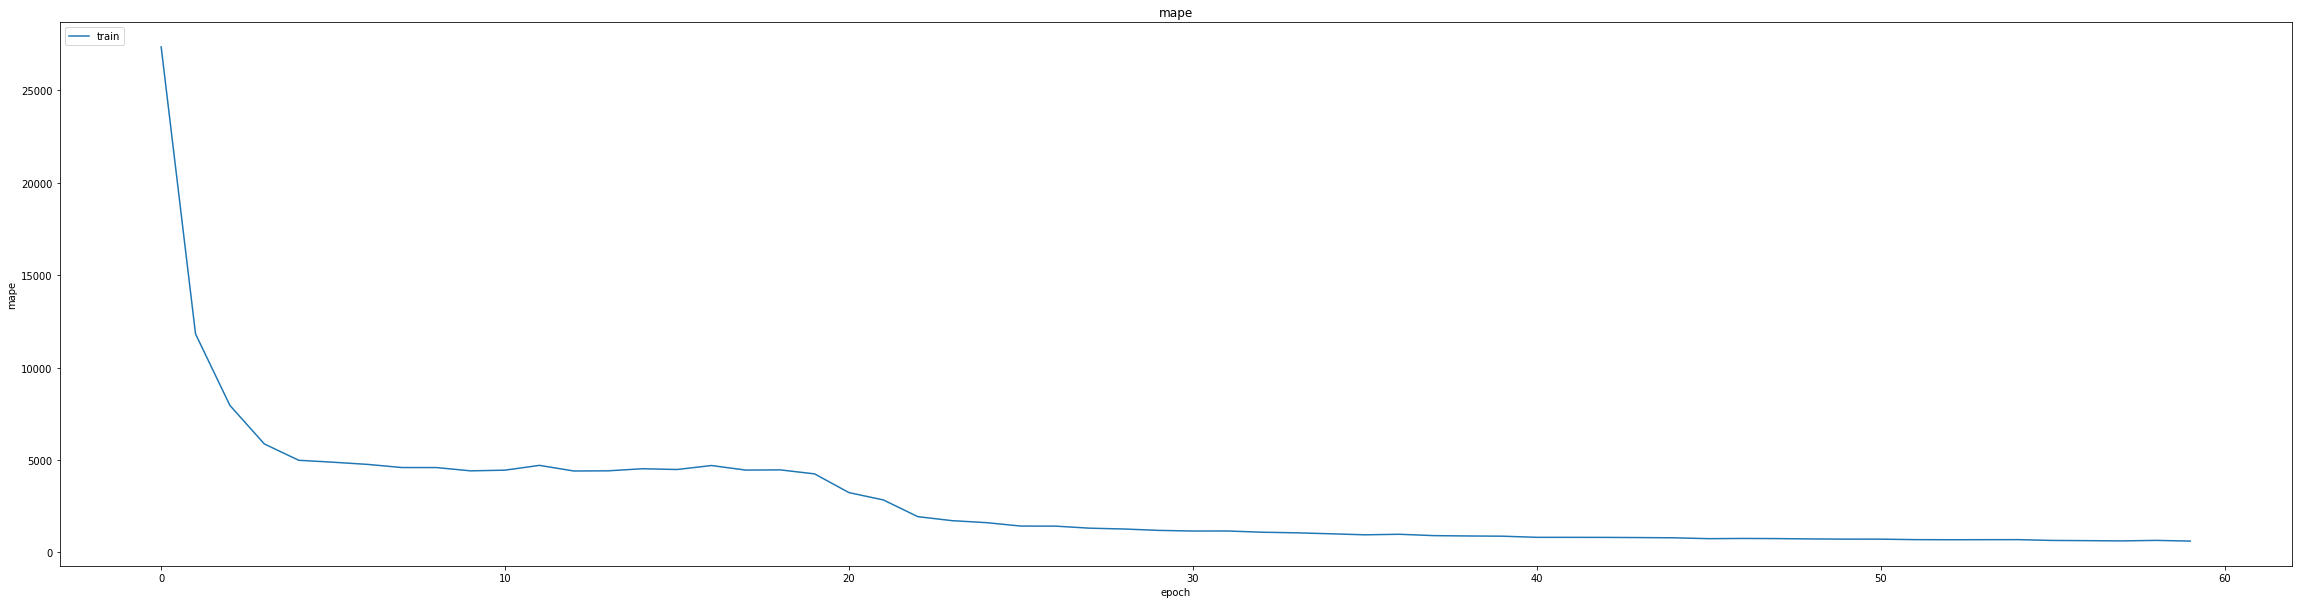

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007863666862249374
0.012711684219539165
1392/1392 [==============================] - 12s 7ms/step
0.9958200957925277


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20


347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0165 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 668.5139
Epoch 1: val_mse did not improve from 0.00016
348/348 [==============================] - 20s 32ms/step - loss: 0.0013 - mae: 0.0165 - mse: 0.0013 - root_mean_squared_error: 0.0357 - mape: 668.2896 - val_loss: 1.7311e-04 - val_mae: 0.0095 - val_mse: 1.7311e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1983.9301 - lr: 0.0010
Epoch 2/20
346/348 [============================>.] - ETA: 0s - loss: 1.0525e-04 - mae: 0.0077 - mse: 1.0525e-04 - root_mean_squared_error: 0.0103 - mape: 658.1587
Epoch 2: val_mse improved from 0.00016 to 0.00013, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 45s 130ms/step - loss: 1.0523e-04 - mae: 0.0077 - mse: 1.0523e-04 - root_mean_squared_error: 0.0103 - mape: 656.0510 - val_loss: 1.2511e-04 - val_mae: 0.0081 - val_mse: 1.2511e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 1899.0623 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/20
346/348 [============================>.] - ETA: 0s - loss: 8.1994e-05 - mae: 0.0068 - mse: 8.1994e-05 - root_mean_squared_error: 0.0091 - mape: 604.6769
Epoch 3: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 8.2012e-05 - mae: 0.0068 - mse: 8.2012e-05 - root_mean_squared_error: 0.0091 - mape: 602.7380 - val_loss: 1.0557e-04 - val_mae: 0.0075 - val_mse: 1.0557e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 1811.1831 - lr: 9.0000e-04
Epoch 4/20
346/348 [============================>.] - ETA: 0s - loss: 8.3266e-05 - mae: 0.0070 - mse: 8.3266e-05 - root_mean_squared_error: 0.0091 - mape: 594.4868
Epoch 4: val_mse improved from 0.00011 to 0.00008, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)


348/348 [==============================] - 42s 121ms/step - loss: 8.3341e-05 - mae: 0.0070 - mse: 8.3341e-05 - root_mean_squared_error: 0.0091 - mape: 592.5840 - val_loss: 7.7859e-05 - val_mae: 0.0055 - val_mse: 7.7859e-05 - val_root_mean_squared_error: 0.0088 - val_mape: 1745.1251 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/20
347/348 [============================>.] - ETA: 0s - loss: 7.3865e-05 - mae: 0.0065 - mse: 7.3865e-05 - root_mean_squared_error: 0.0086 - mape: 579.9927
Epoch 5: val_mse did not improve from 0.00008
348/348 [==============================] - 8s 24ms/step - loss: 7.3857e-05 - mae: 0.0065 - mse: 7.3857e-05 - root_mean_squared_error: 0.0086 - mape: 579.7979 - val_loss: 1.5595e-04 - val_mae: 0.0102 - val_mse: 1.5595e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 1674.3141 - lr: 8.1000e-04
Epoch 6/20
347/348 [============================>.] - ETA: 0s - loss: 8.1517e-05 - mae: 0.0070 - mse: 8.1517e-05 - root_mean_squared_error: 0.0090 - mape: 5

348/348 [==============================] - 41s 118ms/step - loss: 4.2081e-05 - mae: 0.0050 - mse: 4.2081e-05 - root_mean_squared_error: 0.0065 - mape: 389.0544 - val_loss: 4.3569e-05 - val_mae: 0.0051 - val_mse: 4.3569e-05 - val_root_mean_squared_error: 0.0066 - val_mape: 1166.0535 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
346/348 [============================>.] - ETA: 0s - loss: 3.1466e-05 - mae: 0.0043 - mse: 3.1466e-05 - root_mean_squared_error: 0.0056 - mape: 385.2610
Epoch 13: val_mse did not improve from 0.00004
348/348 [==============================] - 8s 22ms/step - loss: 3.1462e-05 - mae: 0.0043 - mse: 3.1462e-05 - root_mean_squared_error: 0.0056 - mape: 384.0255 - val_loss: 1.5388e-04 - val_mae: 0.0112 - val_mse: 1.5388e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 1109.3160 - lr: 5.3144e-04
Epoch 14/20
346/348 [============================>.] - ETA: 0s - loss: 3.6235e-05 - mae: 0.0047 - mse: 3.6235e-05 - root_mean_squared_error: 0.0060 - mape

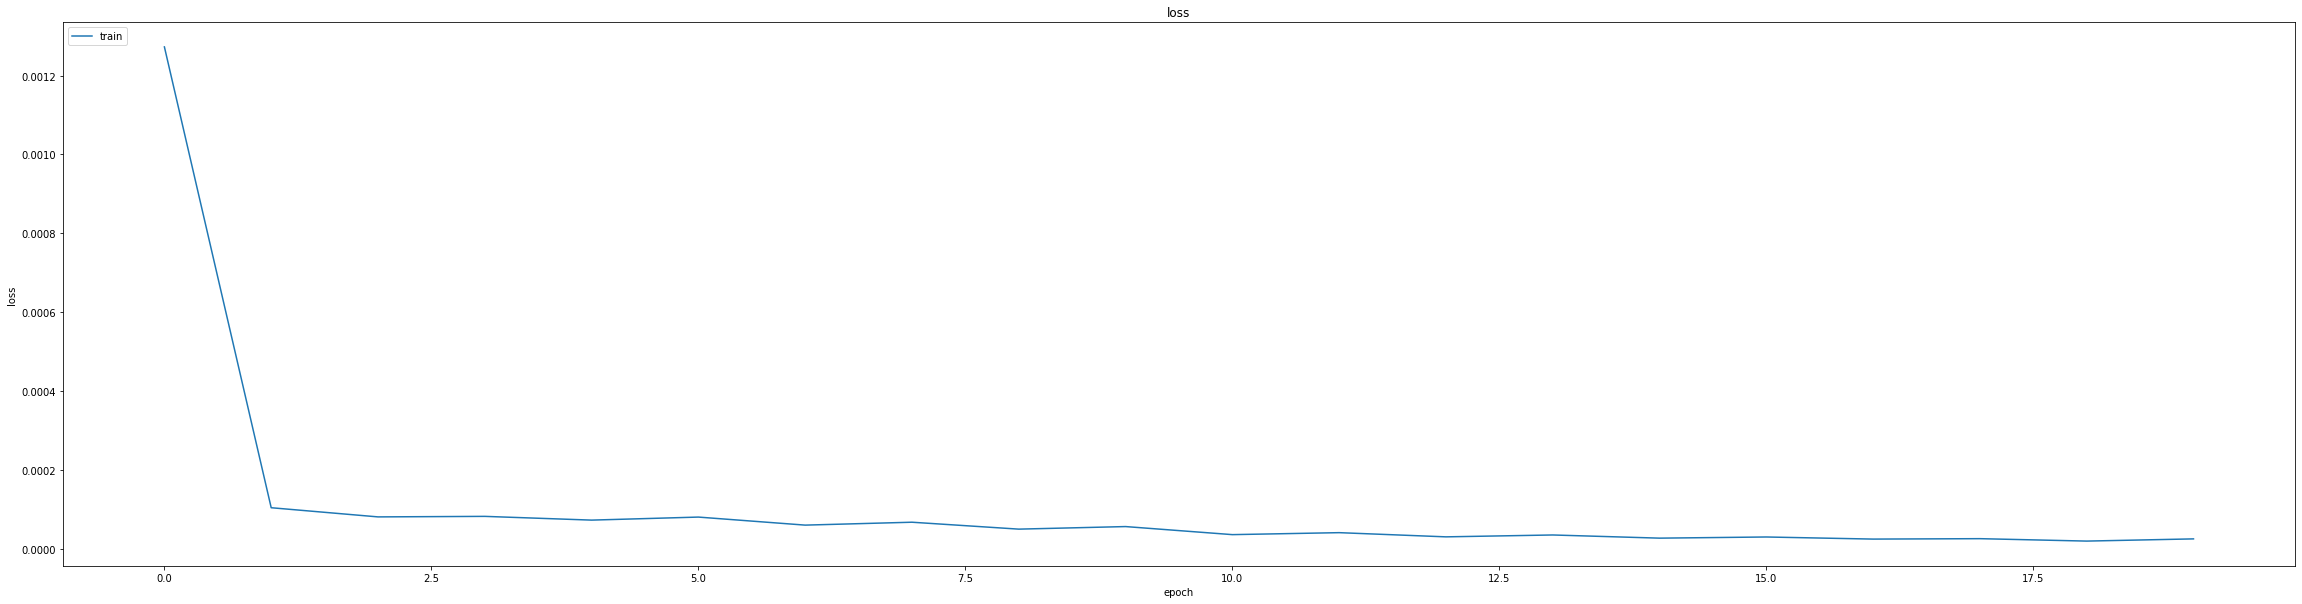

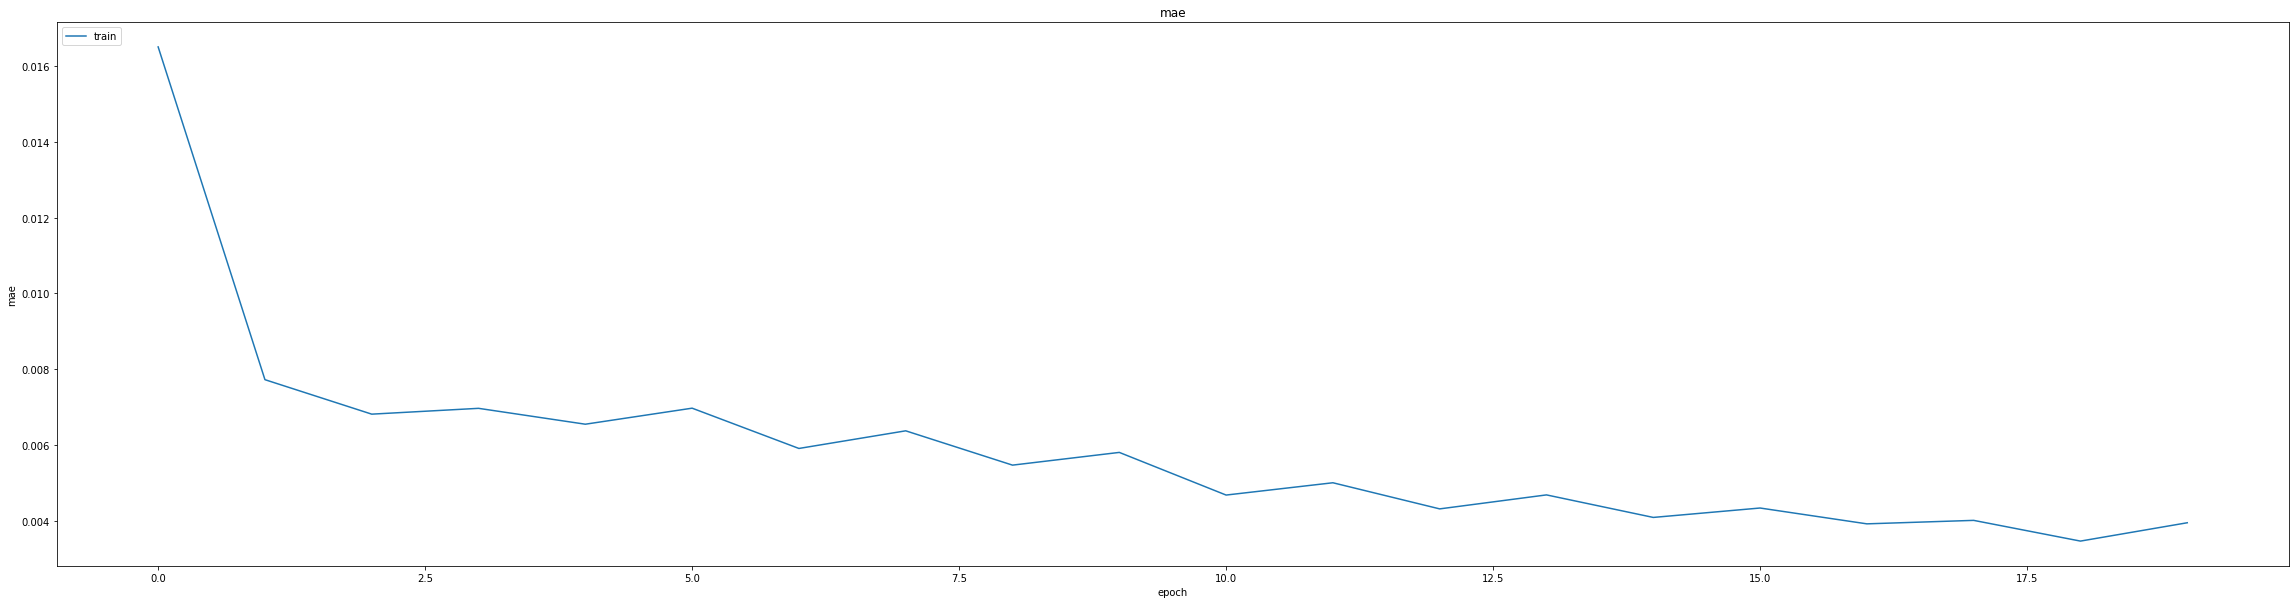

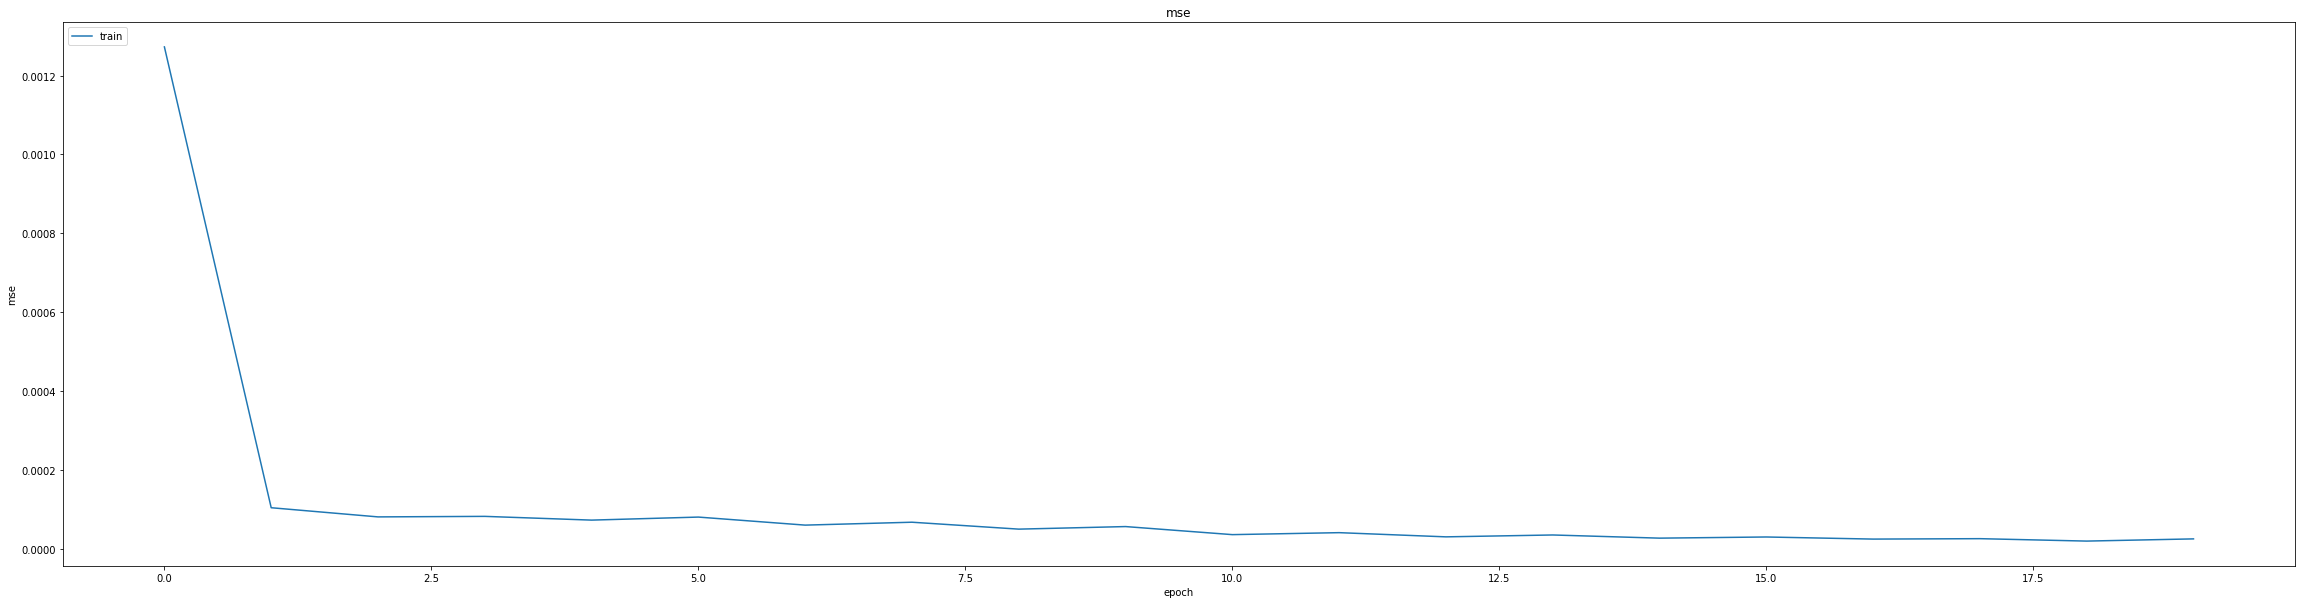

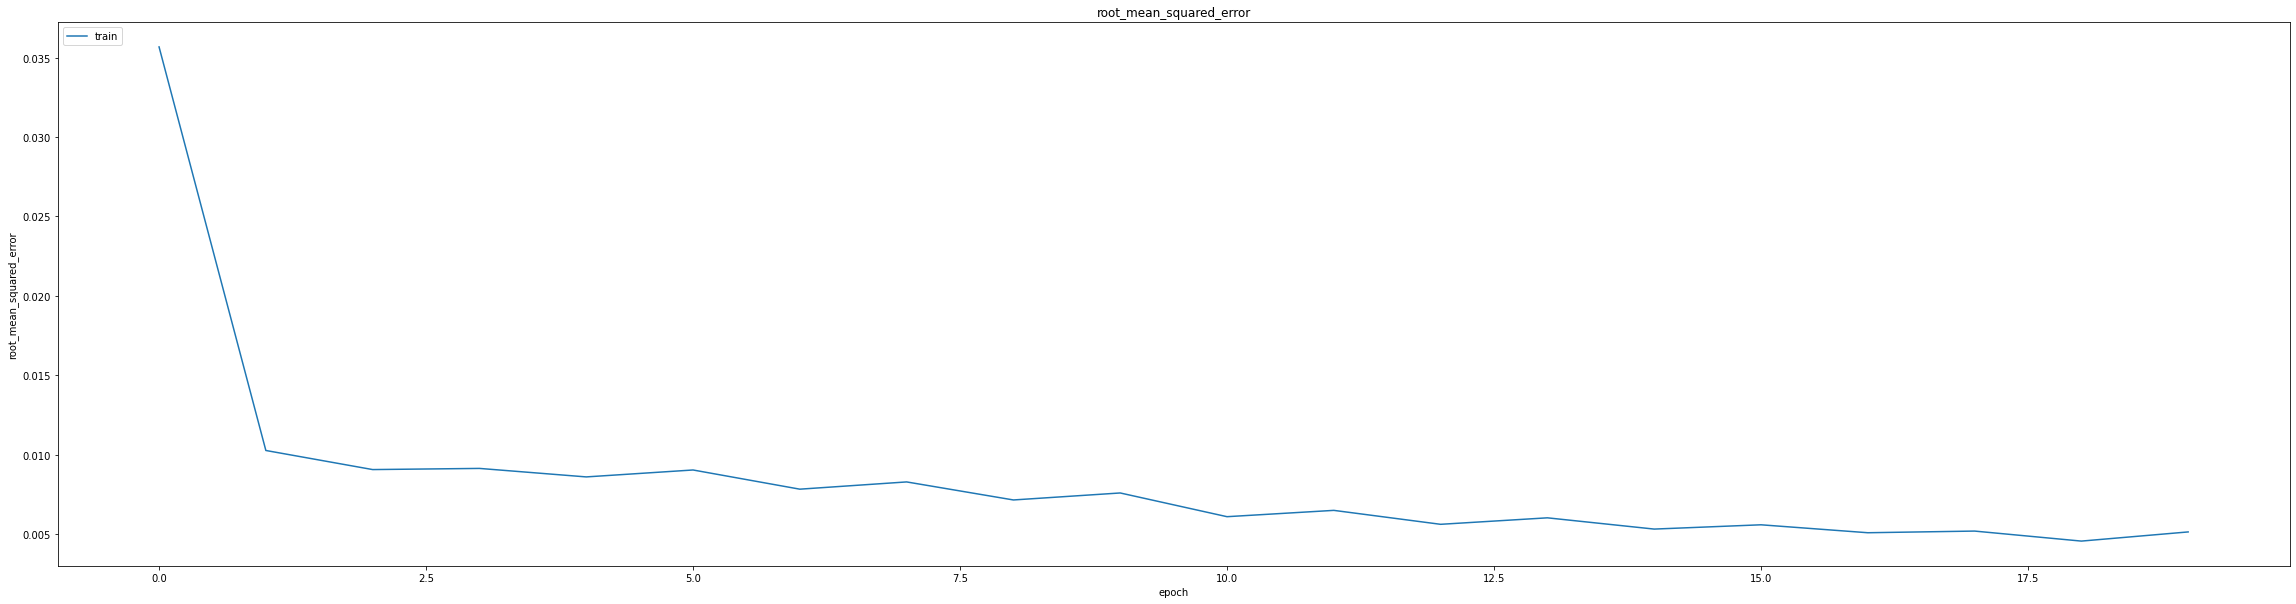

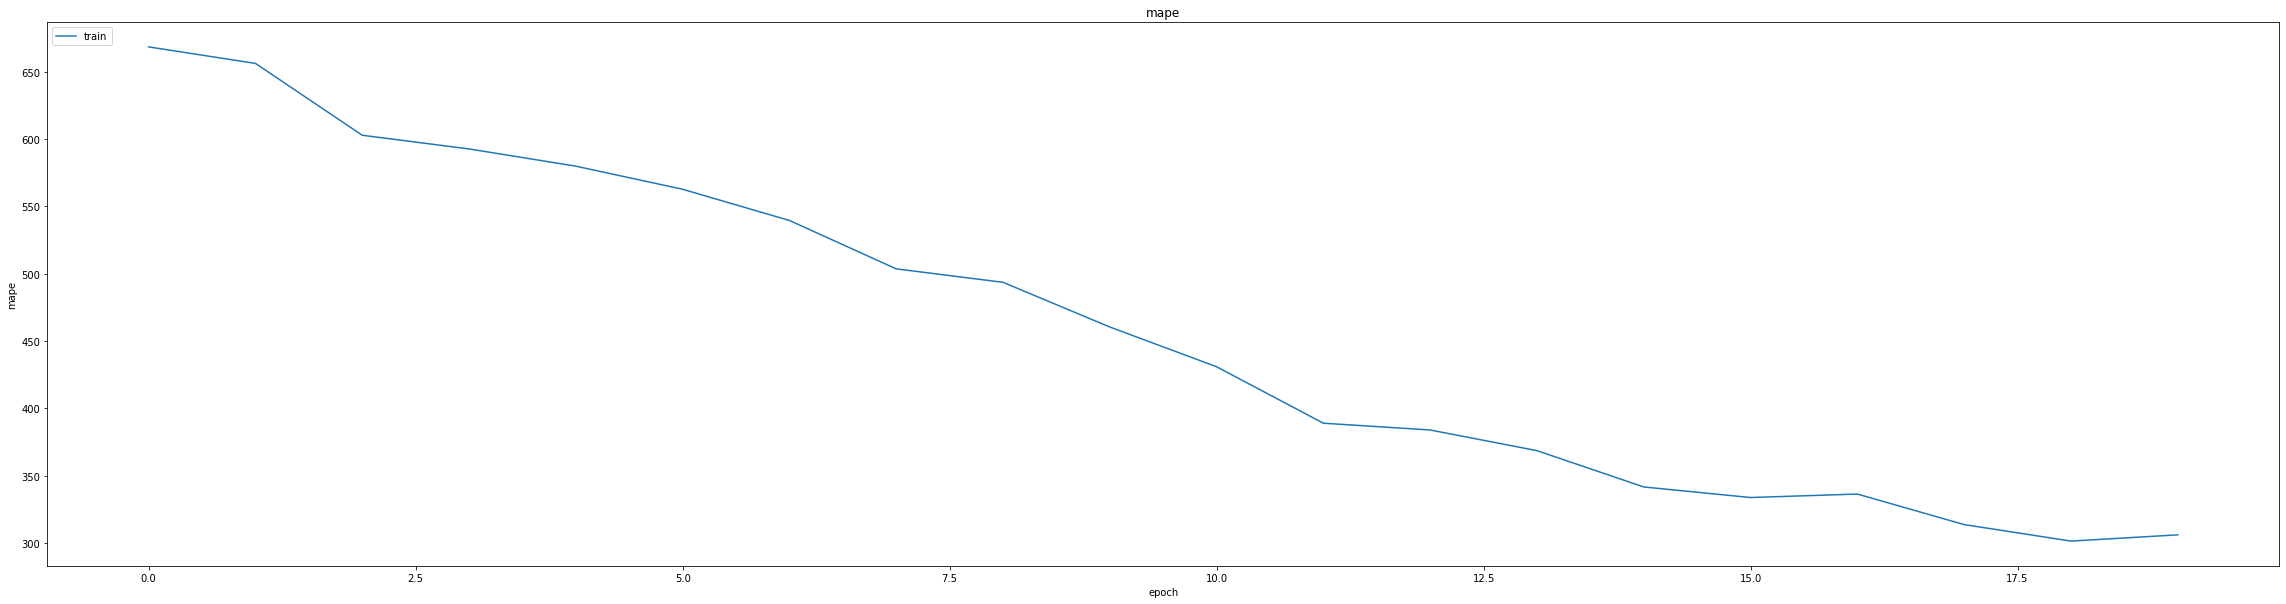

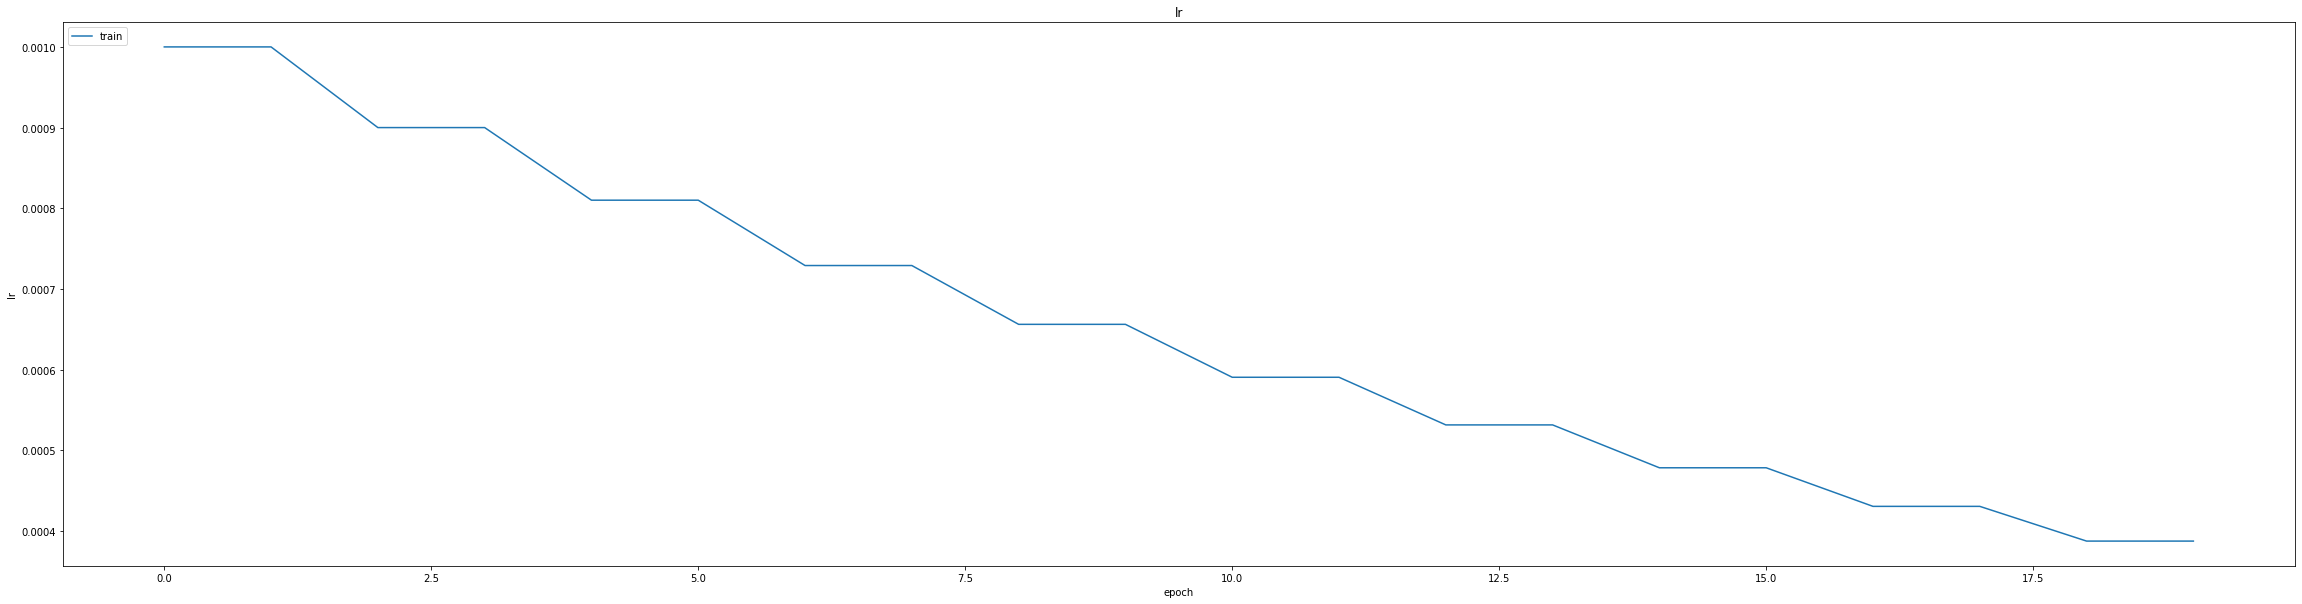

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0051104347221553326
0.0066006858833134174
1392/1392 [==============================] - 11s 7ms/step
0.9960876877857215


1392/1392 [==============================] - 9s 7ms/step


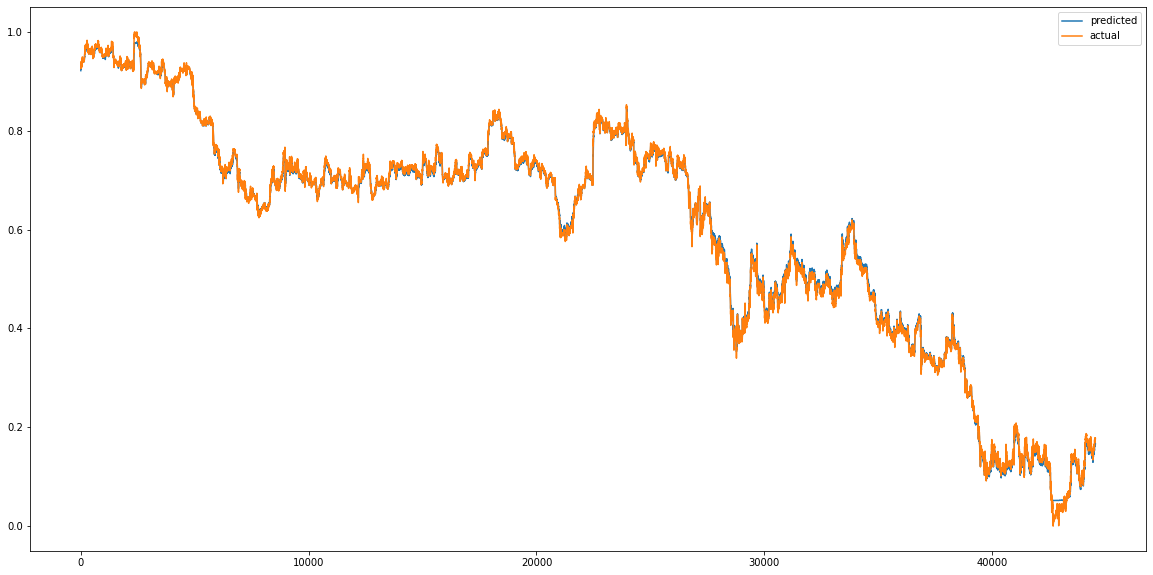

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


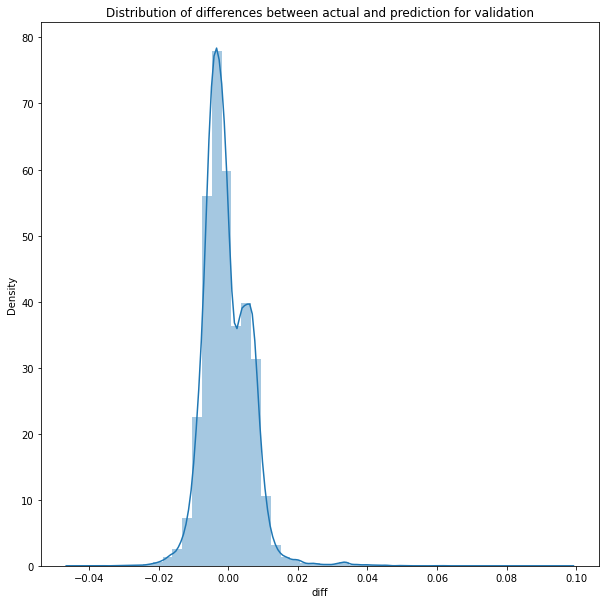

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 9s 7ms/step


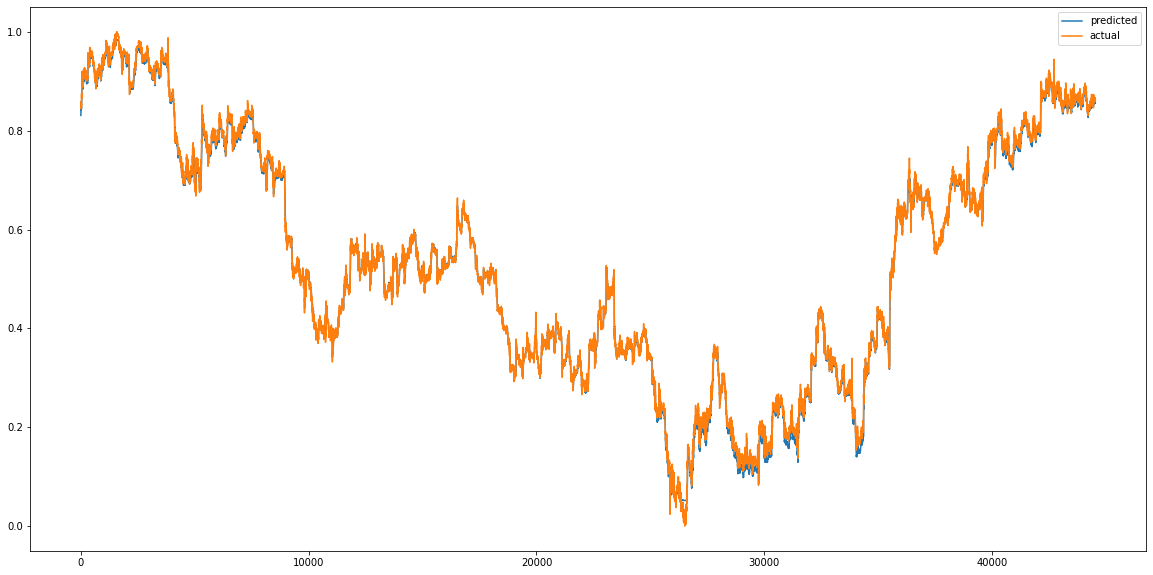

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


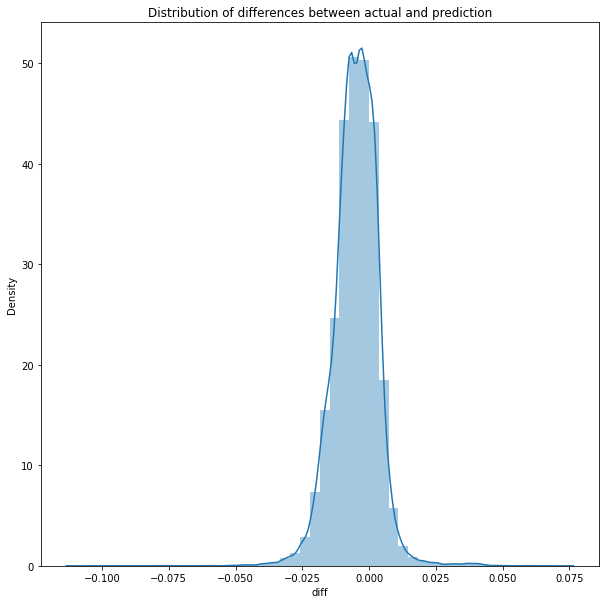

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  9.285979705422705e-05
RMSE :  0.009636378835134444
MAE :  0.007279759300958433
1392/1392 [==============================] - 9s 7ms/step
R2_Score  : 0.9984630529940871


count    44530.000000
mean        -0.004967
std          0.008258
min         -0.110524
25%         -0.009684
50%         -0.004619
75%          0.000345
max          0.073625
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_8 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_4 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_9 (LSTM)               (None, 16)                5184      
                                                                 
 dense_12 (Dense)            (None, 32)                544       
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
346/348 [============================>.] - ETA: 0s - loss: 1370.1531 - mae: 16.1396 - mse: 1370.1531 - root_mean_squared_error: 37.0156 - mape: 435166.7500
Epoch 1: val_mse improved from inf to 8.94946, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 22s 53ms/step - loss: 1365.7751 - mae: 16.0976 - mse: 1365.7751 - root_mean_squared_error: 36.9564 - mape: 433769.2812 - val_loss: 8.9495 - val_mae: 2.9820 - val_mse: 8.9495 - val_root_mean_squared_error: 2.9916 - val_mape: 81432.2500
Epoch 2/60
348/348 [==============================] - ETA: 0s - loss: 4.7732 - mae: 2.1198 - mse: 4.7732 - root_mean_squared_error: 2.1848 - mape: 23567.8789
Epoch 2: val_mse improved from 8.94946 to 2.11496, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 4.7732 - mae: 2.1198 - mse: 4.7732 - root_mean_squared_error: 2.1848 - mape: 23567.8789 - val_loss: 2.1150 - val_mae: 1.4345 - val_mse: 2.1150 - val_root_mean_squared_error: 1.4543 - val_mape: 46239.6719
Epoch 3/60
345/348 [============================>.] - ETA: 0s - loss: 1.4565 - mae: 1.1646 - mse: 1.4565 - root_mean_squared_error: 1.2069 - mape: 13850.4404
Epoch 3: val_mse improved from 2.11496 to 0.80272, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 1.4531 - mae: 1.1631 - mse: 1.4531 - root_mean_squared_error: 1.2055 - mape: 13767.7715 - val_loss: 0.8027 - val_mae: 0.8635 - val_mse: 0.8027 - val_root_mean_squared_error: 0.8959 - val_mape: 33253.7266
Epoch 4/60
348/348 [==============================] - ETA: 0s - loss: 0.6281 - mae: 0.7419 - mse: 0.6281 - root_mean_squared_error: 0.7926 - mape: 10577.7812
Epoch 4: val_mse improved from 0.80272 to 0.37686, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.6281 - mae: 0.7419 - mse: 0.6281 - root_mean_squared_error: 0.7926 - mape: 10577.7812 - val_loss: 0.3769 - val_mae: 0.5655 - val_mse: 0.3769 - val_root_mean_squared_error: 0.6139 - val_mape: 26476.6543
Epoch 5/60
345/348 [============================>.] - ETA: 0s - loss: 0.3260 - mae: 0.5044 - mse: 0.3260 - root_mean_squared_error: 0.5710 - mape: 7920.4272
Epoch 5: val_mse improved from 0.37686 to 0.20401, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.3255 - mae: 0.5039 - mse: 0.3255 - root_mean_squared_error: 0.5705 - mape: 7873.3320 - val_loss: 0.2040 - val_mae: 0.3834 - val_mse: 0.2040 - val_root_mean_squared_error: 0.4517 - val_mape: 22334.0879
Epoch 6/60
347/348 [============================>.] - ETA: 0s - loss: 0.1930 - mae: 0.3547 - mse: 0.1930 - root_mean_squared_error: 0.4394 - mape: 7147.3916
Epoch 6: val_mse improved from 0.20401 to 0.12561, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.1930 - mae: 0.3546 - mse: 0.1930 - root_mean_squared_error: 0.4393 - mape: 7145.0283 - val_loss: 0.1256 - val_mae: 0.2776 - val_mse: 0.1256 - val_root_mean_squared_error: 0.3544 - val_mape: 19572.4512
Epoch 7/60
346/348 [============================>.] - ETA: 0s - loss: 0.1295 - mae: 0.2710 - mse: 0.1295 - root_mean_squared_error: 0.3599 - mape: 7309.4980
Epoch 7: val_mse improved from 0.12561 to 0.08819, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.1294 - mae: 0.2709 - mse: 0.1294 - root_mean_squared_error: 0.3597 - mape: 7286.3062 - val_loss: 0.0882 - val_mae: 0.2164 - val_mse: 0.0882 - val_root_mean_squared_error: 0.2970 - val_mape: 17633.7520
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 0.0977 - mae: 0.2290 - mse: 0.0977 - root_mean_squared_error: 0.3126 - mape: 5575.7056
Epoch 8: val_mse improved from 0.08819 to 0.07019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0977 - mae: 0.2290 - mse: 0.0977 - root_mean_squared_error: 0.3125 - mape: 5573.8491 - val_loss: 0.0702 - val_mae: 0.1863 - val_mse: 0.0702 - val_root_mean_squared_error: 0.2649 - val_mape: 16231.9033
Epoch 9/60
347/348 [============================>.] - ETA: 0s - loss: 0.0815 - mae: 0.2094 - mse: 0.0815 - root_mean_squared_error: 0.2855 - mape: 5576.5112
Epoch 9: val_mse improved from 0.07019 to 0.06188, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0815 - mae: 0.2095 - mse: 0.0815 - root_mean_squared_error: 0.2855 - mape: 5574.7021 - val_loss: 0.0619 - val_mae: 0.1851 - val_mse: 0.0619 - val_root_mean_squared_error: 0.2488 - val_mape: 15212.2090
Epoch 10/60
346/348 [============================>.] - ETA: 0s - loss: 0.0734 - mae: 0.2048 - mse: 0.0734 - root_mean_squared_error: 0.2709 - mape: 4979.3276
Epoch 10: val_mse improved from 0.06188 to 0.05839, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0734 - mae: 0.2049 - mse: 0.0734 - root_mean_squared_error: 0.2709 - mape: 4963.6201 - val_loss: 0.0584 - val_mae: 0.1896 - val_mse: 0.0584 - val_root_mean_squared_error: 0.2416 - val_mape: 14470.0879
Epoch 11/60
347/348 [============================>.] - ETA: 0s - loss: 0.0696 - mae: 0.2071 - mse: 0.0696 - root_mean_squared_error: 0.2638 - mape: 4683.2896
Epoch 11: val_mse improved from 0.05839 to 0.05721, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0696 - mae: 0.2071 - mse: 0.0696 - root_mean_squared_error: 0.2638 - mape: 4681.7383 - val_loss: 0.0572 - val_mae: 0.1942 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2392 - val_mape: 13936.4473
Epoch 12/60
347/348 [============================>.] - ETA: 0s - loss: 0.0679 - mae: 0.2108 - mse: 0.0679 - root_mean_squared_error: 0.2605 - mape: 4837.2598
Epoch 12: val_mse improved from 0.05721 to 0.05705, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0679 - mae: 0.2108 - mse: 0.0679 - root_mean_squared_error: 0.2605 - mape: 4835.6592 - val_loss: 0.0570 - val_mae: 0.1978 - val_mse: 0.0570 - val_root_mean_squared_error: 0.2388 - val_mape: 13564.4619
Epoch 13/60
348/348 [==============================] - ETA: 0s - loss: 0.0672 - mae: 0.2141 - mse: 0.0672 - root_mean_squared_error: 0.2591 - mape: 4421.1157
Epoch 13: val_mse did not improve from 0.05705
348/348 [==============================] - 6s 17ms/step - loss: 0.0672 - mae: 0.2141 - mse: 0.0672 - root_mean_squared_error: 0.2591 - mape: 4421.1157 - val_loss: 0.0572 - val_mae: 0.2003 - val_mse: 0.0572 - val_root_mean_squared_error: 0.2392 - val_mape: 13324.9062
Epoch 14/60
346/348 [============================>.] - ETA: 0s - loss: 0.0669 - mae: 0.2164 - mse: 0.0669 - root_mean_squared_error: 0.2587 - mape: 4442.4126
Epoch 14: val_mse did not improve from 0.05705
348/348 [==============================] - 6s 16ms/step

348/348 [==============================] - 17s 50ms/step - loss: 0.0662 - mae: 0.2179 - mse: 0.0662 - root_mean_squared_error: 0.2574 - mape: 4370.9238 - val_loss: 0.0567 - val_mae: 0.2008 - val_mse: 0.0567 - val_root_mean_squared_error: 0.2381 - val_mape: 13057.7949
Epoch 42/60
347/348 [============================>.] - ETA: 0s - loss: 0.0181 - mae: 0.0978 - mse: 0.0181 - root_mean_squared_error: 0.1344 - mape: 1519.4808
Epoch 42: val_mse improved from 0.05671 to 0.00245, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 50ms/step - loss: 0.0181 - mae: 0.0978 - mse: 0.0181 - root_mean_squared_error: 0.1344 - mape: 1518.9797 - val_loss: 0.0025 - val_mae: 0.0384 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0495 - val_mape: 4598.9219
Epoch 43/60
347/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0412 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 1329.7279
Epoch 43: val_mse improved from 0.00245 to 0.00194, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0027 - mae: 0.0412 - mse: 0.0027 - root_mean_squared_error: 0.0523 - mape: 1329.2898 - val_loss: 0.0019 - val_mae: 0.0386 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 3770.7788
Epoch 44/60
348/348 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1230.3561
Epoch 44: val_mse improved from 0.00194 to 0.00131, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0434 - mape: 1230.3561 - val_loss: 0.0013 - val_mae: 0.0305 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 3458.1890
Epoch 45/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1126.1266
Epoch 45: val_mse improved from 0.00131 to 0.00126, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 1125.7496 - val_loss: 0.0013 - val_mae: 0.0311 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0354 - val_mape: 3240.6689
Epoch 46/60
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 1038.9060
Epoch 46: val_mse improved from 0.00126 to 0.00066, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0011 - mae: 0.0262 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 1038.9060 - val_loss: 6.5774e-04 - val_mae: 0.0197 - val_mse: 6.5774e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 3033.2539
Epoch 47/60
347/348 [============================>.] - ETA: 0s - loss: 9.4611e-04 - mae: 0.0241 - mse: 9.4611e-04 - root_mean_squared_error: 0.0308 - mape: 1046.4436
Epoch 47: val_mse improved from 0.00066 to 0.00054, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 9.4611e-04 - mae: 0.0241 - mse: 9.4611e-04 - root_mean_squared_error: 0.0308 - mape: 1046.0939 - val_loss: 5.3853e-04 - val_mae: 0.0182 - val_mse: 5.3853e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 2887.0491
Epoch 48/60
348/348 [==============================] - ETA: 0s - loss: 7.9706e-04 - mae: 0.0220 - mse: 7.9706e-04 - root_mean_squared_error: 0.0282 - mape: 947.4454
Epoch 48: val_mse did not improve from 0.00054
348/348 [==============================] - 6s 17ms/step - loss: 7.9706e-04 - mae: 0.0220 - mse: 7.9706e-04 - root_mean_squared_error: 0.0282 - mape: 947.4454 - val_loss: 8.5541e-04 - val_mae: 0.0252 - val_mse: 8.5541e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 2766.8027
Epoch 49/60
347/348 [============================>.] - ETA: 0s - loss: 6.6211e-04 - mae: 0.0200 - mse: 6.6211e-04 - root_mean_squared_error: 0.0257 - mape: 921.6725
Epoch 49: val_mse improved from 0.00054 to 0.00046, saving 

348/348 [==============================] - 16s 46ms/step - loss: 6.6211e-04 - mae: 0.0200 - mse: 6.6211e-04 - root_mean_squared_error: 0.0257 - mape: 921.3654 - val_loss: 4.6040e-04 - val_mae: 0.0168 - val_mse: 4.6040e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 2665.9485
Epoch 50/60
348/348 [==============================] - ETA: 0s - loss: 6.0864e-04 - mae: 0.0192 - mse: 6.0864e-04 - root_mean_squared_error: 0.0247 - mape: 895.8737
Epoch 50: val_mse did not improve from 0.00046
348/348 [==============================] - 6s 17ms/step - loss: 6.0864e-04 - mae: 0.0192 - mse: 6.0864e-04 - root_mean_squared_error: 0.0247 - mape: 895.8737 - val_loss: 5.1792e-04 - val_mae: 0.0187 - val_mse: 5.1792e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 2590.1602
Epoch 51/60
348/348 [==============================] - ETA: 0s - loss: 4.9774e-04 - mae: 0.0174 - mse: 4.9774e-04 - root_mean_squared_error: 0.0223 - mape: 847.2366
Epoch 51: val_mse improved from 0.00046 to 0.00043, saving m

348/348 [==============================] - 17s 49ms/step - loss: 4.9774e-04 - mae: 0.0174 - mse: 4.9774e-04 - root_mean_squared_error: 0.0223 - mape: 847.2366 - val_loss: 4.3217e-04 - val_mae: 0.0167 - val_mse: 4.3217e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2504.6646
Epoch 52/60
348/348 [==============================] - ETA: 0s - loss: 4.2087e-04 - mae: 0.0159 - mse: 4.2087e-04 - root_mean_squared_error: 0.0205 - mape: 862.8468
Epoch 52: val_mse improved from 0.00043 to 0.00026, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 4.2087e-04 - mae: 0.0159 - mse: 4.2087e-04 - root_mean_squared_error: 0.0205 - mape: 862.8468 - val_loss: 2.5524e-04 - val_mae: 0.0106 - val_mse: 2.5524e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 2435.8411
Epoch 53/60
345/348 [============================>.] - ETA: 0s - loss: 3.7446e-04 - mae: 0.0150 - mse: 3.7446e-04 - root_mean_squared_error: 0.0194 - mape: 826.6702
Epoch 53: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 3.7456e-04 - mae: 0.0150 - mse: 3.7456e-04 - root_mean_squared_error: 0.0194 - mape: 821.6528 - val_loss: 2.4237e-04 - val_mae: 0.0105 - val_mse: 2.4237e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 2368.1782
Epoch 54/60
345/348 [============================>.] - ETA: 0s - loss: 3.4239e-04 - mae: 0.0143 - mse: 3.4239e-04 - root_mean_squared_error: 0.0185 - mape: 769.4837
Epoch 54: val_mse improved from 0.00024 to 0.00021, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 3.4255e-04 - mae: 0.0143 - mse: 3.4255e-04 - root_mean_squared_error: 0.0185 - mape: 764.8142 - val_loss: 2.0761e-04 - val_mae: 0.0090 - val_mse: 2.0761e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2296.3750
Epoch 55/60
347/348 [============================>.] - ETA: 0s - loss: 2.9533e-04 - mae: 0.0133 - mse: 2.9533e-04 - root_mean_squared_error: 0.0172 - mape: 758.6979
Epoch 55: val_mse did not improve from 0.00021
348/348 [==============================] - 6s 17ms/step - loss: 2.9529e-04 - mae: 0.0133 - mse: 2.9529e-04 - root_mean_squared_error: 0.0172 - mape: 758.4435 - val_loss: 2.9426e-04 - val_mae: 0.0131 - val_mse: 2.9426e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 2231.4014
Epoch 56/60
346/348 [============================>.] - ETA: 0s - loss: 2.4816e-04 - mae: 0.0121 - mse: 2.4816e-04 - root_mean_squared_error: 0.0158 - mape: 739.9604
Epoch 56: val_mse did not improve from 0.00021
348/348 [====

348/348 [==============================] - 17s 49ms/step - loss: 2.1960e-04 - mae: 0.0114 - mse: 2.1960e-04 - root_mean_squared_error: 0.0148 - mape: 693.7028 - val_loss: 1.6781e-04 - val_mae: 0.0083 - val_mse: 1.6781e-04 - val_root_mean_squared_error: 0.0130 - val_mape: 2037.0333
Epoch 60/60
345/348 [============================>.] - ETA: 0s - loss: 2.1387e-04 - mae: 0.0113 - mse: 2.1387e-04 - root_mean_squared_error: 0.0146 - mape: 664.0569
Epoch 60: val_mse did not improve from 0.00017
348/348 [==============================] - 6s 16ms/step - loss: 2.1351e-04 - mae: 0.0113 - mse: 2.1351e-04 - root_mean_squared_error: 0.0146 - mape: 660.0284 - val_loss: 1.7509e-04 - val_mae: 0.0086 - val_mse: 1.7509e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 1988.7324


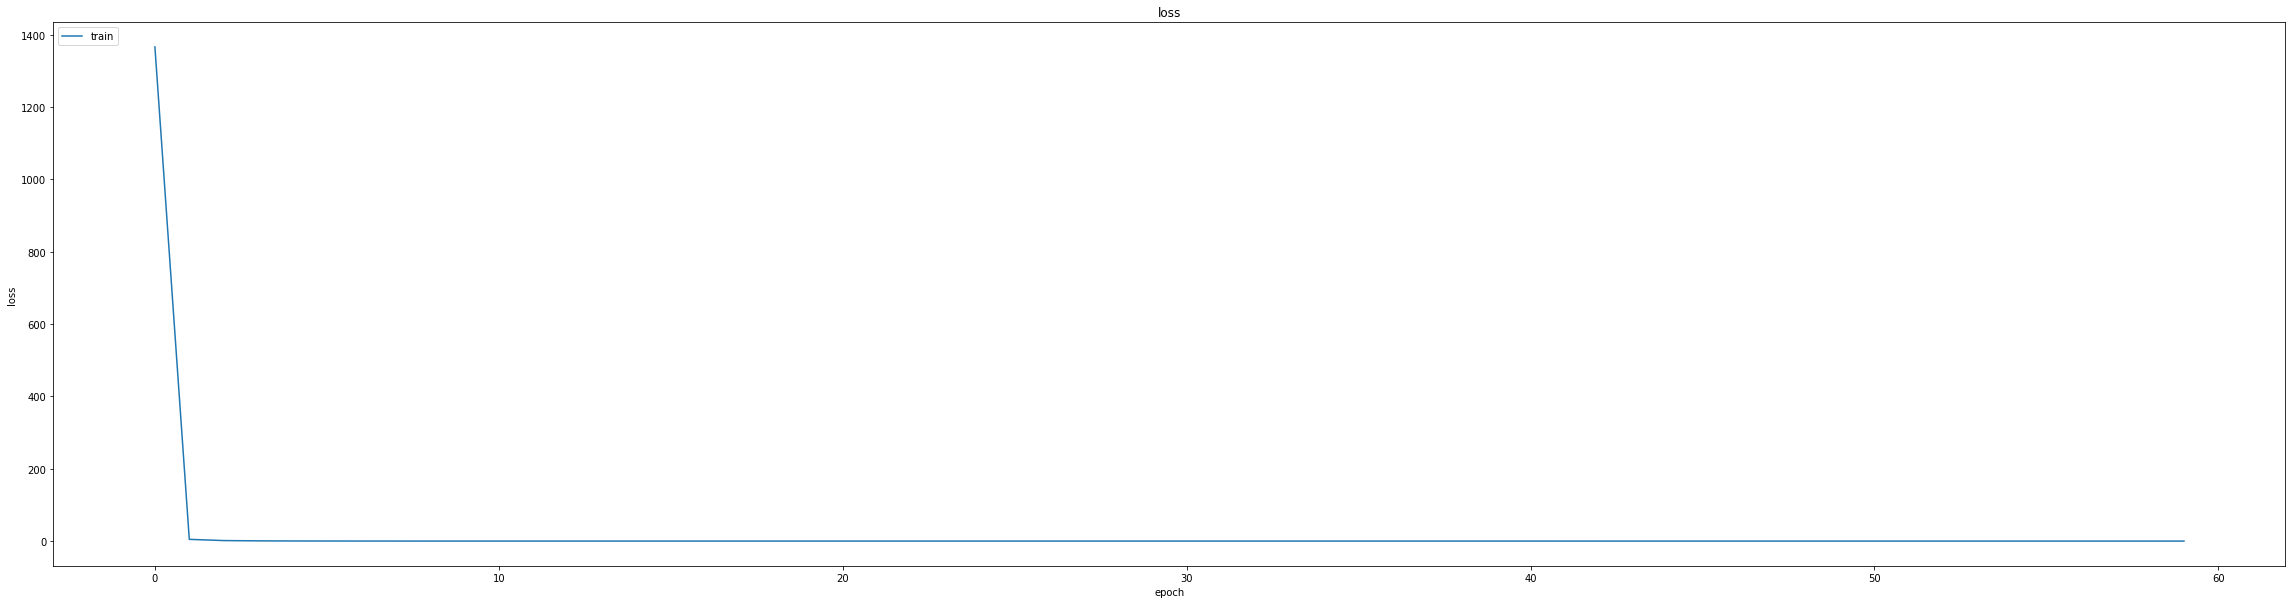

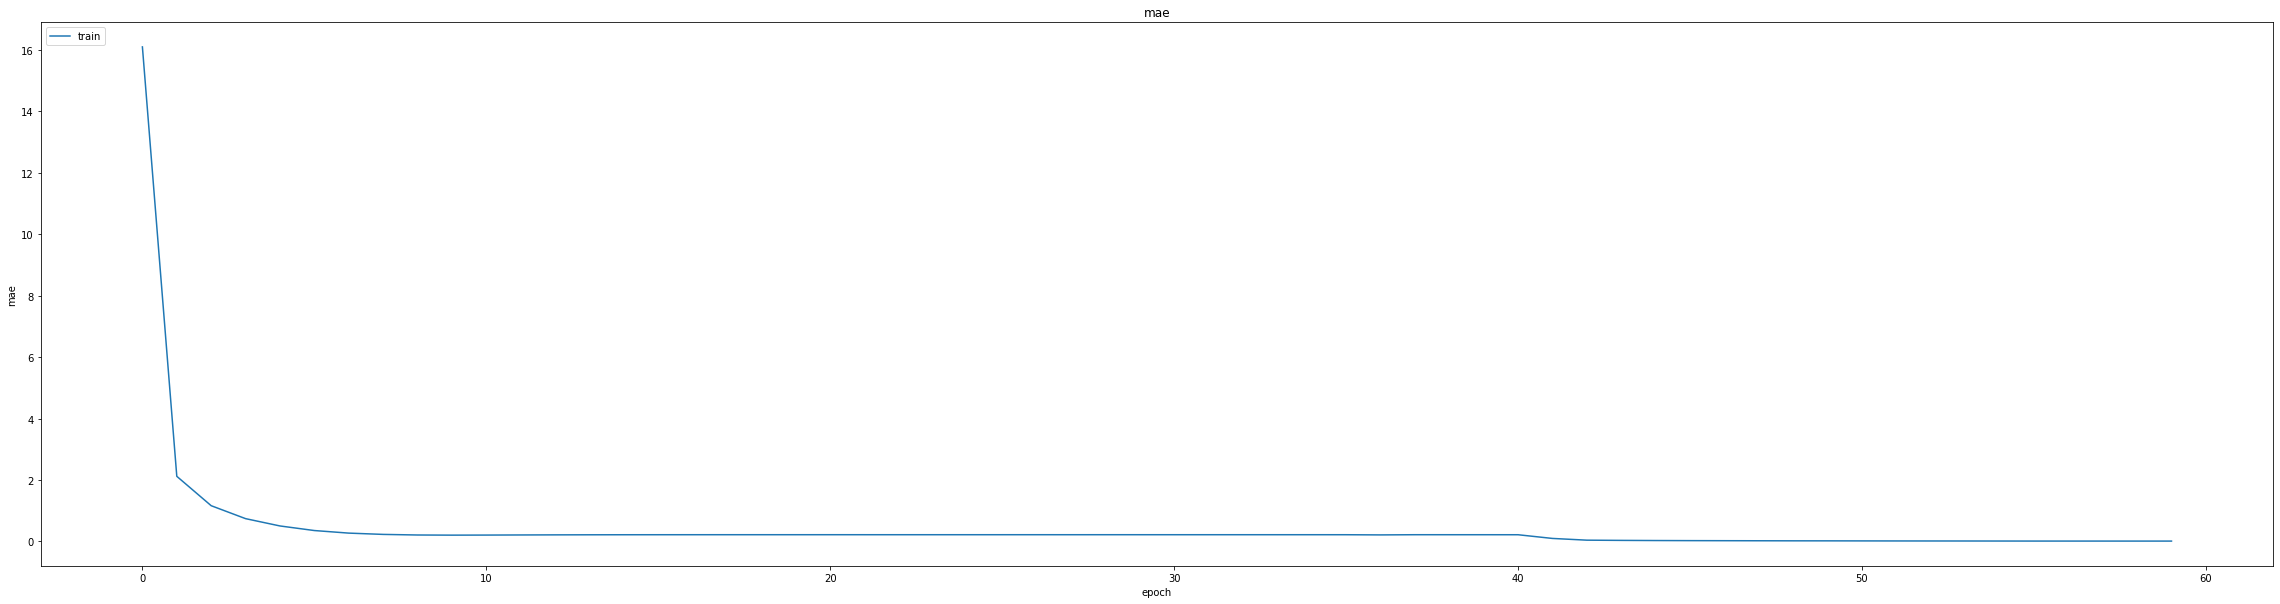

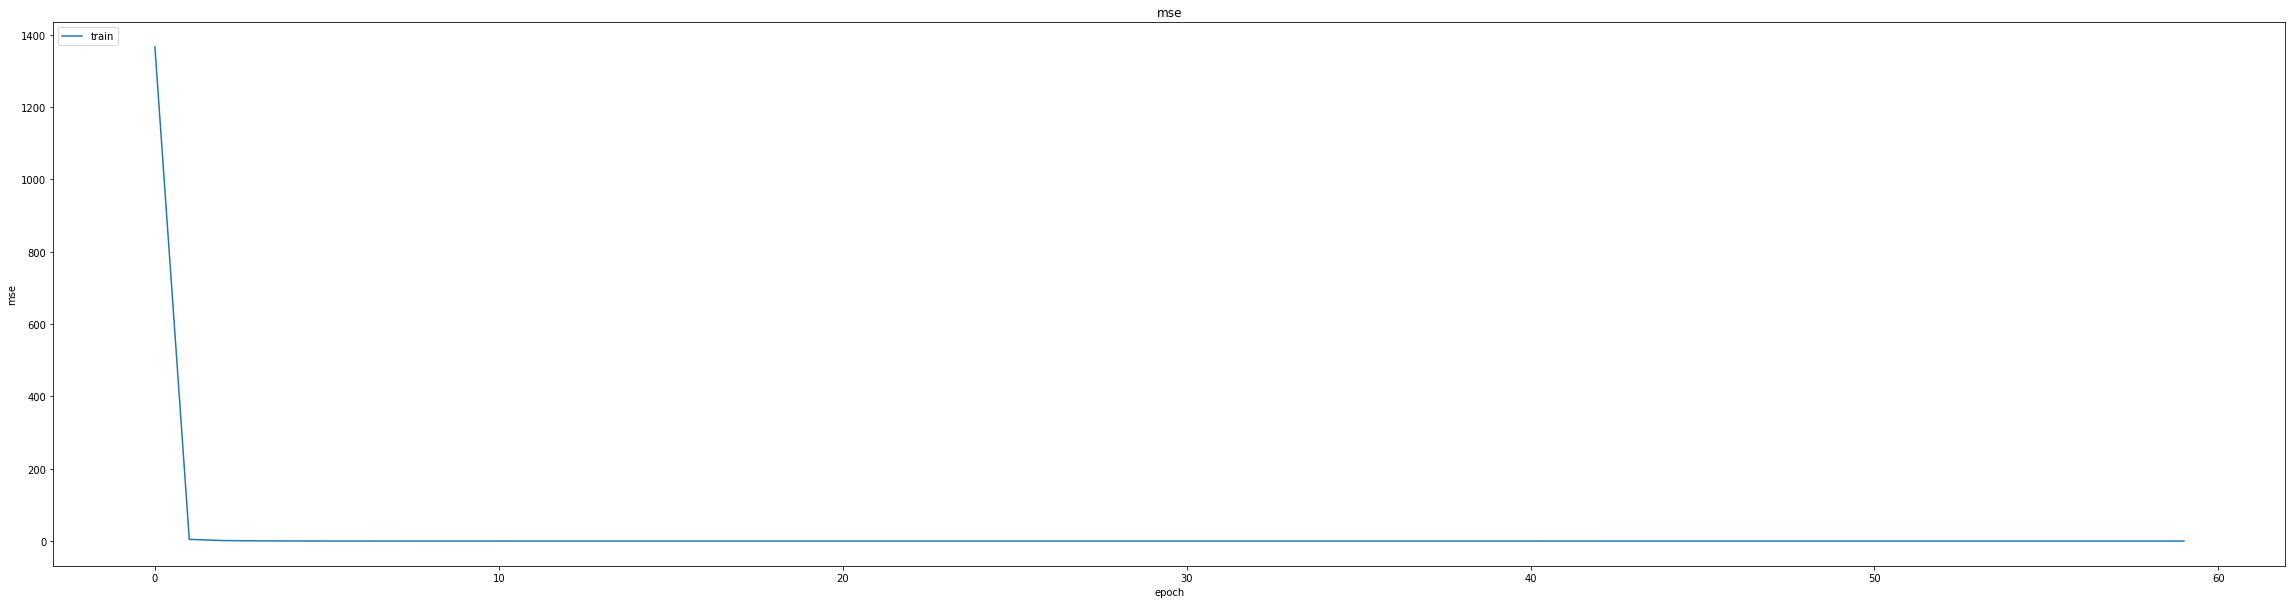

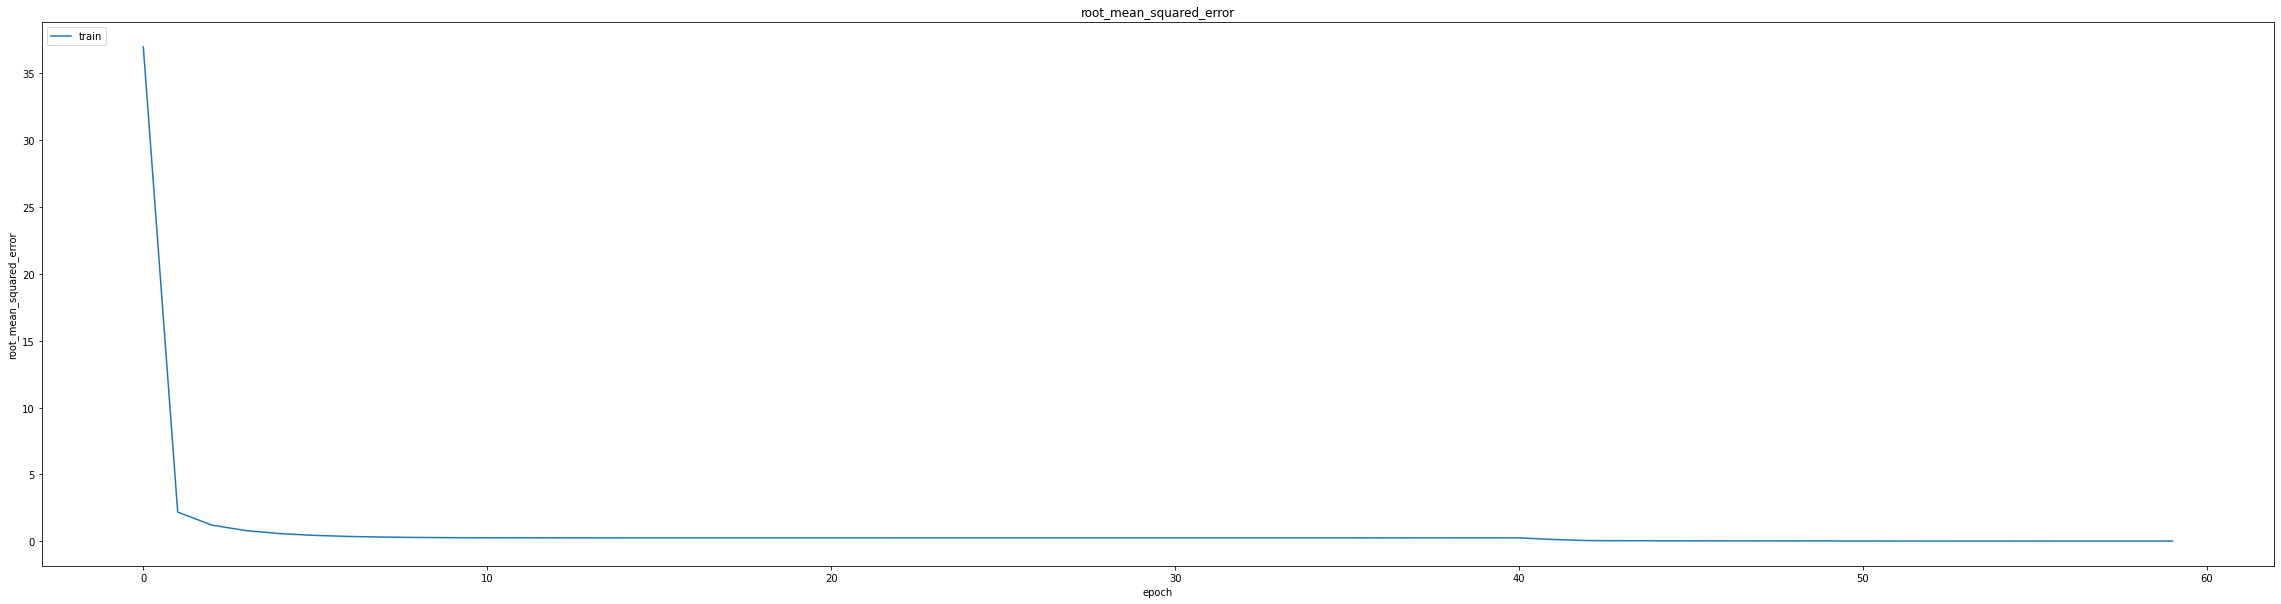

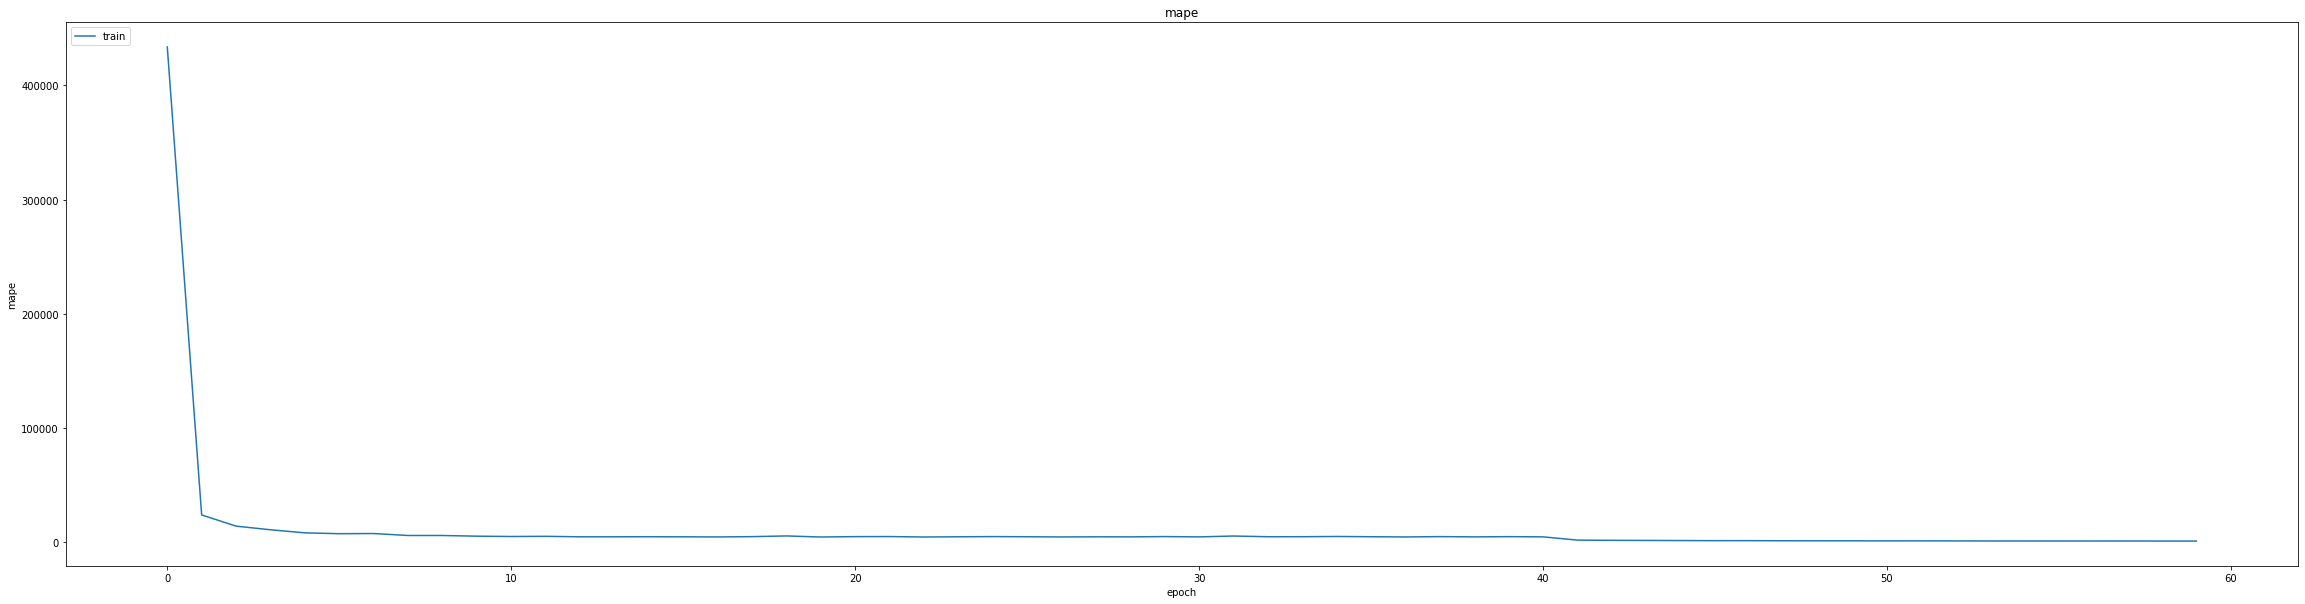

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008318174630403519
0.012954086065292358
1392/1392 [==============================] - 6s 4ms/step
0.9969298164750634


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0173 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 737.1873
Epoch 1: val_mse did not improve from 0.00017
348/348 [==============================] - 11s 20ms/step - loss: 0.0013 - mae: 0.0173 - mse: 0.0013 - root_mean_squared_error: 0.0356 - mape: 736.9397 - val_loss: 1.8413e-04 - val_mae: 0.0090 - val_mse: 1.8413e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 2020.9309 - lr: 0.0010
Epoch 2/20
348/348 [==============================] - ETA: 0s - loss: 1.4131e-04 - mae: 0.0092 - mse: 1.4131e-04 - root_mean_squared_error: 0.0119 - mape: 651.2684
Epoch 2: val_mse did not improve from 0.00017
348/348 [==============================] - 6s 16ms/step - loss: 1.4131e-04 - mae: 0.0092 - mse: 1.4131e-04 - root_mean_squared_error: 0.0119 - mape: 651.2684 - val_loss: 2.2124e-04 - val_mae: 0.0123 - val_mse: 2.2124e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 1117.0120 - lr: 0.0010
lr chan

348/348 [==============================] - 17s 48ms/step - loss: 7.7822e-05 - mae: 0.0067 - mse: 7.7822e-05 - root_mean_squared_error: 0.0088 - mape: 227.1572 - val_loss: 1.4692e-04 - val_mae: 0.0096 - val_mse: 1.4692e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 832.0486 - lr: 5.9049e-04
Epoch 12/20
345/348 [============================>.] - ETA: 0s - loss: 7.9719e-05 - mae: 0.0068 - mse: 7.9719e-05 - root_mean_squared_error: 0.0089 - mape: 269.5926
Epoch 12: val_mse did not improve from 0.00015
348/348 [==============================] - 6s 16ms/step - loss: 7.9620e-05 - mae: 0.0068 - mse: 7.9620e-05 - root_mean_squared_error: 0.0089 - mape: 267.9589 - val_loss: 1.5594e-04 - val_mae: 0.0101 - val_mse: 1.5594e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 771.5978 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
345/348 [============================>.] - ETA: 0s - loss: 6.9856e-05 - mae: 0.0064 - mse: 6.9856e-05 - root_mean_squared_error: 0.0084 - mape: 2

348/348 [==============================] - 16s 46ms/step - loss: 6.9805e-05 - mae: 0.0064 - mse: 6.9805e-05 - root_mean_squared_error: 0.0084 - mape: 215.2368 - val_loss: 1.0292e-04 - val_mae: 0.0074 - val_mse: 1.0292e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 607.4219 - lr: 5.3144e-04
Epoch 14/20
348/348 [==============================] - ETA: 0s - loss: 7.1971e-05 - mae: 0.0064 - mse: 7.1971e-05 - root_mean_squared_error: 0.0085 - mape: 221.5163
Epoch 14: val_mse improved from 0.00010 to 0.00009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 7.1971e-05 - mae: 0.0064 - mse: 7.1971e-05 - root_mean_squared_error: 0.0085 - mape: 221.5163 - val_loss: 9.0043e-05 - val_mae: 0.0068 - val_mse: 9.0043e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 774.4978 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/20
346/348 [============================>.] - ETA: 0s - loss: 5.9803e-05 - mae: 0.0058 - mse: 5.9803e-05 - root_mean_squared_error: 0.0077 - mape: 177.4361
Epoch 15: val_mse improved from 0.00009 to 0.00009, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)


348/348 [==============================] - 18s 52ms/step - loss: 5.9778e-05 - mae: 0.0058 - mse: 5.9778e-05 - root_mean_squared_error: 0.0077 - mape: 176.8696 - val_loss: 8.9658e-05 - val_mae: 0.0070 - val_mse: 8.9658e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 608.6672 - lr: 4.7830e-04
Epoch 16/20
345/348 [============================>.] - ETA: 0s - loss: 6.0880e-05 - mae: 0.0059 - mse: 6.0880e-05 - root_mean_squared_error: 0.0078 - mape: 210.6525
Epoch 16: val_mse did not improve from 0.00009
348/348 [==============================] - 6s 16ms/step - loss: 6.0870e-05 - mae: 0.0059 - mse: 6.0870e-05 - root_mean_squared_error: 0.0078 - mape: 209.3764 - val_loss: 2.3806e-04 - val_mae: 0.0137 - val_mse: 2.3806e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 589.8383 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/20
346/348 [============================>.] - ETA: 0s - loss: 5.4065e-05 - mae: 0.0056 - mse: 5.4065e-05 - root_mean_squared_error: 0.0074 - mape: 1

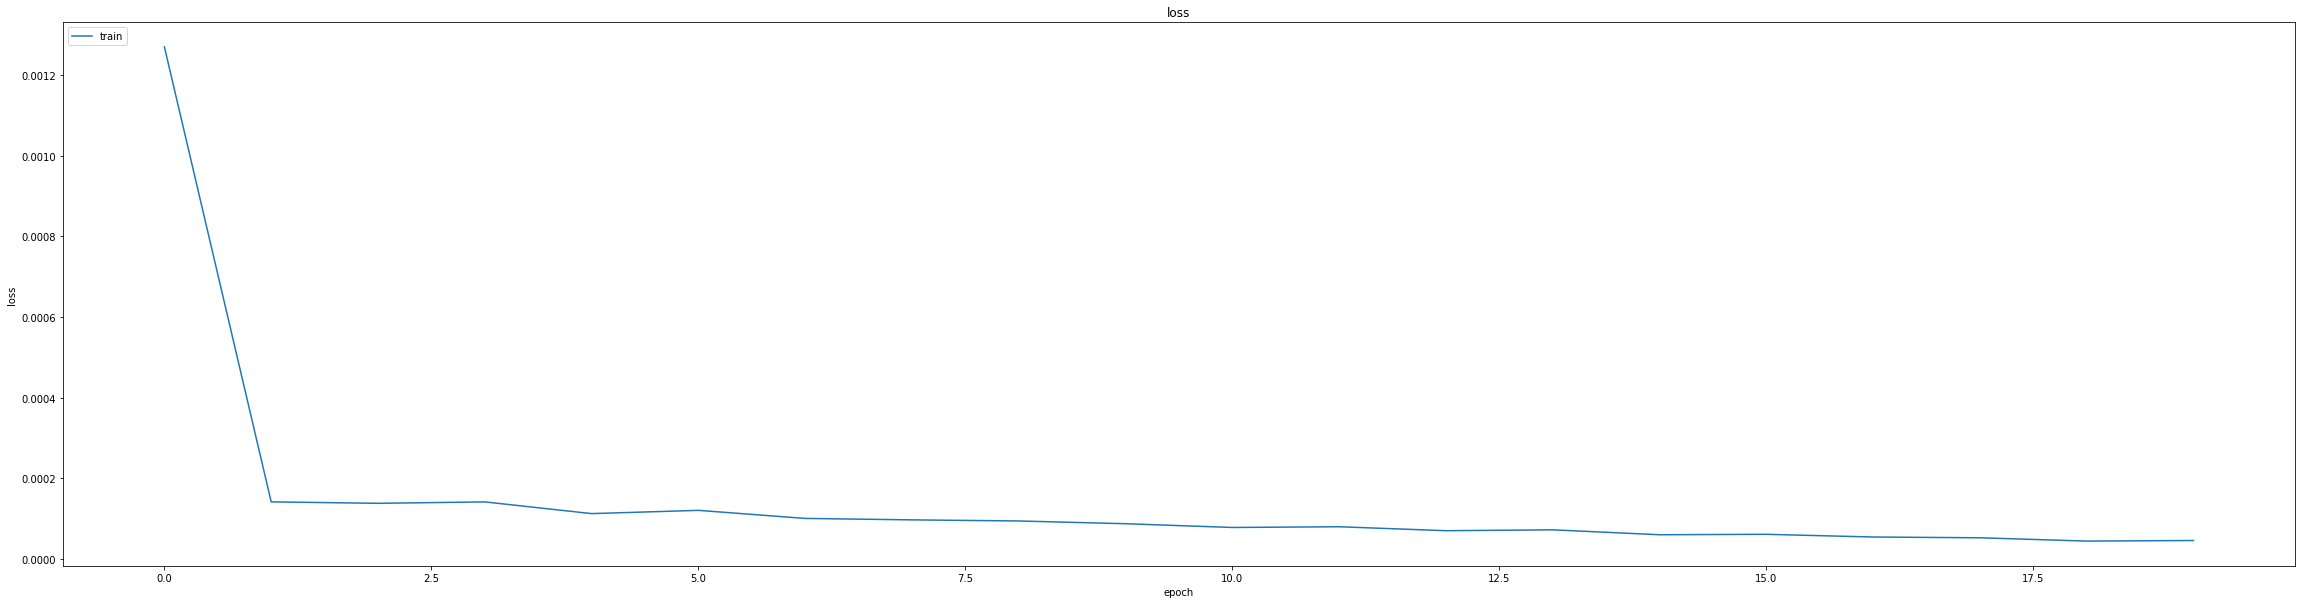

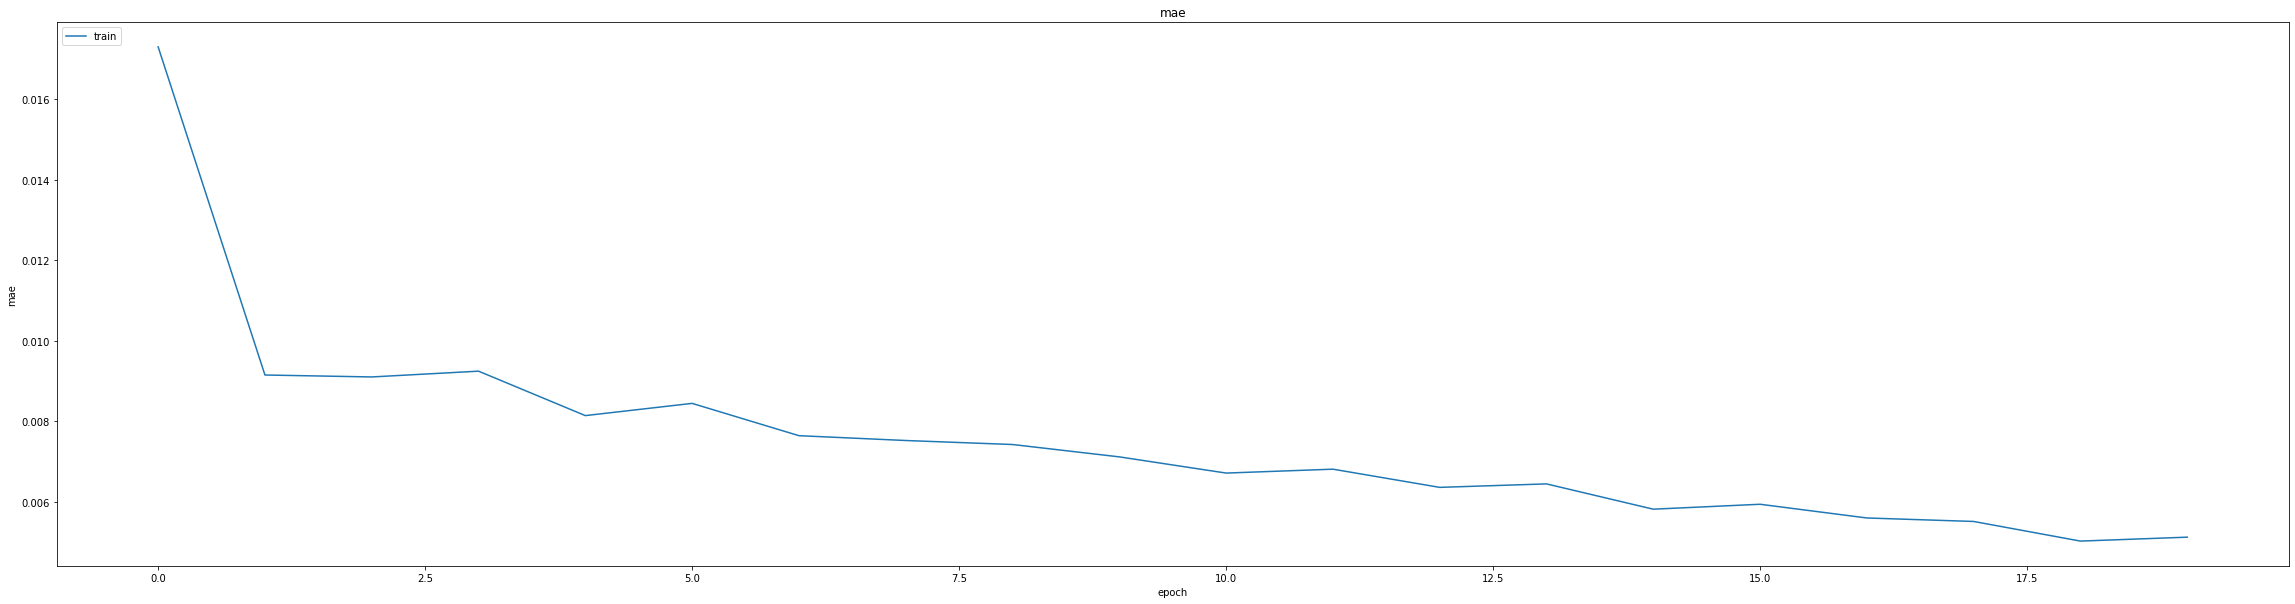

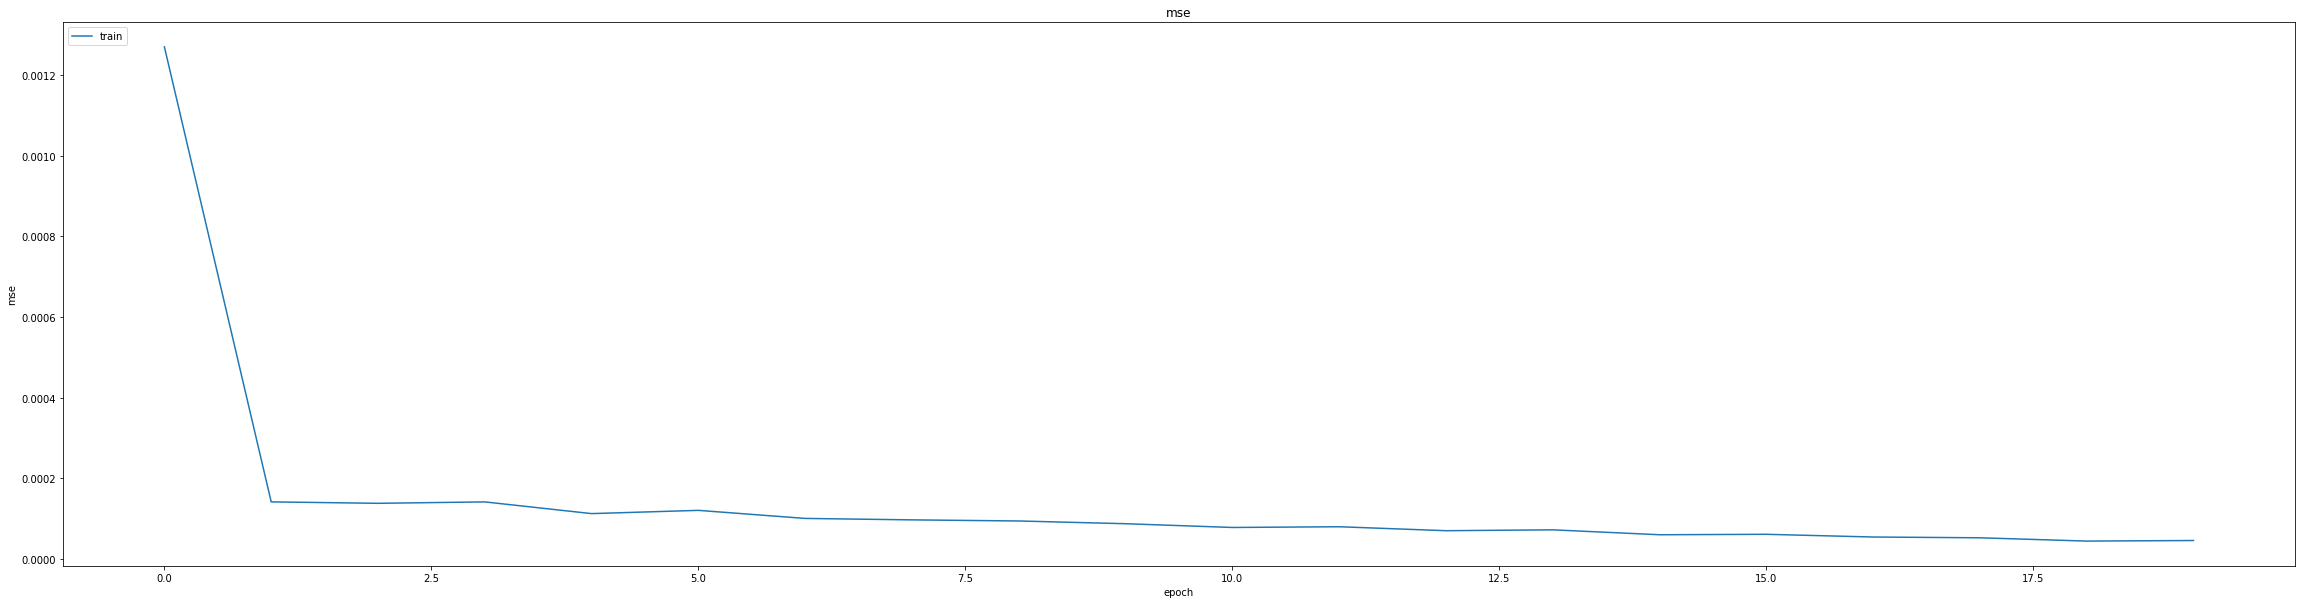

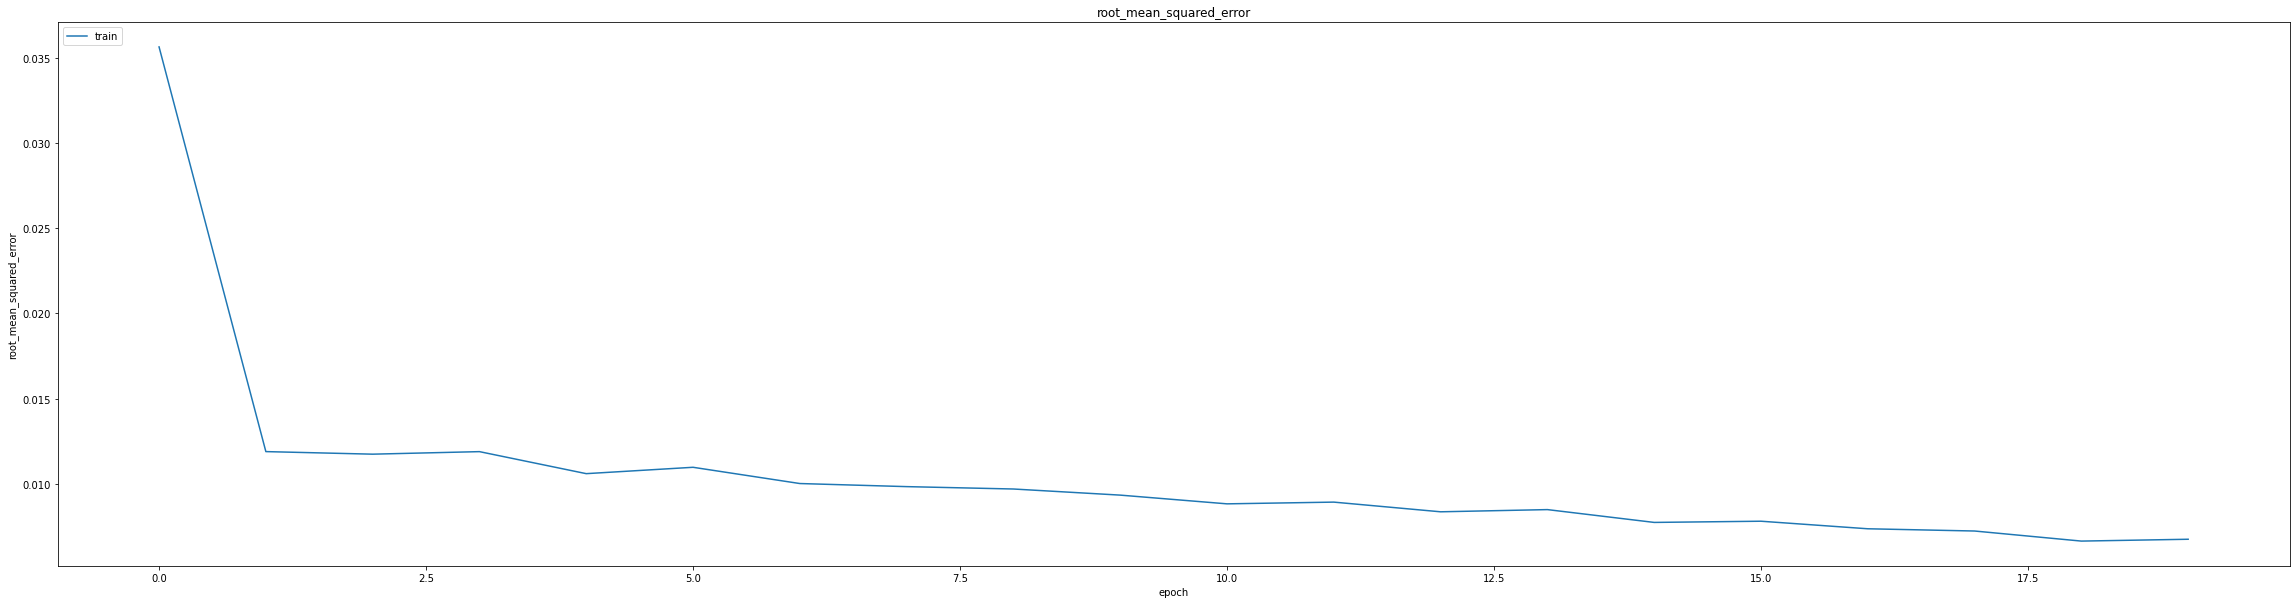

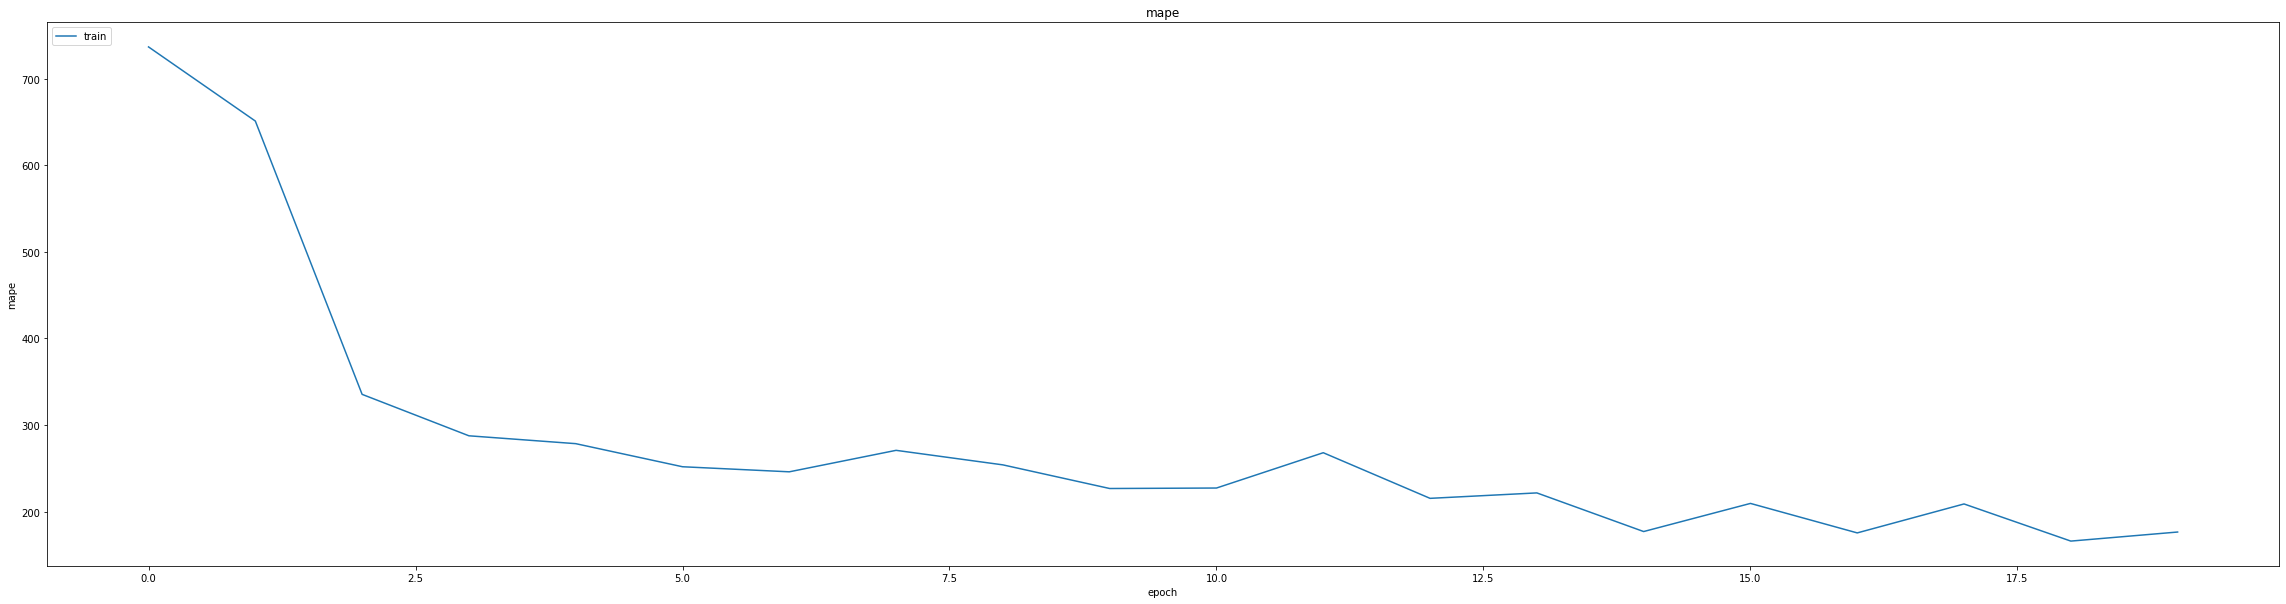

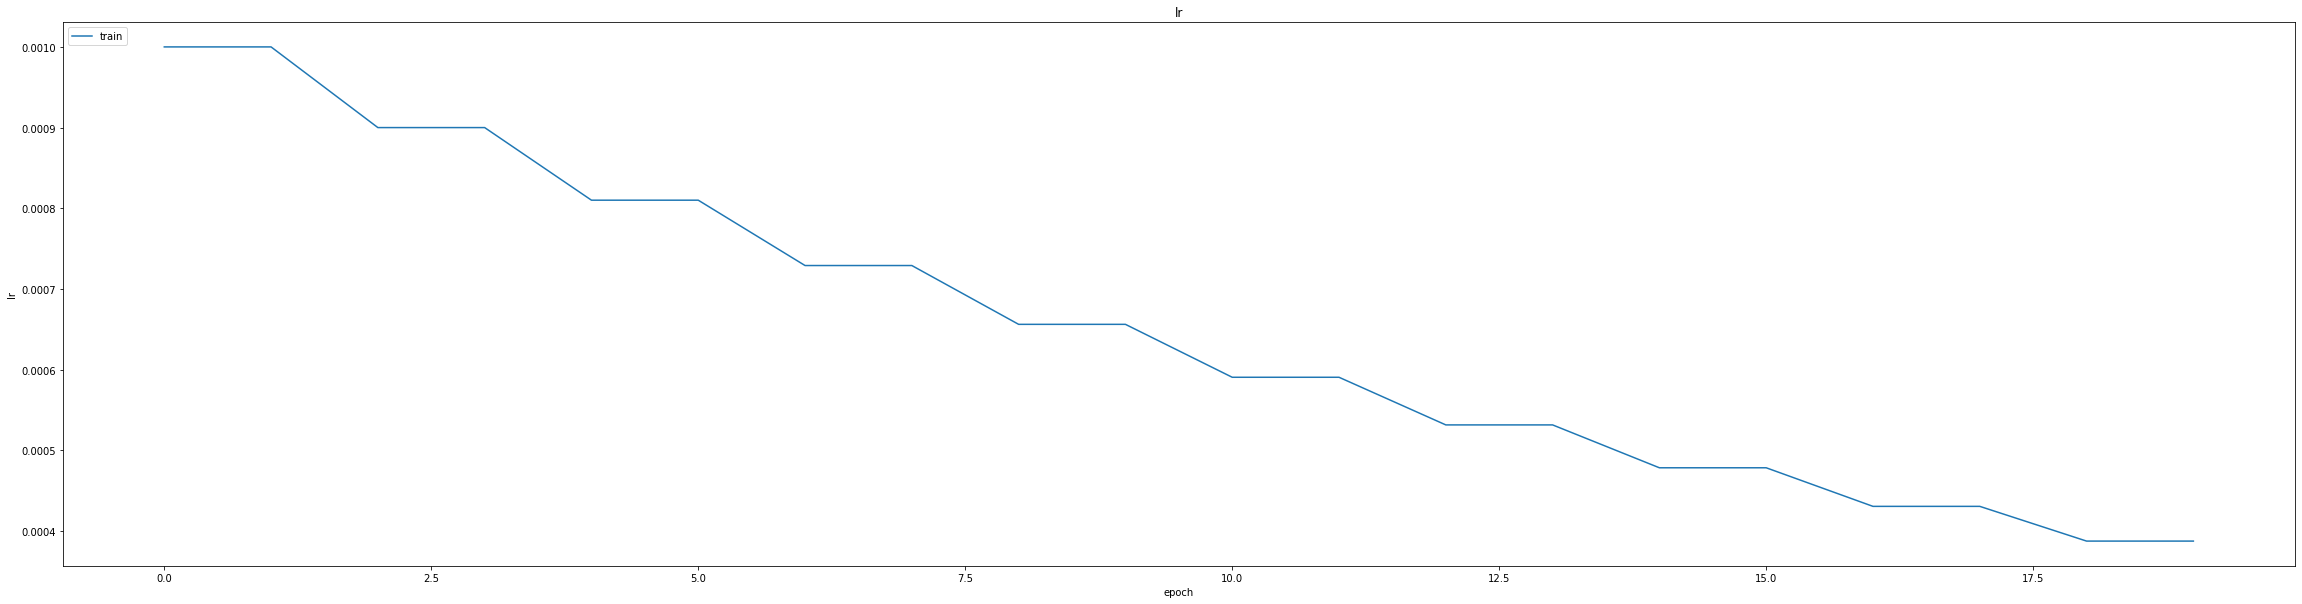

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0068087466061115265
0.009468784555792809
1392/1392 [==============================] - 7s 4ms/step
0.9972217372575184


1392/1392 [==============================] - 6s 4ms/step


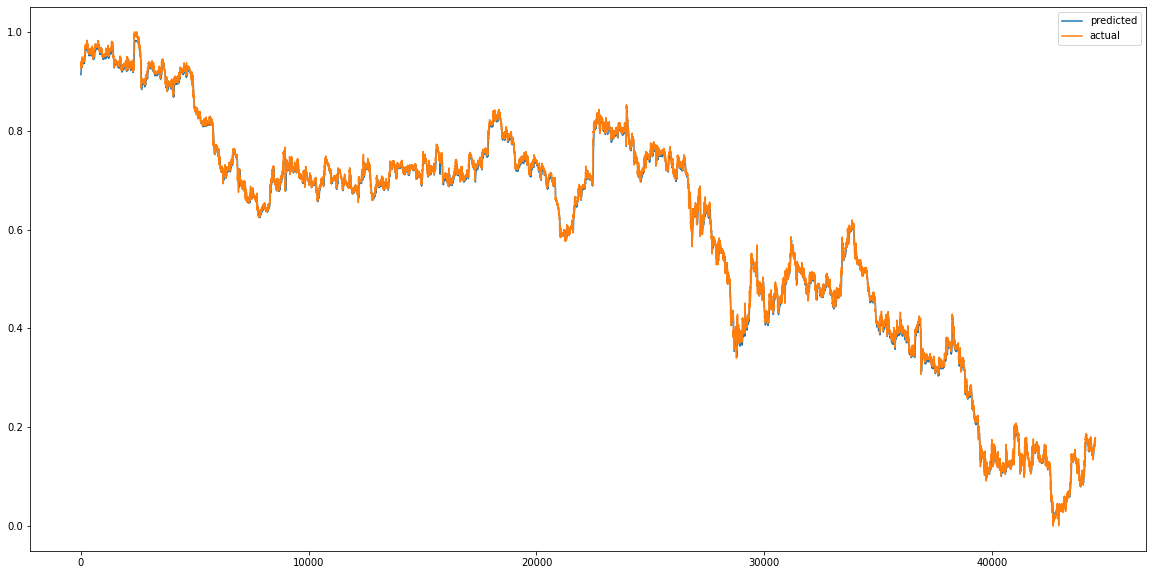

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


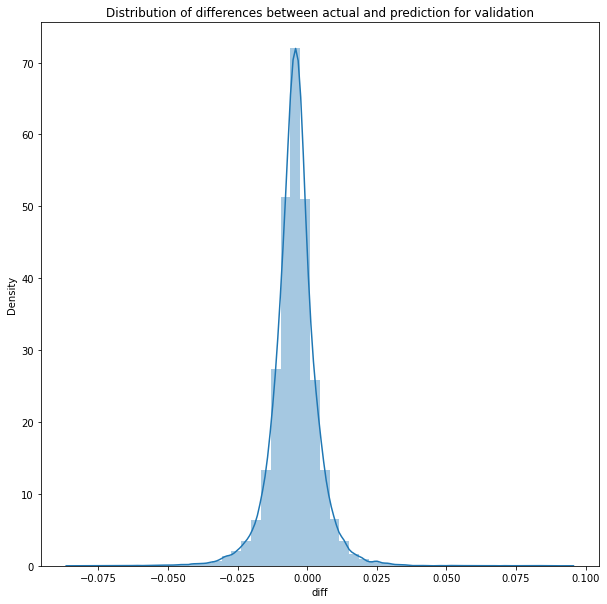

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 6s 4ms/step


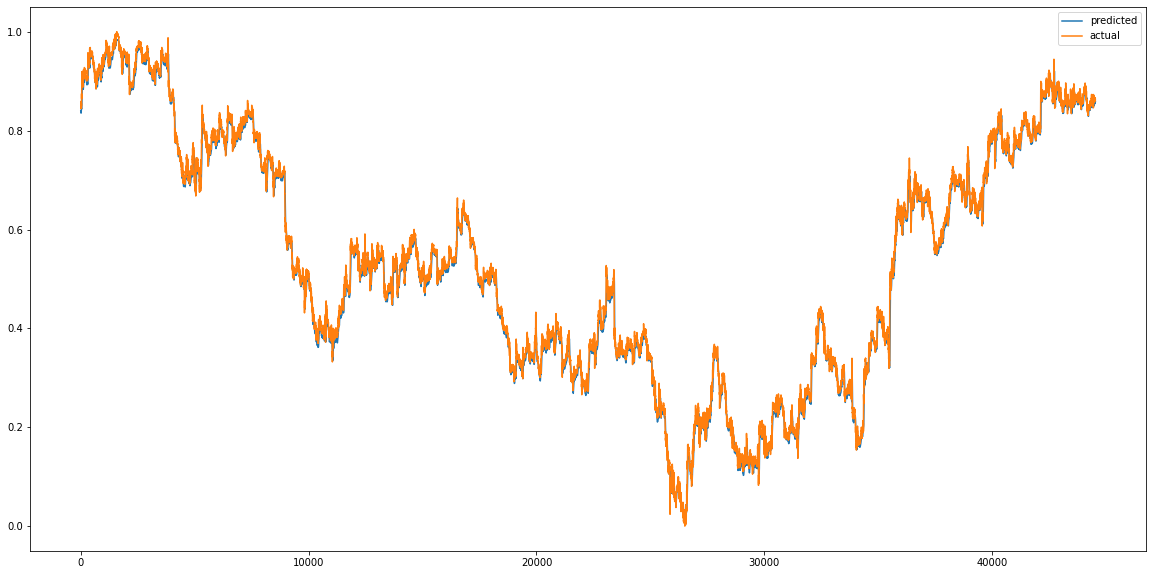

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


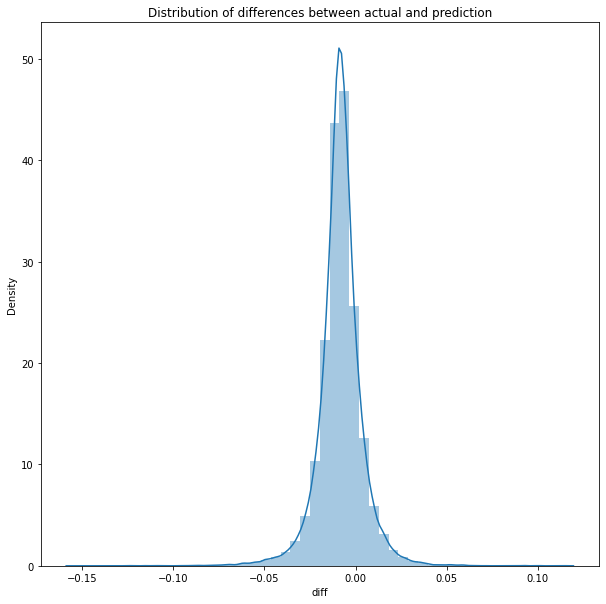

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002207638602688479
RMSE :  0.01485812438596635
MAE :  0.011309074197535886
1392/1392 [==============================] - 6s 4ms/step
R2_Score  : 0.9963460790896379


count    44530.000000
mean        -0.008373
std          0.012274
min         -0.154541
25%         -0.013806
50%         -0.008304
75%         -0.002721
max          0.115311
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 24, 256)           207360    
                                                                 
 gru_3 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout_5 (Dropout)         (None, 24, 64)            0         
                                                                 
 gru_4 (GRU)                 (None, 16)                3936      
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
344/348 [============================>.] - ETA: 0s - loss: 415.4064 - mae: 6.0803 - mse: 415.4064 - root_mean_squared_error: 20.3815 - mape: 11974.7510
Epoch 1: val_mse improved from inf to 0.20809, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 20s 47ms/step - loss: 411.6787 - mae: 6.0297 - mse: 411.6787 - root_mean_squared_error: 20.2899 - mape: 11868.8271 - val_loss: 0.2081 - val_mae: 0.3885 - val_mse: 0.2081 - val_root_mean_squared_error: 0.4562 - val_mape: 22468.3945
Epoch 2/60
347/348 [============================>.] - ETA: 0s - loss: 0.0972 - mae: 0.2409 - mse: 0.0972 - root_mean_squared_error: 0.3118 - mape: 5404.7373
Epoch 2: val_mse improved from 0.20809 to 0.05826, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0972 - mae: 0.2409 - mse: 0.0972 - root_mean_squared_error: 0.3118 - mape: 5402.9438 - val_loss: 0.0583 - val_mae: 0.2055 - val_mse: 0.0583 - val_root_mean_squared_error: 0.2414 - val_mape: 12893.5742
Epoch 3/60
345/348 [============================>.] - ETA: 0s - loss: 0.0664 - mae: 0.2182 - mse: 0.0664 - root_mean_squared_error: 0.2577 - mape: 4393.2559
Epoch 3: val_mse did not improve from 0.05826
348/348 [==============================] - 5s 15ms/step - loss: 0.0664 - mae: 0.2182 - mse: 0.0664 - root_mean_squared_error: 0.2577 - mape: 4366.9375 - val_loss: 0.0586 - val_mae: 0.2068 - val_mse: 0.0586 - val_root_mean_squared_error: 0.2421 - val_mape: 12786.3359
Epoch 4/60
347/348 [============================>.] - ETA: 0s - loss: 0.0664 - mae: 0.2185 - mse: 0.0664 - root_mean_squared_error: 0.2577 - mape: 4582.1182
Epoch 4: val_mse did not improve from 0.05826
348/348 [==============================] - 5s 14ms/step - l

348/348 [==============================] - 15s 44ms/step - loss: 0.0664 - mae: 0.2185 - mse: 0.0664 - root_mean_squared_error: 0.2576 - mape: 4464.7617 - val_loss: 0.0582 - val_mae: 0.2056 - val_mse: 0.0582 - val_root_mean_squared_error: 0.2413 - val_mape: 12875.1396
Epoch 8/60
347/348 [============================>.] - ETA: 0s - loss: 0.0663 - mae: 0.2182 - mse: 0.0663 - root_mean_squared_error: 0.2574 - mape: 4390.8472
Epoch 8: val_mse did not improve from 0.05825
348/348 [==============================] - 5s 15ms/step - loss: 0.0663 - mae: 0.2182 - mse: 0.0663 - root_mean_squared_error: 0.2574 - mape: 4389.3994 - val_loss: 0.0586 - val_mae: 0.2069 - val_mse: 0.0586 - val_root_mean_squared_error: 0.2421 - val_mape: 12760.2363
Epoch 9/60
345/348 [============================>.] - ETA: 0s - loss: 0.0663 - mae: 0.2183 - mse: 0.0663 - root_mean_squared_error: 0.2574 - mape: 4480.7476
Epoch 9: val_mse improved from 0.05825 to 0.05813, saving model to /content/drive/MyDrive/modelweights/EU

348/348 [==============================] - 15s 44ms/step - loss: 0.0663 - mae: 0.2183 - mse: 0.0663 - root_mean_squared_error: 0.2575 - mape: 4454.0137 - val_loss: 0.0581 - val_mae: 0.2053 - val_mse: 0.0581 - val_root_mean_squared_error: 0.2411 - val_mape: 12889.2607
Epoch 10/60
344/348 [============================>.] - ETA: 0s - loss: 0.0662 - mae: 0.2181 - mse: 0.0662 - root_mean_squared_error: 0.2573 - mape: 4501.9897
Epoch 10: val_mse improved from 0.05813 to 0.05808, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0662 - mae: 0.2181 - mse: 0.0662 - root_mean_squared_error: 0.2573 - mape: 4462.3613 - val_loss: 0.0581 - val_mae: 0.2053 - val_mse: 0.0581 - val_root_mean_squared_error: 0.2410 - val_mape: 12859.6133
Epoch 11/60
347/348 [============================>.] - ETA: 0s - loss: 0.0660 - mae: 0.2174 - mse: 0.0660 - root_mean_squared_error: 0.2569 - mape: 4462.0474
Epoch 11: val_mse did not improve from 0.05808
348/348 [==============================] - 5s 15ms/step - loss: 0.0660 - mae: 0.2174 - mse: 0.0660 - root_mean_squared_error: 0.2568 - mape: 4460.5659 - val_loss: 0.0589 - val_mae: 0.2083 - val_mse: 0.0589 - val_root_mean_squared_error: 0.2427 - val_mape: 12589.6211
Epoch 12/60
347/348 [============================>.] - ETA: 0s - loss: 0.0659 - mae: 0.2175 - mse: 0.0659 - root_mean_squared_error: 0.2567 - mape: 4395.6382
Epoch 12: val_mse did not improve from 0.05808
348/348 [==============================] - 5s 14ms/step

348/348 [==============================] - 16s 45ms/step - loss: 0.0655 - mae: 0.2167 - mse: 0.0655 - root_mean_squared_error: 0.2559 - mape: 4714.8677 - val_loss: 0.0579 - val_mae: 0.2059 - val_mse: 0.0579 - val_root_mean_squared_error: 0.2407 - val_mape: 12658.2432
Epoch 14/60
347/348 [============================>.] - ETA: 0s - loss: 0.0648 - mae: 0.2154 - mse: 0.0648 - root_mean_squared_error: 0.2546 - mape: 4531.3916
Epoch 14: val_mse did not improve from 0.05794
348/348 [==============================] - 6s 16ms/step - loss: 0.0648 - mae: 0.2154 - mse: 0.0648 - root_mean_squared_error: 0.2546 - mape: 4529.8887 - val_loss: 0.0580 - val_mae: 0.2067 - val_mse: 0.0580 - val_root_mean_squared_error: 0.2408 - val_mape: 12475.1289
Epoch 15/60
345/348 [============================>.] - ETA: 0s - loss: 0.0616 - mae: 0.2083 - mse: 0.0616 - root_mean_squared_error: 0.2481 - mape: 4911.3037
Epoch 15: val_mse improved from 0.05794 to 0.04351, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 14s 42ms/step - loss: 0.0615 - mae: 0.2081 - mse: 0.0615 - root_mean_squared_error: 0.2480 - mape: 4881.8027 - val_loss: 0.0435 - val_mae: 0.1760 - val_mse: 0.0435 - val_root_mean_squared_error: 0.2086 - val_mape: 11405.8262
Epoch 16/60
347/348 [============================>.] - ETA: 0s - loss: 0.0216 - mae: 0.1101 - mse: 0.0216 - root_mean_squared_error: 0.1470 - mape: 3538.2891
Epoch 16: val_mse improved from 0.04351 to 0.00272, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0216 - mae: 0.1100 - mse: 0.0216 - root_mean_squared_error: 0.1469 - mape: 3537.1021 - val_loss: 0.0027 - val_mae: 0.0381 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0521 - val_mape: 4838.1001
Epoch 17/60
346/348 [============================>.] - ETA: 0s - loss: 0.0036 - mae: 0.0477 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 1325.0267
Epoch 17: val_mse improved from 0.00272 to 0.00157, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0036 - mae: 0.0476 - mse: 0.0036 - root_mean_squared_error: 0.0596 - mape: 1320.8064 - val_loss: 0.0016 - val_mae: 0.0262 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0396 - val_mape: 3876.3286
Epoch 18/60
347/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0404 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1240.3948
Epoch 18: val_mse improved from 0.00157 to 0.00133, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.0026 - mae: 0.0404 - mse: 0.0026 - root_mean_squared_error: 0.0508 - mape: 1239.9808 - val_loss: 0.0013 - val_mae: 0.0250 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0365 - val_mape: 3501.8538
Epoch 19/60
346/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0369 - mse: 0.0022 - root_mean_squared_error: 0.0466 - mape: 1158.9841
Epoch 19: val_mse improved from 0.00133 to 0.00124, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0022 - mae: 0.0369 - mse: 0.0022 - root_mean_squared_error: 0.0466 - mape: 1155.2839 - val_loss: 0.0012 - val_mae: 0.0240 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0351 - val_mape: 3320.4255
Epoch 20/60
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1005.2386
Epoch 20: val_mse improved from 0.00124 to 0.00105, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0019 - mae: 0.0341 - mse: 0.0019 - root_mean_squared_error: 0.0431 - mape: 1004.9030 - val_loss: 0.0011 - val_mae: 0.0219 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0324 - val_mape: 3168.2310
Epoch 21/60
345/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0315 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 1083.0686
Epoch 21: val_mse improved from 0.00105 to 0.00090, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0016 - mae: 0.0315 - mse: 0.0016 - root_mean_squared_error: 0.0400 - mape: 1076.5129 - val_loss: 8.9658e-04 - val_mae: 0.0197 - val_mse: 8.9658e-04 - val_root_mean_squared_error: 0.0299 - val_mape: 3047.9580
Epoch 22/60
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 914.7003
Epoch 22: val_mse improved from 0.00090 to 0.00083, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0014 - mae: 0.0293 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 914.3953 - val_loss: 8.2677e-04 - val_mae: 0.0193 - val_mse: 8.2677e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 2914.7278
Epoch 23/60
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 981.0294
Epoch 23: val_mse improved from 0.00083 to 0.00063, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0012 - mae: 0.0272 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 975.0886 - val_loss: 6.2745e-04 - val_mae: 0.0161 - val_mse: 6.2745e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 2833.3120
Epoch 24/60
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 838.9533
Epoch 24: val_mse did not improve from 0.00063
348/348 [==============================] - 5s 15ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 836.2772 - val_loss: 6.6095e-04 - val_mae: 0.0184 - val_mse: 6.6095e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 2730.7700
Epoch 25/60
347/348 [============================>.] - ETA: 0s - loss: 9.3996e-04 - mae: 0.0241 - mse: 9.3996e-04 - root_mean_squared_error: 0.0307 - mape: 916.1954
Epoch 25: val_mse improved from 0.00063 to 0.00061, saving model to /content/drive/M

348/348 [==============================] - 15s 43ms/step - loss: 9.3988e-04 - mae: 0.0241 - mse: 9.3988e-04 - root_mean_squared_error: 0.0307 - mape: 915.8885 - val_loss: 6.0896e-04 - val_mae: 0.0170 - val_mse: 6.0896e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 2696.9158
Epoch 26/60
348/348 [==============================] - ETA: 0s - loss: 8.4872e-04 - mae: 0.0229 - mse: 8.4872e-04 - root_mean_squared_error: 0.0291 - mape: 911.6496
Epoch 26: val_mse improved from 0.00061 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 8.4872e-04 - mae: 0.0229 - mse: 8.4872e-04 - root_mean_squared_error: 0.0291 - mape: 911.6496 - val_loss: 4.6930e-04 - val_mae: 0.0142 - val_mse: 4.6930e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 2646.9829
Epoch 27/60
348/348 [==============================] - ETA: 0s - loss: 7.7031e-04 - mae: 0.0218 - mse: 7.7031e-04 - root_mean_squared_error: 0.0278 - mape: 860.9651
Epoch 27: val_mse did not improve from 0.00047
348/348 [==============================] - 5s 15ms/step - loss: 7.7031e-04 - mae: 0.0218 - mse: 7.7031e-04 - root_mean_squared_error: 0.0278 - mape: 860.9651 - val_loss: 4.9239e-04 - val_mae: 0.0153 - val_mse: 4.9239e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 2573.3169
Epoch 28/60
346/348 [============================>.] - ETA: 0s - loss: 6.9331e-04 - mae: 0.0206 - mse: 6.9331e-04 - root_mean_squared_error: 0.0263 - mape: 815.2751
Epoch 28: val_mse did not improve from 0.00047
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 4.8813e-04 - mae: 0.0172 - mse: 4.8813e-04 - root_mean_squared_error: 0.0221 - mape: 821.3608 - val_loss: 4.2272e-04 - val_mae: 0.0154 - val_mse: 4.2272e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 2325.3398
Epoch 33/60
347/348 [============================>.] - ETA: 0s - loss: 4.5113e-04 - mae: 0.0165 - mse: 4.5113e-04 - root_mean_squared_error: 0.0212 - mape: 750.5559
Epoch 33: val_mse did not improve from 0.00042
348/348 [==============================] - 5s 15ms/step - loss: 4.5107e-04 - mae: 0.0165 - mse: 4.5107e-04 - root_mean_squared_error: 0.0212 - mape: 750.3046 - val_loss: 6.5602e-04 - val_mae: 0.0215 - val_mse: 6.5602e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 2250.8662
Epoch 34/60
344/348 [============================>.] - ETA: 0s - loss: 4.0563e-04 - mae: 0.0157 - mse: 4.0563e-04 - root_mean_squared_error: 0.0201 - mape: 819.8995
Epoch 34: val_mse improved from 0.00042 to 0.00035, saving m

348/348 [==============================] - 14s 41ms/step - loss: 4.0545e-04 - mae: 0.0157 - mse: 4.0545e-04 - root_mean_squared_error: 0.0201 - mape: 812.5784 - val_loss: 3.4655e-04 - val_mae: 0.0146 - val_mse: 3.4655e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2189.2798
Epoch 35/60
347/348 [============================>.] - ETA: 0s - loss: 3.8155e-04 - mae: 0.0152 - mse: 3.8155e-04 - root_mean_squared_error: 0.0195 - mape: 767.5992
Epoch 35: val_mse improved from 0.00035 to 0.00033, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.8151e-04 - mae: 0.0152 - mse: 3.8151e-04 - root_mean_squared_error: 0.0195 - mape: 767.3417 - val_loss: 3.3323e-04 - val_mae: 0.0137 - val_mse: 3.3323e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 2164.8853
Epoch 36/60
347/348 [============================>.] - ETA: 0s - loss: 3.4540e-04 - mae: 0.0144 - mse: 3.4540e-04 - root_mean_squared_error: 0.0186 - mape: 691.0885
Epoch 36: val_mse did not improve from 0.00033
348/348 [==============================] - 5s 15ms/step - loss: 3.4539e-04 - mae: 0.0144 - mse: 3.4539e-04 - root_mean_squared_error: 0.0186 - mape: 690.8570 - val_loss: 3.4644e-04 - val_mae: 0.0146 - val_mse: 3.4644e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 2106.5815
Epoch 37/60
346/348 [============================>.] - ETA: 0s - loss: 3.2571e-04 - mae: 0.0140 - mse: 3.2571e-04 - root_mean_squared_error: 0.0180 - mape: 687.1155
Epoch 37: val_mse did not improve from 0.00033
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 2.9737e-04 - mae: 0.0134 - mse: 2.9737e-04 - root_mean_squared_error: 0.0172 - mape: 675.4254 - val_loss: 2.5253e-04 - val_mae: 0.0119 - val_mse: 2.5253e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 2043.5427
Epoch 39/60
344/348 [============================>.] - ETA: 0s - loss: 2.7655e-04 - mae: 0.0129 - mse: 2.7655e-04 - root_mean_squared_error: 0.0166 - mape: 663.6627
Epoch 39: val_mse improved from 0.00025 to 0.00019, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 2.7643e-04 - mae: 0.0129 - mse: 2.7643e-04 - root_mean_squared_error: 0.0166 - mape: 657.7305 - val_loss: 1.8647e-04 - val_mae: 0.0091 - val_mse: 1.8647e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 2011.8145
Epoch 40/60
344/348 [============================>.] - ETA: 0s - loss: 2.7732e-04 - mae: 0.0129 - mse: 2.7732e-04 - root_mean_squared_error: 0.0167 - mape: 685.8930
Epoch 40: val_mse did not improve from 0.00019
348/348 [==============================] - 5s 15ms/step - loss: 2.7708e-04 - mae: 0.0129 - mse: 2.7708e-04 - root_mean_squared_error: 0.0166 - mape: 679.7705 - val_loss: 5.3741e-04 - val_mae: 0.0201 - val_mse: 5.3741e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 1965.2244
Epoch 41/60
346/348 [============================>.] - ETA: 0s - loss: 2.5195e-04 - mae: 0.0123 - mse: 2.5195e-04 - root_mean_squared_error: 0.0159 - mape: 699.2396
Epoch 41: val_mse did not improve from 0.00019
348/348 [====

348/348 [==============================] - 15s 44ms/step - loss: 2.3743e-04 - mae: 0.0119 - mse: 2.3743e-04 - root_mean_squared_error: 0.0154 - mape: 651.4269 - val_loss: 1.8049e-04 - val_mae: 0.0091 - val_mse: 1.8049e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 1934.6355
Epoch 43/60
344/348 [============================>.] - ETA: 0s - loss: 2.2130e-04 - mae: 0.0115 - mse: 2.2130e-04 - root_mean_squared_error: 0.0149 - mape: 647.8248
Epoch 43: val_mse did not improve from 0.00018
348/348 [==============================] - 5s 15ms/step - loss: 2.2100e-04 - mae: 0.0115 - mse: 2.2100e-04 - root_mean_squared_error: 0.0149 - mape: 642.0494 - val_loss: 2.3139e-04 - val_mae: 0.0114 - val_mse: 2.3139e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 1896.0264
Epoch 44/60
347/348 [============================>.] - ETA: 0s - loss: 2.1579e-04 - mae: 0.0113 - mse: 2.1579e-04 - root_mean_squared_error: 0.0147 - mape: 615.2620
Epoch 44: val_mse did not improve from 0.00018
348/348 [====

348/348 [==============================] - 16s 46ms/step - loss: 1.5684e-04 - mae: 0.0096 - mse: 1.5684e-04 - root_mean_squared_error: 0.0125 - mape: 540.2949 - val_loss: 1.6251e-04 - val_mae: 0.0087 - val_mse: 1.6251e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1723.8322
Epoch 53/60
345/348 [============================>.] - ETA: 0s - loss: 1.5913e-04 - mae: 0.0097 - mse: 1.5913e-04 - root_mean_squared_error: 0.0126 - mape: 557.4974
Epoch 53: val_mse improved from 0.00016 to 0.00016, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 1.5921e-04 - mae: 0.0097 - mse: 1.5921e-04 - root_mean_squared_error: 0.0126 - mape: 554.1240 - val_loss: 1.5751e-04 - val_mae: 0.0087 - val_mse: 1.5751e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 1697.4346
Epoch 54/60
344/348 [============================>.] - ETA: 0s - loss: 1.5853e-04 - mae: 0.0097 - mse: 1.5853e-04 - root_mean_squared_error: 0.0126 - mape: 552.0831
Epoch 54: val_mse did not improve from 0.00016
348/348 [==============================] - 5s 15ms/step - loss: 1.5835e-04 - mae: 0.0097 - mse: 1.5835e-04 - root_mean_squared_error: 0.0126 - mape: 547.1467 - val_loss: 1.6541e-04 - val_mae: 0.0091 - val_mse: 1.6541e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1673.7656
Epoch 55/60
347/348 [============================>.] - ETA: 0s - loss: 1.6715e-04 - mae: 0.0100 - mse: 1.6715e-04 - root_mean_squared_error: 0.0129 - mape: 548.3397
Epoch 55: val_mse did not improve from 0.00016
348/348 [====

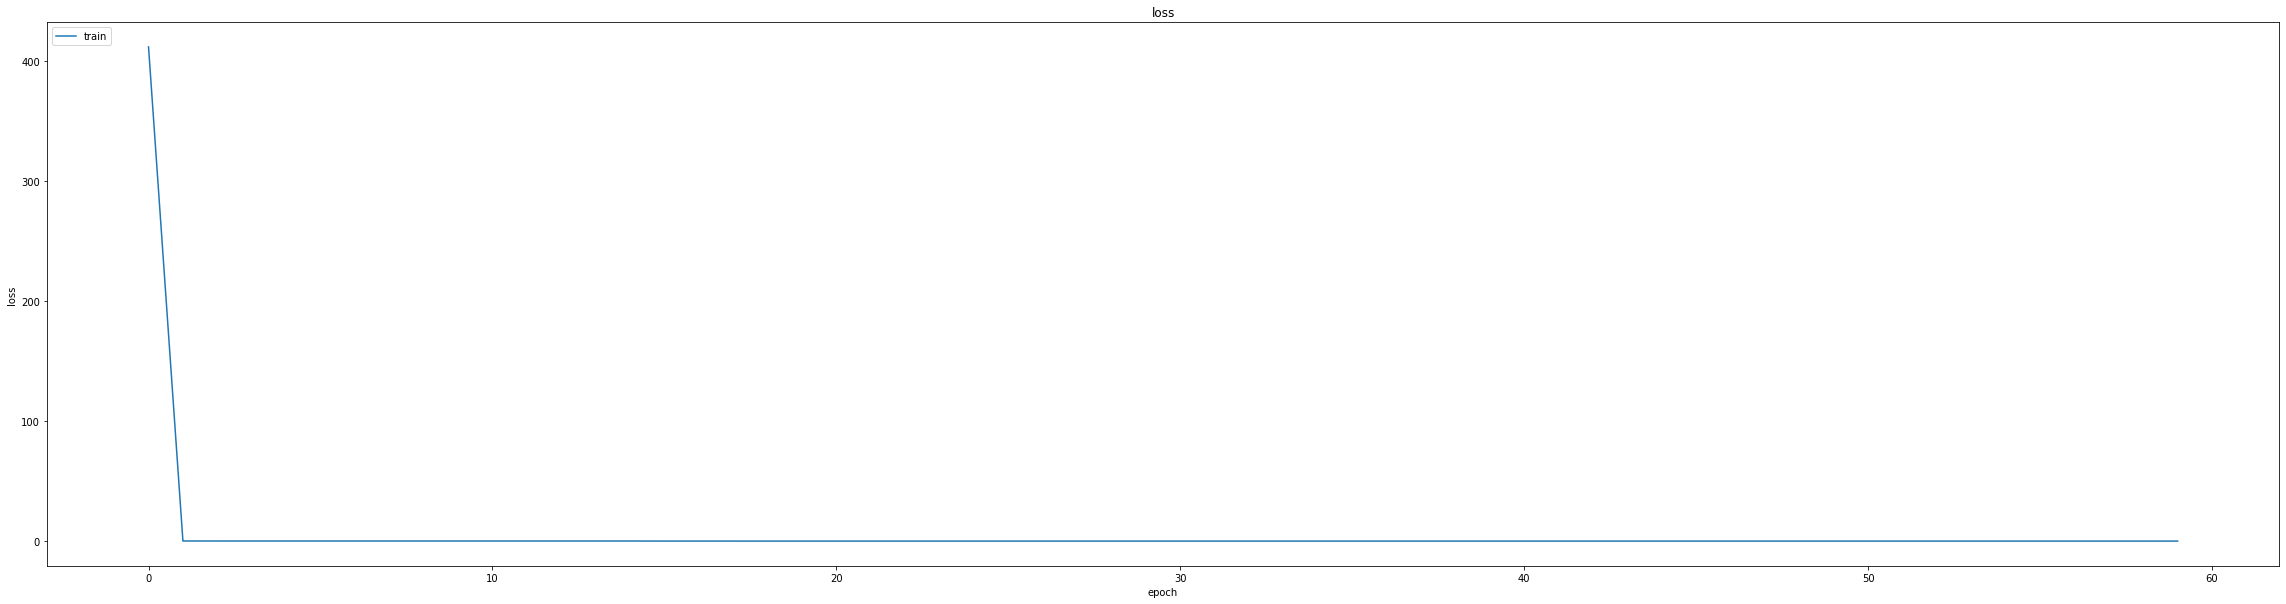

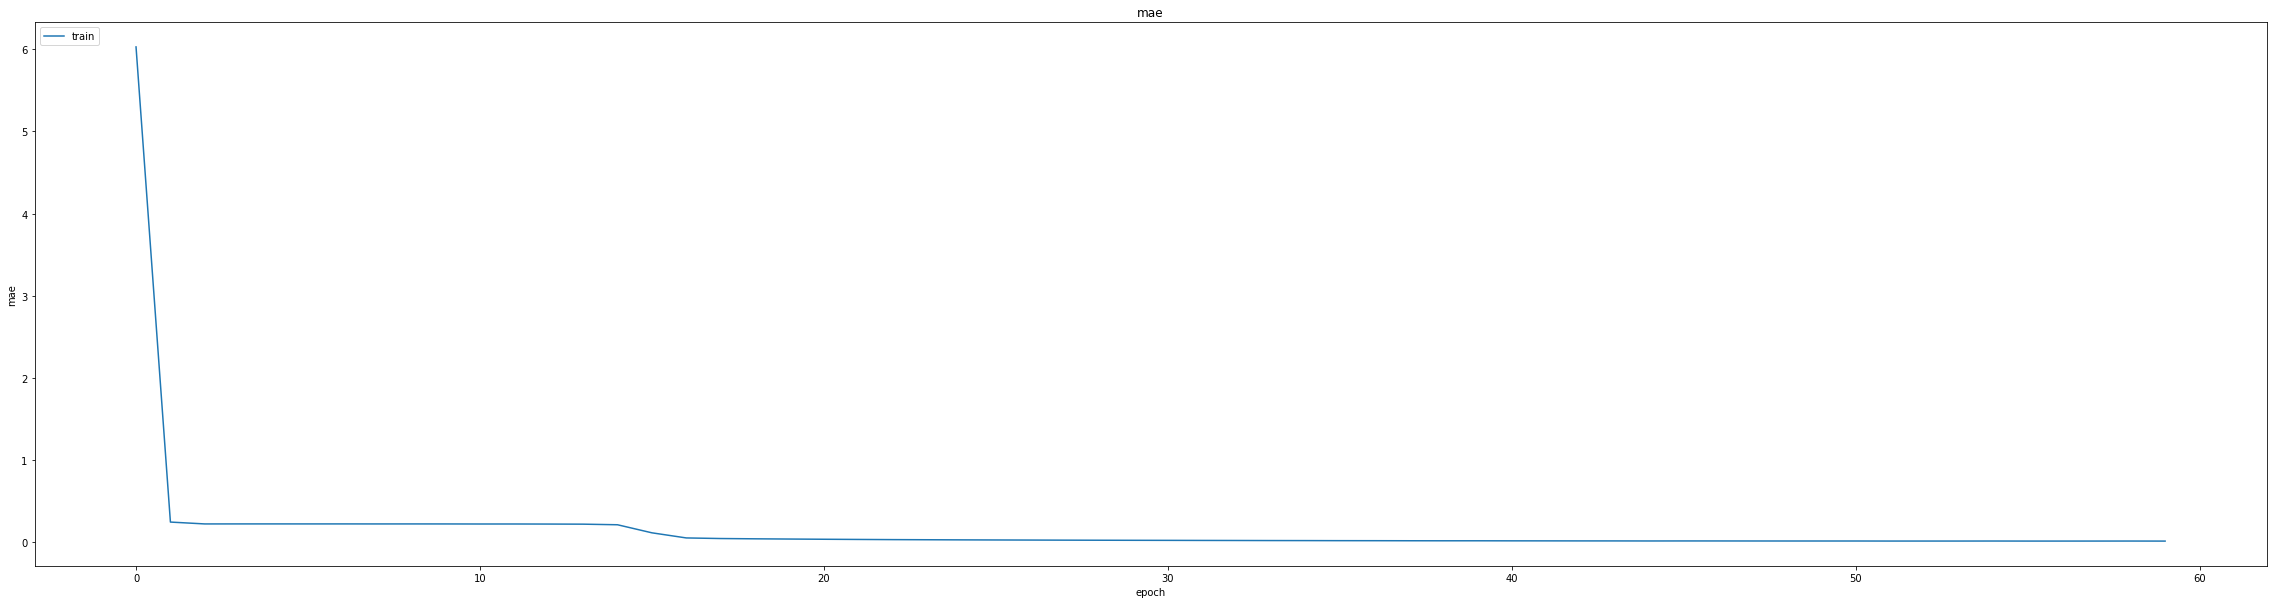

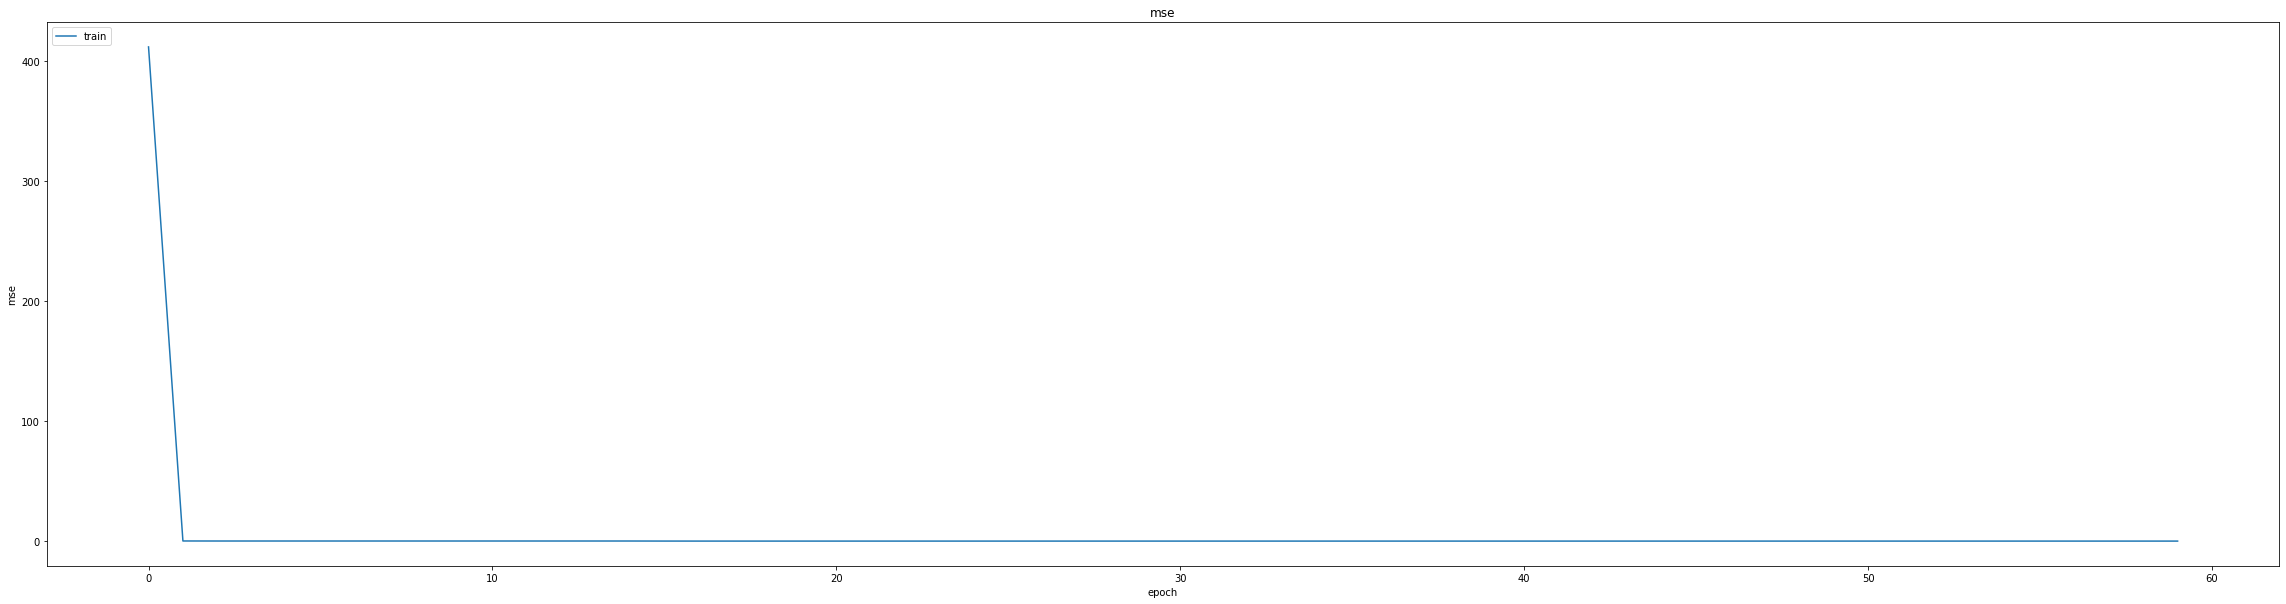

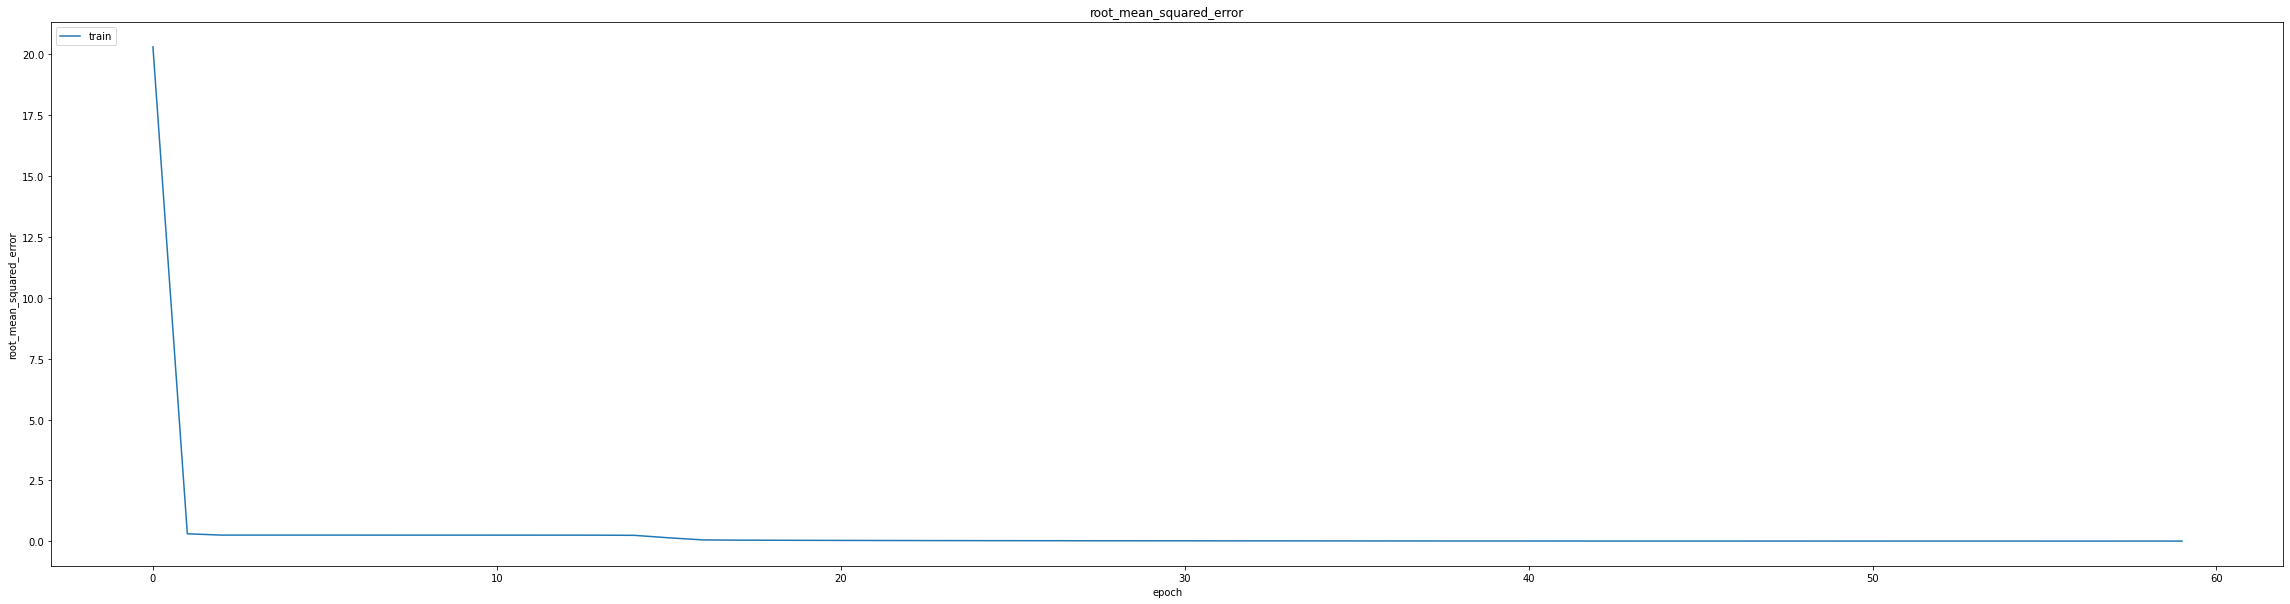

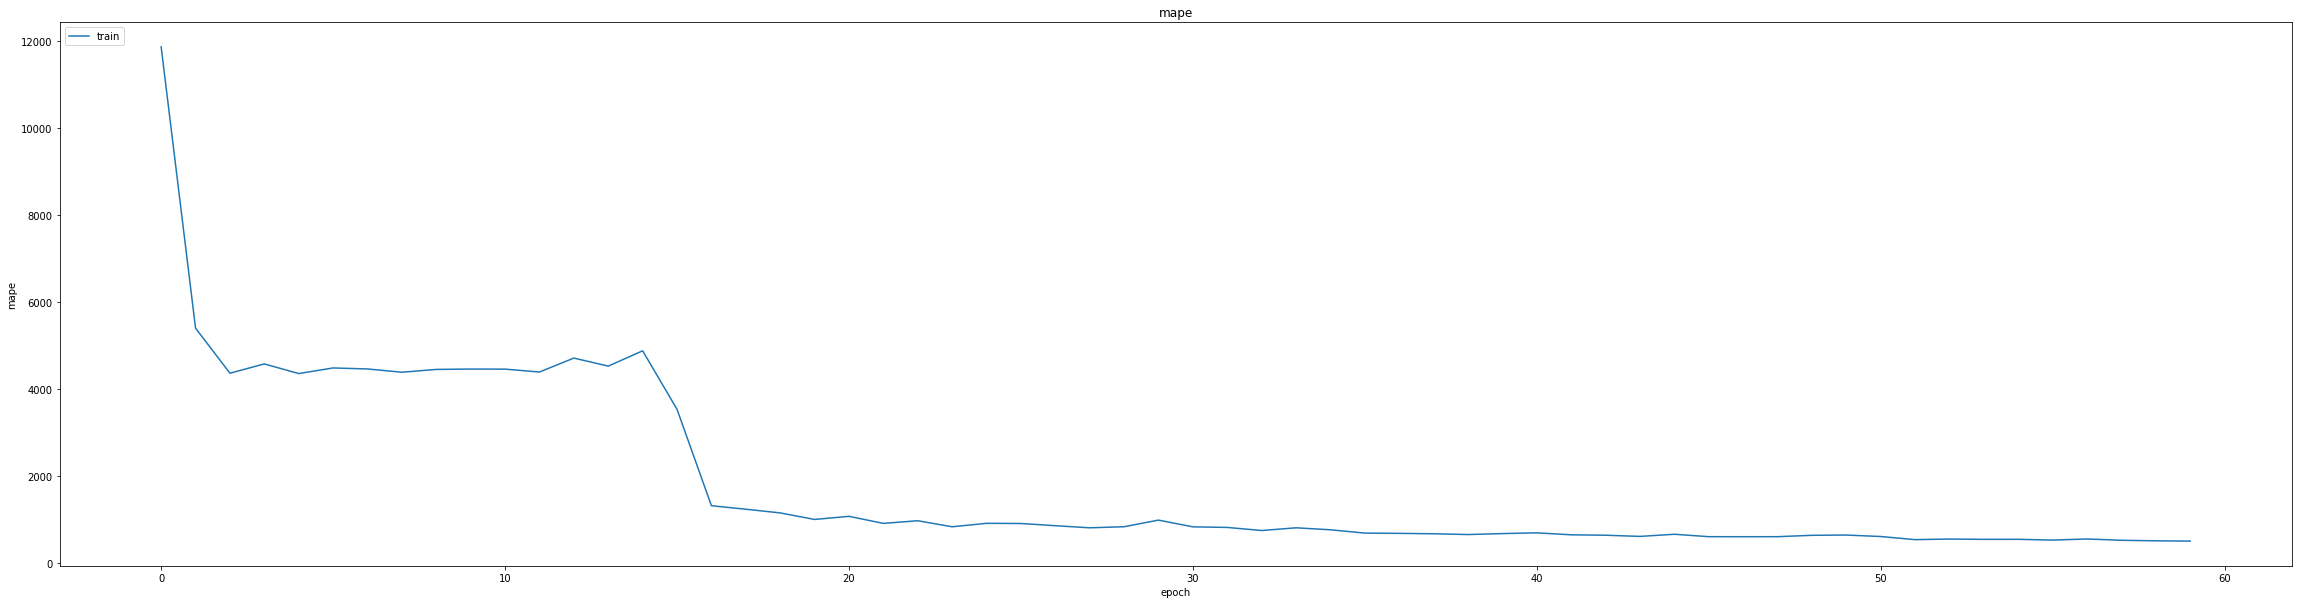

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.008692256174981594
0.008692256174981594
0.01255015842616558
1392/1392 [==============================] - 6s 4ms/step
0.9918960342803587


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)

history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0162 - mse: 0.0011 - root_mean_squared_error: 0.0335 - mape: 578.3006
Epoch 1: val_mse did not improve from 0.00016
348/348 [==============================] - 11s 19ms/step - loss: 0.0011 - mae: 0.0161 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 576.4510 - val_loss: 1.6079e-04 - val_mae: 0.0087 - val_mse: 1.6079e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 1718.9857 - lr: 0.0010
Epoch 2/20
347/348 [============================>.] - ETA: 0s - loss: 1.2693e-04 - mae: 0.0085 - mse: 1.2693e-04 - root_mean_squared_error: 0.0113 - mape: 539.0231
Epoch 2: val_mse did not improve from 0.00016
348/348 [==============================] - 5s 14ms/step - loss: 1.2692e-04 - mae: 0.0085 - mse: 1.2692e-04 - root_mean_squared_error: 0.0113 - mape: 538.8423 - val_loss: 1.6606e-04 - val_mae: 0.0090 - val_mse: 1.6606e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 1638.2610 - lr: 0.0010
lr chan

348/348 [==============================] - 16s 45ms/step - loss: 1.3340e-04 - mae: 0.0089 - mse: 1.3340e-04 - root_mean_squared_error: 0.0115 - mape: 494.8927 - val_loss: 1.4506e-04 - val_mae: 0.0085 - val_mse: 1.4506e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1531.5537 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/20
345/348 [============================>.] - ETA: 0s - loss: 1.1774e-04 - mae: 0.0083 - mse: 1.1774e-04 - root_mean_squared_error: 0.0109 - mape: 2.7489
Epoch 7: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.1778e-04 - mae: 0.0083 - mse: 1.1778e-04 - root_mean_squared_error: 0.0109 - mape: 473.8325 - val_loss: 1.4423e-04 - val_mae: 0.0085 - val_mse: 1.4423e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 1475.5776 - lr: 7.2900e-04
Epoch 8/20
347/348 [============================>.] - ETA: 0s - loss: 1.1686e-04 - mae: 0.0082 - mse: 1.1686e-04 - root_mean_squared_error: 0.0108 - mape: 459.0549
Epoch 8: val_mse improved from 0.00014 to 0.00014, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.1685e-04 - mae: 0.0082 - mse: 1.1685e-04 - root_mean_squared_error: 0.0108 - mape: 458.9011 - val_loss: 1.3549e-04 - val_mae: 0.0081 - val_mse: 1.3549e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 1319.7708 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/20
345/348 [============================>.] - ETA: 0s - loss: 1.1471e-04 - mae: 0.0082 - mse: 1.1471e-04 - root_mean_squared_error: 0.0107 - mape: 375.6649
Epoch 9: val_mse did not improve from 0.00014
348/348 [==============================] - 5s 15ms/step - loss: 1.1463e-04 - mae: 0.0082 - mse: 1.1463e-04 - root_mean_squared_error: 0.0107 - mape: 373.3863 - val_loss: 1.5067e-04 - val_mae: 0.0092 - val_mse: 1.5067e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 1159.6442 - lr: 6.5610e-04
Epoch 10/20
346/348 [============================>.] - ETA: 0s - loss: 1.0955e-04 - mae: 0.0080 - mse: 1.0955e-04 - root_mean_squared_error: 0.0105 - mape: 3

348/348 [==============================] - 15s 43ms/step - loss: 1.0954e-04 - mae: 0.0080 - mse: 1.0954e-04 - root_mean_squared_error: 0.0105 - mape: 321.2445 - val_loss: 1.3126e-04 - val_mae: 0.0081 - val_mse: 1.3126e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 1006.1676 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/20
347/348 [============================>.] - ETA: 0s - loss: 9.5563e-05 - mae: 0.0074 - mse: 9.5563e-05 - root_mean_squared_error: 0.0098 - mape: 261.2822
Epoch 11: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 9.5571e-05 - mae: 0.0074 - mse: 9.5571e-05 - root_mean_squared_error: 0.0098 - mape: 261.1950 - val_loss: 1.2311e-04 - val_mae: 0.0078 - val_mse: 1.2311e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 912.0154 - lr: 5.9049e-04
Epoch 12/20
346/348 [============================>.] - ETA: 0s - loss: 9.8405e-05 - mae: 0.0075 - mse: 9.8405e-05 - root_mean_squared_error: 0.0099 - mape: 256.1633
Epoch 12: val_mse did not improve from 0.00012
348/348 [==============================] - 5s 15ms/step - loss: 9.8409e-05 - mae: 0.0075 - mse: 9.8409e-05 - root_mean_squared_error: 0.0099 - mape: 255.3451 - val_loss: 1.3314e-04 - val_mae: 0.0083 - val_mse: 1.3314e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 901.9678 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/20
345/348 [============================>.] - ETA: 0s - loss: 8.6600e-05 - mae: 0.0070 - mse: 8.6600e-05 - root_mean_squared_error: 0.0093 - mape: 2

348/348 [==============================] - 14s 41ms/step - loss: 8.0446e-05 - mae: 0.0068 - mse: 8.0446e-05 - root_mean_squared_error: 0.0090 - mape: 226.8564 - val_loss: 9.8553e-05 - val_mae: 0.0069 - val_mse: 9.8553e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 824.6611 - lr: 4.3047e-04
Epoch 18/20
345/348 [============================>.] - ETA: 0s - loss: 7.6270e-05 - mae: 0.0066 - mse: 7.6270e-05 - root_mean_squared_error: 0.0087 - mape: 177.9006
Epoch 18: val_mse did not improve from 0.00010
348/348 [==============================] - 5s 15ms/step - loss: 7.6186e-05 - mae: 0.0066 - mse: 7.6186e-05 - root_mean_squared_error: 0.0087 - mape: 176.8254 - val_loss: 1.1380e-04 - val_mae: 0.0077 - val_mse: 1.1380e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 666.5648 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
347/348 [============================>.] - ETA: 0s - loss: 7.3543e-05 - mae: 0.0065 - mse: 7.3543e-05 - root_mean_squared_error: 0.0086 - mape: 

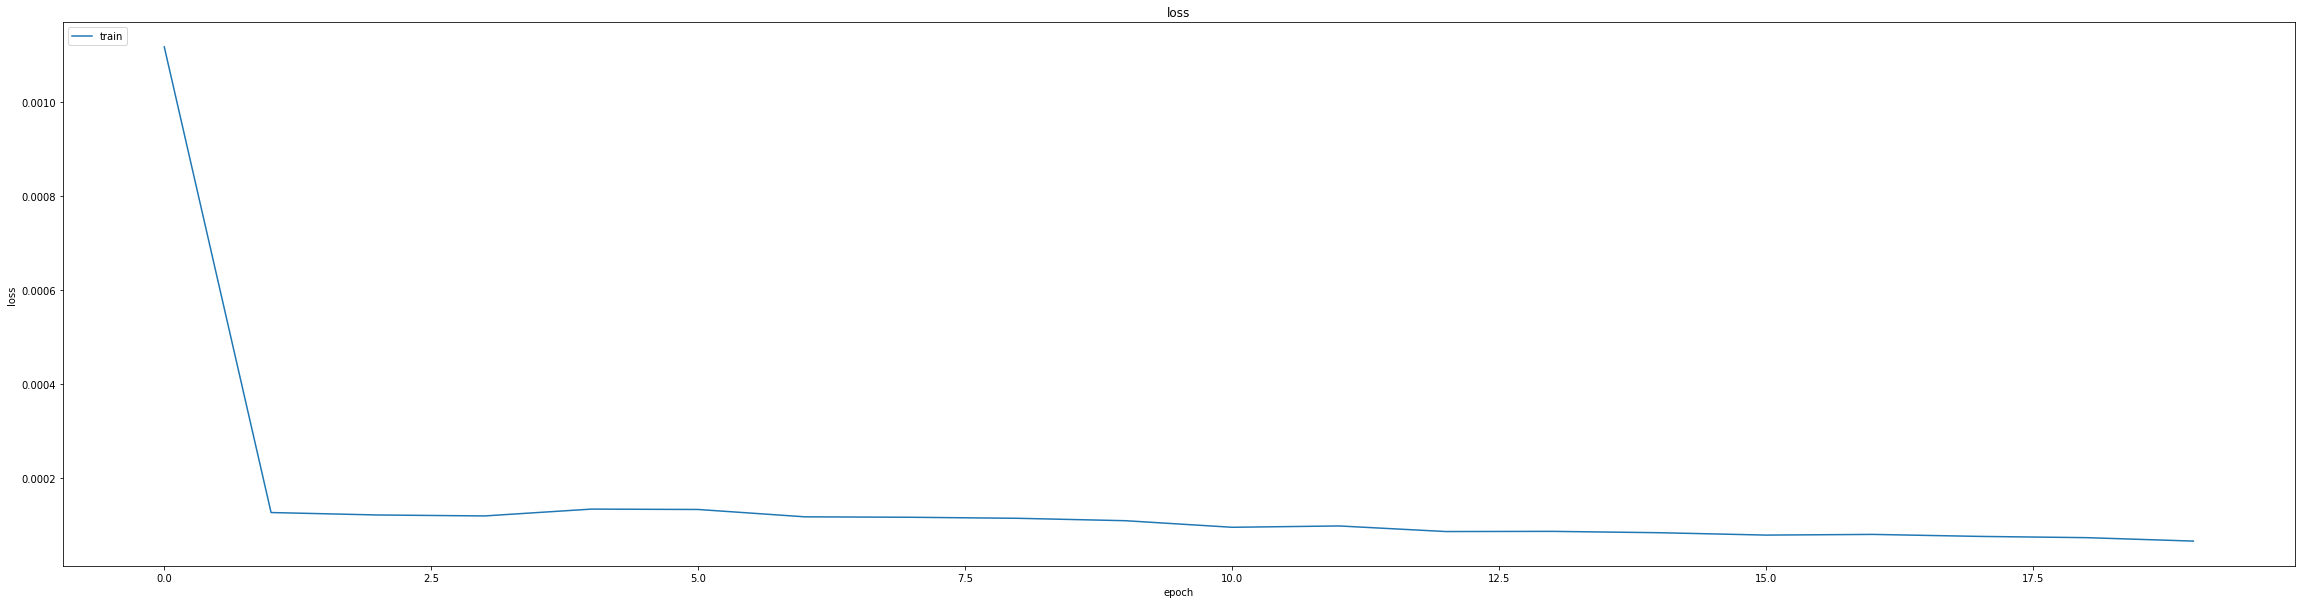

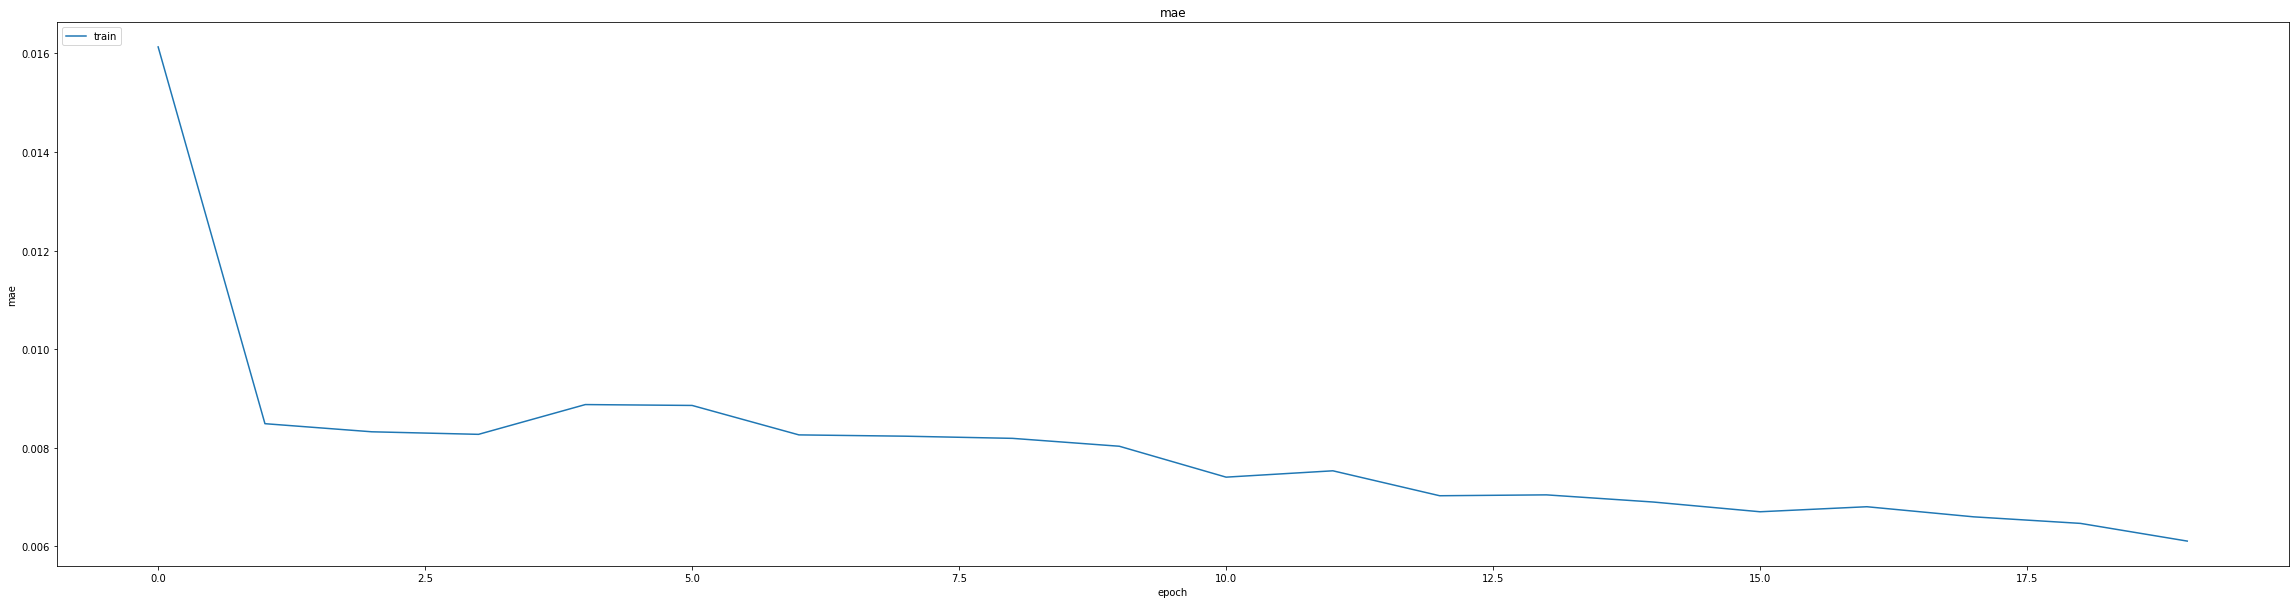

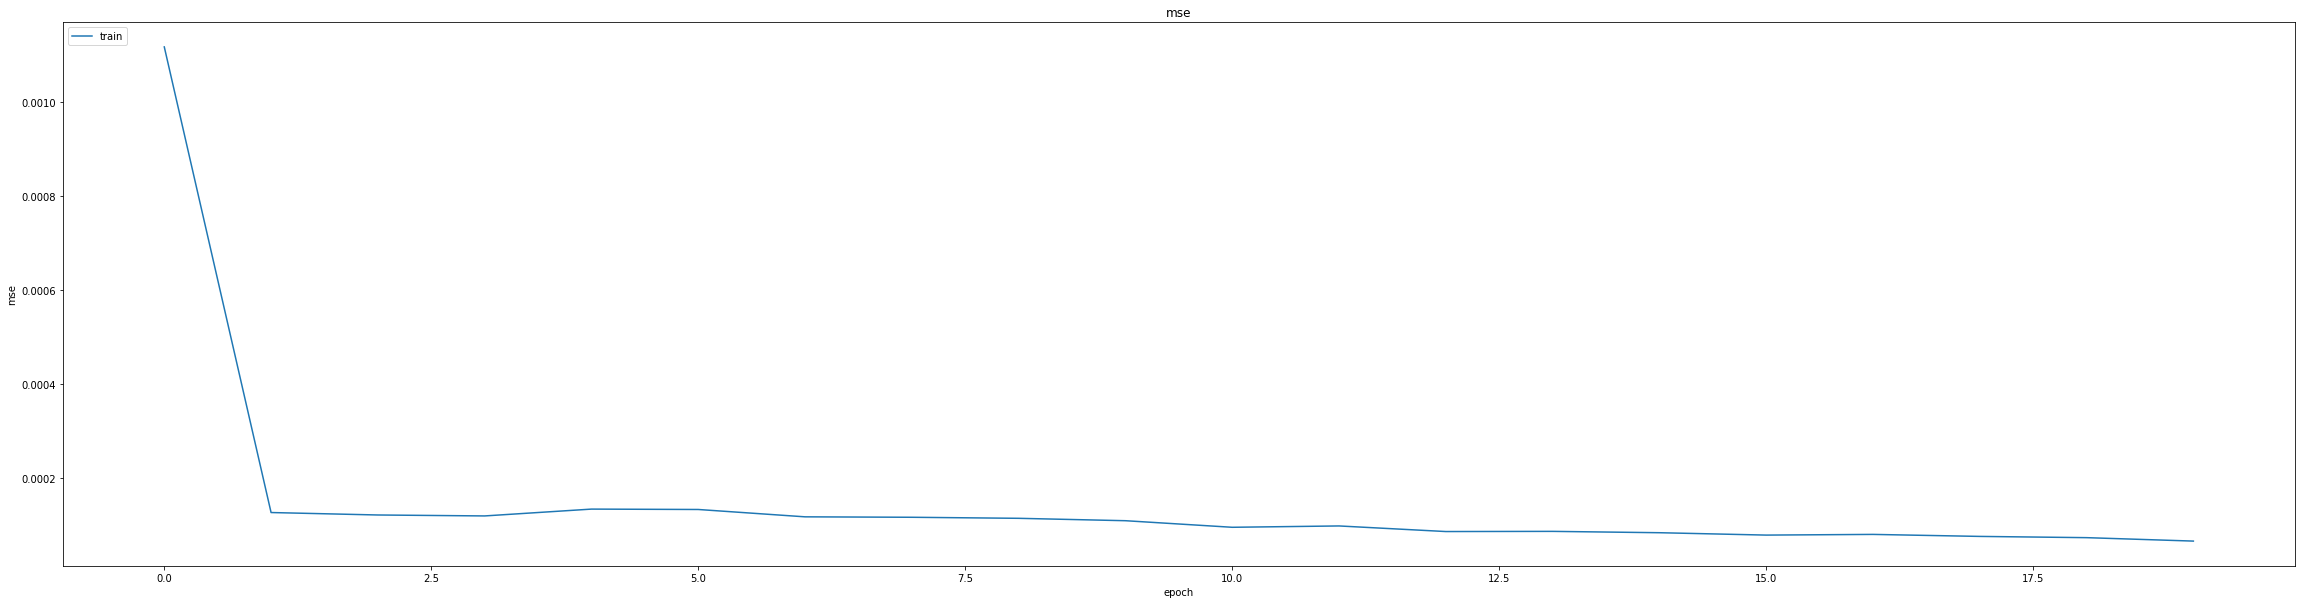

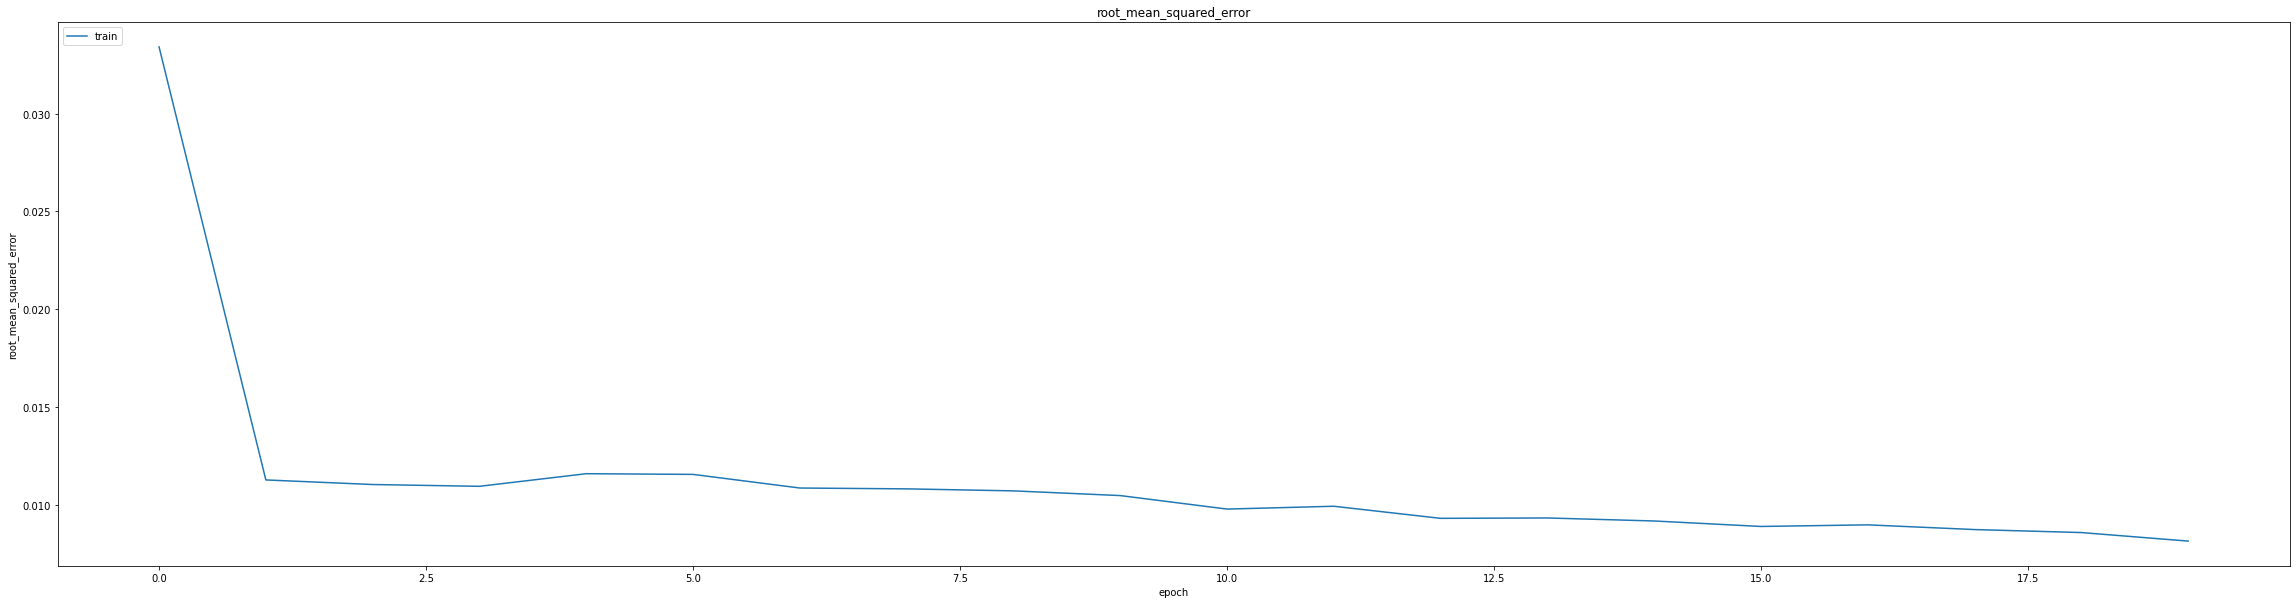

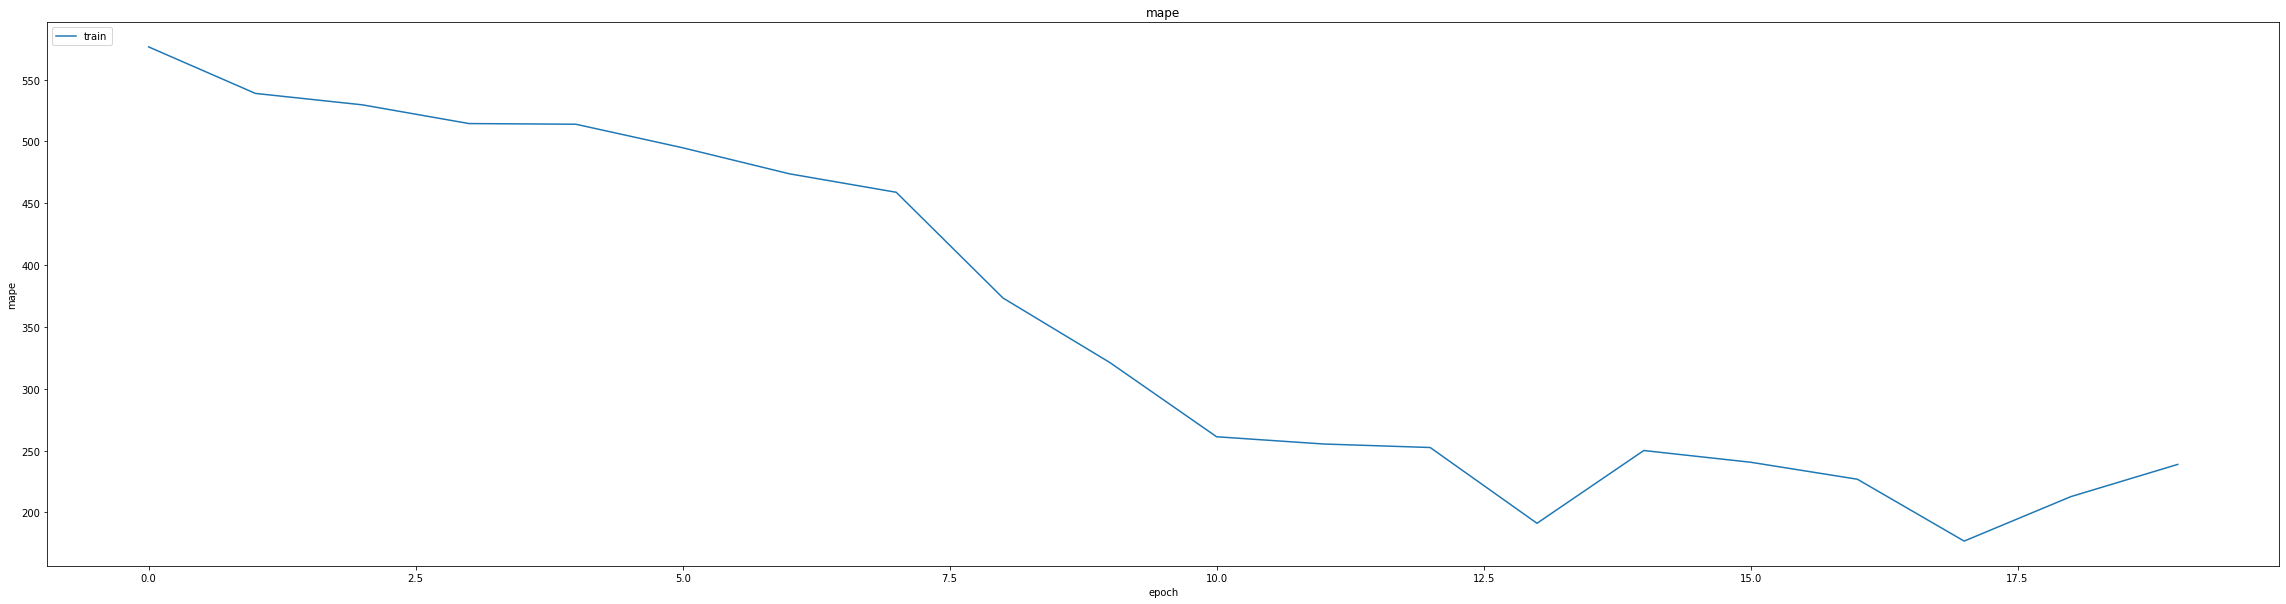

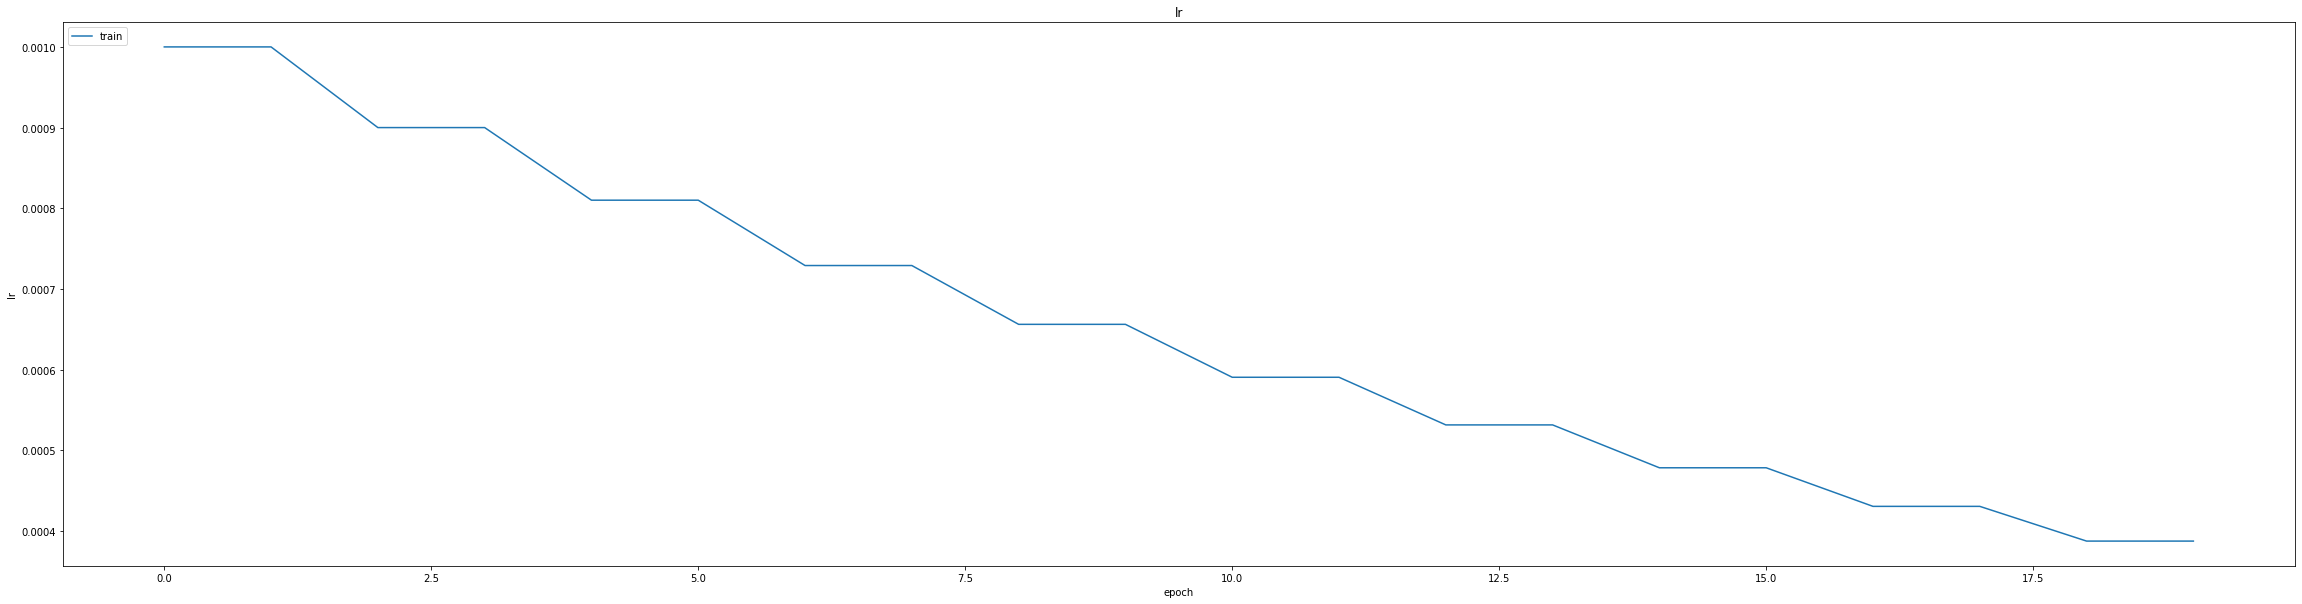

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.006880486384034157
0.006880486384034157
0.009927407838404179
1392/1392 [==============================] - 7s 4ms/step
0.9964611634737044


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD_5min_GRU(60-40)")

1392/1392 [==============================] - 5s 4ms/step


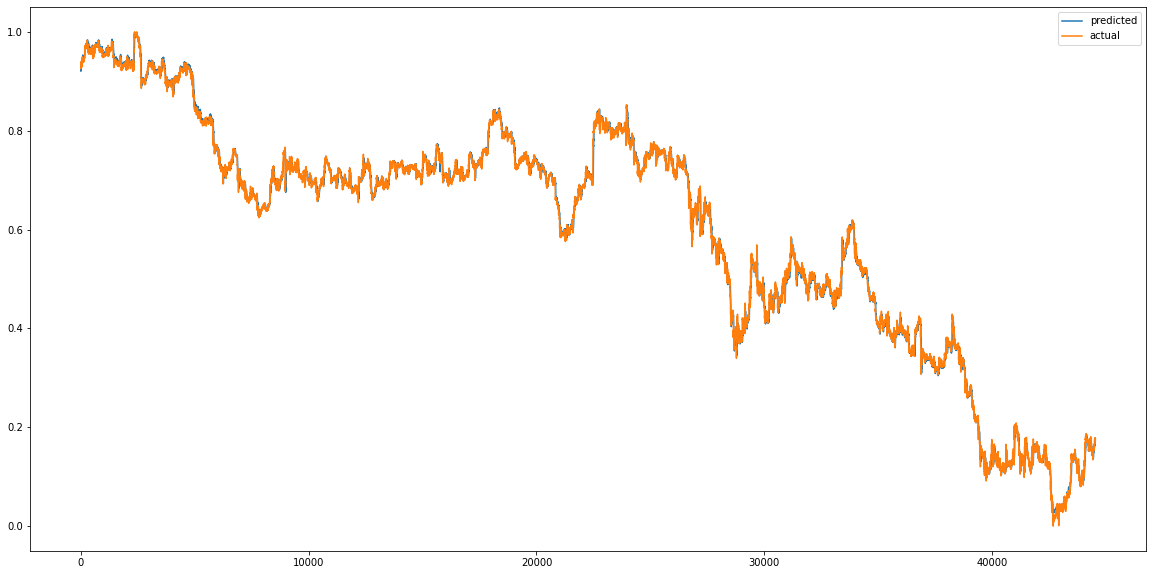

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


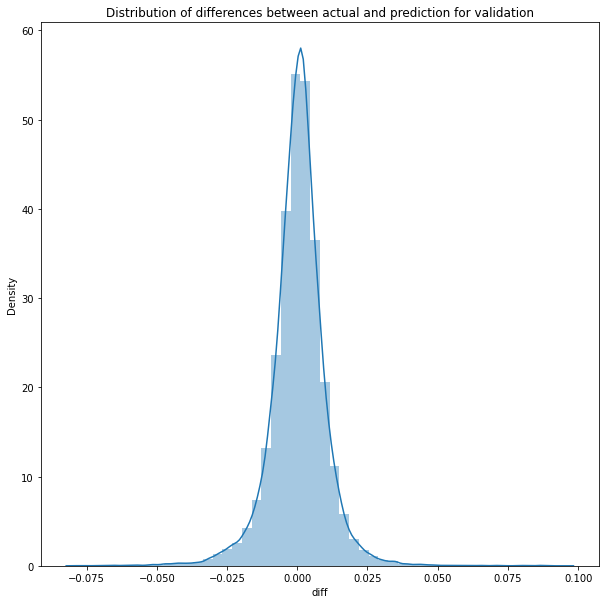

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

1392/1392 [==============================] - 5s 4ms/step


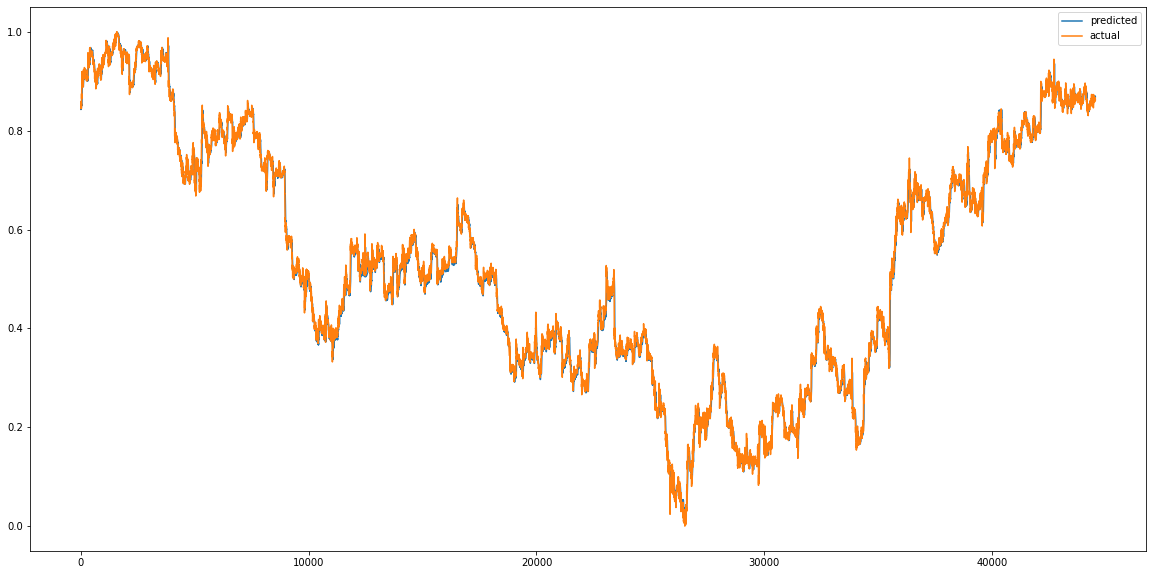

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


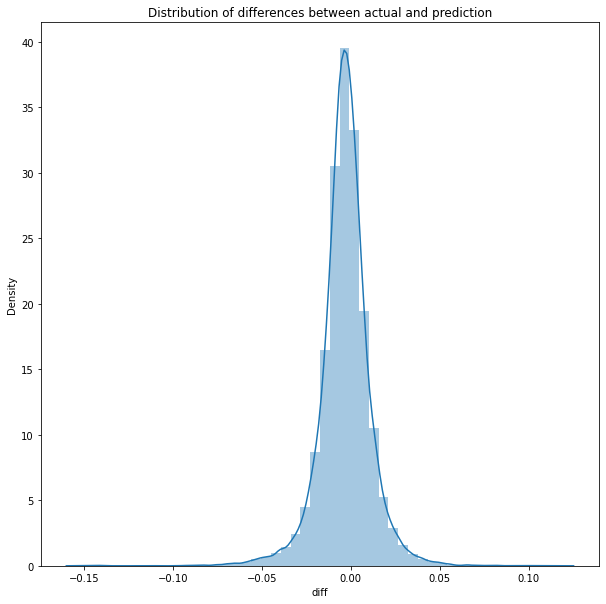

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00021873293246738756
RMSE :  0.014789622458581814
MAE :  0.01029469423617623
1392/1392 [==============================] - 6s 4ms/step
R2_Score  : 0.9963796935139155


count    44530.000000
mean        -0.003187
std          0.014442
min         -0.154698
25%         -0.009872
50%         -0.003002
75%          0.004003
max          0.120085
Name: diff, dtype: float64